# Import of Libraries

In [1]:
import pandas as pd
import sys, time
import csv
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D                  # for 3D plot
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.multioutput import MultiOutputRegressor      # necessary because we have multiple output
from sklearn.linear_model import LinearRegression         # 1 model -> Linear Regression
from sklearn.tree import DecisionTreeRegressor            # 2 model -> Decision Tree
from sklearn.neighbors import KNeighborsRegressor         # 3 model -> KNN
from sklearn.svm import SVR                               # 4 model -> SVM
from sklearn.ensemble import RandomForestRegressor        # 5 model -> Random Forest (a set of decision tree)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.model_selection import ParameterGrid
import warnings

import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import os

# 100 K NO Preprocessing

## Dataset
The dataset is a file .csv composed by these attributes joint angles: j0, j1, cos(j0), cos(j1), sin(j0), sin(j1), fingertip position: ft_x, ft_y ft_qw, ft_qz. The file is created by following the professor code present in this [repository](https://github.com/iocchi/MLexercises.git) and saving the generated file on google drive. I try also to generated the file .csv by cloning the professor's repository and connected to it from colab in this way is possible to run the file run.py and generated the file localy on google colab.



In [2]:
#connect to google drive for install the file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Exploring the dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/HW1/dataset/LOG_FILE_FULL_R5.csv",sep=';')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   j0       100000 non-null  float64
 1   j1       100000 non-null  float64
 2   j2       100000 non-null  float64
 3   j3       100000 non-null  float64
 4   j4       100000 non-null  float64
 5   cos(j0)  100000 non-null  float64
 6   cos(j1)  100000 non-null  float64
 7   cos(j2)  100000 non-null  float64
 8   cos(j3)  100000 non-null  float64
 9   cos(j4)  100000 non-null  float64
 10  sin(j0)  100000 non-null  float64
 11  sin(j1)  100000 non-null  float64
 12  sin(j2)  100000 non-null  float64
 13  sin(j3)  100000 non-null  float64
 14  sin(j4)  100000 non-null  float64
 15  ft_x     100000 non-null  float64
 16  ft_y     100000 non-null  float64
 17  ft_z     100000 non-null  float64
 18  ft_qw    100000 non-null  float64
 19  ft_qx    100000 non-null  float64
 20  ft_qy    100000 non-null  f

In [ ]:
df.head()

j0     j1     j2     j3     j4  cos(j0)  cos(j1)  cos(j2)  cos(j3)  \
0  0.000  0.000  0.000  0.000  0.000    1.000    1.000      1.0    1.000   
1  0.002  0.008 -0.002 -0.024  0.002    1.000    1.000      1.0    1.000   
2 -0.020  0.007  0.013 -0.066  0.036    1.000    1.000      1.0    0.998   
3 -0.041 -0.030  0.024 -0.065  0.111    0.999    1.000      1.0    0.998   
4 -0.054 -0.110  0.021 -0.013  0.229    0.999    0.994      1.0    1.000   

   cos(j4)  ...  sin(j2)  sin(j3)  sin(j4)   ft_x   ft_y   ft_z  ft_qw  ft_qx  \
0    1.000  ...    0.000    0.000    0.000  0.000  0.000  0.590  1.000  0.000   
1    1.000  ...   -0.002   -0.024    0.002 -0.003 -0.000  0.590  1.000  0.001   
2    0.999  ...    0.013   -0.066    0.036 -0.008 -0.004  0.590  1.000  0.018   
3    0.994  ...    0.024   -0.065    0.111 -0.021 -0.012  0.589  0.998  0.055   
4    0.974  ...    0.021   -0.013    0.227 -0.047 -0.025  0.585  0.992  0.113   

   ft_qy  ft_qz  
0  0.000  0.000  
1 -0.009  0.001  
2 -0.023 -0.009  
3 -0.036 -0.018  
4 -0.054 -0.021  

[5 rows x 22 columns]

In [ ]:
df.describe()

j0             j1             j2             j3  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.017100      -0.028833      -0.010668      -0.025868   
std         1.118277       1.122978       1.123646       1.123685   
min        -1.778000      -1.806000      -1.797000      -1.810000   
25%        -1.076000      -1.125250      -1.119000      -1.129000   
50%         0.032000      -0.060000      -0.017000      -0.045000   
75%         1.107000       1.075000       1.088000       1.071000   
max         1.800000       1.785000       1.797000       1.789000   

                  j4        cos(j0)        cos(j1)        cos(j2)  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       -0.006575       0.468276       0.464281       0.463737   
std         1.122050       0.369871       0.372499       0.371188   
min        -1.796000      -0.227000      -0.233000      -0.224000   
25%        -1.102000       0.101000       0.092000       0.094000   
50%        -0.020000       0.462000       0.453000       0.450000   
75%         1.094000       0.838000       0.838000       0.835000   
max         1.786000       1.000000       1.000000       1.000000   

             cos(j3)        cos(j4)  ...        sin(j2)        sin(j3)  \
count  100000.000000  100000.000000  ...  100000.000000  100000.000000   
mean        0.463400       0.465024  ...      -0.007344      -0.018050   
std         0.370682       0.370043  ...       0.804453       0.804712   
min        -0.237000      -0.223000  ...      -1.000000      -1.000000   
25%         0.094750       0.098000  ...      -0.900000      -0.904000   
50%         0.452000       0.455000  ...      -0.017000      -0.045000   
75%         0.833000       0.833000  ...       0.886000       0.878000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             sin(j4)           ft_x           ft_y           ft_z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       -0.005988      -0.003052       0.001419       0.226602   
std         0.804248       0.154434       0.187405       0.184337   
min        -1.000000      -0.447000      -0.453000      -0.221000   
25%        -0.892000      -0.115000      -0.140000       0.066000   
50%        -0.020000      -0.006000       0.002000       0.261000   
75%         0.888000       0.111000       0.144000       0.380000   
max         1.000000       0.446000       0.448000       0.590000   

               ft_qw          ft_qx          ft_qy          ft_qz  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.442119      -0.005236      -0.017034       0.011715  
std         0.365704       0.440870       0.530267       0.441357  
min        -0.738000      -0.777000      -0.999000      -0.759000  
25%         0.251000      -0.400000      -0.521000      -0.384000  
50%         0.571000      -0.015000      -0.029000       0.018000  
75%         0.702000       0.393000       0.485000       0.411000  
max         1.000000       0.764000       1.000000       0.761000  

[8 rows x 22 columns]

In [ ]:
# Check for null values in each column
null_values = df.isnull().sum()

null_columns = null_values[null_values > 0]

if not null_columns.empty:
    print("Columns with missing values:")
    print(null_columns)
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


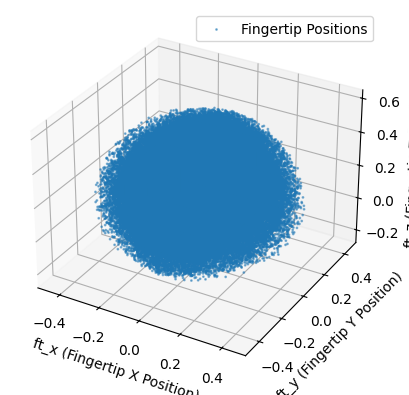

In [ ]:
df_filtered = df[['ft_x', 'ft_y', 'ft_z']]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_filtered['ft_x'], df_filtered['ft_y'], df_filtered['ft_z'],
           s=1, alpha=0.5, label='Fingertip Positions')

ax.set_xlabel('ft_x (Fingertip X Position)')
ax.set_ylabel('ft_y (Fingertip Y Position)')
ax.set_zlabel('ft_z (Fingertip Z Position)')

ax.legend()
ax.grid(True)
plt.show()

### Creation of Dataset for Training Validation and Test
At the begin what will do is split the dataset in traing validation and test after i will use one file for traing/validation and another for test in order to see how model perform with data (position od finger tips) never seen before



In [5]:
# Select few columns
df_filtered = df[['j0', 'j1', 'j2', 'j3', 'j4', 'ft_x', 'ft_y', 'ft_z']]

# Define features (X) and target (Y)
X = df_filtered[['j0', 'j1', 'j2', 'j3', 'j4']]
y = df_filtered[['ft_x', 'ft_y', 'ft_z']]

# Split into training+validation and test sets (80% training+validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training+validation set into training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Summary of the splits
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 60000
Validation set size: 20000
Test set size: 20000


## Model


In [27]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    return rmse, r2

### 1 Model Linear Regression

In [ ]:
# train
lr = MultiOutputRegressor(LinearRegression())
lr.fit(X_train, y_train)

MultiOutputRegressor(estimator=LinearRegression())

In [ ]:
# test
warnings.filterwarnings("ignore")
lr_rmse, lr_r2 = evaluate_model(lr, X_test, y_test)
print(f"Linear Regression RMSE: {lr_rmse}, R2: {lr_r2}")


Linear Regression RMSE: 0.1656378577426266, R2: 0.1151204866212624


The model has low errors on average (small MSE) but does not generalize well (low R2) to explain the variance in the data.
This combination indicate that model is underfitting so that mean Linear Regressin is not complex enough to capture these patterns.

### 2 Model Decision Tree Regressor

In [ ]:
# test
dt_param_grid = {
    'splitter': ['best', 'random'],
    'max_depth': [20, 25, 30]
}
dt = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt, dt_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
# test
best_dt = dt_grid.best_estimator_
dt_rmse, dt_r2 = evaluate_model(best_dt, X_test, y_test)
print(f"Decision Tree Best Params: {dt_grid.best_params_}")
print(f"Decision Tree RMSE: {dt_rmse}, R2: {dt_r2}")

Decision Tree Best Params: {'max_depth': 25, 'splitter': 'best'}
Decision Tree RMSE: 0.045142456800137724, R2: 0.9334233277522493


### 3 Model SVR

In [ ]:
# train
svr_param_grid = {
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 1],
    'estimator__max_iter': [150]
}
svr = MultiOutputRegressor(SVR())
svr_grid = GridSearchCV(svr, svr_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
svr_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=MultiOutputRegressor(estimator=SVR()), n_jobs=-1,
             param_grid={'estimator__C': [0.1, 1, 10],
                         'estimator__epsilon': [0.01, 0.1, 1],
                         'estimator__kernel': ['linear', 'rbf'],
                         'estimator__max_iter': [150]},
             scoring='neg_mean_squared_error')

In [ ]:
# test
best_svr = svr_grid.best_estimator_
svr_rmse, svr_r2 = evaluate_model(best_svr, X_test, y_test)
print(f"SVR Best Params: {svr_grid.best_params_}")
print(f"SVR RMSE: {svr_rmse}, R2: {svr_r2}")

SVR Best Params: {'estimator__C': 10, 'estimator__epsilon': 0.01, 'estimator__kernel': 'rbf', 'estimator__max_iter': 150}
SVR RMSE: 0.03159208642751323, R2: 0.9654616199222765


### 4 Model Random Forest Regressor


In [ ]:
# train
rf_param_grid = {
    'estimator__n_estimators': [100, 150],
    'estimator__max_depth': [12, 15]
}
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf_grid = GridSearchCV(rf, rf_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42)),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [12, 15],
                         'estimator__n_estimators': [100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
#test
best_rf = rf_grid.best_estimator_
rf_rmse, rf_r2 = evaluate_model(best_rf, X_test, y_test)
print(f"Random Forest Best Params: {rf_grid.best_params_}")
print(f"Random Forest RMSE: {rf_rmse}, R2: {rf_r2}")

Random Forest Best Params: {'estimator__max_depth': 15, 'estimator__n_estimators': 150}
Random Forest RMSE: 0.02378759554296345, R2: 0.9798572768430641


### 5 Model KNN regressor

In [ ]:
# train
knn_param_grid = {
    'estimator__n_neighbors': [3, 5, 10],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}
knn = MultiOutputRegressor(KNeighborsRegressor())
knn_grid = GridSearchCV(knn, knn_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MultiOutputRegressor(estimator=KNeighborsRegressor()),
             n_jobs=-1,
             param_grid={'estimator__n_neighbors': [3, 5, 10],
                         'estimator__p': [1, 2],
                         'estimator__weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [ ]:
#test
best_knn = knn_grid.best_estimator_
knn_rmse, knn_r2 = evaluate_model(best_knn, X_test, y_test)
print(f"KNN Best Params: {knn_grid.best_params_}")
print(f"KNN RMSE: {knn_rmse}, R2: {knn_r2}")

KNN Best Params: {'estimator__n_neighbors': 10, 'estimator__p': 2, 'estimator__weights': 'distance'}
KNN RMSE: 0.018614619753758933, R2: 0.988622894443867


### 6 Model NN Neural Network
This will be the actual model that i will use for train. More in detail



In [6]:
# Conversion of data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self, hidden_sizes):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()

        # Input layer
        input_size = 5  # two input features: j0 and j1
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))

        # Output layer
        output_size = 3  # output: ft_x and ft_y
        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))

    def forward(self, x):
        for layer in self.layers[:-1]:  # Apply ReLU to all hidden layers
            x = torch.relu(layer(x))
        x = self.layers[-1](x)
        return x

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.001],
    'hidden_sizes': [[16, 32, 64, 32, 16], [32, 64, 80, 64, 32], [16, 32, 64, 128, 64, 32, 16]],
    'optimizer': ['Adam', 'SGD']
}
grid = ParameterGrid(param_grid)

epochs = 100
best_val_loss = float('inf')
save_path = "/content/drive/MyDrive/Machine_Learning/HW1/ROBOT_5_ARMS_models"

all_train_losses = []
all_val_losses = []
best_model_info = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "model_state_dict": None,
    "optimizer_state_dict": None,
    "hyperparameters": {}
}

In [ ]:
for params in grid:
    # Initialize model and criterion
    model = NeuralNetwork(hidden_sizes=params['hidden_sizes'])
    criterion = nn.MSELoss()

    # Choose optimizer based on parameter grid
    if params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])
    elif params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['learning_rate'])

    # Track losses for each epoch
    train_losses = []
    val_losses = []

    # Training loop
    for epoch in tqdm(range(epochs), desc=f"Training Model with LR={params['learning_rate']}, Layers={params['hidden_sizes']}, Optimizer={params['optimizer']}"):
        # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        train_loss = criterion(outputs, y_train_tensor)
        train_loss.backward()
        optimizer.step()

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)

        # Store losses
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

        # Check if this model is the best so far based on validation loss
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model_info = {
                "epoch": epoch + 1,
                "train_loss": train_loss.item(),
                "val_loss": val_loss.item(),
                "model_state_dict": model.state_dict(),  # Store the best model weights
                "optimizer_state_dict": optimizer.state_dict(),  # Save the best optimizer state
                "hyperparameters": params  # Save the best hyperparameters for model reconstruction
            }

        # Update tqdm description with current losses
        tqdm.write(f"Epoch [{epoch+1}/{epochs}], Training Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    # Save all losses for plotting
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

# Save the best model information to a file
torch.save(best_model_info, os.path.join(save_path, "model_state_dict_r5_NO_PREPROCESSING.pt"))

# Print the best hyperparameters
print("Best Model Parameters:")
print("Learning Rate:", best_model_info['hyperparameters']['learning_rate'])
print("Hidden Layer Sizes:", best_model_info['hyperparameters']['hidden_sizes'])
print("Optimizer:", best_model_info['hyperparameters']['optimizer'])
print("Best Validation Loss:", best_val_loss)

Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:28,  3.49it/s]

Epoch [1/100], Training Loss: 0.1096, Validation Loss: 0.0812
Epoch [2/100], Training Loss: 0.0812, Validation Loss: 0.0585


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   4%|▍         | 4/100 [00:00<00:19,  4.88it/s]

Epoch [3/100], Training Loss: 0.0584, Validation Loss: 0.0434
Epoch [4/100], Training Loss: 0.0432, Validation Loss: 0.0412


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   5%|▌         | 5/100 [00:01<00:16,  5.84it/s]

Epoch [5/100], Training Loss: 0.0412, Validation Loss: 0.0342
Epoch [6/100], Training Loss: 0.0342, Validation Loss: 0.0327


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   8%|▊         | 8/100 [00:01<00:12,  7.47it/s]

Epoch [7/100], Training Loss: 0.0329, Validation Loss: 0.0341
Epoch [8/100], Training Loss: 0.0343, Validation Loss: 0.0336


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  10%|█         | 10/100 [00:01<00:11,  8.18it/s]

Epoch [9/100], Training Loss: 0.0338, Validation Loss: 0.0325
Epoch [10/100], Training Loss: 0.0327, Validation Loss: 0.0311


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  12%|█▏        | 12/100 [00:01<00:10,  8.18it/s]

Epoch [11/100], Training Loss: 0.0313, Validation Loss: 0.0299
Epoch [12/100], Training Loss: 0.0301, Validation Loss: 0.0294


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  14%|█▍        | 14/100 [00:02<00:10,  8.01it/s]

Epoch [13/100], Training Loss: 0.0295, Validation Loss: 0.0292
Epoch [14/100], Training Loss: 0.0293, Validation Loss: 0.0288


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  16%|█▌        | 16/100 [00:02<00:10,  8.01it/s]

Epoch [15/100], Training Loss: 0.0288, Validation Loss: 0.0282
Epoch [16/100], Training Loss: 0.0282, Validation Loss: 0.0276


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  18%|█▊        | 18/100 [00:02<00:09,  8.25it/s]

Epoch [17/100], Training Loss: 0.0276, Validation Loss: 0.0270
Epoch [18/100], Training Loss: 0.0270, Validation Loss: 0.0261


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  20%|██        | 20/100 [00:02<00:09,  8.68it/s]

Epoch [19/100], Training Loss: 0.0262, Validation Loss: 0.0253
Epoch [20/100], Training Loss: 0.0254, Validation Loss: 0.0246


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  22%|██▏       | 22/100 [00:03<00:09,  8.49it/s]

Epoch [21/100], Training Loss: 0.0247, Validation Loss: 0.0237
Epoch [22/100], Training Loss: 0.0238, Validation Loss: 0.0228


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  24%|██▍       | 24/100 [00:03<00:08,  8.83it/s]

Epoch [23/100], Training Loss: 0.0228, Validation Loss: 0.0218
Epoch [24/100], Training Loss: 0.0219, Validation Loss: 0.0208


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:03<00:08,  8.70it/s]

Epoch [25/100], Training Loss: 0.0208, Validation Loss: 0.0196
Epoch [26/100], Training Loss: 0.0196, Validation Loss: 0.0186


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  28%|██▊       | 28/100 [00:03<00:08,  8.70it/s]

Epoch [27/100], Training Loss: 0.0186, Validation Loss: 0.0177
Epoch [28/100], Training Loss: 0.0178, Validation Loss: 0.0172


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  29%|██▉       | 29/100 [00:04<00:08,  8.80it/s]

Epoch [29/100], Training Loss: 0.0172, Validation Loss: 0.0169
Epoch [30/100], Training Loss: 0.0169, Validation Loss: 0.0167
Epoch [31/100], Training Loss: 0.0166, Validation Loss: 0.0164


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  33%|███▎      | 33/100 [00:04<00:07,  9.19it/s]

Epoch [32/100], Training Loss: 0.0163, Validation Loss: 0.0159
Epoch [33/100], Training Loss: 0.0158, Validation Loss: 0.0154


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  35%|███▌      | 35/100 [00:04<00:07,  8.68it/s]

Epoch [34/100], Training Loss: 0.0153, Validation Loss: 0.0148
Epoch [35/100], Training Loss: 0.0148, Validation Loss: 0.0143


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  37%|███▋      | 37/100 [00:04<00:07,  8.78it/s]

Epoch [36/100], Training Loss: 0.0142, Validation Loss: 0.0137
Epoch [37/100], Training Loss: 0.0137, Validation Loss: 0.0132


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  39%|███▉      | 39/100 [00:04<00:07,  8.71it/s]

Epoch [38/100], Training Loss: 0.0132, Validation Loss: 0.0128
Epoch [39/100], Training Loss: 0.0128, Validation Loss: 0.0124


Epoch [40/100], Training Loss: 0.0123, Validation Loss: 0.0119
Epoch [41/100], Training Loss: 0.0119, Validation Loss: 0.0113


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  43%|████▎     | 43/100 [00:05<00:06,  9.08it/s]

Epoch [42/100], Training Loss: 0.0113, Validation Loss: 0.0106
Epoch [43/100], Training Loss: 0.0106, Validation Loss: 0.0101


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  45%|████▌     | 45/100 [00:05<00:06,  8.86it/s]

Epoch [44/100], Training Loss: 0.0100, Validation Loss: 0.0095
Epoch [45/100], Training Loss: 0.0094, Validation Loss: 0.0089


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  47%|████▋     | 47/100 [00:05<00:06,  8.61it/s]

Epoch [46/100], Training Loss: 0.0089, Validation Loss: 0.0084
Epoch [47/100], Training Loss: 0.0083, Validation Loss: 0.0079


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  49%|████▉     | 49/100 [00:06<00:06,  8.42it/s]

Epoch [48/100], Training Loss: 0.0079, Validation Loss: 0.0075
Epoch [49/100], Training Loss: 0.0075, Validation Loss: 0.0071


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  51%|█████     | 51/100 [00:06<00:05,  8.60it/s]

Epoch [50/100], Training Loss: 0.0071, Validation Loss: 0.0069
Epoch [51/100], Training Loss: 0.0069, Validation Loss: 0.0068


Epoch [52/100], Training Loss: 0.0068, Validation Loss: 0.0063
Epoch [53/100], Training Loss: 0.0063, Validation Loss: 0.0057


Epoch [54/100], Training Loss: 0.0056, Validation Loss: 0.0059
Epoch [55/100], Training Loss: 0.0059, Validation Loss: 0.0056


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  57%|█████▋    | 57/100 [00:06<00:04,  9.40it/s]

Epoch [56/100], Training Loss: 0.0056, Validation Loss: 0.0051
Epoch [57/100], Training Loss: 0.0051, Validation Loss: 0.0052


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  59%|█████▉    | 59/100 [00:07<00:04,  9.16it/s]

Epoch [58/100], Training Loss: 0.0052, Validation Loss: 0.0048
Epoch [59/100], Training Loss: 0.0048, Validation Loss: 0.0047


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  61%|██████    | 61/100 [00:07<00:04,  9.09it/s]

Epoch [60/100], Training Loss: 0.0046, Validation Loss: 0.0046
Epoch [61/100], Training Loss: 0.0046, Validation Loss: 0.0043


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  63%|██████▎   | 63/100 [00:07<00:04,  8.74it/s]

Epoch [62/100], Training Loss: 0.0043, Validation Loss: 0.0044
Epoch [63/100], Training Loss: 0.0044, Validation Loss: 0.0041


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  65%|██████▌   | 65/100 [00:07<00:04,  8.11it/s]

Epoch [64/100], Training Loss: 0.0041, Validation Loss: 0.0041
Epoch [65/100], Training Loss: 0.0040, Validation Loss: 0.0040


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  67%|██████▋   | 67/100 [00:08<00:04,  7.06it/s]

Epoch [66/100], Training Loss: 0.0040, Validation Loss: 0.0038
Epoch [67/100], Training Loss: 0.0037, Validation Loss: 0.0037


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  69%|██████▉   | 69/100 [00:08<00:05,  6.16it/s]

Epoch [68/100], Training Loss: 0.0037, Validation Loss: 0.0035
Epoch [69/100], Training Loss: 0.0035, Validation Loss: 0.0035


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  71%|███████   | 71/100 [00:08<00:04,  6.82it/s]

Epoch [70/100], Training Loss: 0.0035, Validation Loss: 0.0034
Epoch [71/100], Training Loss: 0.0034, Validation Loss: 0.0032


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  73%|███████▎  | 73/100 [00:09<00:03,  7.35it/s]

Epoch [72/100], Training Loss: 0.0032, Validation Loss: 0.0032
Epoch [73/100], Training Loss: 0.0032, Validation Loss: 0.0031


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  75%|███████▌  | 75/100 [00:09<00:03,  7.09it/s]

Epoch [74/100], Training Loss: 0.0030, Validation Loss: 0.0030
Epoch [75/100], Training Loss: 0.0030, Validation Loss: 0.0029


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  77%|███████▋  | 77/100 [00:09<00:03,  6.55it/s]

Epoch [76/100], Training Loss: 0.0029, Validation Loss: 0.0028
Epoch [77/100], Training Loss: 0.0028, Validation Loss: 0.0028


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  79%|███████▉  | 79/100 [00:10<00:03,  6.74it/s]

Epoch [78/100], Training Loss: 0.0028, Validation Loss: 0.0027
Epoch [79/100], Training Loss: 0.0027, Validation Loss: 0.0026


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  81%|████████  | 81/100 [00:10<00:02,  6.58it/s]

Epoch [80/100], Training Loss: 0.0026, Validation Loss: 0.0025
Epoch [81/100], Training Loss: 0.0025, Validation Loss: 0.0025


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  83%|████████▎ | 83/100 [00:10<00:02,  6.40it/s]

Epoch [82/100], Training Loss: 0.0024, Validation Loss: 0.0024
Epoch [83/100], Training Loss: 0.0024, Validation Loss: 0.0024


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  85%|████████▌ | 85/100 [00:10<00:02,  6.58it/s]

Epoch [84/100], Training Loss: 0.0024, Validation Loss: 0.0023
Epoch [85/100], Training Loss: 0.0023, Validation Loss: 0.0023


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  87%|████████▋ | 87/100 [00:11<00:01,  6.53it/s]

Epoch [86/100], Training Loss: 0.0022, Validation Loss: 0.0022
Epoch [87/100], Training Loss: 0.0022, Validation Loss: 0.0022


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  89%|████████▉ | 89/100 [00:11<00:01,  6.44it/s]

Epoch [88/100], Training Loss: 0.0021, Validation Loss: 0.0021
Epoch [89/100], Training Loss: 0.0021, Validation Loss: 0.0021


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  91%|█████████ | 91/100 [00:11<00:01,  6.52it/s]

Epoch [90/100], Training Loss: 0.0021, Validation Loss: 0.0021
Epoch [91/100], Training Loss: 0.0020, Validation Loss: 0.0020


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  93%|█████████▎| 93/100 [00:12<00:01,  6.89it/s]

Epoch [92/100], Training Loss: 0.0020, Validation Loss: 0.0020
Epoch [93/100], Training Loss: 0.0019, Validation Loss: 0.0020


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  95%|█████████▌| 95/100 [00:12<00:00,  6.18it/s]

Epoch [94/100], Training Loss: 0.0019, Validation Loss: 0.0020
Epoch [95/100], Training Loss: 0.0020, Validation Loss: 0.0020


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  97%|█████████▋| 97/100 [00:12<00:00,  6.17it/s]

Epoch [96/100], Training Loss: 0.0020, Validation Loss: 0.0022
Epoch [97/100], Training Loss: 0.0022, Validation Loss: 0.0023


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  99%|█████████▉| 99/100 [00:13<00:00,  6.81it/s]

Epoch [98/100], Training Loss: 0.0023, Validation Loss: 0.0020
Epoch [99/100], Training Loss: 0.0020, Validation Loss: 0.0018


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:13<00:00,  7.55it/s]


Epoch [100/100], Training Loss: 0.0018, Validation Loss: 0.0020


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   1%|          | 1/100 [00:00<00:14,  6.99it/s]

Epoch [1/100], Training Loss: 0.1040, Validation Loss: 0.1022


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   2%|▏         | 2/100 [00:00<00:16,  5.80it/s]

Epoch [2/100], Training Loss: 0.1027, Validation Loss: 0.1009


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   3%|▎         | 3/100 [00:00<00:16,  5.92it/s]

Epoch [3/100], Training Loss: 0.1014, Validation Loss: 0.0996


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   4%|▍         | 4/100 [00:00<00:14,  6.51it/s]

Epoch [4/100], Training Loss: 0.1001, Validation Loss: 0.0984


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   5%|▌         | 5/100 [00:00<00:13,  7.01it/s]

Epoch [5/100], Training Loss: 0.0989, Validation Loss: 0.0972


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:00<00:13,  6.90it/s]

Epoch [6/100], Training Loss: 0.0977, Validation Loss: 0.0960


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   7%|▋         | 7/100 [00:01<00:13,  7.10it/s]

Epoch [7/100], Training Loss: 0.0965, Validation Loss: 0.0949


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   8%|▊         | 8/100 [00:01<00:13,  6.75it/s]

Epoch [8/100], Training Loss: 0.0953, Validation Loss: 0.0937


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   9%|▉         | 9/100 [00:01<00:14,  6.11it/s]

Epoch [9/100], Training Loss: 0.0942, Validation Loss: 0.0926


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  10%|█         | 10/100 [00:01<00:13,  6.46it/s]

Epoch [10/100], Training Loss: 0.0931, Validation Loss: 0.0915


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:01<00:13,  6.84it/s]

Epoch [11/100], Training Loss: 0.0920, Validation Loss: 0.0905


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:01<00:13,  6.84it/s]

Epoch [12/100], Training Loss: 0.0909, Validation Loss: 0.0894


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  13%|█▎        | 13/100 [00:01<00:11,  7.78it/s]

Epoch [13/100], Training Loss: 0.0899, Validation Loss: 0.0884


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  14%|█▍        | 14/100 [00:01<00:10,  8.16it/s]

Epoch [14/100], Training Loss: 0.0889, Validation Loss: 0.0874


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  15%|█▌        | 15/100 [00:02<00:10,  8.09it/s]

Epoch [15/100], Training Loss: 0.0879, Validation Loss: 0.0864


Epoch [16/100], Training Loss: 0.0869, Validation Loss: 0.0855


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  18%|█▊        | 18/100 [00:02<00:08,  9.19it/s]

Epoch [17/100], Training Loss: 0.0859, Validation Loss: 0.0845
Epoch [18/100], Training Loss: 0.0850, Validation Loss: 0.0836


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  21%|██        | 21/100 [00:02<00:08,  9.57it/s]

Epoch [19/100], Training Loss: 0.0840, Validation Loss: 0.0827
Epoch [20/100], Training Loss: 0.0831, Validation Loss: 0.0818
Epoch [21/100], Training Loss: 0.0822, Validation Loss: 0.0809


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  24%|██▍       | 24/100 [00:03<00:07,  9.62it/s]

Epoch [22/100], Training Loss: 0.0814, Validation Loss: 0.0801
Epoch [23/100], Training Loss: 0.0805, Validation Loss: 0.0792
Epoch [24/100], Training Loss: 0.0796, Validation Loss: 0.0784


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  26%|██▌       | 26/100 [00:03<00:08,  9.20it/s]

Epoch [25/100], Training Loss: 0.0788, Validation Loss: 0.0776
Epoch [26/100], Training Loss: 0.0780, Validation Loss: 0.0768


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  27%|██▋       | 27/100 [00:03<00:07,  9.32it/s]

Epoch [27/100], Training Loss: 0.0772, Validation Loss: 0.0760
Epoch [28/100], Training Loss: 0.0764, Validation Loss: 0.0752


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  30%|███       | 30/100 [00:03<00:07,  9.51it/s]

Epoch [29/100], Training Loss: 0.0756, Validation Loss: 0.0745
Epoch [30/100], Training Loss: 0.0749, Validation Loss: 0.0737
Epoch [31/100], Training Loss: 0.0741, Validation Loss: 0.0730


Epoch [32/100], Training Loss: 0.0734, Validation Loss: 0.0723
Epoch [33/100], Training Loss: 0.0727, Validation Loss: 0.0716


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  35%|███▌      | 35/100 [00:04<00:06,  9.37it/s]

Epoch [34/100], Training Loss: 0.0719, Validation Loss: 0.0709
Epoch [35/100], Training Loss: 0.0713, Validation Loss: 0.0702


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  38%|███▊      | 38/100 [00:04<00:06,  9.75it/s]

Epoch [36/100], Training Loss: 0.0706, Validation Loss: 0.0695
Epoch [37/100], Training Loss: 0.0699, Validation Loss: 0.0689
Epoch [38/100], Training Loss: 0.0692, Validation Loss: 0.0682


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  40%|████      | 40/100 [00:04<00:06,  9.79it/s]

Epoch [39/100], Training Loss: 0.0686, Validation Loss: 0.0676
Epoch [40/100], Training Loss: 0.0679, Validation Loss: 0.0669
Epoch [41/100], Training Loss: 0.0673, Validation Loss: 0.0663


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  43%|████▎     | 43/100 [00:05<00:05,  9.56it/s]

Epoch [42/100], Training Loss: 0.0667, Validation Loss: 0.0657
Epoch [43/100], Training Loss: 0.0661, Validation Loss: 0.0651


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  45%|████▌     | 45/100 [00:05<00:06,  9.06it/s]

Epoch [44/100], Training Loss: 0.0655, Validation Loss: 0.0646
Epoch [45/100], Training Loss: 0.0649, Validation Loss: 0.0640


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  47%|████▋     | 47/100 [00:05<00:05,  9.30it/s]

Epoch [46/100], Training Loss: 0.0643, Validation Loss: 0.0634
Epoch [47/100], Training Loss: 0.0638, Validation Loss: 0.0629


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  49%|████▉     | 49/100 [00:05<00:05,  8.83it/s]

Epoch [48/100], Training Loss: 0.0632, Validation Loss: 0.0623
Epoch [49/100], Training Loss: 0.0627, Validation Loss: 0.0618


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  51%|█████     | 51/100 [00:05<00:05,  9.33it/s]

Epoch [50/100], Training Loss: 0.0621, Validation Loss: 0.0612
Epoch [51/100], Training Loss: 0.0616, Validation Loss: 0.0607


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  53%|█████▎    | 53/100 [00:06<00:05,  8.60it/s]

Epoch [52/100], Training Loss: 0.0611, Validation Loss: 0.0602
Epoch [53/100], Training Loss: 0.0606, Validation Loss: 0.0597


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  54%|█████▍    | 54/100 [00:06<00:05,  8.56it/s]

Epoch [54/100], Training Loss: 0.0601, Validation Loss: 0.0592
Epoch [55/100], Training Loss: 0.0596, Validation Loss: 0.0587


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  57%|█████▋    | 57/100 [00:06<00:04,  9.17it/s]

Epoch [56/100], Training Loss: 0.0591, Validation Loss: 0.0583
Epoch [57/100], Training Loss: 0.0586, Validation Loss: 0.0578


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  59%|█████▉    | 59/100 [00:06<00:04,  8.94it/s]

Epoch [58/100], Training Loss: 0.0581, Validation Loss: 0.0573
Epoch [59/100], Training Loss: 0.0576, Validation Loss: 0.0569


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  62%|██████▏   | 62/100 [00:07<00:03,  9.55it/s]

Epoch [60/100], Training Loss: 0.0572, Validation Loss: 0.0564
Epoch [61/100], Training Loss: 0.0567, Validation Loss: 0.0560
Epoch [62/100], Training Loss: 0.0563, Validation Loss: 0.0556


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  63%|██████▎   | 63/100 [00:07<00:03,  9.46it/s]

Epoch [63/100], Training Loss: 0.0559, Validation Loss: 0.0551
Epoch [64/100], Training Loss: 0.0554, Validation Loss: 0.0547


Epoch [65/100], Training Loss: 0.0550, Validation Loss: 0.0543
Epoch [66/100], Training Loss: 0.0546, Validation Loss: 0.0539


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  68%|██████▊   | 68/100 [00:07<00:03,  9.49it/s]

Epoch [67/100], Training Loss: 0.0542, Validation Loss: 0.0535
Epoch [68/100], Training Loss: 0.0538, Validation Loss: 0.0531


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  70%|███████   | 70/100 [00:07<00:03,  9.61it/s]

Epoch [69/100], Training Loss: 0.0534, Validation Loss: 0.0527
Epoch [70/100], Training Loss: 0.0530, Validation Loss: 0.0523


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  72%|███████▏  | 72/100 [00:08<00:03,  8.90it/s]

Epoch [71/100], Training Loss: 0.0526, Validation Loss: 0.0520
Epoch [72/100], Training Loss: 0.0523, Validation Loss: 0.0516


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:08<00:02,  9.19it/s]

Epoch [73/100], Training Loss: 0.0519, Validation Loss: 0.0512
Epoch [74/100], Training Loss: 0.0515, Validation Loss: 0.0509


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  76%|███████▌  | 76/100 [00:08<00:02,  9.48it/s]

Epoch [75/100], Training Loss: 0.0512, Validation Loss: 0.0505
Epoch [76/100], Training Loss: 0.0508, Validation Loss: 0.0502


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  79%|███████▉  | 79/100 [00:08<00:02,  9.91it/s]

Epoch [77/100], Training Loss: 0.0505, Validation Loss: 0.0499
Epoch [78/100], Training Loss: 0.0502, Validation Loss: 0.0495
Epoch [79/100], Training Loss: 0.0498, Validation Loss: 0.0492


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  81%|████████  | 81/100 [00:09<00:01,  9.71it/s]

Epoch [80/100], Training Loss: 0.0495, Validation Loss: 0.0489
Epoch [81/100], Training Loss: 0.0492, Validation Loss: 0.0486


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  83%|████████▎ | 83/100 [00:09<00:01,  9.31it/s]

Epoch [82/100], Training Loss: 0.0489, Validation Loss: 0.0483
Epoch [83/100], Training Loss: 0.0486, Validation Loss: 0.0480


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  85%|████████▌ | 85/100 [00:09<00:01,  9.25it/s]

Epoch [84/100], Training Loss: 0.0483, Validation Loss: 0.0477
Epoch [85/100], Training Loss: 0.0480, Validation Loss: 0.0474


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  87%|████████▋ | 87/100 [00:09<00:01,  9.15it/s]

Epoch [86/100], Training Loss: 0.0477, Validation Loss: 0.0471
Epoch [87/100], Training Loss: 0.0474, Validation Loss: 0.0468


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  89%|████████▉ | 89/100 [00:10<00:01,  9.07it/s]

Epoch [88/100], Training Loss: 0.0471, Validation Loss: 0.0465
Epoch [89/100], Training Loss: 0.0468, Validation Loss: 0.0463


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  91%|█████████ | 91/100 [00:10<00:00,  9.14it/s]

Epoch [90/100], Training Loss: 0.0465, Validation Loss: 0.0460
Epoch [91/100], Training Loss: 0.0463, Validation Loss: 0.0457


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  94%|█████████▍| 94/100 [00:10<00:00,  9.83it/s]

Epoch [92/100], Training Loss: 0.0460, Validation Loss: 0.0455
Epoch [93/100], Training Loss: 0.0457, Validation Loss: 0.0452
Epoch [94/100], Training Loss: 0.0455, Validation Loss: 0.0450


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  96%|█████████▌| 96/100 [00:10<00:00, 10.06it/s]

Epoch [95/100], Training Loss: 0.0452, Validation Loss: 0.0447
Epoch [96/100], Training Loss: 0.0450, Validation Loss: 0.0445
Epoch [97/100], Training Loss: 0.0447, Validation Loss: 0.0442


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  99%|█████████▉| 99/100 [00:11<00:00,  9.89it/s]

Epoch [98/100], Training Loss: 0.0445, Validation Loss: 0.0440
Epoch [99/100], Training Loss: 0.0443, Validation Loss: 0.0438


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:11<00:00,  8.95it/s]


Epoch [100/100], Training Loss: 0.0440, Validation Loss: 0.0435


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   1%|          | 1/100 [00:00<00:12,  7.75it/s]

Epoch [1/100], Training Loss: 0.0672, Validation Loss: 0.0658


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:11,  8.39it/s]

Epoch [2/100], Training Loss: 0.0657, Validation Loss: 0.0643


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   3%|▎         | 3/100 [00:00<00:12,  7.86it/s]

Epoch [3/100], Training Loss: 0.0642, Validation Loss: 0.0628


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   4%|▍         | 4/100 [00:00<00:13,  7.20it/s]

Epoch [4/100], Training Loss: 0.0627, Validation Loss: 0.0613


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   5%|▌         | 5/100 [00:00<00:13,  7.26it/s]

Epoch [5/100], Training Loss: 0.0612, Validation Loss: 0.0598


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   6%|▌         | 6/100 [00:00<00:13,  7.16it/s]

Epoch [6/100], Training Loss: 0.0598, Validation Loss: 0.0584


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   7%|▋         | 7/100 [00:01<00:14,  6.46it/s]

Epoch [7/100], Training Loss: 0.0583, Validation Loss: 0.0570


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   8%|▊         | 8/100 [00:01<00:14,  6.51it/s]

Epoch [8/100], Training Loss: 0.0569, Validation Loss: 0.0557


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   9%|▉         | 9/100 [00:01<00:14,  6.19it/s]

Epoch [9/100], Training Loss: 0.0557, Validation Loss: 0.0545


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  10%|█         | 10/100 [00:01<00:14,  6.26it/s]

Epoch [10/100], Training Loss: 0.0545, Validation Loss: 0.0533


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  12%|█▏        | 12/100 [00:01<00:15,  5.82it/s]

Epoch [11/100], Training Loss: 0.0533, Validation Loss: 0.0520
Epoch [12/100], Training Loss: 0.0520, Validation Loss: 0.0506


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  14%|█▍        | 14/100 [00:02<00:15,  5.53it/s]

Epoch [13/100], Training Loss: 0.0506, Validation Loss: 0.0492
Epoch [14/100], Training Loss: 0.0491, Validation Loss: 0.0477


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  16%|█▌        | 16/100 [00:02<00:13,  6.27it/s]

Epoch [15/100], Training Loss: 0.0476, Validation Loss: 0.0462
Epoch [16/100], Training Loss: 0.0462, Validation Loss: 0.0447


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  18%|█▊        | 18/100 [00:02<00:12,  6.65it/s]

Epoch [17/100], Training Loss: 0.0447, Validation Loss: 0.0432
Epoch [18/100], Training Loss: 0.0432, Validation Loss: 0.0417


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  20%|██        | 20/100 [00:03<00:11,  6.70it/s]

Epoch [19/100], Training Loss: 0.0417, Validation Loss: 0.0403
Epoch [20/100], Training Loss: 0.0403, Validation Loss: 0.0388


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  22%|██▏       | 22/100 [00:03<00:10,  7.10it/s]

Epoch [21/100], Training Loss: 0.0388, Validation Loss: 0.0374
Epoch [22/100], Training Loss: 0.0374, Validation Loss: 0.0361


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  24%|██▍       | 24/100 [00:03<00:11,  6.70it/s]

Epoch [23/100], Training Loss: 0.0361, Validation Loss: 0.0348
Epoch [24/100], Training Loss: 0.0348, Validation Loss: 0.0335


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:03<00:11,  6.71it/s]

Epoch [25/100], Training Loss: 0.0335, Validation Loss: 0.0323
Epoch [26/100], Training Loss: 0.0323, Validation Loss: 0.0312


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  28%|██▊       | 28/100 [00:04<00:11,  6.16it/s]

Epoch [27/100], Training Loss: 0.0312, Validation Loss: 0.0301
Epoch [28/100], Training Loss: 0.0301, Validation Loss: 0.0291


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  30%|███       | 30/100 [00:04<00:10,  6.45it/s]

Epoch [29/100], Training Loss: 0.0291, Validation Loss: 0.0282
Epoch [30/100], Training Loss: 0.0283, Validation Loss: 0.0274


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  32%|███▏      | 32/100 [00:04<00:10,  6.25it/s]

Epoch [31/100], Training Loss: 0.0275, Validation Loss: 0.0268
Epoch [32/100], Training Loss: 0.0268, Validation Loss: 0.0263


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  34%|███▍      | 34/100 [00:05<00:10,  6.56it/s]

Epoch [33/100], Training Loss: 0.0263, Validation Loss: 0.0259
Epoch [34/100], Training Loss: 0.0260, Validation Loss: 0.0257


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  36%|███▌      | 36/100 [00:05<00:09,  6.62it/s]

Epoch [35/100], Training Loss: 0.0257, Validation Loss: 0.0255
Epoch [36/100], Training Loss: 0.0255, Validation Loss: 0.0253


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  38%|███▊      | 38/100 [00:05<00:10,  6.02it/s]

Epoch [37/100], Training Loss: 0.0254, Validation Loss: 0.0252
Epoch [38/100], Training Loss: 0.0252, Validation Loss: 0.0249


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  40%|████      | 40/100 [00:06<00:10,  5.94it/s]

Epoch [39/100], Training Loss: 0.0250, Validation Loss: 0.0246
Epoch [40/100], Training Loss: 0.0247, Validation Loss: 0.0243


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  42%|████▏     | 42/100 [00:06<00:08,  6.55it/s]

Epoch [41/100], Training Loss: 0.0244, Validation Loss: 0.0239
Epoch [42/100], Training Loss: 0.0239, Validation Loss: 0.0235


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  44%|████▍     | 44/100 [00:06<00:08,  6.64it/s]

Epoch [43/100], Training Loss: 0.0235, Validation Loss: 0.0230
Epoch [44/100], Training Loss: 0.0231, Validation Loss: 0.0226


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  46%|████▌     | 46/100 [00:07<00:08,  6.24it/s]

Epoch [45/100], Training Loss: 0.0226, Validation Loss: 0.0222
Epoch [46/100], Training Loss: 0.0222, Validation Loss: 0.0218


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  48%|████▊     | 48/100 [00:07<00:08,  6.06it/s]

Epoch [47/100], Training Loss: 0.0218, Validation Loss: 0.0215
Epoch [48/100], Training Loss: 0.0215, Validation Loss: 0.0212


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  50%|█████     | 50/100 [00:07<00:07,  6.41it/s]

Epoch [49/100], Training Loss: 0.0212, Validation Loss: 0.0209
Epoch [50/100], Training Loss: 0.0209, Validation Loss: 0.0207


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  52%|█████▏    | 52/100 [00:08<00:07,  6.66it/s]

Epoch [51/100], Training Loss: 0.0207, Validation Loss: 0.0204
Epoch [52/100], Training Loss: 0.0205, Validation Loss: 0.0202


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  54%|█████▍    | 54/100 [00:08<00:06,  6.79it/s]

Epoch [53/100], Training Loss: 0.0202, Validation Loss: 0.0200
Epoch [54/100], Training Loss: 0.0200, Validation Loss: 0.0197


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  56%|█████▌    | 56/100 [00:08<00:06,  6.83it/s]

Epoch [55/100], Training Loss: 0.0198, Validation Loss: 0.0195
Epoch [56/100], Training Loss: 0.0195, Validation Loss: 0.0193


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  58%|█████▊    | 58/100 [00:08<00:05,  7.27it/s]

Epoch [57/100], Training Loss: 0.0193, Validation Loss: 0.0190
Epoch [58/100], Training Loss: 0.0191, Validation Loss: 0.0188


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  60%|██████    | 60/100 [00:09<00:05,  7.97it/s]

Epoch [59/100], Training Loss: 0.0188, Validation Loss: 0.0186
Epoch [60/100], Training Loss: 0.0186, Validation Loss: 0.0184


Epoch [61/100], Training Loss: 0.0184, Validation Loss: 0.0182
Epoch [62/100], Training Loss: 0.0182, Validation Loss: 0.0180


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  64%|██████▍   | 64/100 [00:09<00:04,  8.90it/s]

Epoch [63/100], Training Loss: 0.0180, Validation Loss: 0.0177
Epoch [64/100], Training Loss: 0.0178, Validation Loss: 0.0175


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  66%|██████▌   | 66/100 [00:09<00:03,  9.03it/s]

Epoch [65/100], Training Loss: 0.0176, Validation Loss: 0.0173
Epoch [66/100], Training Loss: 0.0173, Validation Loss: 0.0171


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  68%|██████▊   | 68/100 [00:10<00:03,  9.01it/s]

Epoch [67/100], Training Loss: 0.0171, Validation Loss: 0.0169
Epoch [68/100], Training Loss: 0.0169, Validation Loss: 0.0167


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  70%|███████   | 70/100 [00:10<00:03,  8.95it/s]

Epoch [69/100], Training Loss: 0.0167, Validation Loss: 0.0164
Epoch [70/100], Training Loss: 0.0164, Validation Loss: 0.0162


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  72%|███████▏  | 72/100 [00:10<00:03,  9.12it/s]

Epoch [71/100], Training Loss: 0.0162, Validation Loss: 0.0160
Epoch [72/100], Training Loss: 0.0160, Validation Loss: 0.0157


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  74%|███████▍  | 74/100 [00:10<00:03,  8.54it/s]

Epoch [73/100], Training Loss: 0.0158, Validation Loss: 0.0155
Epoch [74/100], Training Loss: 0.0155, Validation Loss: 0.0153


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  76%|███████▌  | 76/100 [00:10<00:02,  8.38it/s]

Epoch [75/100], Training Loss: 0.0153, Validation Loss: 0.0151
Epoch [76/100], Training Loss: 0.0151, Validation Loss: 0.0149


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  78%|███████▊  | 78/100 [00:11<00:02,  8.89it/s]

Epoch [77/100], Training Loss: 0.0149, Validation Loss: 0.0146
Epoch [78/100], Training Loss: 0.0147, Validation Loss: 0.0144
Epoch [79/100], Training Loss: 0.0144, Validation Loss: 0.0142


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  81%|████████  | 81/100 [00:11<00:02,  9.47it/s]

Epoch [80/100], Training Loss: 0.0142, Validation Loss: 0.0140
Epoch [81/100], Training Loss: 0.0140, Validation Loss: 0.0138


Epoch [82/100], Training Loss: 0.0138, Validation Loss: 0.0136
Epoch [83/100], Training Loss: 0.0136, Validation Loss: 0.0133


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  85%|████████▌ | 85/100 [00:11<00:01,  9.05it/s]

Epoch [84/100], Training Loss: 0.0133, Validation Loss: 0.0131
Epoch [85/100], Training Loss: 0.0131, Validation Loss: 0.0129


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  87%|████████▋ | 87/100 [00:12<00:01,  8.38it/s]

Epoch [86/100], Training Loss: 0.0129, Validation Loss: 0.0126
Epoch [87/100], Training Loss: 0.0126, Validation Loss: 0.0124


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  89%|████████▉ | 89/100 [00:12<00:01,  8.61it/s]

Epoch [88/100], Training Loss: 0.0124, Validation Loss: 0.0121
Epoch [89/100], Training Loss: 0.0121, Validation Loss: 0.0118


Epoch [90/100], Training Loss: 0.0118, Validation Loss: 0.0116
Epoch [91/100], Training Loss: 0.0116, Validation Loss: 0.0113


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  93%|█████████▎| 93/100 [00:12<00:00,  9.47it/s]

Epoch [92/100], Training Loss: 0.0113, Validation Loss: 0.0110
Epoch [93/100], Training Loss: 0.0110, Validation Loss: 0.0107


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  95%|█████████▌| 95/100 [00:13<00:00,  9.01it/s]

Epoch [94/100], Training Loss: 0.0107, Validation Loss: 0.0105
Epoch [95/100], Training Loss: 0.0105, Validation Loss: 0.0102


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  97%|█████████▋| 97/100 [00:13<00:00,  9.00it/s]

Epoch [96/100], Training Loss: 0.0102, Validation Loss: 0.0099
Epoch [97/100], Training Loss: 0.0099, Validation Loss: 0.0097


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  99%|█████████▉| 99/100 [00:13<00:00,  8.75it/s]

Epoch [98/100], Training Loss: 0.0097, Validation Loss: 0.0094
Epoch [99/100], Training Loss: 0.0094, Validation Loss: 0.0092


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:13<00:00,  7.33it/s]


Epoch [100/100], Training Loss: 0.0092, Validation Loss: 0.0089


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   1%|          | 1/100 [00:00<00:10,  9.73it/s]

Epoch [1/100], Training Loss: 0.0728, Validation Loss: 0.0724


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   2%|▏         | 2/100 [00:00<00:10,  9.21it/s]

Epoch [2/100], Training Loss: 0.0727, Validation Loss: 0.0724


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   3%|▎         | 3/100 [00:00<00:11,  8.66it/s]

Epoch [3/100], Training Loss: 0.0726, Validation Loss: 0.0723


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   4%|▍         | 4/100 [00:00<00:11,  8.71it/s]

Epoch [4/100], Training Loss: 0.0726, Validation Loss: 0.0722


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   5%|▌         | 5/100 [00:00<00:10,  8.90it/s]

Epoch [5/100], Training Loss: 0.0725, Validation Loss: 0.0721


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:00<00:10,  8.64it/s]

Epoch [6/100], Training Loss: 0.0724, Validation Loss: 0.0721


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   7%|▋         | 7/100 [00:00<00:11,  8.38it/s]

Epoch [7/100], Training Loss: 0.0723, Validation Loss: 0.0720


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   8%|▊         | 8/100 [00:00<00:10,  8.67it/s]

Epoch [8/100], Training Loss: 0.0723, Validation Loss: 0.0719


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   9%|▉         | 9/100 [00:01<00:10,  8.65it/s]

Epoch [9/100], Training Loss: 0.0722, Validation Loss: 0.0719


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  10%|█         | 10/100 [00:01<00:10,  8.96it/s]

Epoch [10/100], Training Loss: 0.0721, Validation Loss: 0.0718


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:01<00:10,  8.27it/s]

Epoch [11/100], Training Loss: 0.0720, Validation Loss: 0.0717


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  12%|█▏        | 12/100 [00:01<00:11,  7.79it/s]

Epoch [12/100], Training Loss: 0.0720, Validation Loss: 0.0716


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  13%|█▎        | 13/100 [00:01<00:10,  8.23it/s]

Epoch [13/100], Training Loss: 0.0719, Validation Loss: 0.0716
Epoch [14/100], Training Loss: 0.0718, Validation Loss: 0.0715


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  15%|█▌        | 15/100 [00:01<00:09,  9.04it/s]

Epoch [15/100], Training Loss: 0.0718, Validation Loss: 0.0714


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  16%|█▌        | 16/100 [00:01<00:09,  9.22it/s]

Epoch [16/100], Training Loss: 0.0717, Validation Loss: 0.0714


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  17%|█▋        | 17/100 [00:01<00:08,  9.29it/s]

Epoch [17/100], Training Loss: 0.0716, Validation Loss: 0.0713


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  18%|█▊        | 18/100 [00:02<00:08,  9.31it/s]

Epoch [18/100], Training Loss: 0.0715, Validation Loss: 0.0712


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  19%|█▉        | 19/100 [00:02<00:08,  9.01it/s]

Epoch [19/100], Training Loss: 0.0715, Validation Loss: 0.0711


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  20%|██        | 20/100 [00:02<00:08,  9.13it/s]

Epoch [20/100], Training Loss: 0.0714, Validation Loss: 0.0711


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  21%|██        | 21/100 [00:02<00:08,  9.00it/s]

Epoch [21/100], Training Loss: 0.0713, Validation Loss: 0.0710


Epoch [22/100], Training Loss: 0.0713, Validation Loss: 0.0709


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  24%|██▍       | 24/100 [00:02<00:07,  9.66it/s]

Epoch [23/100], Training Loss: 0.0712, Validation Loss: 0.0709
Epoch [24/100], Training Loss: 0.0711, Validation Loss: 0.0708


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  24%|██▍       | 24/100 [00:02<00:07,  9.66it/s]

Epoch [25/100], Training Loss: 0.0711, Validation Loss: 0.0707


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  26%|██▌       | 26/100 [00:02<00:07,  9.83it/s]

Epoch [26/100], Training Loss: 0.0710, Validation Loss: 0.0706
Epoch [27/100], Training Loss: 0.0709, Validation Loss: 0.0706


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  29%|██▉       | 29/100 [00:03<00:07,  9.26it/s]

Epoch [28/100], Training Loss: 0.0708, Validation Loss: 0.0705
Epoch [29/100], Training Loss: 0.0708, Validation Loss: 0.0704


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  31%|███       | 31/100 [00:03<00:07,  8.67it/s]

Epoch [30/100], Training Loss: 0.0707, Validation Loss: 0.0704
Epoch [31/100], Training Loss: 0.0706, Validation Loss: 0.0703


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  33%|███▎      | 33/100 [00:03<00:07,  9.00it/s]

Epoch [32/100], Training Loss: 0.0706, Validation Loss: 0.0702
Epoch [33/100], Training Loss: 0.0705, Validation Loss: 0.0702
Epoch [34/100], Training Loss: 0.0704, Validation Loss: 0.0701


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  36%|███▌      | 36/100 [00:03<00:06,  9.28it/s]

Epoch [35/100], Training Loss: 0.0704, Validation Loss: 0.0700
Epoch [36/100], Training Loss: 0.0703, Validation Loss: 0.0700


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  38%|███▊      | 38/100 [00:04<00:06,  9.21it/s]

Epoch [37/100], Training Loss: 0.0702, Validation Loss: 0.0699
Epoch [38/100], Training Loss: 0.0701, Validation Loss: 0.0698


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  40%|████      | 40/100 [00:04<00:06,  9.02it/s]

Epoch [39/100], Training Loss: 0.0701, Validation Loss: 0.0698
Epoch [40/100], Training Loss: 0.0700, Validation Loss: 0.0697


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  42%|████▏     | 42/100 [00:04<00:06,  9.11it/s]

Epoch [41/100], Training Loss: 0.0699, Validation Loss: 0.0696
Epoch [42/100], Training Loss: 0.0699, Validation Loss: 0.0695


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  44%|████▍     | 44/100 [00:04<00:06,  8.79it/s]

Epoch [43/100], Training Loss: 0.0698, Validation Loss: 0.0695
Epoch [44/100], Training Loss: 0.0697, Validation Loss: 0.0694


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  46%|████▌     | 46/100 [00:05<00:06,  7.95it/s]

Epoch [45/100], Training Loss: 0.0697, Validation Loss: 0.0693
Epoch [46/100], Training Loss: 0.0696, Validation Loss: 0.0693


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  48%|████▊     | 48/100 [00:05<00:06,  7.43it/s]

Epoch [47/100], Training Loss: 0.0695, Validation Loss: 0.0692
Epoch [48/100], Training Loss: 0.0695, Validation Loss: 0.0691


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  50%|█████     | 50/100 [00:05<00:06,  7.42it/s]

Epoch [49/100], Training Loss: 0.0694, Validation Loss: 0.0691
Epoch [50/100], Training Loss: 0.0693, Validation Loss: 0.0690


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  52%|█████▏    | 52/100 [00:05<00:06,  7.53it/s]

Epoch [51/100], Training Loss: 0.0693, Validation Loss: 0.0689
Epoch [52/100], Training Loss: 0.0692, Validation Loss: 0.0689


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  54%|█████▍    | 54/100 [00:06<00:06,  7.31it/s]

Epoch [53/100], Training Loss: 0.0691, Validation Loss: 0.0688
Epoch [54/100], Training Loss: 0.0691, Validation Loss: 0.0687


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  56%|█████▌    | 56/100 [00:06<00:06,  7.18it/s]

Epoch [55/100], Training Loss: 0.0690, Validation Loss: 0.0687
Epoch [56/100], Training Loss: 0.0689, Validation Loss: 0.0686


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  58%|█████▊    | 58/100 [00:06<00:05,  7.47it/s]

Epoch [57/100], Training Loss: 0.0689, Validation Loss: 0.0685
Epoch [58/100], Training Loss: 0.0688, Validation Loss: 0.0685


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  60%|██████    | 60/100 [00:07<00:05,  7.17it/s]

Epoch [59/100], Training Loss: 0.0687, Validation Loss: 0.0684
Epoch [60/100], Training Loss: 0.0687, Validation Loss: 0.0683


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  62%|██████▏   | 62/100 [00:07<00:05,  6.82it/s]

Epoch [61/100], Training Loss: 0.0686, Validation Loss: 0.0683
Epoch [62/100], Training Loss: 0.0685, Validation Loss: 0.0682


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  64%|██████▍   | 64/100 [00:07<00:05,  7.06it/s]

Epoch [63/100], Training Loss: 0.0685, Validation Loss: 0.0681
Epoch [64/100], Training Loss: 0.0684, Validation Loss: 0.0681


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  66%|██████▌   | 66/100 [00:07<00:04,  7.34it/s]

Epoch [65/100], Training Loss: 0.0683, Validation Loss: 0.0680
Epoch [66/100], Training Loss: 0.0683, Validation Loss: 0.0680


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  68%|██████▊   | 68/100 [00:08<00:04,  7.40it/s]

Epoch [67/100], Training Loss: 0.0682, Validation Loss: 0.0679
Epoch [68/100], Training Loss: 0.0681, Validation Loss: 0.0678


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  70%|███████   | 70/100 [00:08<00:04,  7.16it/s]

Epoch [69/100], Training Loss: 0.0681, Validation Loss: 0.0678
Epoch [70/100], Training Loss: 0.0680, Validation Loss: 0.0677


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  72%|███████▏  | 72/100 [00:08<00:03,  7.74it/s]

Epoch [71/100], Training Loss: 0.0679, Validation Loss: 0.0676
Epoch [72/100], Training Loss: 0.0679, Validation Loss: 0.0676


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:09<00:03,  7.81it/s]

Epoch [73/100], Training Loss: 0.0678, Validation Loss: 0.0675
Epoch [74/100], Training Loss: 0.0678, Validation Loss: 0.0674


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  76%|███████▌  | 76/100 [00:09<00:03,  7.78it/s]

Epoch [75/100], Training Loss: 0.0677, Validation Loss: 0.0674
Epoch [76/100], Training Loss: 0.0676, Validation Loss: 0.0673


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  78%|███████▊  | 78/100 [00:09<00:03,  7.19it/s]

Epoch [77/100], Training Loss: 0.0676, Validation Loss: 0.0672
Epoch [78/100], Training Loss: 0.0675, Validation Loss: 0.0672


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  80%|████████  | 80/100 [00:09<00:02,  7.19it/s]

Epoch [79/100], Training Loss: 0.0674, Validation Loss: 0.0671
Epoch [80/100], Training Loss: 0.0674, Validation Loss: 0.0671


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  82%|████████▏ | 82/100 [00:10<00:02,  7.05it/s]

Epoch [81/100], Training Loss: 0.0673, Validation Loss: 0.0670
Epoch [82/100], Training Loss: 0.0672, Validation Loss: 0.0669


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  84%|████████▍ | 84/100 [00:10<00:02,  7.05it/s]

Epoch [83/100], Training Loss: 0.0672, Validation Loss: 0.0669
Epoch [84/100], Training Loss: 0.0671, Validation Loss: 0.0668


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:10<00:02,  6.84it/s]

Epoch [85/100], Training Loss: 0.0671, Validation Loss: 0.0667
Epoch [86/100], Training Loss: 0.0670, Validation Loss: 0.0667


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  88%|████████▊ | 88/100 [00:10<00:01,  7.29it/s]

Epoch [87/100], Training Loss: 0.0669, Validation Loss: 0.0666
Epoch [88/100], Training Loss: 0.0669, Validation Loss: 0.0666


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  90%|█████████ | 90/100 [00:11<00:01,  6.69it/s]

Epoch [89/100], Training Loss: 0.0668, Validation Loss: 0.0665
Epoch [90/100], Training Loss: 0.0667, Validation Loss: 0.0664


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  92%|█████████▏| 92/100 [00:11<00:01,  6.95it/s]

Epoch [91/100], Training Loss: 0.0667, Validation Loss: 0.0664
Epoch [92/100], Training Loss: 0.0666, Validation Loss: 0.0663


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  94%|█████████▍| 94/100 [00:11<00:00,  6.85it/s]

Epoch [93/100], Training Loss: 0.0666, Validation Loss: 0.0662
Epoch [94/100], Training Loss: 0.0665, Validation Loss: 0.0662


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  96%|█████████▌| 96/100 [00:12<00:00,  6.64it/s]

Epoch [95/100], Training Loss: 0.0664, Validation Loss: 0.0661
Epoch [96/100], Training Loss: 0.0664, Validation Loss: 0.0661


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  98%|█████████▊| 98/100 [00:12<00:00,  7.07it/s]

Epoch [97/100], Training Loss: 0.0663, Validation Loss: 0.0660
Epoch [98/100], Training Loss: 0.0662, Validation Loss: 0.0659


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:12<00:00,  7.84it/s]


Epoch [99/100], Training Loss: 0.0662, Validation Loss: 0.0659
Epoch [100/100], Training Loss: 0.0661, Validation Loss: 0.0658


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   1%|          | 1/100 [00:00<00:31,  3.19it/s]

Epoch [1/100], Training Loss: 0.0416, Validation Loss: 0.0314


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:29,  3.36it/s]

Epoch [2/100], Training Loss: 0.0315, Validation Loss: 0.0327


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   3%|▎         | 3/100 [00:00<00:28,  3.38it/s]

Epoch [3/100], Training Loss: 0.0328, Validation Loss: 0.0294


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   4%|▍         | 4/100 [00:01<00:28,  3.41it/s]

Epoch [4/100], Training Loss: 0.0294, Validation Loss: 0.0285


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   5%|▌         | 5/100 [00:01<00:26,  3.53it/s]

Epoch [5/100], Training Loss: 0.0285, Validation Loss: 0.0271
Epoch [6/100], Training Loss: 0.0272, Validation Loss: 0.0247


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   7%|▋         | 7/100 [00:01<00:21,  4.27it/s]

Epoch [7/100], Training Loss: 0.0248, Validation Loss: 0.0220


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   8%|▊         | 8/100 [00:02<00:21,  4.32it/s]

Epoch [8/100], Training Loss: 0.0220, Validation Loss: 0.0199
Epoch [9/100], Training Loss: 0.0198, Validation Loss: 0.0190


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  11%|█         | 11/100 [00:02<00:18,  4.79it/s]

Epoch [10/100], Training Loss: 0.0190, Validation Loss: 0.0219
Epoch [11/100], Training Loss: 0.0218, Validation Loss: 0.0170


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  12%|█▏        | 12/100 [00:02<00:19,  4.59it/s]

Epoch [12/100], Training Loss: 0.0169, Validation Loss: 0.0170


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  13%|█▎        | 13/100 [00:03<00:18,  4.60it/s]

Epoch [13/100], Training Loss: 0.0169, Validation Loss: 0.0133


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  14%|█▍        | 14/100 [00:03<00:19,  4.46it/s]

Epoch [14/100], Training Loss: 0.0132, Validation Loss: 0.0129


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  15%|█▌        | 15/100 [00:03<00:19,  4.40it/s]

Epoch [15/100], Training Loss: 0.0129, Validation Loss: 0.0111


Epoch [16/100], Training Loss: 0.0110, Validation Loss: 0.0096


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  17%|█▋        | 17/100 [00:04<00:18,  4.60it/s]

Epoch [17/100], Training Loss: 0.0096, Validation Loss: 0.0113
Epoch [18/100], Training Loss: 0.0112, Validation Loss: 0.0108


Epoch [19/100], Training Loss: 0.0107, Validation Loss: 0.0088


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  20%|██        | 20/100 [00:04<00:16,  4.85it/s]

Epoch [20/100], Training Loss: 0.0087, Validation Loss: 0.0082


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  21%|██        | 21/100 [00:04<00:16,  4.83it/s]

Epoch [21/100], Training Loss: 0.0081, Validation Loss: 0.0079


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  22%|██▏       | 22/100 [00:05<00:16,  4.70it/s]

Epoch [22/100], Training Loss: 0.0079, Validation Loss: 0.0074


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  23%|██▎       | 23/100 [00:05<00:16,  4.69it/s]

Epoch [23/100], Training Loss: 0.0074, Validation Loss: 0.0072
Epoch [24/100], Training Loss: 0.0072, Validation Loss: 0.0071


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  26%|██▌       | 26/100 [00:05<00:14,  4.94it/s]

Epoch [25/100], Training Loss: 0.0070, Validation Loss: 0.0067
Epoch [26/100], Training Loss: 0.0067, Validation Loss: 0.0064


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  27%|██▋       | 27/100 [00:06<00:14,  4.93it/s]

Epoch [27/100], Training Loss: 0.0063, Validation Loss: 0.0059


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  28%|██▊       | 28/100 [00:06<00:15,  4.74it/s]

Epoch [28/100], Training Loss: 0.0058, Validation Loss: 0.0054


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  29%|██▉       | 29/100 [00:06<00:15,  4.58it/s]

Epoch [29/100], Training Loss: 0.0053, Validation Loss: 0.0055


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  31%|███       | 31/100 [00:06<00:14,  4.72it/s]

Epoch [30/100], Training Loss: 0.0054, Validation Loss: 0.0054
Epoch [31/100], Training Loss: 0.0053, Validation Loss: 0.0050


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  32%|███▏      | 32/100 [00:07<00:14,  4.76it/s]

Epoch [32/100], Training Loss: 0.0050, Validation Loss: 0.0047


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  33%|███▎      | 33/100 [00:07<00:14,  4.66it/s]

Epoch [33/100], Training Loss: 0.0047, Validation Loss: 0.0046


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  35%|███▌      | 35/100 [00:07<00:13,  4.83it/s]

Epoch [34/100], Training Loss: 0.0046, Validation Loss: 0.0044
Epoch [35/100], Training Loss: 0.0043, Validation Loss: 0.0042


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  36%|███▌      | 36/100 [00:07<00:13,  4.75it/s]

Epoch [36/100], Training Loss: 0.0041, Validation Loss: 0.0040


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  37%|███▋      | 37/100 [00:08<00:13,  4.75it/s]

Epoch [37/100], Training Loss: 0.0039, Validation Loss: 0.0038


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  38%|███▊      | 38/100 [00:08<00:13,  4.76it/s]

Epoch [38/100], Training Loss: 0.0037, Validation Loss: 0.0036


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  40%|████      | 40/100 [00:08<00:12,  4.87it/s]

Epoch [39/100], Training Loss: 0.0036, Validation Loss: 0.0035
Epoch [40/100], Training Loss: 0.0034, Validation Loss: 0.0033


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  41%|████      | 41/100 [00:09<00:11,  4.97it/s]

Epoch [41/100], Training Loss: 0.0033, Validation Loss: 0.0031


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  42%|████▏     | 42/100 [00:09<00:11,  4.93it/s]

Epoch [42/100], Training Loss: 0.0030, Validation Loss: 0.0029


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  43%|████▎     | 43/100 [00:09<00:11,  4.91it/s]

Epoch [43/100], Training Loss: 0.0029, Validation Loss: 0.0028


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  44%|████▍     | 44/100 [00:09<00:11,  4.88it/s]

Epoch [44/100], Training Loss: 0.0027, Validation Loss: 0.0026


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  45%|████▌     | 45/100 [00:09<00:11,  4.84it/s]

Epoch [45/100], Training Loss: 0.0026, Validation Loss: 0.0026


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  47%|████▋     | 47/100 [00:10<00:11,  4.69it/s]

Epoch [46/100], Training Loss: 0.0025, Validation Loss: 0.0024
Epoch [47/100], Training Loss: 0.0023, Validation Loss: 0.0023


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  49%|████▉     | 49/100 [00:10<00:10,  4.66it/s]

Epoch [48/100], Training Loss: 0.0022, Validation Loss: 0.0022
Epoch [49/100], Training Loss: 0.0021, Validation Loss: 0.0021


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  50%|█████     | 50/100 [00:10<00:10,  4.64it/s]

Epoch [50/100], Training Loss: 0.0020, Validation Loss: 0.0020


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  51%|█████     | 51/100 [00:11<00:10,  4.52it/s]

Epoch [51/100], Training Loss: 0.0020, Validation Loss: 0.0019


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  52%|█████▏    | 52/100 [00:11<00:11,  4.17it/s]

Epoch [52/100], Training Loss: 0.0019, Validation Loss: 0.0018


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  53%|█████▎    | 53/100 [00:11<00:11,  4.01it/s]

Epoch [53/100], Training Loss: 0.0018, Validation Loss: 0.0017


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  54%|█████▍    | 54/100 [00:11<00:11,  3.96it/s]

Epoch [54/100], Training Loss: 0.0017, Validation Loss: 0.0016


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  55%|█████▌    | 55/100 [00:12<00:12,  3.73it/s]

Epoch [55/100], Training Loss: 0.0016, Validation Loss: 0.0016


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  56%|█████▌    | 56/100 [00:12<00:12,  3.58it/s]

Epoch [56/100], Training Loss: 0.0016, Validation Loss: 0.0015


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  57%|█████▋    | 57/100 [00:12<00:11,  3.64it/s]

Epoch [57/100], Training Loss: 0.0015, Validation Loss: 0.0015


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  58%|█████▊    | 58/100 [00:13<00:11,  3.61it/s]

Epoch [58/100], Training Loss: 0.0014, Validation Loss: 0.0014


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  59%|█████▉    | 59/100 [00:13<00:11,  3.71it/s]

Epoch [59/100], Training Loss: 0.0014, Validation Loss: 0.0014


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  60%|██████    | 60/100 [00:13<00:11,  3.45it/s]

Epoch [60/100], Training Loss: 0.0014, Validation Loss: 0.0014


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  61%|██████    | 61/100 [00:14<00:16,  2.35it/s]

Epoch [61/100], Training Loss: 0.0014, Validation Loss: 0.0015


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  62%|██████▏   | 62/100 [00:15<00:20,  1.88it/s]

Epoch [62/100], Training Loss: 0.0015, Validation Loss: 0.0015


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  63%|██████▎   | 63/100 [00:15<00:16,  2.22it/s]

Epoch [63/100], Training Loss: 0.0015, Validation Loss: 0.0013


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  64%|██████▍   | 64/100 [00:15<00:14,  2.48it/s]

Epoch [64/100], Training Loss: 0.0013, Validation Loss: 0.0011


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  65%|██████▌   | 65/100 [00:16<00:12,  2.74it/s]

Epoch [65/100], Training Loss: 0.0011, Validation Loss: 0.0012


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  66%|██████▌   | 66/100 [00:16<00:11,  2.97it/s]

Epoch [66/100], Training Loss: 0.0011, Validation Loss: 0.0012


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  67%|██████▋   | 67/100 [00:16<00:10,  3.17it/s]

Epoch [67/100], Training Loss: 0.0012, Validation Loss: 0.0011


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  68%|██████▊   | 68/100 [00:16<00:09,  3.34it/s]

Epoch [68/100], Training Loss: 0.0011, Validation Loss: 0.0010


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  69%|██████▉   | 69/100 [00:17<00:09,  3.41it/s]

Epoch [69/100], Training Loss: 0.0010, Validation Loss: 0.0010


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  70%|███████   | 70/100 [00:17<00:08,  3.55it/s]

Epoch [70/100], Training Loss: 0.0010, Validation Loss: 0.0010


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  71%|███████   | 71/100 [00:17<00:08,  3.57it/s]

Epoch [71/100], Training Loss: 0.0010, Validation Loss: 0.0010


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  72%|███████▏  | 72/100 [00:17<00:07,  3.57it/s]

Epoch [72/100], Training Loss: 0.0009, Validation Loss: 0.0009


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  73%|███████▎  | 73/100 [00:18<00:07,  3.60it/s]

Epoch [73/100], Training Loss: 0.0009, Validation Loss: 0.0009


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  74%|███████▍  | 74/100 [00:18<00:07,  3.64it/s]

Epoch [74/100], Training Loss: 0.0009, Validation Loss: 0.0008


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  75%|███████▌  | 75/100 [00:18<00:06,  3.83it/s]

Epoch [75/100], Training Loss: 0.0008, Validation Loss: 0.0008


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  76%|███████▌  | 76/100 [00:18<00:05,  4.05it/s]

Epoch [76/100], Training Loss: 0.0008, Validation Loss: 0.0009


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  78%|███████▊  | 78/100 [00:19<00:04,  4.43it/s]

Epoch [77/100], Training Loss: 0.0008, Validation Loss: 0.0008
Epoch [78/100], Training Loss: 0.0008, Validation Loss: 0.0008


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  79%|███████▉  | 79/100 [00:19<00:04,  4.54it/s]

Epoch [79/100], Training Loss: 0.0007, Validation Loss: 0.0008


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  80%|████████  | 80/100 [00:19<00:04,  4.64it/s]

Epoch [80/100], Training Loss: 0.0007, Validation Loss: 0.0008


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  82%|████████▏ | 82/100 [00:20<00:03,  4.63it/s]

Epoch [81/100], Training Loss: 0.0007, Validation Loss: 0.0007
Epoch [82/100], Training Loss: 0.0007, Validation Loss: 0.0007


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  83%|████████▎ | 83/100 [00:20<00:03,  4.76it/s]

Epoch [83/100], Training Loss: 0.0007, Validation Loss: 0.0007


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  85%|████████▌ | 85/100 [00:20<00:03,  4.86it/s]

Epoch [84/100], Training Loss: 0.0007, Validation Loss: 0.0007
Epoch [85/100], Training Loss: 0.0007, Validation Loss: 0.0007


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  87%|████████▋ | 87/100 [00:21<00:02,  4.99it/s]

Epoch [86/100], Training Loss: 0.0007, Validation Loss: 0.0007
Epoch [87/100], Training Loss: 0.0007, Validation Loss: 0.0007


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  88%|████████▊ | 88/100 [00:21<00:02,  4.85it/s]

Epoch [88/100], Training Loss: 0.0007, Validation Loss: 0.0008


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  90%|█████████ | 90/100 [00:21<00:01,  5.02it/s]

Epoch [89/100], Training Loss: 0.0008, Validation Loss: 0.0008
Epoch [90/100], Training Loss: 0.0008, Validation Loss: 0.0008


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  92%|█████████▏| 92/100 [00:22<00:01,  4.97it/s]

Epoch [91/100], Training Loss: 0.0008, Validation Loss: 0.0008
Epoch [92/100], Training Loss: 0.0008, Validation Loss: 0.0007


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  93%|█████████▎| 93/100 [00:22<00:01,  4.88it/s]

Epoch [93/100], Training Loss: 0.0007, Validation Loss: 0.0006


Epoch [94/100], Training Loss: 0.0006, Validation Loss: 0.0006


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  95%|█████████▌| 95/100 [00:22<00:01,  4.71it/s]

Epoch [95/100], Training Loss: 0.0005, Validation Loss: 0.0006


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  97%|█████████▋| 97/100 [00:23<00:00,  4.84it/s]

Epoch [96/100], Training Loss: 0.0006, Validation Loss: 0.0007
Epoch [97/100], Training Loss: 0.0007, Validation Loss: 0.0006


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  98%|█████████▊| 98/100 [00:23<00:00,  4.81it/s]

Epoch [98/100], Training Loss: 0.0006, Validation Loss: 0.0005


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  99%|█████████▉| 99/100 [00:23<00:00,  4.74it/s]

Epoch [99/100], Training Loss: 0.0005, Validation Loss: 0.0005


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam: 100%|██████████| 100/100 [00:23<00:00,  4.17it/s]


Epoch [100/100], Training Loss: 0.0005, Validation Loss: 0.0006


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   2%|▏         | 2/100 [00:00<00:20,  4.85it/s]

Epoch [1/100], Training Loss: 0.0512, Validation Loss: 0.0509
Epoch [2/100], Training Loss: 0.0509, Validation Loss: 0.0505


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   4%|▍         | 4/100 [00:00<00:18,  5.08it/s]

Epoch [3/100], Training Loss: 0.0506, Validation Loss: 0.0502
Epoch [4/100], Training Loss: 0.0502, Validation Loss: 0.0499


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   5%|▌         | 5/100 [00:01<00:18,  5.05it/s]

Epoch [5/100], Training Loss: 0.0499, Validation Loss: 0.0496


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   6%|▌         | 6/100 [00:01<00:19,  4.77it/s]

Epoch [6/100], Training Loss: 0.0496, Validation Loss: 0.0493


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   7%|▋         | 7/100 [00:01<00:19,  4.77it/s]

Epoch [7/100], Training Loss: 0.0493, Validation Loss: 0.0490


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   8%|▊         | 8/100 [00:01<00:19,  4.69it/s]

Epoch [8/100], Training Loss: 0.0490, Validation Loss: 0.0487


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   9%|▉         | 9/100 [00:01<00:19,  4.65it/s]

Epoch [9/100], Training Loss: 0.0487, Validation Loss: 0.0484


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  10%|█         | 10/100 [00:02<00:19,  4.68it/s]

Epoch [10/100], Training Loss: 0.0484, Validation Loss: 0.0481


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  11%|█         | 11/100 [00:02<00:19,  4.60it/s]

Epoch [11/100], Training Loss: 0.0481, Validation Loss: 0.0478


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  12%|█▏        | 12/100 [00:02<00:19,  4.43it/s]

Epoch [12/100], Training Loss: 0.0478, Validation Loss: 0.0475


Epoch [13/100], Training Loss: 0.0475, Validation Loss: 0.0472


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  14%|█▍        | 14/100 [00:02<00:18,  4.66it/s]

Epoch [14/100], Training Loss: 0.0473, Validation Loss: 0.0470


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  15%|█▌        | 15/100 [00:03<00:18,  4.56it/s]

Epoch [15/100], Training Loss: 0.0470, Validation Loss: 0.0467


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  16%|█▌        | 16/100 [00:03<00:18,  4.44it/s]

Epoch [16/100], Training Loss: 0.0467, Validation Loss: 0.0464


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  17%|█▋        | 17/100 [00:03<00:18,  4.39it/s]

Epoch [17/100], Training Loss: 0.0465, Validation Loss: 0.0462


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  19%|█▉        | 19/100 [00:04<00:17,  4.68it/s]

Epoch [18/100], Training Loss: 0.0462, Validation Loss: 0.0459
Epoch [19/100], Training Loss: 0.0460, Validation Loss: 0.0457


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  20%|██        | 20/100 [00:04<00:17,  4.65it/s]

Epoch [20/100], Training Loss: 0.0457, Validation Loss: 0.0454


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  21%|██        | 21/100 [00:04<00:16,  4.70it/s]

Epoch [21/100], Training Loss: 0.0455, Validation Loss: 0.0452


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  22%|██▏       | 22/100 [00:04<00:18,  4.13it/s]

Epoch [22/100], Training Loss: 0.0452, Validation Loss: 0.0449


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  23%|██▎       | 23/100 [00:05<00:19,  4.00it/s]

Epoch [23/100], Training Loss: 0.0450, Validation Loss: 0.0447


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  24%|██▍       | 24/100 [00:05<00:19,  3.85it/s]

Epoch [24/100], Training Loss: 0.0447, Validation Loss: 0.0445


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  25%|██▌       | 25/100 [00:05<00:20,  3.61it/s]

Epoch [25/100], Training Loss: 0.0445, Validation Loss: 0.0442


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  26%|██▌       | 26/100 [00:05<00:20,  3.58it/s]

Epoch [26/100], Training Loss: 0.0443, Validation Loss: 0.0440


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  27%|██▋       | 27/100 [00:06<00:20,  3.58it/s]

Epoch [27/100], Training Loss: 0.0441, Validation Loss: 0.0438


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  28%|██▊       | 28/100 [00:06<00:20,  3.44it/s]

Epoch [28/100], Training Loss: 0.0438, Validation Loss: 0.0436


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  29%|██▉       | 29/100 [00:06<00:20,  3.46it/s]

Epoch [29/100], Training Loss: 0.0436, Validation Loss: 0.0434


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  30%|███       | 30/100 [00:07<00:19,  3.57it/s]

Epoch [30/100], Training Loss: 0.0434, Validation Loss: 0.0431


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  31%|███       | 31/100 [00:07<00:19,  3.63it/s]

Epoch [31/100], Training Loss: 0.0432, Validation Loss: 0.0429


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  32%|███▏      | 32/100 [00:07<00:18,  3.62it/s]

Epoch [32/100], Training Loss: 0.0430, Validation Loss: 0.0427


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  33%|███▎      | 33/100 [00:07<00:18,  3.62it/s]

Epoch [33/100], Training Loss: 0.0428, Validation Loss: 0.0425


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  34%|███▍      | 34/100 [00:08<00:18,  3.66it/s]

Epoch [34/100], Training Loss: 0.0426, Validation Loss: 0.0423


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  35%|███▌      | 35/100 [00:08<00:18,  3.50it/s]

Epoch [35/100], Training Loss: 0.0424, Validation Loss: 0.0421


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  36%|███▌      | 36/100 [00:08<00:18,  3.46it/s]

Epoch [36/100], Training Loss: 0.0422, Validation Loss: 0.0420


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  37%|███▋      | 37/100 [00:09<00:17,  3.58it/s]

Epoch [37/100], Training Loss: 0.0420, Validation Loss: 0.0418


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  38%|███▊      | 38/100 [00:09<00:17,  3.62it/s]

Epoch [38/100], Training Loss: 0.0418, Validation Loss: 0.0416


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  39%|███▉      | 39/100 [00:09<00:16,  3.61it/s]

Epoch [39/100], Training Loss: 0.0416, Validation Loss: 0.0414


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  40%|████      | 40/100 [00:09<00:17,  3.52it/s]

Epoch [40/100], Training Loss: 0.0414, Validation Loss: 0.0412


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  41%|████      | 41/100 [00:10<00:16,  3.64it/s]

Epoch [41/100], Training Loss: 0.0413, Validation Loss: 0.0410


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  42%|████▏     | 42/100 [00:10<00:15,  3.70it/s]

Epoch [42/100], Training Loss: 0.0411, Validation Loss: 0.0409


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  43%|████▎     | 43/100 [00:10<00:15,  3.61it/s]

Epoch [43/100], Training Loss: 0.0409, Validation Loss: 0.0407


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  44%|████▍     | 44/100 [00:11<00:15,  3.59it/s]

Epoch [44/100], Training Loss: 0.0407, Validation Loss: 0.0405


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  45%|████▌     | 45/100 [00:11<00:16,  3.39it/s]

Epoch [45/100], Training Loss: 0.0406, Validation Loss: 0.0404


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  46%|████▌     | 46/100 [00:11<00:16,  3.33it/s]

Epoch [46/100], Training Loss: 0.0404, Validation Loss: 0.0402


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  47%|████▋     | 47/100 [00:12<00:14,  3.55it/s]

Epoch [47/100], Training Loss: 0.0402, Validation Loss: 0.0400
Epoch [48/100], Training Loss: 0.0401, Validation Loss: 0.0399


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  49%|████▉     | 49/100 [00:12<00:12,  4.08it/s]

Epoch [49/100], Training Loss: 0.0399, Validation Loss: 0.0397


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  50%|█████     | 50/100 [00:12<00:12,  4.02it/s]

Epoch [50/100], Training Loss: 0.0398, Validation Loss: 0.0396


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  51%|█████     | 51/100 [00:12<00:11,  4.10it/s]

Epoch [51/100], Training Loss: 0.0396, Validation Loss: 0.0394


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  52%|█████▏    | 52/100 [00:13<00:11,  4.18it/s]

Epoch [52/100], Training Loss: 0.0395, Validation Loss: 0.0393


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  53%|█████▎    | 53/100 [00:13<00:11,  4.24it/s]

Epoch [53/100], Training Loss: 0.0393, Validation Loss: 0.0391


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  54%|█████▍    | 54/100 [00:13<00:11,  3.98it/s]

Epoch [54/100], Training Loss: 0.0392, Validation Loss: 0.0390


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  55%|█████▌    | 55/100 [00:13<00:11,  3.75it/s]

Epoch [55/100], Training Loss: 0.0390, Validation Loss: 0.0388


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  56%|█████▌    | 56/100 [00:14<00:12,  3.64it/s]

Epoch [56/100], Training Loss: 0.0389, Validation Loss: 0.0387


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  57%|█████▋    | 57/100 [00:14<00:11,  3.67it/s]

Epoch [57/100], Training Loss: 0.0387, Validation Loss: 0.0386


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  58%|█████▊    | 58/100 [00:14<00:11,  3.57it/s]

Epoch [58/100], Training Loss: 0.0386, Validation Loss: 0.0384


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  59%|█████▉    | 59/100 [00:14<00:11,  3.55it/s]

Epoch [59/100], Training Loss: 0.0385, Validation Loss: 0.0383


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  60%|██████    | 60/100 [00:15<00:11,  3.52it/s]

Epoch [60/100], Training Loss: 0.0383, Validation Loss: 0.0382


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  61%|██████    | 61/100 [00:15<00:11,  3.32it/s]

Epoch [61/100], Training Loss: 0.0382, Validation Loss: 0.0380


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  62%|██████▏   | 62/100 [00:15<00:11,  3.27it/s]

Epoch [62/100], Training Loss: 0.0381, Validation Loss: 0.0379


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  63%|██████▎   | 63/100 [00:16<00:11,  3.30it/s]

Epoch [63/100], Training Loss: 0.0380, Validation Loss: 0.0378


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  64%|██████▍   | 64/100 [00:16<00:11,  3.25it/s]

Epoch [64/100], Training Loss: 0.0378, Validation Loss: 0.0377


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  65%|██████▌   | 65/100 [00:16<00:10,  3.36it/s]

Epoch [65/100], Training Loss: 0.0377, Validation Loss: 0.0375


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  66%|██████▌   | 66/100 [00:17<00:10,  3.17it/s]

Epoch [66/100], Training Loss: 0.0376, Validation Loss: 0.0374


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  67%|██████▋   | 67/100 [00:17<00:10,  3.22it/s]

Epoch [67/100], Training Loss: 0.0375, Validation Loss: 0.0373


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  68%|██████▊   | 68/100 [00:17<00:09,  3.31it/s]

Epoch [68/100], Training Loss: 0.0374, Validation Loss: 0.0372


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  69%|██████▉   | 69/100 [00:18<00:09,  3.36it/s]

Epoch [69/100], Training Loss: 0.0372, Validation Loss: 0.0371


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  70%|███████   | 70/100 [00:18<00:09,  3.27it/s]

Epoch [70/100], Training Loss: 0.0371, Validation Loss: 0.0370


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  71%|███████   | 71/100 [00:18<00:08,  3.28it/s]

Epoch [71/100], Training Loss: 0.0370, Validation Loss: 0.0369


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  72%|███████▏  | 72/100 [00:18<00:08,  3.36it/s]

Epoch [72/100], Training Loss: 0.0369, Validation Loss: 0.0367


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  73%|███████▎  | 73/100 [00:19<00:07,  3.47it/s]

Epoch [73/100], Training Loss: 0.0368, Validation Loss: 0.0366


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  74%|███████▍  | 74/100 [00:19<00:07,  3.34it/s]

Epoch [74/100], Training Loss: 0.0367, Validation Loss: 0.0365


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  75%|███████▌  | 75/100 [00:19<00:07,  3.38it/s]

Epoch [75/100], Training Loss: 0.0366, Validation Loss: 0.0364


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  76%|███████▌  | 76/100 [00:20<00:07,  3.29it/s]

Epoch [76/100], Training Loss: 0.0365, Validation Loss: 0.0363


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  77%|███████▋  | 77/100 [00:20<00:06,  3.55it/s]

Epoch [77/100], Training Loss: 0.0364, Validation Loss: 0.0362


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  79%|███████▉  | 79/100 [00:20<00:05,  4.17it/s]

Epoch [78/100], Training Loss: 0.0363, Validation Loss: 0.0361
Epoch [79/100], Training Loss: 0.0362, Validation Loss: 0.0360


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  81%|████████  | 81/100 [00:21<00:04,  4.60it/s]

Epoch [80/100], Training Loss: 0.0361, Validation Loss: 0.0360
Epoch [81/100], Training Loss: 0.0360, Validation Loss: 0.0359


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  82%|████████▏ | 82/100 [00:21<00:03,  4.63it/s]

Epoch [82/100], Training Loss: 0.0359, Validation Loss: 0.0358


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  83%|████████▎ | 83/100 [00:21<00:03,  4.57it/s]

Epoch [83/100], Training Loss: 0.0358, Validation Loss: 0.0357


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  84%|████████▍ | 84/100 [00:21<00:03,  4.19it/s]

Epoch [84/100], Training Loss: 0.0357, Validation Loss: 0.0356


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  85%|████████▌ | 85/100 [00:22<00:03,  3.81it/s]

Epoch [85/100], Training Loss: 0.0357, Validation Loss: 0.0355


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  86%|████████▌ | 86/100 [00:22<00:03,  3.63it/s]

Epoch [86/100], Training Loss: 0.0356, Validation Loss: 0.0354


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  87%|████████▋ | 87/100 [00:22<00:03,  3.68it/s]

Epoch [87/100], Training Loss: 0.0355, Validation Loss: 0.0354


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  88%|████████▊ | 88/100 [00:23<00:03,  3.78it/s]

Epoch [88/100], Training Loss: 0.0354, Validation Loss: 0.0353


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  89%|████████▉ | 89/100 [00:23<00:02,  3.69it/s]

Epoch [89/100], Training Loss: 0.0353, Validation Loss: 0.0352


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  90%|█████████ | 90/100 [00:23<00:02,  3.59it/s]

Epoch [90/100], Training Loss: 0.0353, Validation Loss: 0.0351


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  91%|█████████ | 91/100 [00:23<00:02,  3.64it/s]

Epoch [91/100], Training Loss: 0.0352, Validation Loss: 0.0350


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  92%|█████████▏| 92/100 [00:24<00:02,  3.67it/s]

Epoch [92/100], Training Loss: 0.0351, Validation Loss: 0.0350


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  93%|█████████▎| 93/100 [00:24<00:01,  3.55it/s]

Epoch [93/100], Training Loss: 0.0350, Validation Loss: 0.0349


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  94%|█████████▍| 94/100 [00:24<00:01,  3.43it/s]

Epoch [94/100], Training Loss: 0.0349, Validation Loss: 0.0348


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  95%|█████████▌| 95/100 [00:25<00:01,  3.54it/s]

Epoch [95/100], Training Loss: 0.0349, Validation Loss: 0.0347


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  96%|█████████▌| 96/100 [00:25<00:01,  3.64it/s]

Epoch [96/100], Training Loss: 0.0348, Validation Loss: 0.0347


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  97%|█████████▋| 97/100 [00:25<00:00,  3.50it/s]

Epoch [97/100], Training Loss: 0.0347, Validation Loss: 0.0346


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  98%|█████████▊| 98/100 [00:25<00:00,  3.51it/s]

Epoch [98/100], Training Loss: 0.0347, Validation Loss: 0.0345


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  99%|█████████▉| 99/100 [00:26<00:00,  3.44it/s]

Epoch [99/100], Training Loss: 0.0346, Validation Loss: 0.0345


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD: 100%|██████████| 100/100 [00:26<00:00,  3.78it/s]


Epoch [100/100], Training Loss: 0.0345, Validation Loss: 0.0344


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   1%|          | 1/100 [00:00<00:32,  3.09it/s]

Epoch [1/100], Training Loss: 0.0918, Validation Loss: 0.0863


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:28,  3.50it/s]

Epoch [2/100], Training Loss: 0.0867, Validation Loss: 0.0812


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   3%|▎         | 3/100 [00:00<00:26,  3.69it/s]

Epoch [3/100], Training Loss: 0.0816, Validation Loss: 0.0760


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   4%|▍         | 4/100 [00:01<00:25,  3.70it/s]

Epoch [4/100], Training Loss: 0.0765, Validation Loss: 0.0709


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   5%|▌         | 5/100 [00:01<00:26,  3.64it/s]

Epoch [5/100], Training Loss: 0.0713, Validation Loss: 0.0658


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   6%|▌         | 6/100 [00:01<00:26,  3.59it/s]

Epoch [6/100], Training Loss: 0.0662, Validation Loss: 0.0608


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   7%|▋         | 7/100 [00:01<00:26,  3.51it/s]

Epoch [7/100], Training Loss: 0.0612, Validation Loss: 0.0558


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   8%|▊         | 8/100 [00:02<00:27,  3.31it/s]

Epoch [8/100], Training Loss: 0.0561, Validation Loss: 0.0509


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   9%|▉         | 9/100 [00:02<00:27,  3.31it/s]

Epoch [9/100], Training Loss: 0.0512, Validation Loss: 0.0462


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  10%|█         | 10/100 [00:02<00:25,  3.51it/s]

Epoch [10/100], Training Loss: 0.0465, Validation Loss: 0.0419


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  12%|█▏        | 12/100 [00:03<00:21,  4.06it/s]

Epoch [11/100], Training Loss: 0.0421, Validation Loss: 0.0382
Epoch [12/100], Training Loss: 0.0383, Validation Loss: 0.0351


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  13%|█▎        | 13/100 [00:03<00:20,  4.21it/s]

Epoch [13/100], Training Loss: 0.0352, Validation Loss: 0.0329


Epoch [14/100], Training Loss: 0.0329, Validation Loss: 0.0318


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  15%|█▌        | 15/100 [00:03<00:19,  4.47it/s]

Epoch [15/100], Training Loss: 0.0318, Validation Loss: 0.0319


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  17%|█▋        | 17/100 [00:04<00:17,  4.70it/s]

Epoch [16/100], Training Loss: 0.0320, Validation Loss: 0.0331
Epoch [17/100], Training Loss: 0.0331, Validation Loss: 0.0345


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  18%|█▊        | 18/100 [00:04<00:17,  4.81it/s]

Epoch [18/100], Training Loss: 0.0345, Validation Loss: 0.0353
Epoch [19/100], Training Loss: 0.0353, Validation Loss: 0.0352


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  20%|██        | 20/100 [00:04<00:16,  4.93it/s]

Epoch [20/100], Training Loss: 0.0352, Validation Loss: 0.0344


Epoch [21/100], Training Loss: 0.0343, Validation Loss: 0.0331


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  22%|██▏       | 22/100 [00:05<00:16,  4.77it/s]

Epoch [22/100], Training Loss: 0.0331, Validation Loss: 0.0319


Epoch [23/100], Training Loss: 0.0319, Validation Loss: 0.0309


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  24%|██▍       | 24/100 [00:05<00:16,  4.67it/s]

Epoch [24/100], Training Loss: 0.0309, Validation Loss: 0.0303


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  25%|██▌       | 25/100 [00:06<00:17,  4.39it/s]

Epoch [25/100], Training Loss: 0.0303, Validation Loss: 0.0299


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  26%|██▌       | 26/100 [00:06<00:16,  4.51it/s]

Epoch [26/100], Training Loss: 0.0300, Validation Loss: 0.0298


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  27%|██▋       | 27/100 [00:06<00:16,  4.39it/s]

Epoch [27/100], Training Loss: 0.0299, Validation Loss: 0.0299


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  29%|██▉       | 29/100 [00:06<00:15,  4.62it/s]

Epoch [28/100], Training Loss: 0.0299, Validation Loss: 0.0300
Epoch [29/100], Training Loss: 0.0301, Validation Loss: 0.0301


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  31%|███       | 31/100 [00:07<00:14,  4.78it/s]

Epoch [30/100], Training Loss: 0.0302, Validation Loss: 0.0301
Epoch [31/100], Training Loss: 0.0302, Validation Loss: 0.0301


Epoch [32/100], Training Loss: 0.0302, Validation Loss: 0.0299


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  33%|███▎      | 33/100 [00:07<00:13,  4.93it/s]

Epoch [33/100], Training Loss: 0.0300, Validation Loss: 0.0297


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  34%|███▍      | 34/100 [00:07<00:13,  4.80it/s]

Epoch [34/100], Training Loss: 0.0298, Validation Loss: 0.0294


Epoch [35/100], Training Loss: 0.0295, Validation Loss: 0.0292


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  36%|███▌      | 36/100 [00:08<00:13,  4.66it/s]

Epoch [36/100], Training Loss: 0.0292, Validation Loss: 0.0289
Epoch [37/100], Training Loss: 0.0290, Validation Loss: 0.0286


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  38%|███▊      | 38/100 [00:09<00:13,  4.76it/s]

Epoch [38/100], Training Loss: 0.0287, Validation Loss: 0.0284
Epoch [39/100], Training Loss: 0.0285, Validation Loss: 0.0282


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  41%|████      | 41/100 [00:09<00:11,  4.93it/s]

Epoch [40/100], Training Loss: 0.0283, Validation Loss: 0.0281
Epoch [41/100], Training Loss: 0.0282, Validation Loss: 0.0280


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  42%|████▏     | 42/100 [00:09<00:11,  5.01it/s]

Epoch [42/100], Training Loss: 0.0281, Validation Loss: 0.0280
Epoch [43/100], Training Loss: 0.0280, Validation Loss: 0.0279


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  44%|████▍     | 44/100 [00:10<00:11,  4.96it/s]

Epoch [44/100], Training Loss: 0.0279, Validation Loss: 0.0277


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  46%|████▌     | 46/100 [00:10<00:10,  4.94it/s]

Epoch [45/100], Training Loss: 0.0277, Validation Loss: 0.0275
Epoch [46/100], Training Loss: 0.0276, Validation Loss: 0.0273


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  47%|████▋     | 47/100 [00:10<00:10,  4.93it/s]

Epoch [47/100], Training Loss: 0.0273, Validation Loss: 0.0271


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  48%|████▊     | 48/100 [00:10<00:11,  4.59it/s]

Epoch [48/100], Training Loss: 0.0271, Validation Loss: 0.0268


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  49%|████▉     | 49/100 [00:11<00:11,  4.44it/s]

Epoch [49/100], Training Loss: 0.0269, Validation Loss: 0.0266


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  51%|█████     | 51/100 [00:11<00:10,  4.67it/s]

Epoch [50/100], Training Loss: 0.0266, Validation Loss: 0.0264
Epoch [51/100], Training Loss: 0.0264, Validation Loss: 0.0261


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  52%|█████▏    | 52/100 [00:11<00:10,  4.71it/s]

Epoch [52/100], Training Loss: 0.0262, Validation Loss: 0.0259


Epoch [53/100], Training Loss: 0.0259, Validation Loss: 0.0257


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  55%|█████▌    | 55/100 [00:12<00:09,  4.73it/s]

Epoch [54/100], Training Loss: 0.0257, Validation Loss: 0.0254
Epoch [55/100], Training Loss: 0.0255, Validation Loss: 0.0252


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  56%|█████▌    | 56/100 [00:12<00:09,  4.74it/s]

Epoch [56/100], Training Loss: 0.0252, Validation Loss: 0.0249


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  57%|█████▋    | 57/100 [00:12<00:10,  4.07it/s]

Epoch [57/100], Training Loss: 0.0249, Validation Loss: 0.0246


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  58%|█████▊    | 58/100 [00:13<00:11,  3.73it/s]

Epoch [58/100], Training Loss: 0.0246, Validation Loss: 0.0243


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  59%|█████▉    | 59/100 [00:13<00:11,  3.69it/s]

Epoch [59/100], Training Loss: 0.0243, Validation Loss: 0.0240


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  60%|██████    | 60/100 [00:13<00:10,  3.73it/s]

Epoch [60/100], Training Loss: 0.0240, Validation Loss: 0.0236


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  61%|██████    | 61/100 [00:14<00:11,  3.52it/s]

Epoch [61/100], Training Loss: 0.0236, Validation Loss: 0.0233


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  62%|██████▏   | 62/100 [00:14<00:10,  3.55it/s]

Epoch [62/100], Training Loss: 0.0233, Validation Loss: 0.0229


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  63%|██████▎   | 63/100 [00:14<00:10,  3.60it/s]

Epoch [63/100], Training Loss: 0.0229, Validation Loss: 0.0226


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  64%|██████▍   | 64/100 [00:14<00:09,  3.60it/s]

Epoch [64/100], Training Loss: 0.0225, Validation Loss: 0.0222


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  65%|██████▌   | 65/100 [00:15<00:09,  3.53it/s]

Epoch [65/100], Training Loss: 0.0222, Validation Loss: 0.0218


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  66%|██████▌   | 66/100 [00:15<00:09,  3.65it/s]

Epoch [66/100], Training Loss: 0.0218, Validation Loss: 0.0214


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  67%|██████▋   | 67/100 [00:15<00:08,  3.72it/s]

Epoch [67/100], Training Loss: 0.0213, Validation Loss: 0.0209


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  68%|██████▊   | 68/100 [00:16<00:08,  3.71it/s]

Epoch [68/100], Training Loss: 0.0209, Validation Loss: 0.0205


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  69%|██████▉   | 69/100 [00:16<00:08,  3.65it/s]

Epoch [69/100], Training Loss: 0.0205, Validation Loss: 0.0201


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  70%|███████   | 70/100 [00:16<00:08,  3.63it/s]

Epoch [70/100], Training Loss: 0.0200, Validation Loss: 0.0197


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  71%|███████   | 71/100 [00:16<00:08,  3.54it/s]

Epoch [71/100], Training Loss: 0.0196, Validation Loss: 0.0192


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  72%|███████▏  | 72/100 [00:17<00:08,  3.47it/s]

Epoch [72/100], Training Loss: 0.0192, Validation Loss: 0.0188


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  73%|███████▎  | 73/100 [00:17<00:07,  3.54it/s]

Epoch [73/100], Training Loss: 0.0187, Validation Loss: 0.0183


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  74%|███████▍  | 74/100 [00:17<00:07,  3.52it/s]

Epoch [74/100], Training Loss: 0.0183, Validation Loss: 0.0178


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  75%|███████▌  | 75/100 [00:18<00:07,  3.55it/s]

Epoch [75/100], Training Loss: 0.0178, Validation Loss: 0.0174


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  76%|███████▌  | 76/100 [00:18<00:07,  3.42it/s]

Epoch [76/100], Training Loss: 0.0173, Validation Loss: 0.0169


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  77%|███████▋  | 77/100 [00:18<00:06,  3.52it/s]

Epoch [77/100], Training Loss: 0.0168, Validation Loss: 0.0164


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  78%|███████▊  | 78/100 [00:18<00:06,  3.34it/s]

Epoch [78/100], Training Loss: 0.0163, Validation Loss: 0.0159


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  79%|███████▉  | 79/100 [00:19<00:06,  3.42it/s]

Epoch [79/100], Training Loss: 0.0158, Validation Loss: 0.0154


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  80%|████████  | 80/100 [00:19<00:06,  3.29it/s]

Epoch [80/100], Training Loss: 0.0153, Validation Loss: 0.0149


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  81%|████████  | 81/100 [00:19<00:05,  3.27it/s]

Epoch [81/100], Training Loss: 0.0148, Validation Loss: 0.0144


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  82%|████████▏ | 82/100 [00:20<00:05,  3.26it/s]

Epoch [82/100], Training Loss: 0.0143, Validation Loss: 0.0139


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  83%|████████▎ | 83/100 [00:20<00:05,  3.22it/s]

Epoch [83/100], Training Loss: 0.0138, Validation Loss: 0.0134


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  84%|████████▍ | 84/100 [00:20<00:04,  3.27it/s]

Epoch [84/100], Training Loss: 0.0133, Validation Loss: 0.0129


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  85%|████████▌ | 85/100 [00:21<00:04,  3.41it/s]

Epoch [85/100], Training Loss: 0.0129, Validation Loss: 0.0125


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  86%|████████▌ | 86/100 [00:21<00:03,  3.59it/s]

Epoch [86/100], Training Loss: 0.0124, Validation Loss: 0.0120


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  87%|████████▋ | 87/100 [00:21<00:03,  3.81it/s]

Epoch [87/100], Training Loss: 0.0119, Validation Loss: 0.0116
Epoch [88/100], Training Loss: 0.0115, Validation Loss: 0.0111


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  89%|████████▉ | 89/100 [00:21<00:02,  4.19it/s]

Epoch [89/100], Training Loss: 0.0110, Validation Loss: 0.0107


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  90%|█████████ | 90/100 [00:22<00:02,  4.09it/s]

Epoch [90/100], Training Loss: 0.0106, Validation Loss: 0.0103


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  91%|█████████ | 91/100 [00:22<00:02,  4.17it/s]

Epoch [91/100], Training Loss: 0.0102, Validation Loss: 0.0099


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  92%|█████████▏| 92/100 [00:22<00:01,  4.17it/s]

Epoch [92/100], Training Loss: 0.0098, Validation Loss: 0.0095


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  93%|█████████▎| 93/100 [00:22<00:01,  4.23it/s]

Epoch [93/100], Training Loss: 0.0094, Validation Loss: 0.0091


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  94%|█████████▍| 94/100 [00:23<00:01,  4.18it/s]

Epoch [94/100], Training Loss: 0.0091, Validation Loss: 0.0088


Epoch [95/100], Training Loss: 0.0087, Validation Loss: 0.0084


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  96%|█████████▌| 96/100 [00:23<00:00,  4.44it/s]

Epoch [96/100], Training Loss: 0.0083, Validation Loss: 0.0081
Epoch [97/100], Training Loss: 0.0080, Validation Loss: 0.0078


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  98%|█████████▊| 98/100 [00:23<00:00,  4.64it/s]

Epoch [98/100], Training Loss: 0.0077, Validation Loss: 0.0075


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam: 100%|██████████| 100/100 [00:24<00:00,  4.10it/s]

Epoch [99/100], Training Loss: 0.0074, Validation Loss: 0.0072
Epoch [100/100], Training Loss: 0.0071, Validation Loss: 0.0070



Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   2%|▏         | 2/100 [00:00<00:19,  4.97it/s]

Epoch [1/100], Training Loss: 0.0782, Validation Loss: 0.0778
Epoch [2/100], Training Loss: 0.0782, Validation Loss: 0.0777


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   3%|▎         | 3/100 [00:00<00:19,  4.96it/s]

Epoch [3/100], Training Loss: 0.0781, Validation Loss: 0.0777


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   4%|▍         | 4/100 [00:00<00:20,  4.73it/s]

Epoch [4/100], Training Loss: 0.0780, Validation Loss: 0.0776


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   5%|▌         | 5/100 [00:01<00:20,  4.57it/s]

Epoch [5/100], Training Loss: 0.0779, Validation Loss: 0.0775


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   6%|▌         | 6/100 [00:01<00:20,  4.61it/s]

Epoch [6/100], Training Loss: 0.0778, Validation Loss: 0.0774


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   7%|▋         | 7/100 [00:01<00:20,  4.60it/s]

Epoch [7/100], Training Loss: 0.0778, Validation Loss: 0.0773


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   8%|▊         | 8/100 [00:01<00:20,  4.49it/s]

Epoch [8/100], Training Loss: 0.0777, Validation Loss: 0.0773


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   9%|▉         | 9/100 [00:01<00:19,  4.61it/s]

Epoch [9/100], Training Loss: 0.0776, Validation Loss: 0.0772


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  10%|█         | 10/100 [00:02<00:19,  4.60it/s]

Epoch [10/100], Training Loss: 0.0775, Validation Loss: 0.0771


Epoch [11/100], Training Loss: 0.0774, Validation Loss: 0.0770


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  12%|█▏        | 12/100 [00:02<00:19,  4.62it/s]

Epoch [12/100], Training Loss: 0.0774, Validation Loss: 0.0769


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  14%|█▍        | 14/100 [00:02<00:18,  4.76it/s]

Epoch [13/100], Training Loss: 0.0773, Validation Loss: 0.0769
Epoch [14/100], Training Loss: 0.0772, Validation Loss: 0.0768


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  15%|█▌        | 15/100 [00:03<00:17,  4.79it/s]

Epoch [15/100], Training Loss: 0.0771, Validation Loss: 0.0767


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  16%|█▌        | 16/100 [00:03<00:17,  4.78it/s]

Epoch [16/100], Training Loss: 0.0770, Validation Loss: 0.0766


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  17%|█▋        | 17/100 [00:03<00:17,  4.77it/s]

Epoch [17/100], Training Loss: 0.0770, Validation Loss: 0.0765


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  18%|█▊        | 18/100 [00:03<00:17,  4.60it/s]

Epoch [18/100], Training Loss: 0.0769, Validation Loss: 0.0765


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  19%|█▉        | 19/100 [00:04<00:18,  4.49it/s]

Epoch [19/100], Training Loss: 0.0768, Validation Loss: 0.0764


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  20%|██        | 20/100 [00:04<00:17,  4.51it/s]

Epoch [20/100], Training Loss: 0.0767, Validation Loss: 0.0763


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  21%|██        | 21/100 [00:04<00:17,  4.41it/s]

Epoch [21/100], Training Loss: 0.0766, Validation Loss: 0.0762


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  23%|██▎       | 23/100 [00:04<00:17,  4.51it/s]

Epoch [22/100], Training Loss: 0.0766, Validation Loss: 0.0762
Epoch [23/100], Training Loss: 0.0765, Validation Loss: 0.0761


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  24%|██▍       | 24/100 [00:05<00:16,  4.60it/s]

Epoch [24/100], Training Loss: 0.0764, Validation Loss: 0.0760


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  25%|██▌       | 25/100 [00:05<00:16,  4.58it/s]

Epoch [25/100], Training Loss: 0.0763, Validation Loss: 0.0759


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  26%|██▌       | 26/100 [00:05<00:16,  4.61it/s]

Epoch [26/100], Training Loss: 0.0763, Validation Loss: 0.0758


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  27%|██▋       | 27/100 [00:05<00:16,  4.45it/s]

Epoch [27/100], Training Loss: 0.0762, Validation Loss: 0.0758


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  28%|██▊       | 28/100 [00:06<00:16,  4.33it/s]

Epoch [28/100], Training Loss: 0.0761, Validation Loss: 0.0757


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  29%|██▉       | 29/100 [00:06<00:17,  4.11it/s]

Epoch [29/100], Training Loss: 0.0760, Validation Loss: 0.0756


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  30%|███       | 30/100 [00:06<00:18,  3.78it/s]

Epoch [30/100], Training Loss: 0.0760, Validation Loss: 0.0755


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  31%|███       | 31/100 [00:06<00:18,  3.71it/s]

Epoch [31/100], Training Loss: 0.0759, Validation Loss: 0.0755


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  32%|███▏      | 32/100 [00:07<00:18,  3.63it/s]

Epoch [32/100], Training Loss: 0.0758, Validation Loss: 0.0754


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  33%|███▎      | 33/100 [00:07<00:18,  3.60it/s]

Epoch [33/100], Training Loss: 0.0757, Validation Loss: 0.0753


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  34%|███▍      | 34/100 [00:07<00:18,  3.54it/s]

Epoch [34/100], Training Loss: 0.0756, Validation Loss: 0.0752


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  35%|███▌      | 35/100 [00:08<00:18,  3.51it/s]

Epoch [35/100], Training Loss: 0.0756, Validation Loss: 0.0752


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  36%|███▌      | 36/100 [00:08<00:18,  3.51it/s]

Epoch [36/100], Training Loss: 0.0755, Validation Loss: 0.0751


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  37%|███▋      | 37/100 [00:08<00:18,  3.36it/s]

Epoch [37/100], Training Loss: 0.0754, Validation Loss: 0.0750


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  38%|███▊      | 38/100 [00:09<00:18,  3.36it/s]

Epoch [38/100], Training Loss: 0.0753, Validation Loss: 0.0749


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  39%|███▉      | 39/100 [00:09<00:18,  3.26it/s]

Epoch [39/100], Training Loss: 0.0753, Validation Loss: 0.0749


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  40%|████      | 40/100 [00:09<00:18,  3.19it/s]

Epoch [40/100], Training Loss: 0.0752, Validation Loss: 0.0748


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  41%|████      | 41/100 [00:10<00:18,  3.19it/s]

Epoch [41/100], Training Loss: 0.0751, Validation Loss: 0.0747


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  42%|████▏     | 42/100 [00:10<00:17,  3.23it/s]

Epoch [42/100], Training Loss: 0.0750, Validation Loss: 0.0746


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  43%|████▎     | 43/100 [00:10<00:18,  3.05it/s]

Epoch [43/100], Training Loss: 0.0750, Validation Loss: 0.0746


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  44%|████▍     | 44/100 [00:11<00:18,  3.07it/s]

Epoch [44/100], Training Loss: 0.0749, Validation Loss: 0.0745


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  45%|████▌     | 45/100 [00:11<00:17,  3.08it/s]

Epoch [45/100], Training Loss: 0.0748, Validation Loss: 0.0744


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  46%|████▌     | 46/100 [00:11<00:16,  3.31it/s]

Epoch [46/100], Training Loss: 0.0747, Validation Loss: 0.0743


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  47%|████▋     | 47/100 [00:11<00:15,  3.41it/s]

Epoch [47/100], Training Loss: 0.0747, Validation Loss: 0.0743


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  48%|████▊     | 48/100 [00:12<00:15,  3.31it/s]

Epoch [48/100], Training Loss: 0.0746, Validation Loss: 0.0742


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  49%|████▉     | 49/100 [00:12<00:15,  3.40it/s]

Epoch [49/100], Training Loss: 0.0745, Validation Loss: 0.0741


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  50%|█████     | 50/100 [00:12<00:15,  3.32it/s]

Epoch [50/100], Training Loss: 0.0744, Validation Loss: 0.0740


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  51%|█████     | 51/100 [00:13<00:14,  3.36it/s]

Epoch [51/100], Training Loss: 0.0744, Validation Loss: 0.0740


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  52%|█████▏    | 52/100 [00:13<00:13,  3.50it/s]

Epoch [52/100], Training Loss: 0.0743, Validation Loss: 0.0739


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  53%|█████▎    | 53/100 [00:13<00:13,  3.37it/s]

Epoch [53/100], Training Loss: 0.0742, Validation Loss: 0.0738


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  54%|█████▍    | 54/100 [00:13<00:13,  3.33it/s]

Epoch [54/100], Training Loss: 0.0742, Validation Loss: 0.0737


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  55%|█████▌    | 55/100 [00:14<00:13,  3.35it/s]

Epoch [55/100], Training Loss: 0.0741, Validation Loss: 0.0737


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  56%|█████▌    | 56/100 [00:14<00:12,  3.59it/s]

Epoch [56/100], Training Loss: 0.0740, Validation Loss: 0.0736


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  57%|█████▋    | 57/100 [00:14<00:11,  3.69it/s]

Epoch [57/100], Training Loss: 0.0739, Validation Loss: 0.0735


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  58%|█████▊    | 58/100 [00:14<00:11,  3.80it/s]

Epoch [58/100], Training Loss: 0.0739, Validation Loss: 0.0735


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  59%|█████▉    | 59/100 [00:15<00:10,  3.88it/s]

Epoch [59/100], Training Loss: 0.0738, Validation Loss: 0.0734


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  60%|██████    | 60/100 [00:15<00:09,  4.10it/s]

Epoch [60/100], Training Loss: 0.0737, Validation Loss: 0.0733


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  61%|██████    | 61/100 [00:15<00:09,  4.18it/s]

Epoch [61/100], Training Loss: 0.0736, Validation Loss: 0.0732


Epoch [62/100], Training Loss: 0.0736, Validation Loss: 0.0732


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  64%|██████▍   | 64/100 [00:16<00:08,  4.48it/s]

Epoch [63/100], Training Loss: 0.0735, Validation Loss: 0.0731
Epoch [64/100], Training Loss: 0.0734, Validation Loss: 0.0730


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  65%|██████▌   | 65/100 [00:16<00:07,  4.63it/s]

Epoch [65/100], Training Loss: 0.0734, Validation Loss: 0.0729


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  66%|██████▌   | 66/100 [00:16<00:07,  4.69it/s]

Epoch [66/100], Training Loss: 0.0733, Validation Loss: 0.0729


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  67%|██████▋   | 67/100 [00:17<00:07,  4.43it/s]

Epoch [67/100], Training Loss: 0.0732, Validation Loss: 0.0728


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  68%|██████▊   | 68/100 [00:17<00:07,  4.24it/s]

Epoch [68/100], Training Loss: 0.0731, Validation Loss: 0.0727
Epoch [69/100], Training Loss: 0.0731, Validation Loss: 0.0727


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  70%|███████   | 70/100 [00:17<00:06,  4.40it/s]

Epoch [70/100], Training Loss: 0.0730, Validation Loss: 0.0726


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  71%|███████   | 71/100 [00:17<00:06,  4.36it/s]

Epoch [71/100], Training Loss: 0.0729, Validation Loss: 0.0725


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  72%|███████▏  | 72/100 [00:18<00:06,  4.12it/s]

Epoch [72/100], Training Loss: 0.0729, Validation Loss: 0.0725


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  73%|███████▎  | 73/100 [00:18<00:06,  4.26it/s]

Epoch [73/100], Training Loss: 0.0728, Validation Loss: 0.0724


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  74%|███████▍  | 74/100 [00:18<00:05,  4.37it/s]

Epoch [74/100], Training Loss: 0.0727, Validation Loss: 0.0723


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  75%|███████▌  | 75/100 [00:18<00:05,  4.34it/s]

Epoch [75/100], Training Loss: 0.0726, Validation Loss: 0.0722


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  76%|███████▌  | 76/100 [00:19<00:05,  4.37it/s]

Epoch [76/100], Training Loss: 0.0726, Validation Loss: 0.0722


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  77%|███████▋  | 77/100 [00:19<00:05,  4.43it/s]

Epoch [77/100], Training Loss: 0.0725, Validation Loss: 0.0721


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  78%|███████▊  | 78/100 [00:19<00:04,  4.53it/s]

Epoch [78/100], Training Loss: 0.0724, Validation Loss: 0.0720


Epoch [79/100], Training Loss: 0.0724, Validation Loss: 0.0720


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  80%|████████  | 80/100 [00:19<00:04,  4.65it/s]

Epoch [80/100], Training Loss: 0.0723, Validation Loss: 0.0719


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  81%|████████  | 81/100 [00:20<00:04,  4.66it/s]

Epoch [81/100], Training Loss: 0.0722, Validation Loss: 0.0718


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  82%|████████▏ | 82/100 [00:20<00:04,  4.43it/s]

Epoch [82/100], Training Loss: 0.0721, Validation Loss: 0.0717


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  83%|████████▎ | 83/100 [00:20<00:03,  4.38it/s]

Epoch [83/100], Training Loss: 0.0721, Validation Loss: 0.0717


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  84%|████████▍ | 84/100 [00:20<00:03,  4.40it/s]

Epoch [84/100], Training Loss: 0.0720, Validation Loss: 0.0716


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  85%|████████▌ | 85/100 [00:21<00:03,  4.28it/s]

Epoch [85/100], Training Loss: 0.0719, Validation Loss: 0.0715


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  86%|████████▌ | 86/100 [00:21<00:03,  4.29it/s]

Epoch [86/100], Training Loss: 0.0719, Validation Loss: 0.0715


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  87%|████████▋ | 87/100 [00:21<00:03,  4.26it/s]

Epoch [87/100], Training Loss: 0.0718, Validation Loss: 0.0714


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  88%|████████▊ | 88/100 [00:21<00:02,  4.18it/s]

Epoch [88/100], Training Loss: 0.0717, Validation Loss: 0.0713


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  89%|████████▉ | 89/100 [00:22<00:02,  4.18it/s]

Epoch [89/100], Training Loss: 0.0717, Validation Loss: 0.0713


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  90%|█████████ | 90/100 [00:22<00:02,  4.22it/s]

Epoch [90/100], Training Loss: 0.0716, Validation Loss: 0.0712


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  91%|█████████ | 91/100 [00:22<00:02,  4.37it/s]

Epoch [91/100], Training Loss: 0.0715, Validation Loss: 0.0711


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  92%|█████████▏| 92/100 [00:22<00:01,  4.15it/s]

Epoch [92/100], Training Loss: 0.0715, Validation Loss: 0.0711


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  93%|█████████▎| 93/100 [00:23<00:01,  4.14it/s]

Epoch [93/100], Training Loss: 0.0714, Validation Loss: 0.0710


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  94%|█████████▍| 94/100 [00:23<00:01,  4.32it/s]

Epoch [94/100], Training Loss: 0.0713, Validation Loss: 0.0709


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  95%|█████████▌| 95/100 [00:23<00:01,  4.36it/s]

Epoch [95/100], Training Loss: 0.0712, Validation Loss: 0.0709


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  96%|█████████▌| 96/100 [00:23<00:00,  4.31it/s]

Epoch [96/100], Training Loss: 0.0712, Validation Loss: 0.0708


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  97%|█████████▋| 97/100 [00:23<00:00,  4.28it/s]

Epoch [97/100], Training Loss: 0.0711, Validation Loss: 0.0707


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  98%|█████████▊| 98/100 [00:24<00:00,  4.16it/s]

Epoch [98/100], Training Loss: 0.0710, Validation Loss: 0.0707


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  99%|█████████▉| 99/100 [00:24<00:00,  3.80it/s]

Epoch [99/100], Training Loss: 0.0710, Validation Loss: 0.0706


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD: 100%|██████████| 100/100 [00:24<00:00,  4.03it/s]


Epoch [100/100], Training Loss: 0.0709, Validation Loss: 0.0705


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   1%|          | 1/100 [00:00<00:43,  2.28it/s]

Epoch [1/100], Training Loss: 0.0652, Validation Loss: 0.0519


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:41,  2.35it/s]

Epoch [2/100], Training Loss: 0.0519, Validation Loss: 0.0401


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   3%|▎         | 3/100 [00:01<00:42,  2.31it/s]

Epoch [3/100], Training Loss: 0.0401, Validation Loss: 0.0327


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   4%|▍         | 4/100 [00:01<00:42,  2.28it/s]

Epoch [4/100], Training Loss: 0.0329, Validation Loss: 0.0371


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   5%|▌         | 5/100 [00:02<00:41,  2.27it/s]

Epoch [5/100], Training Loss: 0.0372, Validation Loss: 0.0316


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   6%|▌         | 6/100 [00:02<00:41,  2.27it/s]

Epoch [6/100], Training Loss: 0.0317, Validation Loss: 0.0312


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   7%|▋         | 7/100 [00:03<00:41,  2.23it/s]

Epoch [7/100], Training Loss: 0.0312, Validation Loss: 0.0318


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   8%|▊         | 8/100 [00:03<00:41,  2.22it/s]

Epoch [8/100], Training Loss: 0.0319, Validation Loss: 0.0319


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   9%|▉         | 9/100 [00:03<00:39,  2.30it/s]

Epoch [9/100], Training Loss: 0.0320, Validation Loss: 0.0315


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  10%|█         | 10/100 [00:04<00:38,  2.33it/s]

Epoch [10/100], Training Loss: 0.0316, Validation Loss: 0.0310


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  11%|█         | 11/100 [00:04<00:37,  2.38it/s]

Epoch [11/100], Training Loss: 0.0311, Validation Loss: 0.0307


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  12%|█▏        | 12/100 [00:06<01:02,  1.42it/s]

Epoch [12/100], Training Loss: 0.0307, Validation Loss: 0.0305


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  13%|█▎        | 13/100 [00:07<01:12,  1.20it/s]

Epoch [13/100], Training Loss: 0.0306, Validation Loss: 0.0305


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  14%|█▍        | 14/100 [00:07<00:59,  1.45it/s]

Epoch [14/100], Training Loss: 0.0306, Validation Loss: 0.0305


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  15%|█▌        | 15/100 [00:07<00:49,  1.73it/s]

Epoch [15/100], Training Loss: 0.0306, Validation Loss: 0.0304


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  16%|█▌        | 16/100 [00:08<00:42,  2.00it/s]

Epoch [16/100], Training Loss: 0.0305, Validation Loss: 0.0301


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  17%|█▋        | 17/100 [00:08<00:36,  2.28it/s]

Epoch [17/100], Training Loss: 0.0302, Validation Loss: 0.0297


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  18%|█▊        | 18/100 [00:08<00:33,  2.45it/s]

Epoch [18/100], Training Loss: 0.0298, Validation Loss: 0.0291


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  19%|█▉        | 19/100 [00:09<00:30,  2.66it/s]

Epoch [19/100], Training Loss: 0.0292, Validation Loss: 0.0284


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  20%|██        | 20/100 [00:09<00:28,  2.77it/s]

Epoch [20/100], Training Loss: 0.0285, Validation Loss: 0.0276


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  21%|██        | 21/100 [00:09<00:26,  2.97it/s]

Epoch [21/100], Training Loss: 0.0277, Validation Loss: 0.0266


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  22%|██▏       | 22/100 [00:10<00:25,  3.10it/s]

Epoch [22/100], Training Loss: 0.0267, Validation Loss: 0.0256


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  23%|██▎       | 23/100 [00:10<00:24,  3.12it/s]

Epoch [23/100], Training Loss: 0.0256, Validation Loss: 0.0246


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  24%|██▍       | 24/100 [00:10<00:24,  3.15it/s]

Epoch [24/100], Training Loss: 0.0246, Validation Loss: 0.0240


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  25%|██▌       | 25/100 [00:10<00:23,  3.24it/s]

Epoch [25/100], Training Loss: 0.0240, Validation Loss: 0.0239


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:11<00:23,  3.20it/s]

Epoch [26/100], Training Loss: 0.0238, Validation Loss: 0.0235


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  27%|██▋       | 27/100 [00:11<00:22,  3.23it/s]

Epoch [27/100], Training Loss: 0.0235, Validation Loss: 0.0228


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  28%|██▊       | 28/100 [00:11<00:22,  3.18it/s]

Epoch [28/100], Training Loss: 0.0228, Validation Loss: 0.0222


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  29%|██▉       | 29/100 [00:12<00:21,  3.25it/s]

Epoch [29/100], Training Loss: 0.0221, Validation Loss: 0.0216


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  30%|███       | 30/100 [00:12<00:21,  3.19it/s]

Epoch [30/100], Training Loss: 0.0216, Validation Loss: 0.0212


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  31%|███       | 31/100 [00:12<00:22,  3.13it/s]

Epoch [31/100], Training Loss: 0.0212, Validation Loss: 0.0210


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  32%|███▏      | 32/100 [00:13<00:21,  3.19it/s]

Epoch [32/100], Training Loss: 0.0210, Validation Loss: 0.0207


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  33%|███▎      | 33/100 [00:13<00:20,  3.19it/s]

Epoch [33/100], Training Loss: 0.0208, Validation Loss: 0.0203


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  34%|███▍      | 34/100 [00:13<00:20,  3.28it/s]

Epoch [34/100], Training Loss: 0.0204, Validation Loss: 0.0199


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  35%|███▌      | 35/100 [00:14<00:20,  3.22it/s]

Epoch [35/100], Training Loss: 0.0200, Validation Loss: 0.0196


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  36%|███▌      | 36/100 [00:14<00:19,  3.23it/s]

Epoch [36/100], Training Loss: 0.0197, Validation Loss: 0.0195


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  37%|███▋      | 37/100 [00:14<00:19,  3.23it/s]

Epoch [37/100], Training Loss: 0.0196, Validation Loss: 0.0195


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  38%|███▊      | 38/100 [00:15<00:19,  3.23it/s]

Epoch [38/100], Training Loss: 0.0196, Validation Loss: 0.0202


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  39%|███▉      | 39/100 [00:15<00:18,  3.23it/s]

Epoch [39/100], Training Loss: 0.0203, Validation Loss: 0.0187


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  40%|████      | 40/100 [00:15<00:18,  3.22it/s]

Epoch [40/100], Training Loss: 0.0188, Validation Loss: 0.0180


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  41%|████      | 41/100 [00:15<00:18,  3.19it/s]

Epoch [41/100], Training Loss: 0.0181, Validation Loss: 0.0181


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  42%|████▏     | 42/100 [00:16<00:18,  3.20it/s]

Epoch [42/100], Training Loss: 0.0182, Validation Loss: 0.0165


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  43%|████▎     | 43/100 [00:16<00:17,  3.23it/s]

Epoch [43/100], Training Loss: 0.0166, Validation Loss: 0.0167


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  44%|████▍     | 44/100 [00:16<00:17,  3.18it/s]

Epoch [44/100], Training Loss: 0.0168, Validation Loss: 0.0155


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  45%|████▌     | 45/100 [00:17<00:17,  3.20it/s]

Epoch [45/100], Training Loss: 0.0156, Validation Loss: 0.0146


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  46%|████▌     | 46/100 [00:17<00:18,  2.88it/s]

Epoch [46/100], Training Loss: 0.0147, Validation Loss: 0.0143


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  47%|████▋     | 47/100 [00:18<00:19,  2.68it/s]

Epoch [47/100], Training Loss: 0.0144, Validation Loss: 0.0128


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  48%|████▊     | 48/100 [00:18<00:19,  2.63it/s]

Epoch [48/100], Training Loss: 0.0128, Validation Loss: 0.0126


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  49%|████▉     | 49/100 [00:18<00:20,  2.49it/s]

Epoch [49/100], Training Loss: 0.0127, Validation Loss: 0.0126


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  50%|█████     | 50/100 [00:19<00:20,  2.45it/s]

Epoch [50/100], Training Loss: 0.0125, Validation Loss: 0.0122


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  51%|█████     | 51/100 [00:19<00:20,  2.43it/s]

Epoch [51/100], Training Loss: 0.0122, Validation Loss: 0.0119


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  52%|█████▏    | 52/100 [00:20<00:20,  2.38it/s]

Epoch [52/100], Training Loss: 0.0118, Validation Loss: 0.0106


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  53%|█████▎    | 53/100 [00:20<00:19,  2.41it/s]

Epoch [53/100], Training Loss: 0.0105, Validation Loss: 0.0110


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  54%|█████▍    | 54/100 [00:21<00:19,  2.32it/s]

Epoch [54/100], Training Loss: 0.0110, Validation Loss: 0.0103


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  55%|█████▌    | 55/100 [00:21<00:19,  2.35it/s]

Epoch [55/100], Training Loss: 0.0103, Validation Loss: 0.0103


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  56%|█████▌    | 56/100 [00:21<00:18,  2.37it/s]

Epoch [56/100], Training Loss: 0.0103, Validation Loss: 0.0098


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  57%|█████▋    | 57/100 [00:22<00:18,  2.38it/s]

Epoch [57/100], Training Loss: 0.0098, Validation Loss: 0.0094


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  58%|█████▊    | 58/100 [00:22<00:17,  2.42it/s]

Epoch [58/100], Training Loss: 0.0094, Validation Loss: 0.0096


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  59%|█████▉    | 59/100 [00:23<00:17,  2.32it/s]

Epoch [59/100], Training Loss: 0.0096, Validation Loss: 0.0091


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  60%|██████    | 60/100 [00:23<00:16,  2.35it/s]

Epoch [60/100], Training Loss: 0.0090, Validation Loss: 0.0102


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  61%|██████    | 61/100 [00:24<00:16,  2.31it/s]

Epoch [61/100], Training Loss: 0.0102, Validation Loss: 0.0124


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  62%|██████▏   | 62/100 [00:24<00:16,  2.31it/s]

Epoch [62/100], Training Loss: 0.0124, Validation Loss: 0.0122


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  63%|██████▎   | 63/100 [00:24<00:14,  2.51it/s]

Epoch [63/100], Training Loss: 0.0122, Validation Loss: 0.0087


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  64%|██████▍   | 64/100 [00:25<00:13,  2.66it/s]

Epoch [64/100], Training Loss: 0.0087, Validation Loss: 0.0116


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  65%|██████▌   | 65/100 [00:25<00:12,  2.82it/s]

Epoch [65/100], Training Loss: 0.0116, Validation Loss: 0.0082


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  66%|██████▌   | 66/100 [00:25<00:11,  2.92it/s]

Epoch [66/100], Training Loss: 0.0081, Validation Loss: 0.0096


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  67%|██████▋   | 67/100 [00:26<00:11,  2.94it/s]

Epoch [67/100], Training Loss: 0.0096, Validation Loss: 0.0082


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  68%|██████▊   | 68/100 [00:26<00:10,  3.00it/s]

Epoch [68/100], Training Loss: 0.0082, Validation Loss: 0.0079


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  69%|██████▉   | 69/100 [00:26<00:10,  3.02it/s]

Epoch [69/100], Training Loss: 0.0079, Validation Loss: 0.0082


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  70%|███████   | 70/100 [00:27<00:09,  3.07it/s]

Epoch [70/100], Training Loss: 0.0082, Validation Loss: 0.0069


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  71%|███████   | 71/100 [00:27<00:09,  3.09it/s]

Epoch [71/100], Training Loss: 0.0068, Validation Loss: 0.0078


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  72%|███████▏  | 72/100 [00:27<00:08,  3.11it/s]

Epoch [72/100], Training Loss: 0.0078, Validation Loss: 0.0064


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  73%|███████▎  | 73/100 [00:28<00:08,  3.09it/s]

Epoch [73/100], Training Loss: 0.0064, Validation Loss: 0.0067


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  74%|███████▍  | 74/100 [00:28<00:08,  3.07it/s]

Epoch [74/100], Training Loss: 0.0067, Validation Loss: 0.0063


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  75%|███████▌  | 75/100 [00:28<00:07,  3.13it/s]

Epoch [75/100], Training Loss: 0.0062, Validation Loss: 0.0057


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  76%|███████▌  | 76/100 [00:28<00:07,  3.13it/s]

Epoch [76/100], Training Loss: 0.0057, Validation Loss: 0.0061


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  77%|███████▋  | 77/100 [00:29<00:07,  3.19it/s]

Epoch [77/100], Training Loss: 0.0060, Validation Loss: 0.0052


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  78%|███████▊  | 78/100 [00:29<00:06,  3.19it/s]

Epoch [78/100], Training Loss: 0.0051, Validation Loss: 0.0053


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  79%|███████▉  | 79/100 [00:29<00:06,  3.12it/s]

Epoch [79/100], Training Loss: 0.0052, Validation Loss: 0.0049


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  80%|████████  | 80/100 [00:30<00:06,  3.17it/s]

Epoch [80/100], Training Loss: 0.0049, Validation Loss: 0.0045


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  81%|████████  | 81/100 [00:30<00:06,  3.11it/s]

Epoch [81/100], Training Loss: 0.0044, Validation Loss: 0.0046


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  82%|████████▏ | 82/100 [00:30<00:05,  3.13it/s]

Epoch [82/100], Training Loss: 0.0045, Validation Loss: 0.0040


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  83%|████████▎ | 83/100 [00:31<00:05,  3.16it/s]

Epoch [83/100], Training Loss: 0.0040, Validation Loss: 0.0041


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  84%|████████▍ | 84/100 [00:31<00:05,  3.11it/s]

Epoch [84/100], Training Loss: 0.0041, Validation Loss: 0.0037


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  85%|████████▌ | 85/100 [00:31<00:04,  3.10it/s]

Epoch [85/100], Training Loss: 0.0037, Validation Loss: 0.0037


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  86%|████████▌ | 86/100 [00:32<00:04,  3.12it/s]

Epoch [86/100], Training Loss: 0.0036, Validation Loss: 0.0036


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  87%|████████▋ | 87/100 [00:32<00:04,  3.19it/s]

Epoch [87/100], Training Loss: 0.0035, Validation Loss: 0.0033


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  88%|████████▊ | 88/100 [00:32<00:03,  3.06it/s]

Epoch [88/100], Training Loss: 0.0033, Validation Loss: 0.0034


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  89%|████████▉ | 89/100 [00:33<00:03,  3.04it/s]

Epoch [89/100], Training Loss: 0.0033, Validation Loss: 0.0031


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  90%|█████████ | 90/100 [00:33<00:03,  3.19it/s]

Epoch [90/100], Training Loss: 0.0031, Validation Loss: 0.0031


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  91%|█████████ | 91/100 [00:33<00:02,  3.37it/s]

Epoch [91/100], Training Loss: 0.0031, Validation Loss: 0.0029


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  92%|█████████▏| 92/100 [00:33<00:02,  3.45it/s]

Epoch [92/100], Training Loss: 0.0029, Validation Loss: 0.0029


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  93%|█████████▎| 93/100 [00:34<00:01,  3.51it/s]

Epoch [93/100], Training Loss: 0.0029, Validation Loss: 0.0027


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  94%|█████████▍| 94/100 [00:34<00:01,  3.25it/s]

Epoch [94/100], Training Loss: 0.0027, Validation Loss: 0.0027


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  95%|█████████▌| 95/100 [00:34<00:01,  2.96it/s]

Epoch [95/100], Training Loss: 0.0027, Validation Loss: 0.0025


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  96%|█████████▌| 96/100 [00:35<00:01,  2.79it/s]

Epoch [96/100], Training Loss: 0.0025, Validation Loss: 0.0024


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  97%|█████████▋| 97/100 [00:35<00:01,  2.62it/s]

Epoch [97/100], Training Loss: 0.0024, Validation Loss: 0.0024


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  98%|█████████▊| 98/100 [00:36<00:00,  2.55it/s]

Epoch [98/100], Training Loss: 0.0024, Validation Loss: 0.0023


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  99%|█████████▉| 99/100 [00:36<00:00,  2.43it/s]

Epoch [99/100], Training Loss: 0.0023, Validation Loss: 0.0022


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:37<00:00,  2.69it/s]


Epoch [100/100], Training Loss: 0.0022, Validation Loss: 0.0021


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   1%|          | 1/100 [00:00<00:43,  2.30it/s]

Epoch [1/100], Training Loss: 0.0371, Validation Loss: 0.0370


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   2%|▏         | 2/100 [00:00<00:41,  2.38it/s]

Epoch [2/100], Training Loss: 0.0370, Validation Loss: 0.0368


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   3%|▎         | 3/100 [00:01<00:42,  2.28it/s]

Epoch [3/100], Training Loss: 0.0369, Validation Loss: 0.0367


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   4%|▍         | 4/100 [00:01<00:42,  2.25it/s]

Epoch [4/100], Training Loss: 0.0368, Validation Loss: 0.0366


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   5%|▌         | 5/100 [00:02<00:40,  2.35it/s]

Epoch [5/100], Training Loss: 0.0366, Validation Loss: 0.0365


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:02<00:40,  2.33it/s]

Epoch [6/100], Training Loss: 0.0365, Validation Loss: 0.0364


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   7%|▋         | 7/100 [00:03<00:39,  2.35it/s]

Epoch [7/100], Training Loss: 0.0364, Validation Loss: 0.0363


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   8%|▊         | 8/100 [00:03<00:39,  2.33it/s]

Epoch [8/100], Training Loss: 0.0363, Validation Loss: 0.0362


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   9%|▉         | 9/100 [00:03<00:38,  2.33it/s]

Epoch [9/100], Training Loss: 0.0362, Validation Loss: 0.0360


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  10%|█         | 10/100 [00:04<00:38,  2.31it/s]

Epoch [10/100], Training Loss: 0.0361, Validation Loss: 0.0359


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:04<00:38,  2.30it/s]

Epoch [11/100], Training Loss: 0.0360, Validation Loss: 0.0358


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  12%|█▏        | 12/100 [00:05<00:34,  2.52it/s]

Epoch [12/100], Training Loss: 0.0359, Validation Loss: 0.0357


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  13%|█▎        | 13/100 [00:05<00:31,  2.72it/s]

Epoch [13/100], Training Loss: 0.0358, Validation Loss: 0.0356


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  14%|█▍        | 14/100 [00:05<00:30,  2.78it/s]

Epoch [14/100], Training Loss: 0.0357, Validation Loss: 0.0355


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  15%|█▌        | 15/100 [00:06<00:29,  2.85it/s]

Epoch [15/100], Training Loss: 0.0356, Validation Loss: 0.0355


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  16%|█▌        | 16/100 [00:06<00:27,  3.07it/s]

Epoch [16/100], Training Loss: 0.0355, Validation Loss: 0.0354


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  17%|█▋        | 17/100 [00:06<00:27,  3.06it/s]

Epoch [17/100], Training Loss: 0.0354, Validation Loss: 0.0353


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  18%|█▊        | 18/100 [00:06<00:25,  3.19it/s]

Epoch [18/100], Training Loss: 0.0353, Validation Loss: 0.0352


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  19%|█▉        | 19/100 [00:07<00:25,  3.21it/s]

Epoch [19/100], Training Loss: 0.0352, Validation Loss: 0.0351


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  20%|██        | 20/100 [00:07<00:25,  3.20it/s]

Epoch [20/100], Training Loss: 0.0351, Validation Loss: 0.0350


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  21%|██        | 21/100 [00:07<00:24,  3.20it/s]

Epoch [21/100], Training Loss: 0.0351, Validation Loss: 0.0349


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  22%|██▏       | 22/100 [00:08<00:24,  3.23it/s]

Epoch [22/100], Training Loss: 0.0350, Validation Loss: 0.0348


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  23%|██▎       | 23/100 [00:08<00:23,  3.21it/s]

Epoch [23/100], Training Loss: 0.0349, Validation Loss: 0.0348


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  24%|██▍       | 24/100 [00:08<00:24,  3.16it/s]

Epoch [24/100], Training Loss: 0.0348, Validation Loss: 0.0347


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  25%|██▌       | 25/100 [00:09<00:23,  3.19it/s]

Epoch [25/100], Training Loss: 0.0347, Validation Loss: 0.0346


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  26%|██▌       | 26/100 [00:09<00:23,  3.21it/s]

Epoch [26/100], Training Loss: 0.0347, Validation Loss: 0.0345


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  27%|██▋       | 27/100 [00:09<00:22,  3.20it/s]

Epoch [27/100], Training Loss: 0.0346, Validation Loss: 0.0345


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  28%|██▊       | 28/100 [00:10<00:22,  3.22it/s]

Epoch [28/100], Training Loss: 0.0345, Validation Loss: 0.0344


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  29%|██▉       | 29/100 [00:10<00:21,  3.23it/s]

Epoch [29/100], Training Loss: 0.0344, Validation Loss: 0.0343


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  30%|███       | 30/100 [00:10<00:22,  3.17it/s]

Epoch [30/100], Training Loss: 0.0344, Validation Loss: 0.0343


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  31%|███       | 31/100 [00:10<00:21,  3.17it/s]

Epoch [31/100], Training Loss: 0.0343, Validation Loss: 0.0342


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  32%|███▏      | 32/100 [00:11<00:21,  3.21it/s]

Epoch [32/100], Training Loss: 0.0342, Validation Loss: 0.0341


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  33%|███▎      | 33/100 [00:11<00:20,  3.22it/s]

Epoch [33/100], Training Loss: 0.0342, Validation Loss: 0.0341


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  34%|███▍      | 34/100 [00:11<00:20,  3.27it/s]

Epoch [34/100], Training Loss: 0.0341, Validation Loss: 0.0340


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  35%|███▌      | 35/100 [00:12<00:19,  3.26it/s]

Epoch [35/100], Training Loss: 0.0340, Validation Loss: 0.0339


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  36%|███▌      | 36/100 [00:12<00:19,  3.28it/s]

Epoch [36/100], Training Loss: 0.0340, Validation Loss: 0.0339


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  37%|███▋      | 37/100 [00:12<00:19,  3.19it/s]

Epoch [37/100], Training Loss: 0.0339, Validation Loss: 0.0338


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  38%|███▊      | 38/100 [00:13<00:19,  3.19it/s]

Epoch [38/100], Training Loss: 0.0339, Validation Loss: 0.0338


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  39%|███▉      | 39/100 [00:13<00:18,  3.21it/s]

Epoch [39/100], Training Loss: 0.0338, Validation Loss: 0.0337


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  40%|████      | 40/100 [00:13<00:18,  3.17it/s]

Epoch [40/100], Training Loss: 0.0337, Validation Loss: 0.0336


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  41%|████      | 41/100 [00:14<00:18,  3.14it/s]

Epoch [41/100], Training Loss: 0.0337, Validation Loss: 0.0336


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  42%|████▏     | 42/100 [00:14<00:18,  3.19it/s]

Epoch [42/100], Training Loss: 0.0336, Validation Loss: 0.0335


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  43%|████▎     | 43/100 [00:14<00:17,  3.19it/s]

Epoch [43/100], Training Loss: 0.0336, Validation Loss: 0.0335


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  44%|████▍     | 44/100 [00:15<00:19,  2.90it/s]

Epoch [44/100], Training Loss: 0.0335, Validation Loss: 0.0334


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  45%|████▌     | 45/100 [00:15<00:20,  2.66it/s]

Epoch [45/100], Training Loss: 0.0335, Validation Loss: 0.0334


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  46%|████▌     | 46/100 [00:16<00:21,  2.50it/s]

Epoch [46/100], Training Loss: 0.0334, Validation Loss: 0.0333


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  47%|████▋     | 47/100 [00:16<00:20,  2.53it/s]

Epoch [47/100], Training Loss: 0.0334, Validation Loss: 0.0333


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  48%|████▊     | 48/100 [00:16<00:21,  2.44it/s]

Epoch [48/100], Training Loss: 0.0333, Validation Loss: 0.0332


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  49%|████▉     | 49/100 [00:17<00:20,  2.51it/s]

Epoch [49/100], Training Loss: 0.0333, Validation Loss: 0.0332


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  50%|█████     | 50/100 [00:17<00:20,  2.47it/s]

Epoch [50/100], Training Loss: 0.0332, Validation Loss: 0.0331


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  51%|█████     | 51/100 [00:18<00:20,  2.41it/s]

Epoch [51/100], Training Loss: 0.0332, Validation Loss: 0.0331


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  52%|█████▏    | 52/100 [00:18<00:20,  2.36it/s]

Epoch [52/100], Training Loss: 0.0331, Validation Loss: 0.0331


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  53%|█████▎    | 53/100 [00:19<00:20,  2.30it/s]

Epoch [53/100], Training Loss: 0.0331, Validation Loss: 0.0330


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  54%|█████▍    | 54/100 [00:19<00:19,  2.30it/s]

Epoch [54/100], Training Loss: 0.0331, Validation Loss: 0.0330


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  55%|█████▌    | 55/100 [00:19<00:19,  2.31it/s]

Epoch [55/100], Training Loss: 0.0330, Validation Loss: 0.0329


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  56%|█████▌    | 56/100 [00:20<00:19,  2.30it/s]

Epoch [56/100], Training Loss: 0.0330, Validation Loss: 0.0329


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  57%|█████▋    | 57/100 [00:20<00:18,  2.33it/s]

Epoch [57/100], Training Loss: 0.0329, Validation Loss: 0.0328


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  58%|█████▊    | 58/100 [00:21<00:18,  2.32it/s]

Epoch [58/100], Training Loss: 0.0329, Validation Loss: 0.0328


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  59%|█████▉    | 59/100 [00:21<00:17,  2.35it/s]

Epoch [59/100], Training Loss: 0.0329, Validation Loss: 0.0328


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  60%|██████    | 60/100 [00:21<00:16,  2.39it/s]

Epoch [60/100], Training Loss: 0.0328, Validation Loss: 0.0327


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  61%|██████    | 61/100 [00:22<00:15,  2.50it/s]

Epoch [61/100], Training Loss: 0.0328, Validation Loss: 0.0327


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  62%|██████▏   | 62/100 [00:22<00:15,  2.48it/s]

Epoch [62/100], Training Loss: 0.0327, Validation Loss: 0.0327


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  63%|██████▎   | 63/100 [00:23<00:14,  2.63it/s]

Epoch [63/100], Training Loss: 0.0327, Validation Loss: 0.0326


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  64%|██████▍   | 64/100 [00:23<00:12,  2.80it/s]

Epoch [64/100], Training Loss: 0.0327, Validation Loss: 0.0326


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  65%|██████▌   | 65/100 [00:23<00:12,  2.82it/s]

Epoch [65/100], Training Loss: 0.0326, Validation Loss: 0.0326


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  66%|██████▌   | 66/100 [00:24<00:11,  2.94it/s]

Epoch [66/100], Training Loss: 0.0326, Validation Loss: 0.0325


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  67%|██████▋   | 67/100 [00:24<00:10,  3.05it/s]

Epoch [67/100], Training Loss: 0.0326, Validation Loss: 0.0325


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  68%|██████▊   | 68/100 [00:24<00:10,  3.12it/s]

Epoch [68/100], Training Loss: 0.0325, Validation Loss: 0.0325


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  69%|██████▉   | 69/100 [00:24<00:09,  3.14it/s]

Epoch [69/100], Training Loss: 0.0325, Validation Loss: 0.0324


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  70%|███████   | 70/100 [00:25<00:09,  3.16it/s]

Epoch [70/100], Training Loss: 0.0325, Validation Loss: 0.0324


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  71%|███████   | 71/100 [00:25<00:09,  3.07it/s]

Epoch [71/100], Training Loss: 0.0325, Validation Loss: 0.0324


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  72%|███████▏  | 72/100 [00:25<00:09,  3.08it/s]

Epoch [72/100], Training Loss: 0.0324, Validation Loss: 0.0323


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  73%|███████▎  | 73/100 [00:26<00:08,  3.13it/s]

Epoch [73/100], Training Loss: 0.0324, Validation Loss: 0.0323


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:26<00:08,  3.12it/s]

Epoch [74/100], Training Loss: 0.0324, Validation Loss: 0.0323


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  75%|███████▌  | 75/100 [00:26<00:08,  3.02it/s]

Epoch [75/100], Training Loss: 0.0323, Validation Loss: 0.0323


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  76%|███████▌  | 76/100 [00:27<00:07,  3.11it/s]

Epoch [76/100], Training Loss: 0.0323, Validation Loss: 0.0322


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  77%|███████▋  | 77/100 [00:27<00:07,  3.19it/s]

Epoch [77/100], Training Loss: 0.0323, Validation Loss: 0.0322


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  78%|███████▊  | 78/100 [00:27<00:06,  3.15it/s]

Epoch [78/100], Training Loss: 0.0323, Validation Loss: 0.0322


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  79%|███████▉  | 79/100 [00:28<00:06,  3.15it/s]

Epoch [79/100], Training Loss: 0.0322, Validation Loss: 0.0322


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  80%|████████  | 80/100 [00:28<00:06,  3.13it/s]

Epoch [80/100], Training Loss: 0.0322, Validation Loss: 0.0321


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  81%|████████  | 81/100 [00:28<00:06,  3.14it/s]

Epoch [81/100], Training Loss: 0.0322, Validation Loss: 0.0321


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  82%|████████▏ | 82/100 [00:29<00:05,  3.11it/s]

Epoch [82/100], Training Loss: 0.0322, Validation Loss: 0.0321


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  83%|████████▎ | 83/100 [00:29<00:05,  3.15it/s]

Epoch [83/100], Training Loss: 0.0321, Validation Loss: 0.0321


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  84%|████████▍ | 84/100 [00:29<00:05,  3.14it/s]

Epoch [84/100], Training Loss: 0.0321, Validation Loss: 0.0320


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  85%|████████▌ | 85/100 [00:30<00:04,  3.11it/s]

Epoch [85/100], Training Loss: 0.0321, Validation Loss: 0.0320


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:30<00:04,  3.13it/s]

Epoch [86/100], Training Loss: 0.0321, Validation Loss: 0.0320


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  87%|████████▋ | 87/100 [00:30<00:04,  3.09it/s]

Epoch [87/100], Training Loss: 0.0321, Validation Loss: 0.0320


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  88%|████████▊ | 88/100 [00:31<00:03,  3.11it/s]

Epoch [88/100], Training Loss: 0.0320, Validation Loss: 0.0320


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  89%|████████▉ | 89/100 [00:31<00:03,  3.16it/s]

Epoch [89/100], Training Loss: 0.0320, Validation Loss: 0.0319


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  90%|█████████ | 90/100 [00:31<00:03,  3.17it/s]

Epoch [90/100], Training Loss: 0.0320, Validation Loss: 0.0319


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  91%|█████████ | 91/100 [00:31<00:02,  3.17it/s]

Epoch [91/100], Training Loss: 0.0320, Validation Loss: 0.0319


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  92%|█████████▏| 92/100 [00:32<00:02,  3.16it/s]

Epoch [92/100], Training Loss: 0.0320, Validation Loss: 0.0319


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  93%|█████████▎| 93/100 [00:32<00:02,  3.17it/s]

Epoch [93/100], Training Loss: 0.0319, Validation Loss: 0.0319


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  94%|█████████▍| 94/100 [00:33<00:02,  2.86it/s]

Epoch [94/100], Training Loss: 0.0319, Validation Loss: 0.0318


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  95%|█████████▌| 95/100 [00:33<00:01,  2.66it/s]

Epoch [95/100], Training Loss: 0.0319, Validation Loss: 0.0318


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  96%|█████████▌| 96/100 [00:33<00:01,  2.58it/s]

Epoch [96/100], Training Loss: 0.0319, Validation Loss: 0.0318


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  97%|█████████▋| 97/100 [00:34<00:01,  2.46it/s]

Epoch [97/100], Training Loss: 0.0319, Validation Loss: 0.0318


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  98%|█████████▊| 98/100 [00:34<00:00,  2.40it/s]

Epoch [98/100], Training Loss: 0.0318, Validation Loss: 0.0318


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  99%|█████████▉| 99/100 [00:35<00:00,  2.41it/s]

Epoch [99/100], Training Loss: 0.0318, Validation Loss: 0.0318


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:35<00:00,  2.81it/s]


Epoch [100/100], Training Loss: 0.0318, Validation Loss: 0.0317


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   1%|          | 1/100 [00:00<00:43,  2.29it/s]

Epoch [1/100], Training Loss: 0.0362, Validation Loss: 0.0353


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:42,  2.30it/s]

Epoch [2/100], Training Loss: 0.0355, Validation Loss: 0.0347


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   3%|▎         | 3/100 [00:01<00:44,  2.19it/s]

Epoch [3/100], Training Loss: 0.0348, Validation Loss: 0.0341


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   4%|▍         | 4/100 [00:01<00:42,  2.24it/s]

Epoch [4/100], Training Loss: 0.0342, Validation Loss: 0.0336


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   5%|▌         | 5/100 [00:02<00:43,  2.19it/s]

Epoch [5/100], Training Loss: 0.0338, Validation Loss: 0.0332


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   6%|▌         | 6/100 [00:02<00:42,  2.20it/s]

Epoch [6/100], Training Loss: 0.0333, Validation Loss: 0.0328


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   7%|▋         | 7/100 [00:03<00:41,  2.26it/s]

Epoch [7/100], Training Loss: 0.0329, Validation Loss: 0.0324


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   8%|▊         | 8/100 [00:03<00:40,  2.26it/s]

Epoch [8/100], Training Loss: 0.0325, Validation Loss: 0.0321


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   9%|▉         | 9/100 [00:04<00:40,  2.27it/s]

Epoch [9/100], Training Loss: 0.0322, Validation Loss: 0.0318


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  10%|█         | 10/100 [00:04<00:36,  2.45it/s]

Epoch [10/100], Training Loss: 0.0319, Validation Loss: 0.0316


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  11%|█         | 11/100 [00:04<00:33,  2.62it/s]

Epoch [11/100], Training Loss: 0.0317, Validation Loss: 0.0314


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  12%|█▏        | 12/100 [00:05<00:32,  2.70it/s]

Epoch [12/100], Training Loss: 0.0315, Validation Loss: 0.0313


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  13%|█▎        | 13/100 [00:05<00:31,  2.80it/s]

Epoch [13/100], Training Loss: 0.0313, Validation Loss: 0.0312


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  14%|█▍        | 14/100 [00:05<00:29,  2.92it/s]

Epoch [14/100], Training Loss: 0.0312, Validation Loss: 0.0311


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  15%|█▌        | 15/100 [00:05<00:28,  3.00it/s]

Epoch [15/100], Training Loss: 0.0311, Validation Loss: 0.0310


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  16%|█▌        | 16/100 [00:06<00:27,  3.01it/s]

Epoch [16/100], Training Loss: 0.0311, Validation Loss: 0.0310


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  17%|█▋        | 17/100 [00:06<00:27,  3.03it/s]

Epoch [17/100], Training Loss: 0.0310, Validation Loss: 0.0309


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  18%|█▊        | 18/100 [00:06<00:26,  3.04it/s]

Epoch [18/100], Training Loss: 0.0309, Validation Loss: 0.0308


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  19%|█▉        | 19/100 [00:07<00:26,  3.07it/s]

Epoch [19/100], Training Loss: 0.0309, Validation Loss: 0.0307


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  20%|██        | 20/100 [00:07<00:25,  3.10it/s]

Epoch [20/100], Training Loss: 0.0308, Validation Loss: 0.0306


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  21%|██        | 21/100 [00:07<00:25,  3.10it/s]

Epoch [21/100], Training Loss: 0.0306, Validation Loss: 0.0305


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  22%|██▏       | 22/100 [00:08<00:25,  3.07it/s]

Epoch [22/100], Training Loss: 0.0305, Validation Loss: 0.0303


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  23%|██▎       | 23/100 [00:08<00:24,  3.10it/s]

Epoch [23/100], Training Loss: 0.0304, Validation Loss: 0.0302


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  24%|██▍       | 24/100 [00:08<00:24,  3.12it/s]

Epoch [24/100], Training Loss: 0.0302, Validation Loss: 0.0301


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  25%|██▌       | 25/100 [00:09<00:24,  3.07it/s]

Epoch [25/100], Training Loss: 0.0301, Validation Loss: 0.0299


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:09<00:23,  3.09it/s]

Epoch [26/100], Training Loss: 0.0300, Validation Loss: 0.0298


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  27%|██▋       | 27/100 [00:09<00:23,  3.15it/s]

Epoch [27/100], Training Loss: 0.0298, Validation Loss: 0.0296


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  28%|██▊       | 28/100 [00:10<00:23,  3.12it/s]

Epoch [28/100], Training Loss: 0.0296, Validation Loss: 0.0294


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  29%|██▉       | 29/100 [00:10<00:22,  3.09it/s]

Epoch [29/100], Training Loss: 0.0295, Validation Loss: 0.0292


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  30%|███       | 30/100 [00:10<00:22,  3.17it/s]

Epoch [30/100], Training Loss: 0.0293, Validation Loss: 0.0290


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  31%|███       | 31/100 [00:11<00:22,  3.09it/s]

Epoch [31/100], Training Loss: 0.0290, Validation Loss: 0.0288


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  32%|███▏      | 32/100 [00:11<00:22,  3.08it/s]

Epoch [32/100], Training Loss: 0.0288, Validation Loss: 0.0285


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  33%|███▎      | 33/100 [00:11<00:21,  3.13it/s]

Epoch [33/100], Training Loss: 0.0285, Validation Loss: 0.0282


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  34%|███▍      | 34/100 [00:12<00:20,  3.21it/s]

Epoch [34/100], Training Loss: 0.0283, Validation Loss: 0.0280


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  35%|███▌      | 35/100 [00:12<00:20,  3.13it/s]

Epoch [35/100], Training Loss: 0.0280, Validation Loss: 0.0277


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  36%|███▌      | 36/100 [00:12<00:20,  3.15it/s]

Epoch [36/100], Training Loss: 0.0277, Validation Loss: 0.0274


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  37%|███▋      | 37/100 [00:13<00:19,  3.17it/s]

Epoch [37/100], Training Loss: 0.0274, Validation Loss: 0.0271


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  38%|███▊      | 38/100 [00:13<00:19,  3.13it/s]

Epoch [38/100], Training Loss: 0.0271, Validation Loss: 0.0268


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  39%|███▉      | 39/100 [00:13<00:19,  3.16it/s]

Epoch [39/100], Training Loss: 0.0268, Validation Loss: 0.0264


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  40%|████      | 40/100 [00:13<00:19,  3.12it/s]

Epoch [40/100], Training Loss: 0.0264, Validation Loss: 0.0260


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  41%|████      | 41/100 [00:14<00:21,  2.79it/s]

Epoch [41/100], Training Loss: 0.0260, Validation Loss: 0.0256


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  42%|████▏     | 42/100 [00:14<00:21,  2.65it/s]

Epoch [42/100], Training Loss: 0.0256, Validation Loss: 0.0251


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  43%|████▎     | 43/100 [00:15<00:22,  2.52it/s]

Epoch [43/100], Training Loss: 0.0252, Validation Loss: 0.0246


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  44%|████▍     | 44/100 [00:15<00:23,  2.41it/s]

Epoch [44/100], Training Loss: 0.0247, Validation Loss: 0.0241


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  45%|████▌     | 45/100 [00:16<00:23,  2.33it/s]

Epoch [45/100], Training Loss: 0.0241, Validation Loss: 0.0236


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  46%|████▌     | 46/100 [00:16<00:23,  2.30it/s]

Epoch [46/100], Training Loss: 0.0236, Validation Loss: 0.0230


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  47%|████▋     | 47/100 [00:17<00:23,  2.30it/s]

Epoch [47/100], Training Loss: 0.0230, Validation Loss: 0.0225


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  48%|████▊     | 48/100 [00:17<00:22,  2.30it/s]

Epoch [48/100], Training Loss: 0.0225, Validation Loss: 0.0218


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  49%|████▉     | 49/100 [00:17<00:22,  2.25it/s]

Epoch [49/100], Training Loss: 0.0219, Validation Loss: 0.0212


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  50%|█████     | 50/100 [00:18<00:22,  2.25it/s]

Epoch [50/100], Training Loss: 0.0212, Validation Loss: 0.0206


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  51%|█████     | 51/100 [00:18<00:21,  2.32it/s]

Epoch [51/100], Training Loss: 0.0206, Validation Loss: 0.0200


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  52%|█████▏    | 52/100 [00:19<00:20,  2.36it/s]

Epoch [52/100], Training Loss: 0.0200, Validation Loss: 0.0194


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  53%|█████▎    | 53/100 [00:19<00:19,  2.37it/s]

Epoch [53/100], Training Loss: 0.0194, Validation Loss: 0.0189


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  54%|█████▍    | 54/100 [00:20<00:19,  2.34it/s]

Epoch [54/100], Training Loss: 0.0189, Validation Loss: 0.0184


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  55%|█████▌    | 55/100 [00:20<00:19,  2.31it/s]

Epoch [55/100], Training Loss: 0.0184, Validation Loss: 0.0179


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  56%|█████▌    | 56/100 [00:20<00:19,  2.31it/s]

Epoch [56/100], Training Loss: 0.0179, Validation Loss: 0.0174


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  57%|█████▋    | 57/100 [00:21<00:18,  2.30it/s]

Epoch [57/100], Training Loss: 0.0174, Validation Loss: 0.0170


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  58%|█████▊    | 58/100 [00:21<00:17,  2.36it/s]

Epoch [58/100], Training Loss: 0.0170, Validation Loss: 0.0166


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  59%|█████▉    | 59/100 [00:22<00:16,  2.54it/s]

Epoch [59/100], Training Loss: 0.0166, Validation Loss: 0.0163


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  60%|██████    | 60/100 [00:22<00:14,  2.71it/s]

Epoch [60/100], Training Loss: 0.0162, Validation Loss: 0.0160


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  61%|██████    | 61/100 [00:22<00:13,  2.82it/s]

Epoch [61/100], Training Loss: 0.0159, Validation Loss: 0.0157


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  62%|██████▏   | 62/100 [00:23<00:13,  2.88it/s]

Epoch [62/100], Training Loss: 0.0156, Validation Loss: 0.0153


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  63%|██████▎   | 63/100 [00:23<00:12,  2.95it/s]

Epoch [63/100], Training Loss: 0.0153, Validation Loss: 0.0150


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  64%|██████▍   | 64/100 [00:23<00:11,  3.08it/s]

Epoch [64/100], Training Loss: 0.0150, Validation Loss: 0.0147


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  65%|██████▌   | 65/100 [00:24<00:11,  3.02it/s]

Epoch [65/100], Training Loss: 0.0146, Validation Loss: 0.0143


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  66%|██████▌   | 66/100 [00:24<00:11,  3.01it/s]

Epoch [66/100], Training Loss: 0.0143, Validation Loss: 0.0140


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  67%|██████▋   | 67/100 [00:24<00:10,  3.03it/s]

Epoch [67/100], Training Loss: 0.0139, Validation Loss: 0.0135


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  68%|██████▊   | 68/100 [00:25<00:10,  2.98it/s]

Epoch [68/100], Training Loss: 0.0135, Validation Loss: 0.0131


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  69%|██████▉   | 69/100 [00:25<00:10,  3.00it/s]

Epoch [69/100], Training Loss: 0.0130, Validation Loss: 0.0126


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  70%|███████   | 70/100 [00:25<00:09,  3.04it/s]

Epoch [70/100], Training Loss: 0.0125, Validation Loss: 0.0121


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  71%|███████   | 71/100 [00:26<00:09,  2.98it/s]

Epoch [71/100], Training Loss: 0.0120, Validation Loss: 0.0116


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  72%|███████▏  | 72/100 [00:26<00:09,  2.97it/s]

Epoch [72/100], Training Loss: 0.0115, Validation Loss: 0.0111


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  73%|███████▎  | 73/100 [00:26<00:08,  3.02it/s]

Epoch [73/100], Training Loss: 0.0110, Validation Loss: 0.0106


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  74%|███████▍  | 74/100 [00:27<00:08,  3.02it/s]

Epoch [74/100], Training Loss: 0.0105, Validation Loss: 0.0101


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  75%|███████▌  | 75/100 [00:27<00:08,  3.04it/s]

Epoch [75/100], Training Loss: 0.0101, Validation Loss: 0.0097


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  76%|███████▌  | 76/100 [00:27<00:07,  3.12it/s]

Epoch [76/100], Training Loss: 0.0096, Validation Loss: 0.0093


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  77%|███████▋  | 77/100 [00:28<00:07,  3.09it/s]

Epoch [77/100], Training Loss: 0.0092, Validation Loss: 0.0090


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  78%|███████▊  | 78/100 [00:28<00:07,  3.05it/s]

Epoch [78/100], Training Loss: 0.0089, Validation Loss: 0.0087


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  79%|███████▉  | 79/100 [00:28<00:06,  3.07it/s]

Epoch [79/100], Training Loss: 0.0087, Validation Loss: 0.0085


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  80%|████████  | 80/100 [00:28<00:06,  3.08it/s]

Epoch [80/100], Training Loss: 0.0084, Validation Loss: 0.0082


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  81%|████████  | 81/100 [00:29<00:06,  3.09it/s]

Epoch [81/100], Training Loss: 0.0082, Validation Loss: 0.0080


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  82%|████████▏ | 82/100 [00:29<00:05,  3.10it/s]

Epoch [82/100], Training Loss: 0.0079, Validation Loss: 0.0077


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  83%|████████▎ | 83/100 [00:29<00:05,  3.13it/s]

Epoch [83/100], Training Loss: 0.0077, Validation Loss: 0.0075


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  84%|████████▍ | 84/100 [00:30<00:05,  3.11it/s]

Epoch [84/100], Training Loss: 0.0074, Validation Loss: 0.0072


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  85%|████████▌ | 85/100 [00:30<00:04,  3.10it/s]

Epoch [85/100], Training Loss: 0.0072, Validation Loss: 0.0070


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  86%|████████▌ | 86/100 [00:30<00:04,  3.12it/s]

Epoch [86/100], Training Loss: 0.0069, Validation Loss: 0.0068


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  87%|████████▋ | 87/100 [00:31<00:04,  3.09it/s]

Epoch [87/100], Training Loss: 0.0067, Validation Loss: 0.0066


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  88%|████████▊ | 88/100 [00:31<00:03,  3.09it/s]

Epoch [88/100], Training Loss: 0.0065, Validation Loss: 0.0064


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  89%|████████▉ | 89/100 [00:31<00:03,  3.09it/s]

Epoch [89/100], Training Loss: 0.0063, Validation Loss: 0.0062


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  90%|█████████ | 90/100 [00:32<00:03,  2.82it/s]

Epoch [90/100], Training Loss: 0.0062, Validation Loss: 0.0060


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  91%|█████████ | 91/100 [00:32<00:03,  2.60it/s]

Epoch [91/100], Training Loss: 0.0060, Validation Loss: 0.0058


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  92%|█████████▏| 92/100 [00:33<00:03,  2.56it/s]

Epoch [92/100], Training Loss: 0.0058, Validation Loss: 0.0056


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  93%|█████████▎| 93/100 [00:33<00:02,  2.51it/s]

Epoch [93/100], Training Loss: 0.0056, Validation Loss: 0.0054


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  94%|█████████▍| 94/100 [00:34<00:02,  2.45it/s]

Epoch [94/100], Training Loss: 0.0054, Validation Loss: 0.0053


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  95%|█████████▌| 95/100 [00:34<00:02,  2.43it/s]

Epoch [95/100], Training Loss: 0.0052, Validation Loss: 0.0051


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  96%|█████████▌| 96/100 [00:34<00:01,  2.42it/s]

Epoch [96/100], Training Loss: 0.0051, Validation Loss: 0.0050


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  97%|█████████▋| 97/100 [00:35<00:01,  2.38it/s]

Epoch [97/100], Training Loss: 0.0050, Validation Loss: 0.0048


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  98%|█████████▊| 98/100 [00:35<00:00,  2.38it/s]

Epoch [98/100], Training Loss: 0.0048, Validation Loss: 0.0047


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  99%|█████████▉| 99/100 [00:36<00:00,  2.33it/s]

Epoch [99/100], Training Loss: 0.0047, Validation Loss: 0.0046


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:36<00:00,  2.73it/s]


Epoch [100/100], Training Loss: 0.0046, Validation Loss: 0.0044


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   1%|          | 1/100 [00:00<00:42,  2.31it/s]

Epoch [1/100], Training Loss: 0.1456, Validation Loss: 0.1452


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   2%|▏         | 2/100 [00:00<00:43,  2.26it/s]

Epoch [2/100], Training Loss: 0.1454, Validation Loss: 0.1450


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   3%|▎         | 3/100 [00:01<00:43,  2.23it/s]

Epoch [3/100], Training Loss: 0.1452, Validation Loss: 0.1448


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   4%|▍         | 4/100 [00:01<00:41,  2.32it/s]

Epoch [4/100], Training Loss: 0.1450, Validation Loss: 0.1446


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   5%|▌         | 5/100 [00:02<00:41,  2.30it/s]

Epoch [5/100], Training Loss: 0.1449, Validation Loss: 0.1444


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:02<00:40,  2.29it/s]

Epoch [6/100], Training Loss: 0.1447, Validation Loss: 0.1442


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   7%|▋         | 7/100 [00:03<00:39,  2.33it/s]

Epoch [7/100], Training Loss: 0.1445, Validation Loss: 0.1441


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   8%|▊         | 8/100 [00:03<00:36,  2.50it/s]

Epoch [8/100], Training Loss: 0.1443, Validation Loss: 0.1439


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   9%|▉         | 9/100 [00:03<00:34,  2.65it/s]

Epoch [9/100], Training Loss: 0.1441, Validation Loss: 0.1437


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  10%|█         | 10/100 [00:04<00:32,  2.76it/s]

Epoch [10/100], Training Loss: 0.1439, Validation Loss: 0.1435


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:04<00:31,  2.82it/s]

Epoch [11/100], Training Loss: 0.1437, Validation Loss: 0.1433


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  12%|█▏        | 12/100 [00:04<00:30,  2.91it/s]

Epoch [12/100], Training Loss: 0.1435, Validation Loss: 0.1431


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  13%|█▎        | 13/100 [00:05<00:29,  2.95it/s]

Epoch [13/100], Training Loss: 0.1433, Validation Loss: 0.1429


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  14%|█▍        | 14/100 [00:05<00:28,  2.99it/s]

Epoch [14/100], Training Loss: 0.1432, Validation Loss: 0.1427


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  15%|█▌        | 15/100 [00:05<00:28,  3.00it/s]

Epoch [15/100], Training Loss: 0.1430, Validation Loss: 0.1426


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  16%|█▌        | 16/100 [00:05<00:27,  3.01it/s]

Epoch [16/100], Training Loss: 0.1428, Validation Loss: 0.1424


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  17%|█▋        | 17/100 [00:06<00:27,  3.04it/s]

Epoch [17/100], Training Loss: 0.1426, Validation Loss: 0.1422


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  18%|█▊        | 18/100 [00:06<00:27,  2.98it/s]

Epoch [18/100], Training Loss: 0.1424, Validation Loss: 0.1420


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  19%|█▉        | 19/100 [00:06<00:26,  3.02it/s]

Epoch [19/100], Training Loss: 0.1422, Validation Loss: 0.1418


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  20%|██        | 20/100 [00:07<00:25,  3.11it/s]

Epoch [20/100], Training Loss: 0.1420, Validation Loss: 0.1416


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  21%|██        | 21/100 [00:07<00:25,  3.12it/s]

Epoch [21/100], Training Loss: 0.1418, Validation Loss: 0.1414


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  22%|██▏       | 22/100 [00:07<00:24,  3.19it/s]

Epoch [22/100], Training Loss: 0.1417, Validation Loss: 0.1412


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  23%|██▎       | 23/100 [00:08<00:24,  3.13it/s]

Epoch [23/100], Training Loss: 0.1415, Validation Loss: 0.1411


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  24%|██▍       | 24/100 [00:08<00:24,  3.11it/s]

Epoch [24/100], Training Loss: 0.1413, Validation Loss: 0.1409


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  25%|██▌       | 25/100 [00:08<00:23,  3.18it/s]

Epoch [25/100], Training Loss: 0.1411, Validation Loss: 0.1407


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  26%|██▌       | 26/100 [00:09<00:23,  3.21it/s]

Epoch [26/100], Training Loss: 0.1409, Validation Loss: 0.1405


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  27%|██▋       | 27/100 [00:09<00:23,  3.17it/s]

Epoch [27/100], Training Loss: 0.1407, Validation Loss: 0.1403


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  28%|██▊       | 28/100 [00:09<00:23,  3.12it/s]

Epoch [28/100], Training Loss: 0.1406, Validation Loss: 0.1401


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  29%|██▉       | 29/100 [00:10<00:22,  3.11it/s]

Epoch [29/100], Training Loss: 0.1404, Validation Loss: 0.1400


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  30%|███       | 30/100 [00:10<00:22,  3.09it/s]

Epoch [30/100], Training Loss: 0.1402, Validation Loss: 0.1398


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  31%|███       | 31/100 [00:10<00:22,  3.04it/s]

Epoch [31/100], Training Loss: 0.1400, Validation Loss: 0.1396


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  32%|███▏      | 32/100 [00:11<00:22,  3.05it/s]

Epoch [32/100], Training Loss: 0.1398, Validation Loss: 0.1394


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  33%|███▎      | 33/100 [00:11<00:21,  3.11it/s]

Epoch [33/100], Training Loss: 0.1396, Validation Loss: 0.1392


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  34%|███▍      | 34/100 [00:11<00:21,  3.08it/s]

Epoch [34/100], Training Loss: 0.1395, Validation Loss: 0.1391


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  35%|███▌      | 35/100 [00:12<00:20,  3.12it/s]

Epoch [35/100], Training Loss: 0.1393, Validation Loss: 0.1389


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  36%|███▌      | 36/100 [00:12<00:20,  3.14it/s]

Epoch [36/100], Training Loss: 0.1391, Validation Loss: 0.1387


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  37%|███▋      | 37/100 [00:12<00:19,  3.22it/s]

Epoch [37/100], Training Loss: 0.1389, Validation Loss: 0.1385


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  38%|███▊      | 38/100 [00:13<00:20,  2.96it/s]

Epoch [38/100], Training Loss: 0.1387, Validation Loss: 0.1383


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  39%|███▉      | 39/100 [00:13<00:22,  2.69it/s]

Epoch [39/100], Training Loss: 0.1386, Validation Loss: 0.1381


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  40%|████      | 40/100 [00:13<00:23,  2.56it/s]

Epoch [40/100], Training Loss: 0.1384, Validation Loss: 0.1380


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  41%|████      | 41/100 [00:14<00:24,  2.44it/s]

Epoch [41/100], Training Loss: 0.1382, Validation Loss: 0.1378


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  42%|████▏     | 42/100 [00:14<00:23,  2.42it/s]

Epoch [42/100], Training Loss: 0.1380, Validation Loss: 0.1376


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  43%|████▎     | 43/100 [00:15<00:23,  2.44it/s]

Epoch [43/100], Training Loss: 0.1378, Validation Loss: 0.1374


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  44%|████▍     | 44/100 [00:15<00:22,  2.46it/s]

Epoch [44/100], Training Loss: 0.1377, Validation Loss: 0.1373


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  45%|████▌     | 45/100 [00:16<00:22,  2.45it/s]

Epoch [45/100], Training Loss: 0.1375, Validation Loss: 0.1371


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  46%|████▌     | 46/100 [00:16<00:22,  2.43it/s]

Epoch [46/100], Training Loss: 0.1373, Validation Loss: 0.1369


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  47%|████▋     | 47/100 [00:16<00:21,  2.42it/s]

Epoch [47/100], Training Loss: 0.1371, Validation Loss: 0.1367


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  48%|████▊     | 48/100 [00:17<00:22,  2.33it/s]

Epoch [48/100], Training Loss: 0.1369, Validation Loss: 0.1365


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  49%|████▉     | 49/100 [00:17<00:22,  2.30it/s]

Epoch [49/100], Training Loss: 0.1368, Validation Loss: 0.1364


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  50%|█████     | 50/100 [00:18<00:21,  2.31it/s]

Epoch [50/100], Training Loss: 0.1366, Validation Loss: 0.1362


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  51%|█████     | 51/100 [00:18<00:21,  2.31it/s]

Epoch [51/100], Training Loss: 0.1364, Validation Loss: 0.1360


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  52%|█████▏    | 52/100 [00:19<00:21,  2.28it/s]

Epoch [52/100], Training Loss: 0.1362, Validation Loss: 0.1358


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  53%|█████▎    | 53/100 [00:19<00:20,  2.33it/s]

Epoch [53/100], Training Loss: 0.1361, Validation Loss: 0.1357


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  54%|█████▍    | 54/100 [00:19<00:19,  2.38it/s]

Epoch [54/100], Training Loss: 0.1359, Validation Loss: 0.1355


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  55%|█████▌    | 55/100 [00:20<00:19,  2.36it/s]

Epoch [55/100], Training Loss: 0.1357, Validation Loss: 0.1353


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  56%|█████▌    | 56/100 [00:20<00:18,  2.40it/s]

Epoch [56/100], Training Loss: 0.1355, Validation Loss: 0.1351


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  57%|█████▋    | 57/100 [00:21<00:17,  2.40it/s]

Epoch [57/100], Training Loss: 0.1354, Validation Loss: 0.1350


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  58%|█████▊    | 58/100 [00:21<00:16,  2.51it/s]

Epoch [58/100], Training Loss: 0.1352, Validation Loss: 0.1348


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  59%|█████▉    | 59/100 [00:21<00:15,  2.65it/s]

Epoch [59/100], Training Loss: 0.1350, Validation Loss: 0.1346


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  60%|██████    | 60/100 [00:22<00:14,  2.80it/s]

Epoch [60/100], Training Loss: 0.1348, Validation Loss: 0.1344


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  61%|██████    | 61/100 [00:22<00:13,  2.88it/s]

Epoch [61/100], Training Loss: 0.1347, Validation Loss: 0.1343


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  62%|██████▏   | 62/100 [00:22<00:12,  2.93it/s]

Epoch [62/100], Training Loss: 0.1345, Validation Loss: 0.1341


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  63%|██████▎   | 63/100 [00:23<00:12,  2.98it/s]

Epoch [63/100], Training Loss: 0.1343, Validation Loss: 0.1339


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  64%|██████▍   | 64/100 [00:23<00:11,  3.00it/s]

Epoch [64/100], Training Loss: 0.1341, Validation Loss: 0.1338


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  65%|██████▌   | 65/100 [00:23<00:11,  3.01it/s]

Epoch [65/100], Training Loss: 0.1340, Validation Loss: 0.1336


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  66%|██████▌   | 66/100 [00:24<00:11,  3.06it/s]

Epoch [66/100], Training Loss: 0.1338, Validation Loss: 0.1334


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  67%|██████▋   | 67/100 [00:24<00:11,  2.99it/s]

Epoch [67/100], Training Loss: 0.1336, Validation Loss: 0.1332


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  68%|██████▊   | 68/100 [00:24<00:10,  3.07it/s]

Epoch [68/100], Training Loss: 0.1335, Validation Loss: 0.1331


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  69%|██████▉   | 69/100 [00:25<00:09,  3.12it/s]

Epoch [69/100], Training Loss: 0.1333, Validation Loss: 0.1329


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  70%|███████   | 70/100 [00:25<00:09,  3.07it/s]

Epoch [70/100], Training Loss: 0.1331, Validation Loss: 0.1327


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  71%|███████   | 71/100 [00:25<00:09,  3.06it/s]

Epoch [71/100], Training Loss: 0.1330, Validation Loss: 0.1326


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  72%|███████▏  | 72/100 [00:26<00:08,  3.12it/s]

Epoch [72/100], Training Loss: 0.1328, Validation Loss: 0.1324


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  73%|███████▎  | 73/100 [00:26<00:08,  3.14it/s]

Epoch [73/100], Training Loss: 0.1326, Validation Loss: 0.1322


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:26<00:08,  3.09it/s]

Epoch [74/100], Training Loss: 0.1324, Validation Loss: 0.1321


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  75%|███████▌  | 75/100 [00:27<00:08,  3.06it/s]

Epoch [75/100], Training Loss: 0.1323, Validation Loss: 0.1319


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  76%|███████▌  | 76/100 [00:27<00:07,  3.02it/s]

Epoch [76/100], Training Loss: 0.1321, Validation Loss: 0.1317


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  77%|███████▋  | 77/100 [00:27<00:07,  3.08it/s]

Epoch [77/100], Training Loss: 0.1319, Validation Loss: 0.1315


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  78%|███████▊  | 78/100 [00:28<00:06,  3.15it/s]

Epoch [78/100], Training Loss: 0.1318, Validation Loss: 0.1314


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  79%|███████▉  | 79/100 [00:28<00:06,  3.08it/s]

Epoch [79/100], Training Loss: 0.1316, Validation Loss: 0.1312


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  80%|████████  | 80/100 [00:28<00:06,  2.99it/s]

Epoch [80/100], Training Loss: 0.1314, Validation Loss: 0.1310


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  81%|████████  | 81/100 [00:29<00:06,  2.99it/s]

Epoch [81/100], Training Loss: 0.1313, Validation Loss: 0.1309


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  82%|████████▏ | 82/100 [00:29<00:06,  2.97it/s]

Epoch [82/100], Training Loss: 0.1311, Validation Loss: 0.1307


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  83%|████████▎ | 83/100 [00:29<00:05,  2.95it/s]

Epoch [83/100], Training Loss: 0.1309, Validation Loss: 0.1305


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  84%|████████▍ | 84/100 [00:30<00:05,  2.98it/s]

Epoch [84/100], Training Loss: 0.1308, Validation Loss: 0.1304


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  85%|████████▌ | 85/100 [00:30<00:05,  2.97it/s]

Epoch [85/100], Training Loss: 0.1306, Validation Loss: 0.1302


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:30<00:04,  3.09it/s]

Epoch [86/100], Training Loss: 0.1304, Validation Loss: 0.1300


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  87%|████████▋ | 87/100 [00:31<00:04,  3.06it/s]

Epoch [87/100], Training Loss: 0.1303, Validation Loss: 0.1299


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  88%|████████▊ | 88/100 [00:31<00:04,  2.82it/s]

Epoch [88/100], Training Loss: 0.1301, Validation Loss: 0.1297


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  89%|████████▉ | 89/100 [00:32<00:04,  2.21it/s]

Epoch [89/100], Training Loss: 0.1299, Validation Loss: 0.1296


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  90%|█████████ | 90/100 [00:32<00:04,  2.15it/s]

Epoch [90/100], Training Loss: 0.1298, Validation Loss: 0.1294


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  91%|█████████ | 91/100 [00:33<00:04,  2.14it/s]

Epoch [91/100], Training Loss: 0.1296, Validation Loss: 0.1292


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  92%|█████████▏| 92/100 [00:33<00:03,  2.16it/s]

Epoch [92/100], Training Loss: 0.1294, Validation Loss: 0.1291


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  93%|█████████▎| 93/100 [00:33<00:03,  2.18it/s]

Epoch [93/100], Training Loss: 0.1293, Validation Loss: 0.1289


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  94%|█████████▍| 94/100 [00:34<00:02,  2.22it/s]

Epoch [94/100], Training Loss: 0.1291, Validation Loss: 0.1287


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  95%|█████████▌| 95/100 [00:34<00:02,  2.23it/s]

Epoch [95/100], Training Loss: 0.1289, Validation Loss: 0.1286


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  96%|█████████▌| 96/100 [00:35<00:01,  2.29it/s]

Epoch [96/100], Training Loss: 0.1288, Validation Loss: 0.1284


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  97%|█████████▋| 97/100 [00:35<00:01,  2.23it/s]

Epoch [97/100], Training Loss: 0.1286, Validation Loss: 0.1282


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  98%|█████████▊| 98/100 [00:36<00:00,  2.21it/s]

Epoch [98/100], Training Loss: 0.1285, Validation Loss: 0.1281


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  99%|█████████▉| 99/100 [00:36<00:00,  2.26it/s]

Epoch [99/100], Training Loss: 0.1283, Validation Loss: 0.1279


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:37<00:00,  2.70it/s]


Epoch [100/100], Training Loss: 0.1281, Validation Loss: 0.1278
Best Model Parameters:
Learning Rate: 0.01
Hidden Layer Sizes: [32, 64, 80, 64, 32]
Optimizer: Adam
Best Validation Loss: 0.0005258537130430341


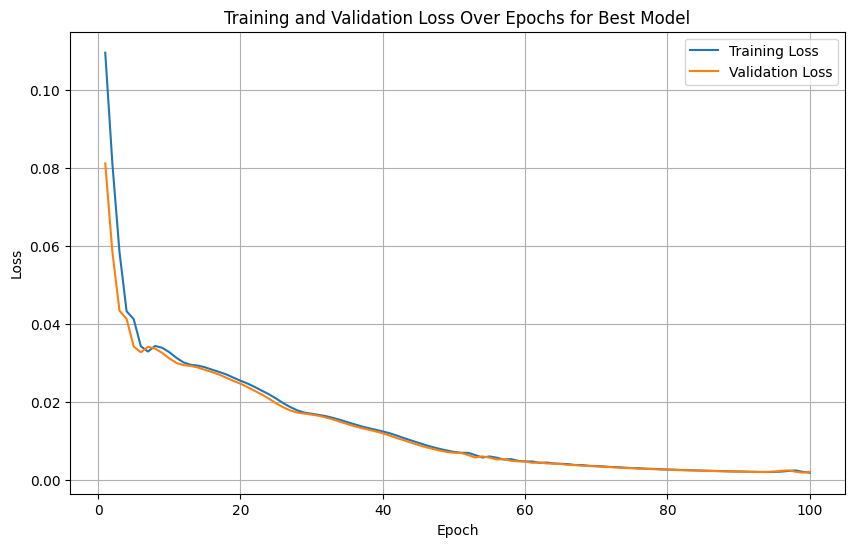

In [ ]:
# Plot Training and Validation Loss for the Best Model
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), all_train_losses[0], label='Training Loss')
plt.plot(range(1, epochs + 1), all_val_losses[0], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for Best Model')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
training_history = torch.load("/content/drive/MyDrive/Machine_Learning/HW1/ROBOT_5_ARMS_models/model_state_dict_r5_NO_PREPROCESSING.pt", weights_only=False)
best_hidden_sizes = training_history["hyperparameters"]["hidden_sizes"]
model = NeuralNetwork(hidden_sizes=best_hidden_sizes)
model.load_state_dict(training_history["model_state_dict"])

model.eval()
with torch.no_grad():
    y_test_pred_tensor = model(X_test_tensor)
    y_test_pred = y_test_pred_tensor.numpy()

# Calculate test metrics
test_mse = root_mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Root Mean Squared Error:", test_mse)
print("Test R^2 Score:", test_r2)

Test Root Mean Squared Error: 0.023414536960890714
Test R^2 Score: 0.9821281433105469


## Check of Inverse Kinematics
Compute the Inverse Kinematics using two algorithms Levenberg-Marquadt and Newton-Raphson.



In [ ]:
def FK(model, theta):
    theta = theta.view(1, -1)
    out = model(theta)
    return out.view(-1)

In [ ]:
def FK_Jacobian(model, theta):
    theta = theta.view(1, -1)

    def forward_kinematics_fn(t):
        return model(t).view(-1)

    jacobian = torch.autograd.functional.jacobian(forward_kinematics_fn, theta)
    return jacobian.squeeze()

In [ ]:
def numerical_jacobian(model, theta, epsilon=1):
    theta_np = theta.detach().numpy()
    n = theta_np.size
    y0 = model.predict(theta_np.reshape(1, -1)).flatten()
    m = y0.size
    J = np.zeros((m, n))

    for i in range(n):
        theta_plus = theta_np.copy()
        theta_minus = theta_np.copy()
        theta_plus[i] += epsilon
        theta_minus[i] -= epsilon

        y_plus = model.predict(theta_plus.reshape(1, -1))
        y_minus = model.predict(theta_minus.reshape(1, -1))

        # Differenze finite centrali
        J[:, i] = (y_plus - y_minus).flatten() / (2 * epsilon)
    return J


In [ ]:
training_history = torch.load("/content/drive/MyDrive/Machine_Learning/HW1/ROBOT_5_ARMS_models/model_state_dict_r5_NO_PREPROCESSING.pt", weights_only=False)
best_hidden_sizes = training_history["hyperparameters"]["hidden_sizes"]
model = NeuralNetwork(hidden_sizes=best_hidden_sizes)
model.load_state_dict(training_history["model_state_dict"])
model.eval()

NeuralNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=5, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=80, bias=True)
    (3): Linear(in_features=80, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [ ]:
def inverse_kinematics_newton_raphson(model, initial_joints, target_position, max_iters=50000, tolerance=1e-4):
    joints = initial_joints.clone().detach().requires_grad_(True)

    for i in range(max_iters):
        current_position = FK(model, joints)
        error = target_position - current_position
        if torch.norm(error) < tolerance:
            return joints.detach()
        #else:
          #print("MAX ITERS REACHED NEWTON")

        jacobian = FK_Jacobian(model, joints)
        try:
            delta_joints = torch.linalg.solve(jacobian, error)
        except RuntimeError as e:
            print("Errore nell'inversione del Jacobiano:", e)
            return joints.detach()

        joints = joints + delta_joints

    return joints.detach()

In [ ]:
def inverse_kinematics_levenberg_marquardt(model, initial_joints, target_position, max_iters=50000, tolerance=1e-4, lambda_=0.05):
    joints = initial_joints.clone().detach().requires_grad_(True)

    for i in range(max_iters):
        current_position = FK(model, joints)
        error = target_position - current_position
        if torch.norm(error) < tolerance:
            return joints.detach()
        #else:
          #print("MAX ITERS REACHED LM")

        jacobian = FK_Jacobian(model, joints)

        # Update of Levenberg-Marquardt: (J^T J + λI) * delta_joints = J^T * error
        A = jacobian.T @ jacobian + lambda_ * torch.eye(jacobian.size(1))
        b = jacobian.T @ error

        try:
            delta_joints = torch.linalg.solve(A, b)
        except RuntimeError as e:
            print("Errore nell'inversione della matrice in Levenberg-Marquardt:", e)
            return joints.detach()

        joints = joints + delta_joints

    return joints.detach()

In [ ]:
def compare_methods(model, initial_joints, target_position):

    # Newton-Raphson Method
    print("Newton-Raphson Method:")
    target_joints_nr = inverse_kinematics_newton_raphson(model, initial_joints, target_position)
    nr_error = torch.norm(FK(model, target_joints_nr) - target_position)
    print("Target joints Newton-Raphson:", target_joints_nr)
    print("Newton-Raphson Error:", nr_error.item())

    # Levenberg-Marquardt Method
    print("\nLevenberg-Marquardt Method:")
    target_joints_lm = inverse_kinematics_levenberg_marquardt(model, initial_joints, target_position)
    lm_error = torch.norm(FK(model, target_joints_lm) - target_position)
    print("Target joints Levenberg-Marquardt:", target_joints_lm)
    print("Levenberg-Marquardt Error:", lm_error.item())

    print(" ")
    print("--------------------------------------")
    print("Comparison target:", target_position, "Value computed by Newton-Raphson Method: ", FK(model, target_joints_nr).detach()) #.detach() is used for remove grad_fn=<ViewBackward0> from print
    print("Comparison target:", target_position, "Value computed by Levenberg Marquardt: ", FK(model, target_joints_lm).detach())


In [ ]:
initial_joints = torch.tensor([0.0, 0.0, np.pi/4, 0.0, 0.0], requires_grad=True)
#target_position = torch.tensor([-0.1, -0.1])
target_position = torch.tensor(y_test.sample(n=1).to_numpy().flatten(), dtype=torch.float32)
print(target_position)

compare_methods(model, initial_joints, target_position)


tensor([-0.0770, -0.1750,  0.0960])
Newton-Raphson Method:
Errore nell'inversione del Jacobiano: linalg.solve: A must be batches of square matrices, but they are 3 by 5 matrices
Target joints Newton-Raphson: tensor([0.0000, 0.0000, 0.7854, 0.0000, 0.0000])
Newton-Raphson Error: 0.5341894030570984

Levenberg-Marquardt Method:
Target joints Levenberg-Marquardt: tensor([-1.1600, -0.7358,  2.8529,  0.5476,  1.6111])
Levenberg-Marquardt Error: 9.16970893740654e-05
 
--------------------------------------
Comparison target: tensor([-0.0770, -0.1750,  0.0960]) Value computed by Newton-Raphson Method:  tensor([0.3005, 0.0266, 0.4157])
Comparison target: tensor([-0.0770, -0.1750,  0.0960]) Value computed by Levenberg Marquardt:  tensor([-0.0770, -0.1749,  0.0960])


# 100 K Preprocessing

## Dataset

In [9]:
# Carica il dataset
df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/HW1/dataset/LOG_FILE_FULL_R5.csv", sep=';')
df_filtered = df[['j0', 'j1', 'j2', 'j3', 'j4', 'ft_x', 'ft_y', 'ft_z']]

X = df_filtered[['j0', 'j1', 'j2', 'j3', 'j4']]
y = df_filtered[['ft_x', 'ft_y', 'ft_z']]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

scaler_X = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

print("Training set size:", X_train_scaled.shape[0])
print("Validation set size:", X_val_scaled.shape[0])
print("Test set size:", X_test_scaled.shape[0])


Training set size: 60000
Validation set size: 20000
Test set size: 20000


## Model train and test

In [ ]:
#-------------------------Linear Regression-------------------------

# train
lr = MultiOutputRegressor(LinearRegression())
lr.fit(X_train_scaled, y_train)

# test
warnings.filterwarnings("ignore")
lr_rmse, lr_r2 = evaluate_model(lr, X_test, y_test)
print(f"Linear Regression RMSE: {lr_rmse}, R2: {lr_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

# ----------------------Decision tree regressor-------------------------

# train
dt_param_grid = {
    'splitter': ['best', 'random'],
    'max_depth': [20, 25, 30]
}
dt = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt, dt_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
dt_grid.fit(X_train_scaled, y_train)

# test
best_dt = dt_grid.best_estimator_
dt_rmse, dt_r2 = evaluate_model(best_dt, X_test_scaled, y_test)
print(f"Decision Tree RMSE: {dt_rmse}, R2: {dt_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

# -----------------------------SVR-----------------------------

# train
svr_param_grid = {
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 1],
    'estimator__max_iter': [150]
}
svr = MultiOutputRegressor(SVR())
svr_grid = GridSearchCV(svr, svr_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train)


# test
best_svr = svr_grid.best_estimator_
svr_rmse, svr_r2 = evaluate_model(best_svr, X_test_scaled, y_test)
print(f"SVR Best Params: {svr_grid.best_params_}")
print(f"SVR RMSE: {svr_rmse}, R2: {svr_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

#---------------------------Random Forest--------------------------

# train
rf_param_grid = {
    'estimator__n_estimators': [100, 150],
    'estimator__max_depth': [12, 15]
}
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf_grid = GridSearchCV(rf, rf_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)


#test
best_rf = rf_grid.best_estimator_
rf_rmse, rf_r2 = evaluate_model(best_rf, X_test_scaled, y_test)
print(f"Random Forest Best Params: {rf_grid.best_params_}")
print(f"Random Forest RMSE: {rf_rmse}, R2: {rf_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

#------------------------------------KNN---------------------------------------

# train
knn_param_grid = {
    'estimator__n_neighbors': [3, 5, 10],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}
knn = MultiOutputRegressor(KNeighborsRegressor())
knn_grid = GridSearchCV(knn, knn_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

#test
best_knn = knn_grid.best_estimator_
knn_rmse, knn_r2 = evaluate_model(best_knn, X_test_scaled, y_test)
print(f"KNN Best Params: {knn_grid.best_params_}")
print(f"KNN RMSE: {knn_rmse}, R2: {knn_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

Linear Regression RMSE: 0.165771046123179, R2: 0.11368703095983775
 
--------------------------------------------------------------
 
Decision Tree RMSE: 0.045232696903655355, R2: 0.9331427712463795
 
--------------------------------------------------------------
 
SVR Best Params: {'estimator__C': 10, 'estimator__epsilon': 0.01, 'estimator__kernel': 'rbf', 'estimator__max_iter': 150}
SVR RMSE: 0.0369651800472546, R2: 0.9522599057301638
 
--------------------------------------------------------------
 
Random Forest Best Params: {'estimator__max_depth': 15, 'estimator__n_estimators': 150}
Random Forest RMSE: 0.023789837675827995, R2: 0.9798541896759213
 
--------------------------------------------------------------
 
KNN Best Params: {'estimator__n_neighbors': 10, 'estimator__p': 2, 'estimator__weights': 'distance'}
KNN RMSE: 0.01861321798352694, R2: 0.9886265466305589
 
--------------------------------------------------------------
 


In [10]:
# Conversion of data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [11]:
class NeuralNetwork(nn.Module):
    def __init__(self, hidden_sizes):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()

        # Input layer
        input_size = 5  # two input features: j0 and j1
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))

        # Output layer
        output_size = 3  # output: ft_x and ft_y
        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))

    def forward(self, x):
        for layer in self.layers[:-1]:  # Apply ReLU to all hidden layers
            x = torch.relu(layer(x))
        x = self.layers[-1](x)  # No activation for the output layer
        return x

In [ ]:
#'hidden_sizes': [[16, 32, 16], [16, 32, 64, 32, 16], [32, 64, 128, 64, 32]],
param_grid = {
    'learning_rate': [0.01, 0.001],
    'hidden_sizes': [[16, 32, 64, 32, 16], [32, 64, 80, 64, 32], [16, 32, 64, 128, 64, 32, 16]],
    'optimizer': ['Adam', 'SGD']
}
grid = ParameterGrid(param_grid)

epochs = 100
best_val_loss = float('inf')
save_path = "/content/drive/MyDrive/Machine_Learning/HW1/ROBOT_5_ARMS_models"

all_train_losses = []
all_val_losses = []
best_model_info = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "model_state_dict": None,
    "optimizer_state_dict": None,
    "hyperparameters": {}
}

In [ ]:
for params in grid:
    # Initialize model and criterion
    model = NeuralNetwork(hidden_sizes=params['hidden_sizes'])
    criterion = nn.MSELoss()

    # Choose optimizer based on parameter grid
    if params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])
    elif params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['learning_rate'])

    # Track losses for each epoch
    train_losses = []
    val_losses = []

    # Training loop
    for epoch in tqdm(range(epochs), desc=f"Training Model with LR={params['learning_rate']}, Layers={params['hidden_sizes']}, Optimizer={params['optimizer']}"):
        # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        train_loss = criterion(outputs, y_train_tensor)
        train_loss.backward()
        optimizer.step()

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)

        # Store losses
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

        # Check if this model is the best so far based on validation loss
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model_info = {
                "epoch": epoch + 1,
                "train_loss": train_loss.item(),
                "val_loss": val_loss.item(),
                "model_state_dict": model.state_dict(),  # Store the best model weights
                "optimizer_state_dict": optimizer.state_dict(),  # Save the best optimizer state
                "hyperparameters": params  # Save the best hyperparameters for model reconstruction
            }

        # Update tqdm description with current losses
        tqdm.write(f"Epoch [{epoch+1}/{epochs}], Training Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    # Save all losses for plotting
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

# Save the best model information to a file
torch.save(best_model_info, os.path.join(save_path, "model_state_dict_r5_PREPROCESSING.pt"))

Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:17,  5.64it/s]

Epoch [1/100], Training Loss: 0.0601, Validation Loss: 0.0420
Epoch [2/100], Training Loss: 0.0423, Validation Loss: 0.0325


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   4%|▍         | 4/100 [00:00<00:16,  5.66it/s]

Epoch [3/100], Training Loss: 0.0327, Validation Loss: 0.0336
Epoch [4/100], Training Loss: 0.0335, Validation Loss: 0.0341


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   6%|▌         | 6/100 [00:01<00:16,  5.63it/s]

Epoch [5/100], Training Loss: 0.0340, Validation Loss: 0.0309
Epoch [6/100], Training Loss: 0.0309, Validation Loss: 0.0299


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   8%|▊         | 8/100 [00:01<00:14,  6.53it/s]

Epoch [7/100], Training Loss: 0.0300, Validation Loss: 0.0303
Epoch [8/100], Training Loss: 0.0304, Validation Loss: 0.0305


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  10%|█         | 10/100 [00:01<00:13,  6.78it/s]

Epoch [9/100], Training Loss: 0.0306, Validation Loss: 0.0302
Epoch [10/100], Training Loss: 0.0303, Validation Loss: 0.0296


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  12%|█▏        | 12/100 [00:01<00:13,  6.53it/s]

Epoch [11/100], Training Loss: 0.0296, Validation Loss: 0.0289
Epoch [12/100], Training Loss: 0.0289, Validation Loss: 0.0285


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  14%|█▍        | 14/100 [00:02<00:12,  6.66it/s]

Epoch [13/100], Training Loss: 0.0285, Validation Loss: 0.0285
Epoch [14/100], Training Loss: 0.0285, Validation Loss: 0.0283


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  16%|█▌        | 16/100 [00:02<00:12,  6.80it/s]

Epoch [15/100], Training Loss: 0.0283, Validation Loss: 0.0276
Epoch [16/100], Training Loss: 0.0276, Validation Loss: 0.0270


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  18%|█▊        | 18/100 [00:02<00:12,  6.56it/s]

Epoch [17/100], Training Loss: 0.0270, Validation Loss: 0.0267
Epoch [18/100], Training Loss: 0.0268, Validation Loss: 0.0265


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  20%|██        | 20/100 [00:03<00:11,  6.84it/s]

Epoch [19/100], Training Loss: 0.0266, Validation Loss: 0.0261
Epoch [20/100], Training Loss: 0.0262, Validation Loss: 0.0256


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  22%|██▏       | 22/100 [00:03<00:11,  6.83it/s]

Epoch [21/100], Training Loss: 0.0256, Validation Loss: 0.0250
Epoch [22/100], Training Loss: 0.0250, Validation Loss: 0.0245


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  24%|██▍       | 24/100 [00:03<00:11,  6.52it/s]

Epoch [23/100], Training Loss: 0.0245, Validation Loss: 0.0241
Epoch [24/100], Training Loss: 0.0241, Validation Loss: 0.0235


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:03<00:10,  6.94it/s]

Epoch [25/100], Training Loss: 0.0235, Validation Loss: 0.0227
Epoch [26/100], Training Loss: 0.0227, Validation Loss: 0.0220


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  28%|██▊       | 28/100 [00:04<00:08,  8.20it/s]

Epoch [27/100], Training Loss: 0.0219, Validation Loss: 0.0211
Epoch [28/100], Training Loss: 0.0211, Validation Loss: 0.0204
Epoch [29/100], Training Loss: 0.0204, Validation Loss: 0.0195


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  30%|███       | 30/100 [00:04<00:07,  8.98it/s]

Epoch [30/100], Training Loss: 0.0194, Validation Loss: 0.0186
Epoch [31/100], Training Loss: 0.0185, Validation Loss: 0.0178


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  33%|███▎      | 33/100 [00:04<00:08,  8.29it/s]

Epoch [32/100], Training Loss: 0.0177, Validation Loss: 0.0172
Epoch [33/100], Training Loss: 0.0171, Validation Loss: 0.0173


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  35%|███▌      | 35/100 [00:05<00:08,  7.53it/s]

Epoch [34/100], Training Loss: 0.0171, Validation Loss: 0.0153
Epoch [35/100], Training Loss: 0.0151, Validation Loss: 0.0140


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  37%|███▋      | 37/100 [00:05<00:08,  7.46it/s]

Epoch [36/100], Training Loss: 0.0139, Validation Loss: 0.0137
Epoch [37/100], Training Loss: 0.0135, Validation Loss: 0.0118


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  38%|███▊      | 38/100 [00:05<00:08,  6.90it/s]

Epoch [38/100], Training Loss: 0.0117, Validation Loss: 0.0115


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  40%|████      | 40/100 [00:05<00:09,  6.20it/s]

Epoch [39/100], Training Loss: 0.0114, Validation Loss: 0.0106
Epoch [40/100], Training Loss: 0.0105, Validation Loss: 0.0102


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  42%|████▏     | 42/100 [00:06<00:09,  6.23it/s]

Epoch [41/100], Training Loss: 0.0100, Validation Loss: 0.0103
Epoch [42/100], Training Loss: 0.0101, Validation Loss: 0.0100


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  44%|████▍     | 44/100 [00:06<00:08,  6.93it/s]

Epoch [43/100], Training Loss: 0.0099, Validation Loss: 0.0097
Epoch [44/100], Training Loss: 0.0096, Validation Loss: 0.0092


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  46%|████▌     | 46/100 [00:06<00:07,  6.93it/s]

Epoch [45/100], Training Loss: 0.0091, Validation Loss: 0.0089
Epoch [46/100], Training Loss: 0.0088, Validation Loss: 0.0083


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  47%|████▋     | 47/100 [00:07<00:08,  6.59it/s]

Epoch [47/100], Training Loss: 0.0082, Validation Loss: 0.0081
Epoch [48/100], Training Loss: 0.0080, Validation Loss: 0.0076


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  50%|█████     | 50/100 [00:07<00:08,  5.92it/s]

Epoch [49/100], Training Loss: 0.0075, Validation Loss: 0.0075
Epoch [50/100], Training Loss: 0.0074, Validation Loss: 0.0072


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  52%|█████▏    | 52/100 [00:07<00:07,  6.11it/s]

Epoch [51/100], Training Loss: 0.0070, Validation Loss: 0.0068
Epoch [52/100], Training Loss: 0.0067, Validation Loss: 0.0065


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  54%|█████▍    | 54/100 [00:08<00:08,  5.51it/s]

Epoch [53/100], Training Loss: 0.0064, Validation Loss: 0.0061
Epoch [54/100], Training Loss: 0.0060, Validation Loss: 0.0060


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  56%|█████▌    | 56/100 [00:08<00:07,  5.76it/s]

Epoch [55/100], Training Loss: 0.0059, Validation Loss: 0.0057
Epoch [56/100], Training Loss: 0.0056, Validation Loss: 0.0056


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  58%|█████▊    | 58/100 [00:08<00:07,  5.62it/s]

Epoch [57/100], Training Loss: 0.0055, Validation Loss: 0.0053
Epoch [58/100], Training Loss: 0.0052, Validation Loss: 0.0051


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  60%|██████    | 60/100 [00:09<00:06,  5.86it/s]

Epoch [59/100], Training Loss: 0.0050, Validation Loss: 0.0049
Epoch [60/100], Training Loss: 0.0048, Validation Loss: 0.0047


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  61%|██████    | 61/100 [00:09<00:12,  3.00it/s]

Epoch [61/100], Training Loss: 0.0047, Validation Loss: 0.0046


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  62%|██████▏   | 62/100 [00:10<00:18,  2.04it/s]

Epoch [62/100], Training Loss: 0.0045, Validation Loss: 0.0044


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  63%|██████▎   | 63/100 [00:11<00:22,  1.67it/s]

Epoch [63/100], Training Loss: 0.0043, Validation Loss: 0.0042


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  65%|██████▌   | 65/100 [00:12<00:14,  2.46it/s]

Epoch [64/100], Training Loss: 0.0042, Validation Loss: 0.0040
Epoch [65/100], Training Loss: 0.0039, Validation Loss: 0.0039


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  67%|██████▋   | 67/100 [00:12<00:08,  3.71it/s]

Epoch [66/100], Training Loss: 0.0038, Validation Loss: 0.0037
Epoch [67/100], Training Loss: 0.0036, Validation Loss: 0.0035


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  69%|██████▉   | 69/100 [00:12<00:06,  4.85it/s]

Epoch [68/100], Training Loss: 0.0034, Validation Loss: 0.0034
Epoch [69/100], Training Loss: 0.0033, Validation Loss: 0.0032


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  71%|███████   | 71/100 [00:12<00:05,  5.73it/s]

Epoch [70/100], Training Loss: 0.0032, Validation Loss: 0.0032
Epoch [71/100], Training Loss: 0.0031, Validation Loss: 0.0030


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  73%|███████▎  | 73/100 [00:13<00:04,  6.23it/s]

Epoch [72/100], Training Loss: 0.0030, Validation Loss: 0.0029
Epoch [73/100], Training Loss: 0.0029, Validation Loss: 0.0029


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  75%|███████▌  | 75/100 [00:13<00:03,  7.03it/s]

Epoch [74/100], Training Loss: 0.0028, Validation Loss: 0.0028
Epoch [75/100], Training Loss: 0.0027, Validation Loss: 0.0027


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  77%|███████▋  | 77/100 [00:13<00:03,  6.84it/s]

Epoch [76/100], Training Loss: 0.0027, Validation Loss: 0.0027
Epoch [77/100], Training Loss: 0.0026, Validation Loss: 0.0026


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  79%|███████▉  | 79/100 [00:14<00:02,  7.29it/s]

Epoch [78/100], Training Loss: 0.0025, Validation Loss: 0.0025
Epoch [79/100], Training Loss: 0.0025, Validation Loss: 0.0024


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  81%|████████  | 81/100 [00:14<00:02,  7.60it/s]

Epoch [80/100], Training Loss: 0.0024, Validation Loss: 0.0023
Epoch [81/100], Training Loss: 0.0023, Validation Loss: 0.0023


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  83%|████████▎ | 83/100 [00:14<00:02,  6.87it/s]

Epoch [82/100], Training Loss: 0.0022, Validation Loss: 0.0022
Epoch [83/100], Training Loss: 0.0022, Validation Loss: 0.0022


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  85%|████████▌ | 85/100 [00:14<00:02,  6.56it/s]

Epoch [84/100], Training Loss: 0.0022, Validation Loss: 0.0022
Epoch [85/100], Training Loss: 0.0021, Validation Loss: 0.0021


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  87%|████████▋ | 87/100 [00:15<00:01,  7.65it/s]

Epoch [86/100], Training Loss: 0.0021, Validation Loss: 0.0020
Epoch [87/100], Training Loss: 0.0020, Validation Loss: 0.0019


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  89%|████████▉ | 89/100 [00:15<00:01,  8.20it/s]

Epoch [88/100], Training Loss: 0.0019, Validation Loss: 0.0019
Epoch [89/100], Training Loss: 0.0019, Validation Loss: 0.0019


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  91%|█████████ | 91/100 [00:15<00:01,  8.35it/s]

Epoch [90/100], Training Loss: 0.0019, Validation Loss: 0.0019
Epoch [91/100], Training Loss: 0.0018, Validation Loss: 0.0018


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  93%|█████████▎| 93/100 [00:15<00:00,  8.16it/s]

Epoch [92/100], Training Loss: 0.0018, Validation Loss: 0.0018
Epoch [93/100], Training Loss: 0.0018, Validation Loss: 0.0018


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  95%|█████████▌| 95/100 [00:16<00:00,  7.99it/s]

Epoch [94/100], Training Loss: 0.0018, Validation Loss: 0.0018
Epoch [95/100], Training Loss: 0.0018, Validation Loss: 0.0017


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  97%|█████████▋| 97/100 [00:16<00:00,  8.01it/s]

Epoch [96/100], Training Loss: 0.0017, Validation Loss: 0.0016
Epoch [97/100], Training Loss: 0.0016, Validation Loss: 0.0016


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  99%|█████████▉| 99/100 [00:16<00:00,  7.00it/s]

Epoch [98/100], Training Loss: 0.0016, Validation Loss: 0.0016
Epoch [99/100], Training Loss: 0.0015, Validation Loss: 0.0015


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:16<00:00,  5.92it/s]


Epoch [100/100], Training Loss: 0.0015, Validation Loss: 0.0015


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   1%|          | 1/100 [00:00<00:12,  8.23it/s]

Epoch [1/100], Training Loss: 0.0948, Validation Loss: 0.0934


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   2%|▏         | 2/100 [00:00<00:12,  8.02it/s]

Epoch [2/100], Training Loss: 0.0936, Validation Loss: 0.0923


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   3%|▎         | 3/100 [00:00<00:12,  7.86it/s]

Epoch [3/100], Training Loss: 0.0924, Validation Loss: 0.0911


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   4%|▍         | 4/100 [00:00<00:12,  7.40it/s]

Epoch [4/100], Training Loss: 0.0913, Validation Loss: 0.0900


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   5%|▌         | 5/100 [00:00<00:13,  7.13it/s]

Epoch [5/100], Training Loss: 0.0902, Validation Loss: 0.0889


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:00<00:14,  6.57it/s]

Epoch [6/100], Training Loss: 0.0891, Validation Loss: 0.0878


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   7%|▋         | 7/100 [00:01<00:14,  6.53it/s]

Epoch [7/100], Training Loss: 0.0880, Validation Loss: 0.0868


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   8%|▊         | 8/100 [00:01<00:13,  6.82it/s]

Epoch [8/100], Training Loss: 0.0869, Validation Loss: 0.0857


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   9%|▉         | 9/100 [00:01<00:13,  6.95it/s]

Epoch [9/100], Training Loss: 0.0859, Validation Loss: 0.0847


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  10%|█         | 10/100 [00:01<00:12,  7.34it/s]

Epoch [10/100], Training Loss: 0.0849, Validation Loss: 0.0837


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:01<00:11,  7.93it/s]

Epoch [11/100], Training Loss: 0.0839, Validation Loss: 0.0827


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  12%|█▏        | 12/100 [00:01<00:10,  8.12it/s]

Epoch [12/100], Training Loss: 0.0829, Validation Loss: 0.0818


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  13%|█▎        | 13/100 [00:01<00:10,  8.00it/s]

Epoch [13/100], Training Loss: 0.0819, Validation Loss: 0.0808


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  14%|█▍        | 14/100 [00:01<00:10,  8.14it/s]

Epoch [14/100], Training Loss: 0.0810, Validation Loss: 0.0799


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  15%|█▌        | 15/100 [00:01<00:10,  8.25it/s]

Epoch [15/100], Training Loss: 0.0800, Validation Loss: 0.0790


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  16%|█▌        | 16/100 [00:02<00:10,  8.11it/s]

Epoch [16/100], Training Loss: 0.0791, Validation Loss: 0.0781


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  17%|█▋        | 17/100 [00:02<00:10,  7.81it/s]

Epoch [17/100], Training Loss: 0.0782, Validation Loss: 0.0772


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  18%|█▊        | 18/100 [00:02<00:10,  7.99it/s]

Epoch [18/100], Training Loss: 0.0773, Validation Loss: 0.0763


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  19%|█▉        | 19/100 [00:02<00:09,  8.36it/s]

Epoch [19/100], Training Loss: 0.0765, Validation Loss: 0.0755


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  20%|██        | 20/100 [00:02<00:09,  8.61it/s]

Epoch [20/100], Training Loss: 0.0756, Validation Loss: 0.0746


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  21%|██        | 21/100 [00:02<00:09,  8.55it/s]

Epoch [21/100], Training Loss: 0.0748, Validation Loss: 0.0738


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  22%|██▏       | 22/100 [00:02<00:10,  7.79it/s]

Epoch [22/100], Training Loss: 0.0740, Validation Loss: 0.0730


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  23%|██▎       | 23/100 [00:02<00:09,  7.86it/s]

Epoch [23/100], Training Loss: 0.0732, Validation Loss: 0.0722


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  24%|██▍       | 24/100 [00:03<00:09,  7.93it/s]

Epoch [24/100], Training Loss: 0.0724, Validation Loss: 0.0715


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  25%|██▌       | 25/100 [00:03<00:08,  8.45it/s]

Epoch [25/100], Training Loss: 0.0716, Validation Loss: 0.0707


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  26%|██▌       | 26/100 [00:03<00:08,  8.26it/s]

Epoch [26/100], Training Loss: 0.0708, Validation Loss: 0.0700


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  27%|██▋       | 27/100 [00:03<00:09,  7.89it/s]

Epoch [27/100], Training Loss: 0.0701, Validation Loss: 0.0692


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  28%|██▊       | 28/100 [00:03<00:08,  8.10it/s]

Epoch [28/100], Training Loss: 0.0694, Validation Loss: 0.0685


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  29%|██▉       | 29/100 [00:03<00:08,  8.04it/s]

Epoch [29/100], Training Loss: 0.0687, Validation Loss: 0.0678


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  30%|███       | 30/100 [00:03<00:09,  7.70it/s]

Epoch [30/100], Training Loss: 0.0679, Validation Loss: 0.0671


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  31%|███       | 31/100 [00:03<00:09,  7.62it/s]

Epoch [31/100], Training Loss: 0.0673, Validation Loss: 0.0664


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  32%|███▏      | 32/100 [00:04<00:08,  7.80it/s]

Epoch [32/100], Training Loss: 0.0666, Validation Loss: 0.0658


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  33%|███▎      | 33/100 [00:04<00:08,  8.05it/s]

Epoch [33/100], Training Loss: 0.0659, Validation Loss: 0.0651


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  34%|███▍      | 34/100 [00:04<00:07,  8.33it/s]

Epoch [34/100], Training Loss: 0.0652, Validation Loss: 0.0645


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  35%|███▌      | 35/100 [00:04<00:07,  8.20it/s]

Epoch [35/100], Training Loss: 0.0646, Validation Loss: 0.0638


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  36%|███▌      | 36/100 [00:04<00:07,  8.14it/s]

Epoch [36/100], Training Loss: 0.0640, Validation Loss: 0.0632


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  37%|███▋      | 37/100 [00:04<00:07,  8.08it/s]

Epoch [37/100], Training Loss: 0.0633, Validation Loss: 0.0626


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  38%|███▊      | 38/100 [00:04<00:08,  7.63it/s]

Epoch [38/100], Training Loss: 0.0627, Validation Loss: 0.0620


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  39%|███▉      | 39/100 [00:05<00:08,  6.98it/s]

Epoch [39/100], Training Loss: 0.0621, Validation Loss: 0.0614


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  40%|████      | 40/100 [00:05<00:08,  6.80it/s]

Epoch [40/100], Training Loss: 0.0616, Validation Loss: 0.0608


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  41%|████      | 41/100 [00:05<00:09,  6.39it/s]

Epoch [41/100], Training Loss: 0.0610, Validation Loss: 0.0603


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  42%|████▏     | 42/100 [00:05<00:09,  6.33it/s]

Epoch [42/100], Training Loss: 0.0604, Validation Loss: 0.0597


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  43%|████▎     | 43/100 [00:05<00:08,  6.35it/s]

Epoch [43/100], Training Loss: 0.0599, Validation Loss: 0.0592


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  44%|████▍     | 44/100 [00:05<00:08,  6.30it/s]

Epoch [44/100], Training Loss: 0.0593, Validation Loss: 0.0586


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  45%|████▌     | 45/100 [00:06<00:08,  6.15it/s]

Epoch [45/100], Training Loss: 0.0588, Validation Loss: 0.0581


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  46%|████▌     | 46/100 [00:06<00:09,  5.90it/s]

Epoch [46/100], Training Loss: 0.0583, Validation Loss: 0.0576


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  48%|████▊     | 48/100 [00:06<00:08,  5.83it/s]

Epoch [47/100], Training Loss: 0.0577, Validation Loss: 0.0571
Epoch [48/100], Training Loss: 0.0572, Validation Loss: 0.0566


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  50%|█████     | 50/100 [00:06<00:08,  5.89it/s]

Epoch [49/100], Training Loss: 0.0567, Validation Loss: 0.0561
Epoch [50/100], Training Loss: 0.0562, Validation Loss: 0.0556


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  52%|█████▏    | 52/100 [00:07<00:08,  5.86it/s]

Epoch [51/100], Training Loss: 0.0558, Validation Loss: 0.0552
Epoch [52/100], Training Loss: 0.0553, Validation Loss: 0.0547


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  54%|█████▍    | 54/100 [00:07<00:07,  5.93it/s]

Epoch [53/100], Training Loss: 0.0548, Validation Loss: 0.0543
Epoch [54/100], Training Loss: 0.0544, Validation Loss: 0.0538


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  56%|█████▌    | 56/100 [00:07<00:07,  5.74it/s]

Epoch [55/100], Training Loss: 0.0539, Validation Loss: 0.0534
Epoch [56/100], Training Loss: 0.0535, Validation Loss: 0.0530


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  58%|█████▊    | 58/100 [00:08<00:07,  5.66it/s]

Epoch [57/100], Training Loss: 0.0531, Validation Loss: 0.0525
Epoch [58/100], Training Loss: 0.0527, Validation Loss: 0.0521


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  60%|██████    | 60/100 [00:08<00:06,  5.84it/s]

Epoch [59/100], Training Loss: 0.0522, Validation Loss: 0.0517
Epoch [60/100], Training Loss: 0.0518, Validation Loss: 0.0513


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  62%|██████▏   | 62/100 [00:08<00:06,  5.69it/s]

Epoch [61/100], Training Loss: 0.0514, Validation Loss: 0.0509
Epoch [62/100], Training Loss: 0.0511, Validation Loss: 0.0506


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  64%|██████▍   | 64/100 [00:09<00:06,  5.60it/s]

Epoch [63/100], Training Loss: 0.0507, Validation Loss: 0.0502
Epoch [64/100], Training Loss: 0.0503, Validation Loss: 0.0498


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  66%|██████▌   | 66/100 [00:09<00:05,  5.71it/s]

Epoch [65/100], Training Loss: 0.0499, Validation Loss: 0.0495
Epoch [66/100], Training Loss: 0.0496, Validation Loss: 0.0491


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  68%|██████▊   | 68/100 [00:09<00:05,  6.25it/s]

Epoch [67/100], Training Loss: 0.0492, Validation Loss: 0.0487
Epoch [68/100], Training Loss: 0.0489, Validation Loss: 0.0484


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  70%|███████   | 70/100 [00:10<00:04,  6.54it/s]

Epoch [69/100], Training Loss: 0.0485, Validation Loss: 0.0481
Epoch [70/100], Training Loss: 0.0482, Validation Loss: 0.0477


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  72%|███████▏  | 72/100 [00:10<00:04,  6.24it/s]

Epoch [71/100], Training Loss: 0.0479, Validation Loss: 0.0474
Epoch [72/100], Training Loss: 0.0475, Validation Loss: 0.0471


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:10<00:04,  5.93it/s]

Epoch [73/100], Training Loss: 0.0472, Validation Loss: 0.0468
Epoch [74/100], Training Loss: 0.0469, Validation Loss: 0.0465


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  76%|███████▌  | 76/100 [00:11<00:04,  5.95it/s]

Epoch [75/100], Training Loss: 0.0466, Validation Loss: 0.0462
Epoch [76/100], Training Loss: 0.0463, Validation Loss: 0.0459


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  78%|███████▊  | 78/100 [00:11<00:03,  5.93it/s]

Epoch [77/100], Training Loss: 0.0460, Validation Loss: 0.0456
Epoch [78/100], Training Loss: 0.0457, Validation Loss: 0.0453


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  80%|████████  | 80/100 [00:12<00:03,  5.71it/s]

Epoch [79/100], Training Loss: 0.0454, Validation Loss: 0.0451
Epoch [80/100], Training Loss: 0.0452, Validation Loss: 0.0448


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  82%|████████▏ | 82/100 [00:12<00:02,  6.57it/s]

Epoch [81/100], Training Loss: 0.0449, Validation Loss: 0.0445
Epoch [82/100], Training Loss: 0.0446, Validation Loss: 0.0443


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  84%|████████▍ | 84/100 [00:12<00:02,  6.71it/s]

Epoch [83/100], Training Loss: 0.0444, Validation Loss: 0.0440
Epoch [84/100], Training Loss: 0.0441, Validation Loss: 0.0437


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:12<00:02,  6.03it/s]

Epoch [85/100], Training Loss: 0.0439, Validation Loss: 0.0435
Epoch [86/100], Training Loss: 0.0436, Validation Loss: 0.0433


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  88%|████████▊ | 88/100 [00:13<00:01,  6.25it/s]

Epoch [87/100], Training Loss: 0.0434, Validation Loss: 0.0430
Epoch [88/100], Training Loss: 0.0431, Validation Loss: 0.0428


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  90%|█████████ | 90/100 [00:13<00:01,  6.57it/s]

Epoch [89/100], Training Loss: 0.0429, Validation Loss: 0.0425
Epoch [90/100], Training Loss: 0.0427, Validation Loss: 0.0423


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  92%|█████████▏| 92/100 [00:13<00:01,  6.61it/s]

Epoch [91/100], Training Loss: 0.0424, Validation Loss: 0.0421
Epoch [92/100], Training Loss: 0.0422, Validation Loss: 0.0419


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  94%|█████████▍| 94/100 [00:14<00:00,  7.13it/s]

Epoch [93/100], Training Loss: 0.0420, Validation Loss: 0.0417
Epoch [94/100], Training Loss: 0.0418, Validation Loss: 0.0415


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  96%|█████████▌| 96/100 [00:14<00:00,  7.10it/s]

Epoch [95/100], Training Loss: 0.0416, Validation Loss: 0.0413
Epoch [96/100], Training Loss: 0.0414, Validation Loss: 0.0411


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  98%|█████████▊| 98/100 [00:14<00:00,  7.19it/s]

Epoch [97/100], Training Loss: 0.0412, Validation Loss: 0.0409
Epoch [98/100], Training Loss: 0.0410, Validation Loss: 0.0407


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:14<00:00,  6.69it/s]


Epoch [99/100], Training Loss: 0.0408, Validation Loss: 0.0405
Epoch [100/100], Training Loss: 0.0406, Validation Loss: 0.0403


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:13,  7.02it/s]

Epoch [1/100], Training Loss: 0.0870, Validation Loss: 0.0851
Epoch [2/100], Training Loss: 0.0850, Validation Loss: 0.0831


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   4%|▍         | 4/100 [00:00<00:12,  7.52it/s]

Epoch [3/100], Training Loss: 0.0830, Validation Loss: 0.0812
Epoch [4/100], Training Loss: 0.0810, Validation Loss: 0.0792


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   6%|▌         | 6/100 [00:00<00:13,  7.23it/s]

Epoch [5/100], Training Loss: 0.0790, Validation Loss: 0.0773
Epoch [6/100], Training Loss: 0.0772, Validation Loss: 0.0755


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   8%|▊         | 8/100 [00:01<00:12,  7.22it/s]

Epoch [7/100], Training Loss: 0.0753, Validation Loss: 0.0737
Epoch [8/100], Training Loss: 0.0735, Validation Loss: 0.0719


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  10%|█         | 10/100 [00:01<00:12,  7.36it/s]

Epoch [9/100], Training Loss: 0.0717, Validation Loss: 0.0701
Epoch [10/100], Training Loss: 0.0699, Validation Loss: 0.0683


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  12%|█▏        | 12/100 [00:01<00:11,  7.52it/s]

Epoch [11/100], Training Loss: 0.0682, Validation Loss: 0.0666
Epoch [12/100], Training Loss: 0.0664, Validation Loss: 0.0648


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  14%|█▍        | 14/100 [00:01<00:12,  7.15it/s]

Epoch [13/100], Training Loss: 0.0646, Validation Loss: 0.0631
Epoch [14/100], Training Loss: 0.0629, Validation Loss: 0.0614


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  16%|█▌        | 16/100 [00:02<00:11,  7.01it/s]

Epoch [15/100], Training Loss: 0.0612, Validation Loss: 0.0598
Epoch [16/100], Training Loss: 0.0596, Validation Loss: 0.0582


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  18%|█▊        | 18/100 [00:02<00:11,  7.40it/s]

Epoch [17/100], Training Loss: 0.0580, Validation Loss: 0.0566
Epoch [18/100], Training Loss: 0.0565, Validation Loss: 0.0552


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  20%|██        | 20/100 [00:02<00:11,  6.75it/s]

Epoch [19/100], Training Loss: 0.0550, Validation Loss: 0.0538
Epoch [20/100], Training Loss: 0.0536, Validation Loss: 0.0524


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  22%|██▏       | 22/100 [00:03<00:11,  6.80it/s]

Epoch [21/100], Training Loss: 0.0523, Validation Loss: 0.0512
Epoch [22/100], Training Loss: 0.0510, Validation Loss: 0.0500


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  24%|██▍       | 24/100 [00:03<00:10,  7.30it/s]

Epoch [23/100], Training Loss: 0.0499, Validation Loss: 0.0489
Epoch [24/100], Training Loss: 0.0487, Validation Loss: 0.0478


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:03<00:09,  7.66it/s]

Epoch [25/100], Training Loss: 0.0476, Validation Loss: 0.0467
Epoch [26/100], Training Loss: 0.0466, Validation Loss: 0.0457


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  28%|██▊       | 28/100 [00:03<00:09,  7.76it/s]

Epoch [27/100], Training Loss: 0.0456, Validation Loss: 0.0446
Epoch [28/100], Training Loss: 0.0445, Validation Loss: 0.0435


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  30%|███       | 30/100 [00:04<00:09,  7.61it/s]

Epoch [29/100], Training Loss: 0.0434, Validation Loss: 0.0424
Epoch [30/100], Training Loss: 0.0423, Validation Loss: 0.0413


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  32%|███▏      | 32/100 [00:04<00:08,  8.09it/s]

Epoch [31/100], Training Loss: 0.0412, Validation Loss: 0.0402
Epoch [32/100], Training Loss: 0.0401, Validation Loss: 0.0392


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  34%|███▍      | 34/100 [00:04<00:07,  8.32it/s]

Epoch [33/100], Training Loss: 0.0392, Validation Loss: 0.0382
Epoch [34/100], Training Loss: 0.0382, Validation Loss: 0.0373


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  36%|███▌      | 36/100 [00:04<00:07,  8.12it/s]

Epoch [35/100], Training Loss: 0.0372, Validation Loss: 0.0363
Epoch [36/100], Training Loss: 0.0363, Validation Loss: 0.0354


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  38%|███▊      | 38/100 [00:05<00:07,  8.46it/s]

Epoch [37/100], Training Loss: 0.0353, Validation Loss: 0.0345
Epoch [38/100], Training Loss: 0.0345, Validation Loss: 0.0337


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  40%|████      | 40/100 [00:05<00:07,  8.17it/s]

Epoch [39/100], Training Loss: 0.0337, Validation Loss: 0.0330
Epoch [40/100], Training Loss: 0.0330, Validation Loss: 0.0324


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  42%|████▏     | 42/100 [00:05<00:06,  8.61it/s]

Epoch [41/100], Training Loss: 0.0324, Validation Loss: 0.0318
Epoch [42/100], Training Loss: 0.0319, Validation Loss: 0.0315


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  44%|████▍     | 44/100 [00:05<00:07,  7.91it/s]

Epoch [43/100], Training Loss: 0.0315, Validation Loss: 0.0312
Epoch [44/100], Training Loss: 0.0313, Validation Loss: 0.0311


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  46%|████▌     | 46/100 [00:06<00:07,  7.55it/s]

Epoch [45/100], Training Loss: 0.0312, Validation Loss: 0.0310
Epoch [46/100], Training Loss: 0.0311, Validation Loss: 0.0310


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  48%|████▊     | 48/100 [00:06<00:07,  6.88it/s]

Epoch [47/100], Training Loss: 0.0310, Validation Loss: 0.0310
Epoch [48/100], Training Loss: 0.0310, Validation Loss: 0.0309


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  50%|█████     | 50/100 [00:06<00:06,  7.37it/s]

Epoch [49/100], Training Loss: 0.0310, Validation Loss: 0.0309
Epoch [50/100], Training Loss: 0.0309, Validation Loss: 0.0308


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  52%|█████▏    | 52/100 [00:06<00:06,  7.52it/s]

Epoch [51/100], Training Loss: 0.0308, Validation Loss: 0.0306
Epoch [52/100], Training Loss: 0.0307, Validation Loss: 0.0304


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  54%|█████▍    | 54/100 [00:07<00:06,  7.43it/s]

Epoch [53/100], Training Loss: 0.0305, Validation Loss: 0.0302
Epoch [54/100], Training Loss: 0.0303, Validation Loss: 0.0300


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  56%|█████▌    | 56/100 [00:07<00:06,  6.92it/s]

Epoch [55/100], Training Loss: 0.0301, Validation Loss: 0.0298
Epoch [56/100], Training Loss: 0.0298, Validation Loss: 0.0296


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  58%|█████▊    | 58/100 [00:07<00:05,  7.17it/s]

Epoch [57/100], Training Loss: 0.0296, Validation Loss: 0.0294
Epoch [58/100], Training Loss: 0.0295, Validation Loss: 0.0293


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  60%|██████    | 60/100 [00:08<00:05,  7.16it/s]

Epoch [59/100], Training Loss: 0.0293, Validation Loss: 0.0291
Epoch [60/100], Training Loss: 0.0292, Validation Loss: 0.0290


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  62%|██████▏   | 62/100 [00:08<00:05,  6.89it/s]

Epoch [61/100], Training Loss: 0.0291, Validation Loss: 0.0289
Epoch [62/100], Training Loss: 0.0289, Validation Loss: 0.0288


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  64%|██████▍   | 64/100 [00:08<00:04,  7.26it/s]

Epoch [63/100], Training Loss: 0.0288, Validation Loss: 0.0287
Epoch [64/100], Training Loss: 0.0287, Validation Loss: 0.0285


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  66%|██████▌   | 66/100 [00:08<00:05,  6.52it/s]

Epoch [65/100], Training Loss: 0.0286, Validation Loss: 0.0284
Epoch [66/100], Training Loss: 0.0284, Validation Loss: 0.0283


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  68%|██████▊   | 68/100 [00:09<00:05,  5.95it/s]

Epoch [67/100], Training Loss: 0.0283, Validation Loss: 0.0281
Epoch [68/100], Training Loss: 0.0281, Validation Loss: 0.0279


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  70%|███████   | 70/100 [00:09<00:05,  5.57it/s]

Epoch [69/100], Training Loss: 0.0280, Validation Loss: 0.0278
Epoch [70/100], Training Loss: 0.0278, Validation Loss: 0.0276


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  72%|███████▏  | 72/100 [00:10<00:04,  5.61it/s]

Epoch [71/100], Training Loss: 0.0276, Validation Loss: 0.0274
Epoch [72/100], Training Loss: 0.0274, Validation Loss: 0.0272


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  74%|███████▍  | 74/100 [00:10<00:04,  6.14it/s]

Epoch [73/100], Training Loss: 0.0272, Validation Loss: 0.0270
Epoch [74/100], Training Loss: 0.0270, Validation Loss: 0.0268


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  76%|███████▌  | 76/100 [00:10<00:04,  5.94it/s]

Epoch [75/100], Training Loss: 0.0269, Validation Loss: 0.0266
Epoch [76/100], Training Loss: 0.0267, Validation Loss: 0.0265


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  78%|███████▊  | 78/100 [00:11<00:04,  5.33it/s]

Epoch [77/100], Training Loss: 0.0265, Validation Loss: 0.0263
Epoch [78/100], Training Loss: 0.0263, Validation Loss: 0.0261


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  80%|████████  | 80/100 [00:11<00:03,  5.20it/s]

Epoch [79/100], Training Loss: 0.0261, Validation Loss: 0.0259
Epoch [80/100], Training Loss: 0.0259, Validation Loss: 0.0257


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  82%|████████▏ | 82/100 [00:11<00:03,  5.19it/s]

Epoch [81/100], Training Loss: 0.0257, Validation Loss: 0.0254
Epoch [82/100], Training Loss: 0.0255, Validation Loss: 0.0252


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  84%|████████▍ | 84/100 [00:12<00:02,  5.94it/s]

Epoch [83/100], Training Loss: 0.0252, Validation Loss: 0.0250
Epoch [84/100], Training Loss: 0.0250, Validation Loss: 0.0248


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  86%|████████▌ | 86/100 [00:12<00:02,  6.61it/s]

Epoch [85/100], Training Loss: 0.0248, Validation Loss: 0.0245
Epoch [86/100], Training Loss: 0.0246, Validation Loss: 0.0243


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  88%|████████▊ | 88/100 [00:12<00:01,  6.18it/s]

Epoch [87/100], Training Loss: 0.0243, Validation Loss: 0.0241
Epoch [88/100], Training Loss: 0.0241, Validation Loss: 0.0238


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  90%|█████████ | 90/100 [00:13<00:01,  6.61it/s]

Epoch [89/100], Training Loss: 0.0239, Validation Loss: 0.0236
Epoch [90/100], Training Loss: 0.0236, Validation Loss: 0.0234


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  92%|█████████▏| 92/100 [00:13<00:01,  6.78it/s]

Epoch [91/100], Training Loss: 0.0234, Validation Loss: 0.0231
Epoch [92/100], Training Loss: 0.0232, Validation Loss: 0.0229


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  94%|█████████▍| 94/100 [00:13<00:00,  6.99it/s]

Epoch [93/100], Training Loss: 0.0230, Validation Loss: 0.0227
Epoch [94/100], Training Loss: 0.0227, Validation Loss: 0.0225


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  96%|█████████▌| 96/100 [00:13<00:00,  6.47it/s]

Epoch [95/100], Training Loss: 0.0225, Validation Loss: 0.0222
Epoch [96/100], Training Loss: 0.0223, Validation Loss: 0.0220


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  98%|█████████▊| 98/100 [00:14<00:00,  7.27it/s]

Epoch [97/100], Training Loss: 0.0220, Validation Loss: 0.0218
Epoch [98/100], Training Loss: 0.0218, Validation Loss: 0.0215


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:14<00:00,  6.92it/s]


Epoch [99/100], Training Loss: 0.0216, Validation Loss: 0.0213
Epoch [100/100], Training Loss: 0.0214, Validation Loss: 0.0211


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   2%|▏         | 2/100 [00:00<00:12,  7.75it/s]

Epoch [1/100], Training Loss: 0.0548, Validation Loss: 0.0544
Epoch [2/100], Training Loss: 0.0548, Validation Loss: 0.0544


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   4%|▍         | 4/100 [00:00<00:14,  6.59it/s]

Epoch [3/100], Training Loss: 0.0547, Validation Loss: 0.0543
Epoch [4/100], Training Loss: 0.0547, Validation Loss: 0.0543


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:00<00:14,  6.46it/s]

Epoch [5/100], Training Loss: 0.0546, Validation Loss: 0.0542
Epoch [6/100], Training Loss: 0.0546, Validation Loss: 0.0542


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   8%|▊         | 8/100 [00:01<00:12,  7.13it/s]

Epoch [7/100], Training Loss: 0.0545, Validation Loss: 0.0541
Epoch [8/100], Training Loss: 0.0545, Validation Loss: 0.0541


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  10%|█         | 10/100 [00:01<00:13,  6.63it/s]

Epoch [9/100], Training Loss: 0.0544, Validation Loss: 0.0541
Epoch [10/100], Training Loss: 0.0544, Validation Loss: 0.0540


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  12%|█▏        | 12/100 [00:01<00:11,  7.39it/s]

Epoch [11/100], Training Loss: 0.0544, Validation Loss: 0.0540
Epoch [12/100], Training Loss: 0.0543, Validation Loss: 0.0539


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  14%|█▍        | 14/100 [00:01<00:10,  8.02it/s]

Epoch [13/100], Training Loss: 0.0543, Validation Loss: 0.0539
Epoch [14/100], Training Loss: 0.0542, Validation Loss: 0.0538


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  16%|█▌        | 16/100 [00:02<00:10,  8.21it/s]

Epoch [15/100], Training Loss: 0.0542, Validation Loss: 0.0538
Epoch [16/100], Training Loss: 0.0541, Validation Loss: 0.0537


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  18%|█▊        | 18/100 [00:02<00:11,  7.39it/s]

Epoch [17/100], Training Loss: 0.0541, Validation Loss: 0.0537
Epoch [18/100], Training Loss: 0.0540, Validation Loss: 0.0537


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  20%|██        | 20/100 [00:02<00:11,  7.10it/s]

Epoch [19/100], Training Loss: 0.0540, Validation Loss: 0.0536
Epoch [20/100], Training Loss: 0.0540, Validation Loss: 0.0536


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  22%|██▏       | 22/100 [00:03<00:10,  7.17it/s]

Epoch [21/100], Training Loss: 0.0539, Validation Loss: 0.0535
Epoch [22/100], Training Loss: 0.0539, Validation Loss: 0.0535


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  24%|██▍       | 24/100 [00:03<00:10,  6.96it/s]

Epoch [23/100], Training Loss: 0.0538, Validation Loss: 0.0534
Epoch [24/100], Training Loss: 0.0538, Validation Loss: 0.0534


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  26%|██▌       | 26/100 [00:03<00:11,  6.71it/s]

Epoch [25/100], Training Loss: 0.0537, Validation Loss: 0.0534
Epoch [26/100], Training Loss: 0.0537, Validation Loss: 0.0533


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  28%|██▊       | 28/100 [00:03<00:10,  7.01it/s]

Epoch [27/100], Training Loss: 0.0537, Validation Loss: 0.0533
Epoch [28/100], Training Loss: 0.0536, Validation Loss: 0.0532


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  30%|███       | 30/100 [00:04<00:10,  6.57it/s]

Epoch [29/100], Training Loss: 0.0536, Validation Loss: 0.0532
Epoch [30/100], Training Loss: 0.0535, Validation Loss: 0.0531


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  32%|███▏      | 32/100 [00:04<00:10,  6.75it/s]

Epoch [31/100], Training Loss: 0.0535, Validation Loss: 0.0531
Epoch [32/100], Training Loss: 0.0534, Validation Loss: 0.0531


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  34%|███▍      | 34/100 [00:04<00:08,  7.35it/s]

Epoch [33/100], Training Loss: 0.0534, Validation Loss: 0.0530
Epoch [34/100], Training Loss: 0.0534, Validation Loss: 0.0530


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  36%|███▌      | 36/100 [00:05<00:08,  7.96it/s]

Epoch [35/100], Training Loss: 0.0533, Validation Loss: 0.0529
Epoch [36/100], Training Loss: 0.0533, Validation Loss: 0.0529


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  38%|███▊      | 38/100 [00:05<00:08,  7.58it/s]

Epoch [37/100], Training Loss: 0.0532, Validation Loss: 0.0528
Epoch [38/100], Training Loss: 0.0532, Validation Loss: 0.0528


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  40%|████      | 40/100 [00:05<00:09,  6.66it/s]

Epoch [39/100], Training Loss: 0.0531, Validation Loss: 0.0528
Epoch [40/100], Training Loss: 0.0531, Validation Loss: 0.0527


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  42%|████▏     | 42/100 [00:05<00:08,  6.46it/s]

Epoch [41/100], Training Loss: 0.0531, Validation Loss: 0.0527
Epoch [42/100], Training Loss: 0.0530, Validation Loss: 0.0526


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  44%|████▍     | 44/100 [00:06<00:08,  6.62it/s]

Epoch [43/100], Training Loss: 0.0530, Validation Loss: 0.0526
Epoch [44/100], Training Loss: 0.0529, Validation Loss: 0.0525


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  46%|████▌     | 46/100 [00:06<00:08,  6.51it/s]

Epoch [45/100], Training Loss: 0.0529, Validation Loss: 0.0525
Epoch [46/100], Training Loss: 0.0528, Validation Loss: 0.0525


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  48%|████▊     | 48/100 [00:06<00:07,  6.56it/s]

Epoch [47/100], Training Loss: 0.0528, Validation Loss: 0.0524
Epoch [48/100], Training Loss: 0.0528, Validation Loss: 0.0524


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  50%|█████     | 50/100 [00:07<00:07,  6.68it/s]

Epoch [49/100], Training Loss: 0.0527, Validation Loss: 0.0523
Epoch [50/100], Training Loss: 0.0527, Validation Loss: 0.0523


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  52%|█████▏    | 52/100 [00:07<00:07,  6.28it/s]

Epoch [51/100], Training Loss: 0.0526, Validation Loss: 0.0523
Epoch [52/100], Training Loss: 0.0526, Validation Loss: 0.0522


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  54%|█████▍    | 54/100 [00:07<00:07,  6.39it/s]

Epoch [53/100], Training Loss: 0.0526, Validation Loss: 0.0522
Epoch [54/100], Training Loss: 0.0525, Validation Loss: 0.0521


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  56%|█████▌    | 56/100 [00:08<00:06,  6.62it/s]

Epoch [55/100], Training Loss: 0.0525, Validation Loss: 0.0521
Epoch [56/100], Training Loss: 0.0524, Validation Loss: 0.0521


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  57%|█████▋    | 57/100 [00:08<00:06,  6.71it/s]

Epoch [57/100], Training Loss: 0.0524, Validation Loss: 0.0520


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  59%|█████▉    | 59/100 [00:08<00:07,  5.75it/s]

Epoch [58/100], Training Loss: 0.0524, Validation Loss: 0.0520
Epoch [59/100], Training Loss: 0.0523, Validation Loss: 0.0519


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  61%|██████    | 61/100 [00:08<00:06,  6.19it/s]

Epoch [60/100], Training Loss: 0.0523, Validation Loss: 0.0519
Epoch [61/100], Training Loss: 0.0522, Validation Loss: 0.0519


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  63%|██████▎   | 63/100 [00:09<00:05,  6.53it/s]

Epoch [62/100], Training Loss: 0.0522, Validation Loss: 0.0518
Epoch [63/100], Training Loss: 0.0521, Validation Loss: 0.0518


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  65%|██████▌   | 65/100 [00:09<00:05,  6.12it/s]

Epoch [64/100], Training Loss: 0.0521, Validation Loss: 0.0517
Epoch [65/100], Training Loss: 0.0521, Validation Loss: 0.0517


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  67%|██████▋   | 67/100 [00:09<00:05,  6.13it/s]

Epoch [66/100], Training Loss: 0.0520, Validation Loss: 0.0517
Epoch [67/100], Training Loss: 0.0520, Validation Loss: 0.0516


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  69%|██████▉   | 69/100 [00:10<00:05,  6.17it/s]

Epoch [68/100], Training Loss: 0.0519, Validation Loss: 0.0516
Epoch [69/100], Training Loss: 0.0519, Validation Loss: 0.0515


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  70%|███████   | 70/100 [00:10<00:05,  5.96it/s]

Epoch [70/100], Training Loss: 0.0519, Validation Loss: 0.0515
Epoch [71/100], Training Loss: 0.0518, Validation Loss: 0.0515


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  73%|███████▎  | 73/100 [00:10<00:04,  5.47it/s]

Epoch [72/100], Training Loss: 0.0518, Validation Loss: 0.0514
Epoch [73/100], Training Loss: 0.0517, Validation Loss: 0.0514


Epoch [74/100], Training Loss: 0.0517, Validation Loss: 0.0513


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  76%|███████▌  | 76/100 [00:11<00:04,  5.59it/s]

Epoch [75/100], Training Loss: 0.0517, Validation Loss: 0.0513
Epoch [76/100], Training Loss: 0.0516, Validation Loss: 0.0513


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  78%|███████▊  | 78/100 [00:11<00:03,  6.17it/s]

Epoch [77/100], Training Loss: 0.0516, Validation Loss: 0.0512
Epoch [78/100], Training Loss: 0.0516, Validation Loss: 0.0512


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  80%|████████  | 80/100 [00:12<00:03,  6.39it/s]

Epoch [79/100], Training Loss: 0.0515, Validation Loss: 0.0511
Epoch [80/100], Training Loss: 0.0515, Validation Loss: 0.0511


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  82%|████████▏ | 82/100 [00:12<00:02,  6.24it/s]

Epoch [81/100], Training Loss: 0.0514, Validation Loss: 0.0511
Epoch [82/100], Training Loss: 0.0514, Validation Loss: 0.0510


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  84%|████████▍ | 84/100 [00:12<00:02,  6.38it/s]

Epoch [83/100], Training Loss: 0.0514, Validation Loss: 0.0510
Epoch [84/100], Training Loss: 0.0513, Validation Loss: 0.0509


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:13<00:02,  6.44it/s]

Epoch [85/100], Training Loss: 0.0513, Validation Loss: 0.0509
Epoch [86/100], Training Loss: 0.0512, Validation Loss: 0.0509


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  87%|████████▋ | 87/100 [00:13<00:02,  6.25it/s]

Epoch [87/100], Training Loss: 0.0512, Validation Loss: 0.0508


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  89%|████████▉ | 89/100 [00:13<00:01,  5.84it/s]

Epoch [88/100], Training Loss: 0.0512, Validation Loss: 0.0508
Epoch [89/100], Training Loss: 0.0511, Validation Loss: 0.0508


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  91%|█████████ | 91/100 [00:13<00:01,  6.38it/s]

Epoch [90/100], Training Loss: 0.0511, Validation Loss: 0.0507
Epoch [91/100], Training Loss: 0.0510, Validation Loss: 0.0507


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  93%|█████████▎| 93/100 [00:14<00:01,  6.30it/s]

Epoch [92/100], Training Loss: 0.0510, Validation Loss: 0.0506
Epoch [93/100], Training Loss: 0.0510, Validation Loss: 0.0506


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  95%|█████████▌| 95/100 [00:14<00:00,  6.28it/s]

Epoch [94/100], Training Loss: 0.0509, Validation Loss: 0.0506
Epoch [95/100], Training Loss: 0.0509, Validation Loss: 0.0505


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  96%|█████████▌| 96/100 [00:14<00:00,  6.10it/s]

Epoch [96/100], Training Loss: 0.0509, Validation Loss: 0.0505


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  97%|█████████▋| 97/100 [00:14<00:00,  5.57it/s]

Epoch [97/100], Training Loss: 0.0508, Validation Loss: 0.0505


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  98%|█████████▊| 98/100 [00:15<00:00,  5.13it/s]

Epoch [98/100], Training Loss: 0.0508, Validation Loss: 0.0504


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  99%|█████████▉| 99/100 [00:15<00:00,  4.75it/s]

Epoch [99/100], Training Loss: 0.0507, Validation Loss: 0.0504
Epoch [100/100], Training Loss: 0.0507, Validation Loss: 0.0503


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:15<00:00,  6.41it/s]
Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   1%|          | 1/100 [00:00<00:37,  2.67it/s]

Epoch [1/100], Training Loss: 0.0554, Validation Loss: 0.0389


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:35,  2.79it/s]

Epoch [2/100], Training Loss: 0.0390, Validation Loss: 0.0396


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   3%|▎         | 3/100 [00:01<00:34,  2.85it/s]

Epoch [3/100], Training Loss: 0.0399, Validation Loss: 0.0308


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   4%|▍         | 4/100 [00:01<00:33,  2.89it/s]

Epoch [4/100], Training Loss: 0.0309, Validation Loss: 0.0308


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   5%|▌         | 5/100 [00:01<00:29,  3.20it/s]

Epoch [5/100], Training Loss: 0.0308, Validation Loss: 0.0307


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   6%|▌         | 6/100 [00:01<00:28,  3.27it/s]

Epoch [6/100], Training Loss: 0.0307, Validation Loss: 0.0298


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   7%|▋         | 7/100 [00:02<00:27,  3.41it/s]

Epoch [7/100], Training Loss: 0.0298, Validation Loss: 0.0288


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   8%|▊         | 8/100 [00:02<00:27,  3.33it/s]

Epoch [8/100], Training Loss: 0.0288, Validation Loss: 0.0281


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   9%|▉         | 9/100 [00:02<00:28,  3.25it/s]

Epoch [9/100], Training Loss: 0.0281, Validation Loss: 0.0270


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  10%|█         | 10/100 [00:03<00:28,  3.17it/s]

Epoch [10/100], Training Loss: 0.0270, Validation Loss: 0.0256


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  11%|█         | 11/100 [00:03<00:27,  3.23it/s]

Epoch [11/100], Training Loss: 0.0257, Validation Loss: 0.0246


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  12%|█▏        | 12/100 [00:03<00:28,  3.08it/s]

Epoch [12/100], Training Loss: 0.0247, Validation Loss: 0.0238


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  13%|█▎        | 13/100 [00:04<00:28,  3.02it/s]

Epoch [13/100], Training Loss: 0.0239, Validation Loss: 0.0226


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  14%|█▍        | 14/100 [00:04<00:27,  3.13it/s]

Epoch [14/100], Training Loss: 0.0227, Validation Loss: 0.0212


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  15%|█▌        | 15/100 [00:04<00:27,  3.06it/s]

Epoch [15/100], Training Loss: 0.0212, Validation Loss: 0.0199


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  16%|█▌        | 16/100 [00:05<00:28,  2.99it/s]

Epoch [16/100], Training Loss: 0.0199, Validation Loss: 0.0188


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  17%|█▋        | 17/100 [00:05<00:26,  3.08it/s]

Epoch [17/100], Training Loss: 0.0188, Validation Loss: 0.0176


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  18%|█▊        | 18/100 [00:05<00:27,  3.03it/s]

Epoch [18/100], Training Loss: 0.0176, Validation Loss: 0.0165


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  19%|█▉        | 19/100 [00:06<00:26,  3.11it/s]

Epoch [19/100], Training Loss: 0.0165, Validation Loss: 0.0157


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  20%|██        | 20/100 [00:06<00:24,  3.24it/s]

Epoch [20/100], Training Loss: 0.0157, Validation Loss: 0.0144


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  21%|██        | 21/100 [00:06<00:24,  3.29it/s]

Epoch [21/100], Training Loss: 0.0144, Validation Loss: 0.0133


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  22%|██▏       | 22/100 [00:06<00:23,  3.33it/s]

Epoch [22/100], Training Loss: 0.0133, Validation Loss: 0.0122


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  23%|██▎       | 23/100 [00:07<00:22,  3.36it/s]

Epoch [23/100], Training Loss: 0.0122, Validation Loss: 0.0110


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  24%|██▍       | 24/100 [00:07<00:22,  3.39it/s]

Epoch [24/100], Training Loss: 0.0110, Validation Loss: 0.0100


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  25%|██▌       | 25/100 [00:07<00:22,  3.31it/s]

Epoch [25/100], Training Loss: 0.0100, Validation Loss: 0.0092


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  26%|██▌       | 26/100 [00:08<00:22,  3.30it/s]

Epoch [26/100], Training Loss: 0.0092, Validation Loss: 0.0104


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  27%|██▋       | 27/100 [00:08<00:21,  3.33it/s]

Epoch [27/100], Training Loss: 0.0104, Validation Loss: 0.0165


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  28%|██▊       | 28/100 [00:08<00:22,  3.17it/s]

Epoch [28/100], Training Loss: 0.0164, Validation Loss: 0.0092


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  29%|██▉       | 29/100 [00:09<00:21,  3.31it/s]

Epoch [29/100], Training Loss: 0.0092, Validation Loss: 0.0130


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  30%|███       | 30/100 [00:09<00:20,  3.35it/s]

Epoch [30/100], Training Loss: 0.0130, Validation Loss: 0.0075


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  31%|███       | 31/100 [00:09<00:19,  3.55it/s]

Epoch [31/100], Training Loss: 0.0075, Validation Loss: 0.0105


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  32%|███▏      | 32/100 [00:09<00:18,  3.60it/s]

Epoch [32/100], Training Loss: 0.0105, Validation Loss: 0.0076


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  33%|███▎      | 33/100 [00:10<00:18,  3.68it/s]

Epoch [33/100], Training Loss: 0.0076, Validation Loss: 0.0075


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  34%|███▍      | 34/100 [00:10<00:17,  3.81it/s]

Epoch [34/100], Training Loss: 0.0075, Validation Loss: 0.0078


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  35%|███▌      | 35/100 [00:10<00:17,  3.80it/s]

Epoch [35/100], Training Loss: 0.0077, Validation Loss: 0.0061


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  36%|███▌      | 36/100 [00:10<00:17,  3.72it/s]

Epoch [36/100], Training Loss: 0.0061, Validation Loss: 0.0068


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  37%|███▋      | 37/100 [00:11<00:16,  3.86it/s]

Epoch [37/100], Training Loss: 0.0068, Validation Loss: 0.0063


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  38%|███▊      | 38/100 [00:11<00:17,  3.56it/s]

Epoch [38/100], Training Loss: 0.0063, Validation Loss: 0.0050


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  39%|███▉      | 39/100 [00:11<00:19,  3.05it/s]

Epoch [39/100], Training Loss: 0.0050, Validation Loss: 0.0058


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  40%|████      | 40/100 [00:12<00:20,  2.91it/s]

Epoch [40/100], Training Loss: 0.0058, Validation Loss: 0.0052


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  41%|████      | 41/100 [00:12<00:21,  2.72it/s]

Epoch [41/100], Training Loss: 0.0051, Validation Loss: 0.0043


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  42%|████▏     | 42/100 [00:13<00:21,  2.72it/s]

Epoch [42/100], Training Loss: 0.0042, Validation Loss: 0.0047


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  43%|████▎     | 43/100 [00:13<00:21,  2.69it/s]

Epoch [43/100], Training Loss: 0.0047, Validation Loss: 0.0044


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  44%|████▍     | 44/100 [00:13<00:21,  2.60it/s]

Epoch [44/100], Training Loss: 0.0044, Validation Loss: 0.0037


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  45%|████▌     | 45/100 [00:14<00:21,  2.54it/s]

Epoch [45/100], Training Loss: 0.0037, Validation Loss: 0.0041


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  46%|████▌     | 46/100 [00:14<00:21,  2.48it/s]

Epoch [46/100], Training Loss: 0.0041, Validation Loss: 0.0035


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  47%|████▋     | 47/100 [00:15<00:20,  2.53it/s]

Epoch [47/100], Training Loss: 0.0035, Validation Loss: 0.0033


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  48%|████▊     | 48/100 [00:15<00:21,  2.45it/s]

Epoch [48/100], Training Loss: 0.0033, Validation Loss: 0.0034


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  49%|████▉     | 49/100 [00:16<00:21,  2.42it/s]

Epoch [49/100], Training Loss: 0.0034, Validation Loss: 0.0031


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  50%|█████     | 50/100 [00:16<00:20,  2.44it/s]

Epoch [50/100], Training Loss: 0.0030, Validation Loss: 0.0030


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  51%|█████     | 51/100 [00:16<00:20,  2.44it/s]

Epoch [51/100], Training Loss: 0.0029, Validation Loss: 0.0030


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  52%|█████▏    | 52/100 [00:17<00:18,  2.53it/s]

Epoch [52/100], Training Loss: 0.0029, Validation Loss: 0.0026


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  53%|█████▎    | 53/100 [00:17<00:18,  2.61it/s]

Epoch [53/100], Training Loss: 0.0026, Validation Loss: 0.0026


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  54%|█████▍    | 54/100 [00:17<00:17,  2.66it/s]

Epoch [54/100], Training Loss: 0.0025, Validation Loss: 0.0025


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  55%|█████▌    | 55/100 [00:18<00:16,  2.80it/s]

Epoch [55/100], Training Loss: 0.0025, Validation Loss: 0.0023


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  56%|█████▌    | 56/100 [00:18<00:14,  2.99it/s]

Epoch [56/100], Training Loss: 0.0023, Validation Loss: 0.0022


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  57%|█████▋    | 57/100 [00:18<00:13,  3.13it/s]

Epoch [57/100], Training Loss: 0.0022, Validation Loss: 0.0021


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  58%|█████▊    | 58/100 [00:19<00:12,  3.36it/s]

Epoch [58/100], Training Loss: 0.0021, Validation Loss: 0.0020


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  59%|█████▉    | 59/100 [00:19<00:11,  3.52it/s]

Epoch [59/100], Training Loss: 0.0020, Validation Loss: 0.0019


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  60%|██████    | 60/100 [00:19<00:10,  3.66it/s]

Epoch [60/100], Training Loss: 0.0019, Validation Loss: 0.0019


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  61%|██████    | 61/100 [00:19<00:10,  3.76it/s]

Epoch [61/100], Training Loss: 0.0018, Validation Loss: 0.0018


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  62%|██████▏   | 62/100 [00:20<00:10,  3.79it/s]

Epoch [62/100], Training Loss: 0.0018, Validation Loss: 0.0017


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  63%|██████▎   | 63/100 [00:20<00:09,  3.81it/s]

Epoch [63/100], Training Loss: 0.0017, Validation Loss: 0.0017


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  64%|██████▍   | 64/100 [00:20<00:09,  3.95it/s]

Epoch [64/100], Training Loss: 0.0017, Validation Loss: 0.0016


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  65%|██████▌   | 65/100 [00:20<00:09,  3.65it/s]

Epoch [65/100], Training Loss: 0.0016, Validation Loss: 0.0016


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  66%|██████▌   | 66/100 [00:21<00:09,  3.52it/s]

Epoch [66/100], Training Loss: 0.0016, Validation Loss: 0.0015


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  67%|██████▋   | 67/100 [00:21<00:09,  3.48it/s]

Epoch [67/100], Training Loss: 0.0015, Validation Loss: 0.0015


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  68%|██████▊   | 68/100 [00:21<00:09,  3.44it/s]

Epoch [68/100], Training Loss: 0.0015, Validation Loss: 0.0014


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  69%|██████▉   | 69/100 [00:22<00:08,  3.47it/s]

Epoch [69/100], Training Loss: 0.0014, Validation Loss: 0.0014


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  70%|███████   | 70/100 [00:22<00:08,  3.57it/s]

Epoch [70/100], Training Loss: 0.0014, Validation Loss: 0.0013


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  71%|███████   | 71/100 [00:22<00:07,  3.76it/s]

Epoch [71/100], Training Loss: 0.0013, Validation Loss: 0.0013


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  72%|███████▏  | 72/100 [00:22<00:07,  3.66it/s]

Epoch [72/100], Training Loss: 0.0013, Validation Loss: 0.0013


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  73%|███████▎  | 73/100 [00:23<00:07,  3.42it/s]

Epoch [73/100], Training Loss: 0.0013, Validation Loss: 0.0012


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  74%|███████▍  | 74/100 [00:23<00:07,  3.31it/s]

Epoch [74/100], Training Loss: 0.0012, Validation Loss: 0.0012


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  75%|███████▌  | 75/100 [00:23<00:07,  3.30it/s]

Epoch [75/100], Training Loss: 0.0012, Validation Loss: 0.0012


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  76%|███████▌  | 76/100 [00:24<00:07,  3.34it/s]

Epoch [76/100], Training Loss: 0.0012, Validation Loss: 0.0011


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  77%|███████▋  | 77/100 [00:24<00:06,  3.53it/s]

Epoch [77/100], Training Loss: 0.0011, Validation Loss: 0.0011


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  78%|███████▊  | 78/100 [00:24<00:06,  3.56it/s]

Epoch [78/100], Training Loss: 0.0011, Validation Loss: 0.0011


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  79%|███████▉  | 79/100 [00:24<00:06,  3.46it/s]

Epoch [79/100], Training Loss: 0.0011, Validation Loss: 0.0010


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  80%|████████  | 80/100 [00:25<00:06,  3.31it/s]

Epoch [80/100], Training Loss: 0.0010, Validation Loss: 0.0010


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  81%|████████  | 81/100 [00:25<00:05,  3.26it/s]

Epoch [81/100], Training Loss: 0.0010, Validation Loss: 0.0010


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  82%|████████▏ | 82/100 [00:25<00:05,  3.18it/s]

Epoch [82/100], Training Loss: 0.0010, Validation Loss: 0.0010


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  83%|████████▎ | 83/100 [00:26<00:05,  3.18it/s]

Epoch [83/100], Training Loss: 0.0010, Validation Loss: 0.0009


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  84%|████████▍ | 84/100 [00:26<00:05,  3.17it/s]

Epoch [84/100], Training Loss: 0.0009, Validation Loss: 0.0009


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  85%|████████▌ | 85/100 [00:26<00:04,  3.29it/s]

Epoch [85/100], Training Loss: 0.0009, Validation Loss: 0.0009


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  86%|████████▌ | 86/100 [00:27<00:04,  3.49it/s]

Epoch [86/100], Training Loss: 0.0009, Validation Loss: 0.0009


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  87%|████████▋ | 87/100 [00:27<00:03,  3.52it/s]

Epoch [87/100], Training Loss: 0.0009, Validation Loss: 0.0009


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  88%|████████▊ | 88/100 [00:27<00:03,  3.75it/s]

Epoch [88/100], Training Loss: 0.0009, Validation Loss: 0.0008


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  89%|████████▉ | 89/100 [00:27<00:03,  3.65it/s]

Epoch [89/100], Training Loss: 0.0008, Validation Loss: 0.0008


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  90%|█████████ | 90/100 [00:28<00:02,  3.40it/s]

Epoch [90/100], Training Loss: 0.0008, Validation Loss: 0.0008


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  91%|█████████ | 91/100 [00:28<00:02,  3.17it/s]

Epoch [91/100], Training Loss: 0.0008, Validation Loss: 0.0008


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  92%|█████████▏| 92/100 [00:28<00:02,  3.05it/s]

Epoch [92/100], Training Loss: 0.0008, Validation Loss: 0.0008


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  93%|█████████▎| 93/100 [00:29<00:02,  2.98it/s]

Epoch [93/100], Training Loss: 0.0008, Validation Loss: 0.0007


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  94%|█████████▍| 94/100 [00:29<00:02,  2.90it/s]

Epoch [94/100], Training Loss: 0.0007, Validation Loss: 0.0007


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  95%|█████████▌| 95/100 [00:30<00:01,  2.78it/s]

Epoch [95/100], Training Loss: 0.0007, Validation Loss: 0.0007


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  96%|█████████▌| 96/100 [00:30<00:01,  2.73it/s]

Epoch [96/100], Training Loss: 0.0007, Validation Loss: 0.0007


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  97%|█████████▋| 97/100 [00:30<00:01,  2.65it/s]

Epoch [97/100], Training Loss: 0.0007, Validation Loss: 0.0007


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  98%|█████████▊| 98/100 [00:31<00:00,  2.63it/s]

Epoch [98/100], Training Loss: 0.0007, Validation Loss: 0.0007


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  99%|█████████▉| 99/100 [00:31<00:00,  2.58it/s]

Epoch [99/100], Training Loss: 0.0007, Validation Loss: 0.0006


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam: 100%|██████████| 100/100 [00:32<00:00,  3.12it/s]


Epoch [100/100], Training Loss: 0.0006, Validation Loss: 0.0006


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   1%|          | 1/100 [00:00<00:36,  2.68it/s]

Epoch [1/100], Training Loss: 0.0478, Validation Loss: 0.0475


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   2%|▏         | 2/100 [00:00<00:37,  2.64it/s]

Epoch [2/100], Training Loss: 0.0475, Validation Loss: 0.0472


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   3%|▎         | 3/100 [00:01<00:37,  2.55it/s]

Epoch [3/100], Training Loss: 0.0472, Validation Loss: 0.0469


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   4%|▍         | 4/100 [00:01<00:37,  2.57it/s]

Epoch [4/100], Training Loss: 0.0469, Validation Loss: 0.0466


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   5%|▌         | 5/100 [00:01<00:37,  2.57it/s]

Epoch [5/100], Training Loss: 0.0466, Validation Loss: 0.0463


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   6%|▌         | 6/100 [00:02<00:36,  2.59it/s]

Epoch [6/100], Training Loss: 0.0464, Validation Loss: 0.0460


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   7%|▋         | 7/100 [00:02<00:33,  2.78it/s]

Epoch [7/100], Training Loss: 0.0461, Validation Loss: 0.0458


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   8%|▊         | 8/100 [00:02<00:32,  2.87it/s]

Epoch [8/100], Training Loss: 0.0458, Validation Loss: 0.0455


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   9%|▉         | 9/100 [00:03<00:28,  3.16it/s]

Epoch [9/100], Training Loss: 0.0455, Validation Loss: 0.0452


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  10%|█         | 10/100 [00:03<00:27,  3.33it/s]

Epoch [10/100], Training Loss: 0.0453, Validation Loss: 0.0450


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  11%|█         | 11/100 [00:03<00:25,  3.52it/s]

Epoch [11/100], Training Loss: 0.0450, Validation Loss: 0.0447


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  12%|█▏        | 12/100 [00:03<00:24,  3.61it/s]

Epoch [12/100], Training Loss: 0.0448, Validation Loss: 0.0445


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  13%|█▎        | 13/100 [00:04<00:23,  3.72it/s]

Epoch [13/100], Training Loss: 0.0445, Validation Loss: 0.0442


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  14%|█▍        | 14/100 [00:04<00:22,  3.77it/s]

Epoch [14/100], Training Loss: 0.0443, Validation Loss: 0.0440


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  15%|█▌        | 15/100 [00:04<00:22,  3.71it/s]

Epoch [15/100], Training Loss: 0.0440, Validation Loss: 0.0437


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  16%|█▌        | 16/100 [00:05<00:22,  3.76it/s]

Epoch [16/100], Training Loss: 0.0438, Validation Loss: 0.0435


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  17%|█▋        | 17/100 [00:05<00:21,  3.89it/s]

Epoch [17/100], Training Loss: 0.0435, Validation Loss: 0.0433


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  18%|█▊        | 18/100 [00:05<00:21,  3.85it/s]

Epoch [18/100], Training Loss: 0.0433, Validation Loss: 0.0430


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  19%|█▉        | 19/100 [00:05<00:21,  3.84it/s]

Epoch [19/100], Training Loss: 0.0431, Validation Loss: 0.0428


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  20%|██        | 20/100 [00:06<00:21,  3.68it/s]

Epoch [20/100], Training Loss: 0.0429, Validation Loss: 0.0426


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  21%|██        | 21/100 [00:06<00:22,  3.52it/s]

Epoch [21/100], Training Loss: 0.0427, Validation Loss: 0.0424


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  22%|██▏       | 22/100 [00:06<00:23,  3.38it/s]

Epoch [22/100], Training Loss: 0.0424, Validation Loss: 0.0422


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  23%|██▎       | 23/100 [00:07<00:23,  3.22it/s]

Epoch [23/100], Training Loss: 0.0422, Validation Loss: 0.0420


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  24%|██▍       | 24/100 [00:07<00:22,  3.42it/s]

Epoch [24/100], Training Loss: 0.0420, Validation Loss: 0.0418


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  25%|██▌       | 25/100 [00:07<00:20,  3.59it/s]

Epoch [25/100], Training Loss: 0.0418, Validation Loss: 0.0416


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  26%|██▌       | 26/100 [00:07<00:19,  3.70it/s]

Epoch [26/100], Training Loss: 0.0416, Validation Loss: 0.0414


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  27%|██▋       | 27/100 [00:08<00:19,  3.82it/s]

Epoch [27/100], Training Loss: 0.0414, Validation Loss: 0.0412


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  28%|██▊       | 28/100 [00:08<00:19,  3.69it/s]

Epoch [28/100], Training Loss: 0.0413, Validation Loss: 0.0410


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  29%|██▉       | 29/100 [00:08<00:20,  3.42it/s]

Epoch [29/100], Training Loss: 0.0411, Validation Loss: 0.0408


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  30%|███       | 30/100 [00:08<00:20,  3.43it/s]

Epoch [30/100], Training Loss: 0.0409, Validation Loss: 0.0407


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  31%|███       | 31/100 [00:09<00:19,  3.51it/s]

Epoch [31/100], Training Loss: 0.0407, Validation Loss: 0.0405


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  32%|███▏      | 32/100 [00:09<00:18,  3.63it/s]

Epoch [32/100], Training Loss: 0.0405, Validation Loss: 0.0403


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  33%|███▎      | 33/100 [00:09<00:17,  3.75it/s]

Epoch [33/100], Training Loss: 0.0404, Validation Loss: 0.0401


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  34%|███▍      | 34/100 [00:09<00:16,  3.88it/s]

Epoch [34/100], Training Loss: 0.0402, Validation Loss: 0.0400


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  35%|███▌      | 35/100 [00:10<00:16,  3.83it/s]

Epoch [35/100], Training Loss: 0.0400, Validation Loss: 0.0398


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  36%|███▌      | 36/100 [00:10<00:16,  3.79it/s]

Epoch [36/100], Training Loss: 0.0399, Validation Loss: 0.0396


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  37%|███▋      | 37/100 [00:10<00:16,  3.77it/s]

Epoch [37/100], Training Loss: 0.0397, Validation Loss: 0.0395


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  38%|███▊      | 38/100 [00:10<00:15,  3.98it/s]

Epoch [38/100], Training Loss: 0.0395, Validation Loss: 0.0393


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  39%|███▉      | 39/100 [00:11<00:16,  3.81it/s]

Epoch [39/100], Training Loss: 0.0394, Validation Loss: 0.0392


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  40%|████      | 40/100 [00:11<00:16,  3.60it/s]

Epoch [40/100], Training Loss: 0.0392, Validation Loss: 0.0390


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  41%|████      | 41/100 [00:11<00:17,  3.45it/s]

Epoch [41/100], Training Loss: 0.0391, Validation Loss: 0.0389


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  42%|████▏     | 42/100 [00:12<00:17,  3.38it/s]

Epoch [42/100], Training Loss: 0.0389, Validation Loss: 0.0387


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  43%|████▎     | 43/100 [00:12<00:17,  3.23it/s]

Epoch [43/100], Training Loss: 0.0388, Validation Loss: 0.0386


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  44%|████▍     | 44/100 [00:12<00:18,  3.09it/s]

Epoch [44/100], Training Loss: 0.0386, Validation Loss: 0.0385


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  45%|████▌     | 45/100 [00:13<00:17,  3.07it/s]

Epoch [45/100], Training Loss: 0.0385, Validation Loss: 0.0383


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  46%|████▌     | 46/100 [00:13<00:18,  2.99it/s]

Epoch [46/100], Training Loss: 0.0384, Validation Loss: 0.0382


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  47%|████▋     | 47/100 [00:13<00:18,  2.89it/s]

Epoch [47/100], Training Loss: 0.0382, Validation Loss: 0.0381


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  48%|████▊     | 48/100 [00:14<00:18,  2.84it/s]

Epoch [48/100], Training Loss: 0.0381, Validation Loss: 0.0379


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  49%|████▉     | 49/100 [00:14<00:19,  2.66it/s]

Epoch [49/100], Training Loss: 0.0380, Validation Loss: 0.0378


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  50%|█████     | 50/100 [00:15<00:19,  2.61it/s]

Epoch [50/100], Training Loss: 0.0379, Validation Loss: 0.0377


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  51%|█████     | 51/100 [00:15<00:17,  2.74it/s]

Epoch [51/100], Training Loss: 0.0377, Validation Loss: 0.0376


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  52%|█████▏    | 52/100 [00:15<00:17,  2.81it/s]

Epoch [52/100], Training Loss: 0.0376, Validation Loss: 0.0374


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  53%|█████▎    | 53/100 [00:16<00:16,  2.84it/s]

Epoch [53/100], Training Loss: 0.0375, Validation Loss: 0.0373


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  54%|█████▍    | 54/100 [00:16<00:16,  2.79it/s]

Epoch [54/100], Training Loss: 0.0374, Validation Loss: 0.0372


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  55%|█████▌    | 55/100 [00:16<00:16,  2.73it/s]

Epoch [55/100], Training Loss: 0.0373, Validation Loss: 0.0371


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  56%|█████▌    | 56/100 [00:17<00:16,  2.71it/s]

Epoch [56/100], Training Loss: 0.0371, Validation Loss: 0.0370


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  57%|█████▋    | 57/100 [00:17<00:16,  2.68it/s]

Epoch [57/100], Training Loss: 0.0370, Validation Loss: 0.0369


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  58%|█████▊    | 58/100 [00:18<00:15,  2.64it/s]

Epoch [58/100], Training Loss: 0.0369, Validation Loss: 0.0368


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  59%|█████▉    | 59/100 [00:18<00:15,  2.69it/s]

Epoch [59/100], Training Loss: 0.0368, Validation Loss: 0.0367


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  60%|██████    | 60/100 [00:18<00:14,  2.77it/s]

Epoch [60/100], Training Loss: 0.0367, Validation Loss: 0.0366


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  61%|██████    | 61/100 [00:19<00:13,  2.88it/s]

Epoch [61/100], Training Loss: 0.0366, Validation Loss: 0.0365


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  62%|██████▏   | 62/100 [00:19<00:12,  3.13it/s]

Epoch [62/100], Training Loss: 0.0365, Validation Loss: 0.0364


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  63%|██████▎   | 63/100 [00:19<00:11,  3.21it/s]

Epoch [63/100], Training Loss: 0.0364, Validation Loss: 0.0363


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  64%|██████▍   | 64/100 [00:19<00:11,  3.18it/s]

Epoch [64/100], Training Loss: 0.0363, Validation Loss: 0.0362


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  65%|██████▌   | 65/100 [00:20<00:10,  3.37it/s]

Epoch [65/100], Training Loss: 0.0362, Validation Loss: 0.0361


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  66%|██████▌   | 66/100 [00:20<00:09,  3.50it/s]

Epoch [66/100], Training Loss: 0.0361, Validation Loss: 0.0360


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  67%|██████▋   | 67/100 [00:20<00:09,  3.45it/s]

Epoch [67/100], Training Loss: 0.0360, Validation Loss: 0.0359


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  68%|██████▊   | 68/100 [00:21<00:09,  3.39it/s]

Epoch [68/100], Training Loss: 0.0359, Validation Loss: 0.0358


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  69%|██████▉   | 69/100 [00:21<00:09,  3.40it/s]

Epoch [69/100], Training Loss: 0.0359, Validation Loss: 0.0357


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  70%|███████   | 70/100 [00:21<00:08,  3.57it/s]

Epoch [70/100], Training Loss: 0.0358, Validation Loss: 0.0356


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  71%|███████   | 71/100 [00:21<00:08,  3.61it/s]

Epoch [71/100], Training Loss: 0.0357, Validation Loss: 0.0355


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  72%|███████▏  | 72/100 [00:22<00:07,  3.74it/s]

Epoch [72/100], Training Loss: 0.0356, Validation Loss: 0.0355


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  73%|███████▎  | 73/100 [00:22<00:10,  2.62it/s]

Epoch [73/100], Training Loss: 0.0355, Validation Loss: 0.0354


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  74%|███████▍  | 74/100 [00:23<00:10,  2.48it/s]

Epoch [74/100], Training Loss: 0.0354, Validation Loss: 0.0353


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  75%|███████▌  | 75/100 [00:23<00:09,  2.68it/s]

Epoch [75/100], Training Loss: 0.0354, Validation Loss: 0.0352


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  76%|███████▌  | 76/100 [00:23<00:09,  2.59it/s]

Epoch [76/100], Training Loss: 0.0353, Validation Loss: 0.0351


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  77%|███████▋  | 77/100 [00:24<00:11,  1.95it/s]

Epoch [77/100], Training Loss: 0.0352, Validation Loss: 0.0351


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  78%|███████▊  | 78/100 [00:25<00:09,  2.30it/s]

Epoch [78/100], Training Loss: 0.0351, Validation Loss: 0.0350


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  79%|███████▉  | 79/100 [00:25<00:08,  2.60it/s]

Epoch [79/100], Training Loss: 0.0350, Validation Loss: 0.0349


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  80%|████████  | 80/100 [00:25<00:06,  2.97it/s]

Epoch [80/100], Training Loss: 0.0350, Validation Loss: 0.0348


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  81%|████████  | 81/100 [00:25<00:05,  3.21it/s]

Epoch [81/100], Training Loss: 0.0349, Validation Loss: 0.0348


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  82%|████████▏ | 82/100 [00:26<00:05,  3.47it/s]

Epoch [82/100], Training Loss: 0.0348, Validation Loss: 0.0347


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  83%|████████▎ | 83/100 [00:26<00:04,  3.68it/s]

Epoch [83/100], Training Loss: 0.0348, Validation Loss: 0.0346


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  84%|████████▍ | 84/100 [00:26<00:04,  3.80it/s]

Epoch [84/100], Training Loss: 0.0347, Validation Loss: 0.0346


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  85%|████████▌ | 85/100 [00:26<00:03,  3.84it/s]

Epoch [85/100], Training Loss: 0.0346, Validation Loss: 0.0345


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  86%|████████▌ | 86/100 [00:26<00:03,  3.95it/s]

Epoch [86/100], Training Loss: 0.0346, Validation Loss: 0.0344


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  87%|████████▋ | 87/100 [00:27<00:03,  4.01it/s]

Epoch [87/100], Training Loss: 0.0345, Validation Loss: 0.0344


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  88%|████████▊ | 88/100 [00:27<00:03,  3.88it/s]

Epoch [88/100], Training Loss: 0.0344, Validation Loss: 0.0343


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  89%|████████▉ | 89/100 [00:27<00:02,  3.85it/s]

Epoch [89/100], Training Loss: 0.0344, Validation Loss: 0.0343


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  90%|█████████ | 90/100 [00:27<00:02,  3.94it/s]

Epoch [90/100], Training Loss: 0.0343, Validation Loss: 0.0342


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  91%|█████████ | 91/100 [00:28<00:02,  4.04it/s]

Epoch [91/100], Training Loss: 0.0343, Validation Loss: 0.0341


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  92%|█████████▏| 92/100 [00:28<00:01,  4.09it/s]

Epoch [92/100], Training Loss: 0.0342, Validation Loss: 0.0341


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  93%|█████████▎| 93/100 [00:28<00:01,  4.02it/s]

Epoch [93/100], Training Loss: 0.0341, Validation Loss: 0.0340


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  94%|█████████▍| 94/100 [00:28<00:01,  3.96it/s]

Epoch [94/100], Training Loss: 0.0341, Validation Loss: 0.0340


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  95%|█████████▌| 95/100 [00:29<00:01,  3.67it/s]

Epoch [95/100], Training Loss: 0.0340, Validation Loss: 0.0339


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  96%|█████████▌| 96/100 [00:29<00:01,  3.34it/s]

Epoch [96/100], Training Loss: 0.0340, Validation Loss: 0.0339


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  97%|█████████▋| 97/100 [00:30<00:00,  3.13it/s]

Epoch [97/100], Training Loss: 0.0339, Validation Loss: 0.0338


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  98%|█████████▊| 98/100 [00:30<00:00,  3.07it/s]

Epoch [98/100], Training Loss: 0.0339, Validation Loss: 0.0338


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  99%|█████████▉| 99/100 [00:30<00:00,  2.96it/s]

Epoch [99/100], Training Loss: 0.0338, Validation Loss: 0.0337


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD: 100%|██████████| 100/100 [00:31<00:00,  3.21it/s]


Epoch [100/100], Training Loss: 0.0338, Validation Loss: 0.0337


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   1%|          | 1/100 [00:00<00:38,  2.60it/s]

Epoch [1/100], Training Loss: 0.0657, Validation Loss: 0.0618


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:35,  2.76it/s]

Epoch [2/100], Training Loss: 0.0621, Validation Loss: 0.0583


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   3%|▎         | 3/100 [00:01<00:34,  2.85it/s]

Epoch [3/100], Training Loss: 0.0586, Validation Loss: 0.0550


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   4%|▍         | 4/100 [00:01<00:34,  2.78it/s]

Epoch [4/100], Training Loss: 0.0553, Validation Loss: 0.0519


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   5%|▌         | 5/100 [00:01<00:32,  2.93it/s]

Epoch [5/100], Training Loss: 0.0522, Validation Loss: 0.0490


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   6%|▌         | 6/100 [00:02<00:32,  2.91it/s]

Epoch [6/100], Training Loss: 0.0492, Validation Loss: 0.0462


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   7%|▋         | 7/100 [00:02<00:32,  2.84it/s]

Epoch [7/100], Training Loss: 0.0464, Validation Loss: 0.0437


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   8%|▊         | 8/100 [00:02<00:33,  2.76it/s]

Epoch [8/100], Training Loss: 0.0439, Validation Loss: 0.0414


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   9%|▉         | 9/100 [00:03<00:31,  2.89it/s]

Epoch [9/100], Training Loss: 0.0416, Validation Loss: 0.0393


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  10%|█         | 10/100 [00:03<00:30,  2.92it/s]

Epoch [10/100], Training Loss: 0.0395, Validation Loss: 0.0374


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  11%|█         | 11/100 [00:03<00:31,  2.87it/s]

Epoch [11/100], Training Loss: 0.0376, Validation Loss: 0.0357


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  12%|█▏        | 12/100 [00:04<00:30,  2.85it/s]

Epoch [12/100], Training Loss: 0.0359, Validation Loss: 0.0342


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  13%|█▎        | 13/100 [00:04<00:31,  2.77it/s]

Epoch [13/100], Training Loss: 0.0344, Validation Loss: 0.0330


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  14%|█▍        | 14/100 [00:04<00:29,  2.90it/s]

Epoch [14/100], Training Loss: 0.0332, Validation Loss: 0.0321


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  15%|█▌        | 15/100 [00:05<00:28,  3.03it/s]

Epoch [15/100], Training Loss: 0.0322, Validation Loss: 0.0314


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  16%|█▌        | 16/100 [00:05<00:26,  3.13it/s]

Epoch [16/100], Training Loss: 0.0316, Validation Loss: 0.0312


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  17%|█▋        | 17/100 [00:05<00:27,  3.01it/s]

Epoch [17/100], Training Loss: 0.0313, Validation Loss: 0.0311


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  18%|█▊        | 18/100 [00:06<00:31,  2.61it/s]

Epoch [18/100], Training Loss: 0.0313, Validation Loss: 0.0313


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  19%|█▉        | 19/100 [00:06<00:31,  2.57it/s]

Epoch [19/100], Training Loss: 0.0314, Validation Loss: 0.0315


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  20%|██        | 20/100 [00:07<00:29,  2.74it/s]

Epoch [20/100], Training Loss: 0.0316, Validation Loss: 0.0315


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  21%|██        | 21/100 [00:07<00:32,  2.45it/s]

Epoch [21/100], Training Loss: 0.0316, Validation Loss: 0.0314


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  22%|██▏       | 22/100 [00:08<00:32,  2.41it/s]

Epoch [22/100], Training Loss: 0.0314, Validation Loss: 0.0311


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  23%|██▎       | 23/100 [00:08<00:28,  2.74it/s]

Epoch [23/100], Training Loss: 0.0311, Validation Loss: 0.0308


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  24%|██▍       | 24/100 [00:08<00:25,  2.93it/s]

Epoch [24/100], Training Loss: 0.0308, Validation Loss: 0.0304


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  25%|██▌       | 25/100 [00:08<00:25,  2.89it/s]

Epoch [25/100], Training Loss: 0.0304, Validation Loss: 0.0301


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  26%|██▌       | 26/100 [00:09<00:24,  3.00it/s]

Epoch [26/100], Training Loss: 0.0301, Validation Loss: 0.0298


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  27%|██▋       | 27/100 [00:09<00:25,  2.91it/s]

Epoch [27/100], Training Loss: 0.0298, Validation Loss: 0.0296


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  28%|██▊       | 28/100 [00:09<00:24,  2.96it/s]

Epoch [28/100], Training Loss: 0.0296, Validation Loss: 0.0294


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  29%|██▉       | 29/100 [00:10<00:23,  3.03it/s]

Epoch [29/100], Training Loss: 0.0295, Validation Loss: 0.0293


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  30%|███       | 30/100 [00:10<00:23,  3.02it/s]

Epoch [30/100], Training Loss: 0.0293, Validation Loss: 0.0291


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  31%|███       | 31/100 [00:10<00:22,  3.03it/s]

Epoch [31/100], Training Loss: 0.0292, Validation Loss: 0.0289


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  32%|███▏      | 32/100 [00:11<00:22,  3.01it/s]

Epoch [32/100], Training Loss: 0.0290, Validation Loss: 0.0287


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  33%|███▎      | 33/100 [00:11<00:24,  2.70it/s]

Epoch [33/100], Training Loss: 0.0288, Validation Loss: 0.0285


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  34%|███▍      | 34/100 [00:12<00:23,  2.77it/s]

Epoch [34/100], Training Loss: 0.0286, Validation Loss: 0.0282


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  35%|███▌      | 35/100 [00:12<00:22,  2.83it/s]

Epoch [35/100], Training Loss: 0.0283, Validation Loss: 0.0280


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  36%|███▌      | 36/100 [00:12<00:27,  2.32it/s]

Epoch [36/100], Training Loss: 0.0280, Validation Loss: 0.0277


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  37%|███▋      | 37/100 [00:13<00:29,  2.15it/s]

Epoch [37/100], Training Loss: 0.0278, Validation Loss: 0.0274


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  38%|███▊      | 38/100 [00:13<00:28,  2.19it/s]

Epoch [38/100], Training Loss: 0.0275, Validation Loss: 0.0272


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  39%|███▉      | 39/100 [00:14<00:29,  2.10it/s]

Epoch [39/100], Training Loss: 0.0273, Validation Loss: 0.0269


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  40%|████      | 40/100 [00:14<00:27,  2.16it/s]

Epoch [40/100], Training Loss: 0.0270, Validation Loss: 0.0266


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  41%|████      | 41/100 [00:15<00:25,  2.27it/s]

Epoch [41/100], Training Loss: 0.0267, Validation Loss: 0.0264


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  42%|████▏     | 42/100 [00:15<00:24,  2.33it/s]

Epoch [42/100], Training Loss: 0.0264, Validation Loss: 0.0261


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  43%|████▎     | 43/100 [00:16<00:24,  2.30it/s]

Epoch [43/100], Training Loss: 0.0261, Validation Loss: 0.0257


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  44%|████▍     | 44/100 [00:16<00:26,  2.14it/s]

Epoch [44/100], Training Loss: 0.0258, Validation Loss: 0.0254


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  45%|████▌     | 45/100 [00:17<00:24,  2.20it/s]

Epoch [45/100], Training Loss: 0.0254, Validation Loss: 0.0250


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  46%|████▌     | 46/100 [00:17<00:23,  2.30it/s]

Epoch [46/100], Training Loss: 0.0251, Validation Loss: 0.0246


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  47%|████▋     | 47/100 [00:17<00:22,  2.39it/s]

Epoch [47/100], Training Loss: 0.0247, Validation Loss: 0.0242


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  48%|████▊     | 48/100 [00:18<00:20,  2.51it/s]

Epoch [48/100], Training Loss: 0.0243, Validation Loss: 0.0238


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  49%|████▉     | 49/100 [00:18<00:20,  2.51it/s]

Epoch [49/100], Training Loss: 0.0238, Validation Loss: 0.0233


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  50%|█████     | 50/100 [00:19<00:21,  2.36it/s]

Epoch [50/100], Training Loss: 0.0234, Validation Loss: 0.0228


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  51%|█████     | 51/100 [00:19<00:20,  2.43it/s]

Epoch [51/100], Training Loss: 0.0229, Validation Loss: 0.0224


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  52%|█████▏    | 52/100 [00:19<00:19,  2.48it/s]

Epoch [52/100], Training Loss: 0.0224, Validation Loss: 0.0218


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  53%|█████▎    | 53/100 [00:20<00:17,  2.63it/s]

Epoch [53/100], Training Loss: 0.0219, Validation Loss: 0.0213


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  54%|█████▍    | 54/100 [00:20<00:17,  2.69it/s]

Epoch [54/100], Training Loss: 0.0214, Validation Loss: 0.0208


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  55%|█████▌    | 55/100 [00:20<00:16,  2.73it/s]

Epoch [55/100], Training Loss: 0.0209, Validation Loss: 0.0202


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  56%|█████▌    | 56/100 [00:21<00:15,  2.77it/s]

Epoch [56/100], Training Loss: 0.0203, Validation Loss: 0.0197


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  57%|█████▋    | 57/100 [00:21<00:15,  2.84it/s]

Epoch [57/100], Training Loss: 0.0198, Validation Loss: 0.0191


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  58%|█████▊    | 58/100 [00:21<00:14,  2.80it/s]

Epoch [58/100], Training Loss: 0.0192, Validation Loss: 0.0186


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  59%|█████▉    | 59/100 [00:22<00:14,  2.80it/s]

Epoch [59/100], Training Loss: 0.0186, Validation Loss: 0.0180


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  60%|██████    | 60/100 [00:22<00:14,  2.72it/s]

Epoch [60/100], Training Loss: 0.0181, Validation Loss: 0.0175


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  61%|██████    | 61/100 [00:23<00:14,  2.60it/s]

Epoch [61/100], Training Loss: 0.0176, Validation Loss: 0.0170


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  62%|██████▏   | 62/100 [00:23<00:14,  2.61it/s]

Epoch [62/100], Training Loss: 0.0171, Validation Loss: 0.0165


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  63%|██████▎   | 63/100 [00:23<00:13,  2.66it/s]

Epoch [63/100], Training Loss: 0.0166, Validation Loss: 0.0160


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  64%|██████▍   | 64/100 [00:24<00:14,  2.57it/s]

Epoch [64/100], Training Loss: 0.0161, Validation Loss: 0.0155


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  65%|██████▌   | 65/100 [00:24<00:13,  2.52it/s]

Epoch [65/100], Training Loss: 0.0156, Validation Loss: 0.0150


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  66%|██████▌   | 66/100 [00:25<00:13,  2.52it/s]

Epoch [66/100], Training Loss: 0.0151, Validation Loss: 0.0145


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  67%|██████▋   | 67/100 [00:25<00:13,  2.45it/s]

Epoch [67/100], Training Loss: 0.0146, Validation Loss: 0.0141


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  68%|██████▊   | 68/100 [00:26<00:13,  2.32it/s]

Epoch [68/100], Training Loss: 0.0141, Validation Loss: 0.0136


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  69%|██████▉   | 69/100 [00:26<00:13,  2.23it/s]

Epoch [69/100], Training Loss: 0.0136, Validation Loss: 0.0131


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  70%|███████   | 70/100 [00:26<00:13,  2.24it/s]

Epoch [70/100], Training Loss: 0.0131, Validation Loss: 0.0126


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  71%|███████   | 71/100 [00:27<00:12,  2.30it/s]

Epoch [71/100], Training Loss: 0.0126, Validation Loss: 0.0121


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  72%|███████▏  | 72/100 [00:27<00:12,  2.21it/s]

Epoch [72/100], Training Loss: 0.0122, Validation Loss: 0.0116


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  73%|███████▎  | 73/100 [00:28<00:12,  2.13it/s]

Epoch [73/100], Training Loss: 0.0117, Validation Loss: 0.0111


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  74%|███████▍  | 74/100 [00:28<00:11,  2.25it/s]

Epoch [74/100], Training Loss: 0.0112, Validation Loss: 0.0107


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  75%|███████▌  | 75/100 [00:29<00:10,  2.39it/s]

Epoch [75/100], Training Loss: 0.0107, Validation Loss: 0.0102


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  76%|███████▌  | 76/100 [00:29<00:09,  2.63it/s]

Epoch [76/100], Training Loss: 0.0102, Validation Loss: 0.0098


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  77%|███████▋  | 77/100 [00:29<00:07,  2.96it/s]

Epoch [77/100], Training Loss: 0.0098, Validation Loss: 0.0093


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  78%|███████▊  | 78/100 [00:29<00:06,  3.17it/s]

Epoch [78/100], Training Loss: 0.0093, Validation Loss: 0.0089


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  79%|███████▉  | 79/100 [00:30<00:06,  3.28it/s]

Epoch [79/100], Training Loss: 0.0089, Validation Loss: 0.0085


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  80%|████████  | 80/100 [00:30<00:05,  3.53it/s]

Epoch [80/100], Training Loss: 0.0085, Validation Loss: 0.0081


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  81%|████████  | 81/100 [00:30<00:05,  3.45it/s]

Epoch [81/100], Training Loss: 0.0081, Validation Loss: 0.0078


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  82%|████████▏ | 82/100 [00:30<00:04,  3.62it/s]

Epoch [82/100], Training Loss: 0.0078, Validation Loss: 0.0075


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  83%|████████▎ | 83/100 [00:31<00:04,  3.67it/s]

Epoch [83/100], Training Loss: 0.0074, Validation Loss: 0.0071


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  84%|████████▍ | 84/100 [00:31<00:04,  3.67it/s]

Epoch [84/100], Training Loss: 0.0071, Validation Loss: 0.0068


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  85%|████████▌ | 85/100 [00:31<00:04,  3.63it/s]

Epoch [85/100], Training Loss: 0.0068, Validation Loss: 0.0066


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  86%|████████▌ | 86/100 [00:32<00:03,  3.52it/s]

Epoch [86/100], Training Loss: 0.0065, Validation Loss: 0.0063


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  87%|████████▋ | 87/100 [00:32<00:03,  3.42it/s]

Epoch [87/100], Training Loss: 0.0063, Validation Loss: 0.0060


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  88%|████████▊ | 88/100 [00:32<00:03,  3.34it/s]

Epoch [88/100], Training Loss: 0.0060, Validation Loss: 0.0058


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  89%|████████▉ | 89/100 [00:33<00:03,  3.18it/s]

Epoch [89/100], Training Loss: 0.0057, Validation Loss: 0.0056


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  90%|█████████ | 90/100 [00:33<00:03,  3.10it/s]

Epoch [90/100], Training Loss: 0.0055, Validation Loss: 0.0053


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  91%|█████████ | 91/100 [00:33<00:02,  3.09it/s]

Epoch [91/100], Training Loss: 0.0053, Validation Loss: 0.0051


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  92%|█████████▏| 92/100 [00:34<00:02,  3.18it/s]

Epoch [92/100], Training Loss: 0.0051, Validation Loss: 0.0050


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  93%|█████████▎| 93/100 [00:34<00:02,  3.33it/s]

Epoch [93/100], Training Loss: 0.0049, Validation Loss: 0.0048


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  94%|█████████▍| 94/100 [00:34<00:01,  3.19it/s]

Epoch [94/100], Training Loss: 0.0047, Validation Loss: 0.0046


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  95%|█████████▌| 95/100 [00:34<00:01,  3.10it/s]

Epoch [95/100], Training Loss: 0.0046, Validation Loss: 0.0044


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  96%|█████████▌| 96/100 [00:35<00:01,  3.16it/s]

Epoch [96/100], Training Loss: 0.0044, Validation Loss: 0.0043


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  97%|█████████▋| 97/100 [00:35<00:00,  3.13it/s]

Epoch [97/100], Training Loss: 0.0042, Validation Loss: 0.0041


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  98%|█████████▊| 98/100 [00:35<00:00,  3.23it/s]

Epoch [98/100], Training Loss: 0.0041, Validation Loss: 0.0040


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  99%|█████████▉| 99/100 [00:36<00:00,  3.14it/s]

Epoch [99/100], Training Loss: 0.0039, Validation Loss: 0.0038


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam: 100%|██████████| 100/100 [00:36<00:00,  2.74it/s]


Epoch [100/100], Training Loss: 0.0038, Validation Loss: 0.0037


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   1%|          | 1/100 [00:00<00:33,  2.97it/s]

Epoch [1/100], Training Loss: 0.0647, Validation Loss: 0.0644


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   2%|▏         | 2/100 [00:00<00:32,  3.02it/s]

Epoch [2/100], Training Loss: 0.0646, Validation Loss: 0.0643


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   3%|▎         | 3/100 [00:00<00:28,  3.43it/s]

Epoch [3/100], Training Loss: 0.0646, Validation Loss: 0.0643


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   4%|▍         | 4/100 [00:01<00:28,  3.38it/s]

Epoch [4/100], Training Loss: 0.0645, Validation Loss: 0.0642


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   5%|▌         | 5/100 [00:01<00:26,  3.58it/s]

Epoch [5/100], Training Loss: 0.0645, Validation Loss: 0.0642


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   6%|▌         | 6/100 [00:01<00:24,  3.77it/s]

Epoch [6/100], Training Loss: 0.0644, Validation Loss: 0.0641


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   7%|▋         | 7/100 [00:01<00:23,  3.94it/s]

Epoch [7/100], Training Loss: 0.0643, Validation Loss: 0.0640


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   8%|▊         | 8/100 [00:02<00:23,  3.88it/s]

Epoch [8/100], Training Loss: 0.0643, Validation Loss: 0.0640


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   9%|▉         | 9/100 [00:02<00:24,  3.75it/s]

Epoch [9/100], Training Loss: 0.0642, Validation Loss: 0.0639


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  10%|█         | 10/100 [00:02<00:26,  3.40it/s]

Epoch [10/100], Training Loss: 0.0641, Validation Loss: 0.0639


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  11%|█         | 11/100 [00:03<00:28,  3.14it/s]

Epoch [11/100], Training Loss: 0.0641, Validation Loss: 0.0638


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  12%|█▏        | 12/100 [00:03<00:28,  3.10it/s]

Epoch [12/100], Training Loss: 0.0640, Validation Loss: 0.0637


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  13%|█▎        | 13/100 [00:03<00:29,  2.95it/s]

Epoch [13/100], Training Loss: 0.0640, Validation Loss: 0.0637


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  14%|█▍        | 14/100 [00:04<00:29,  2.90it/s]

Epoch [14/100], Training Loss: 0.0639, Validation Loss: 0.0636


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  15%|█▌        | 15/100 [00:04<00:30,  2.80it/s]

Epoch [15/100], Training Loss: 0.0638, Validation Loss: 0.0635


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  16%|█▌        | 16/100 [00:05<00:31,  2.64it/s]

Epoch [16/100], Training Loss: 0.0638, Validation Loss: 0.0635


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  17%|█▋        | 17/100 [00:05<00:31,  2.67it/s]

Epoch [17/100], Training Loss: 0.0637, Validation Loss: 0.0634


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  18%|█▊        | 18/100 [00:05<00:28,  2.84it/s]

Epoch [18/100], Training Loss: 0.0637, Validation Loss: 0.0634


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  19%|█▉        | 19/100 [00:06<00:29,  2.77it/s]

Epoch [19/100], Training Loss: 0.0636, Validation Loss: 0.0633


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  20%|██        | 20/100 [00:06<00:28,  2.77it/s]

Epoch [20/100], Training Loss: 0.0635, Validation Loss: 0.0632


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  21%|██        | 21/100 [00:06<00:28,  2.79it/s]

Epoch [21/100], Training Loss: 0.0635, Validation Loss: 0.0632


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  22%|██▏       | 22/100 [00:07<00:29,  2.67it/s]

Epoch [22/100], Training Loss: 0.0634, Validation Loss: 0.0631


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  23%|██▎       | 23/100 [00:07<00:28,  2.66it/s]

Epoch [23/100], Training Loss: 0.0634, Validation Loss: 0.0631


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  24%|██▍       | 24/100 [00:08<00:28,  2.69it/s]

Epoch [24/100], Training Loss: 0.0633, Validation Loss: 0.0630


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  25%|██▌       | 25/100 [00:08<00:28,  2.66it/s]

Epoch [25/100], Training Loss: 0.0632, Validation Loss: 0.0629


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  26%|██▌       | 26/100 [00:08<00:26,  2.75it/s]

Epoch [26/100], Training Loss: 0.0632, Validation Loss: 0.0629


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  27%|██▋       | 27/100 [00:09<00:26,  2.71it/s]

Epoch [27/100], Training Loss: 0.0631, Validation Loss: 0.0628


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  28%|██▊       | 28/100 [00:09<00:24,  2.90it/s]

Epoch [28/100], Training Loss: 0.0630, Validation Loss: 0.0628


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  29%|██▉       | 29/100 [00:09<00:22,  3.11it/s]

Epoch [29/100], Training Loss: 0.0630, Validation Loss: 0.0627


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  30%|███       | 30/100 [00:09<00:21,  3.29it/s]

Epoch [30/100], Training Loss: 0.0629, Validation Loss: 0.0626


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  31%|███       | 31/100 [00:10<00:20,  3.29it/s]

Epoch [31/100], Training Loss: 0.0629, Validation Loss: 0.0626


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  32%|███▏      | 32/100 [00:10<00:19,  3.45it/s]

Epoch [32/100], Training Loss: 0.0628, Validation Loss: 0.0625


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  33%|███▎      | 33/100 [00:10<00:18,  3.53it/s]

Epoch [33/100], Training Loss: 0.0628, Validation Loss: 0.0625


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  34%|███▍      | 34/100 [00:11<00:18,  3.58it/s]

Epoch [34/100], Training Loss: 0.0627, Validation Loss: 0.0624


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  35%|███▌      | 35/100 [00:11<00:17,  3.77it/s]

Epoch [35/100], Training Loss: 0.0626, Validation Loss: 0.0623


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  36%|███▌      | 36/100 [00:11<00:16,  3.87it/s]

Epoch [36/100], Training Loss: 0.0626, Validation Loss: 0.0623


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  37%|███▋      | 37/100 [00:11<00:16,  3.85it/s]

Epoch [37/100], Training Loss: 0.0625, Validation Loss: 0.0622


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  38%|███▊      | 38/100 [00:12<00:16,  3.73it/s]

Epoch [38/100], Training Loss: 0.0625, Validation Loss: 0.0622


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  39%|███▉      | 39/100 [00:12<00:16,  3.63it/s]

Epoch [39/100], Training Loss: 0.0624, Validation Loss: 0.0621


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  40%|████      | 40/100 [00:12<00:16,  3.60it/s]

Epoch [40/100], Training Loss: 0.0623, Validation Loss: 0.0621


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  41%|████      | 41/100 [00:13<00:28,  2.10it/s]

Epoch [41/100], Training Loss: 0.0623, Validation Loss: 0.0620


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  42%|████▏     | 42/100 [00:13<00:24,  2.41it/s]

Epoch [42/100], Training Loss: 0.0622, Validation Loss: 0.0619


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  43%|████▎     | 43/100 [00:14<00:21,  2.64it/s]

Epoch [43/100], Training Loss: 0.0622, Validation Loss: 0.0619


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  44%|████▍     | 44/100 [00:14<00:20,  2.77it/s]

Epoch [44/100], Training Loss: 0.0621, Validation Loss: 0.0618


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  45%|████▌     | 45/100 [00:14<00:18,  2.90it/s]

Epoch [45/100], Training Loss: 0.0620, Validation Loss: 0.0618


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  46%|████▌     | 46/100 [00:15<00:18,  2.92it/s]

Epoch [46/100], Training Loss: 0.0620, Validation Loss: 0.0617


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  47%|████▋     | 47/100 [00:15<00:16,  3.22it/s]

Epoch [47/100], Training Loss: 0.0619, Validation Loss: 0.0616


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  48%|████▊     | 48/100 [00:15<00:15,  3.42it/s]

Epoch [48/100], Training Loss: 0.0619, Validation Loss: 0.0616


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  49%|████▉     | 49/100 [00:15<00:14,  3.56it/s]

Epoch [49/100], Training Loss: 0.0618, Validation Loss: 0.0615


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  50%|█████     | 50/100 [00:16<00:14,  3.46it/s]

Epoch [50/100], Training Loss: 0.0618, Validation Loss: 0.0615


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  51%|█████     | 51/100 [00:16<00:14,  3.33it/s]

Epoch [51/100], Training Loss: 0.0617, Validation Loss: 0.0614


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  52%|█████▏    | 52/100 [00:16<00:14,  3.36it/s]

Epoch [52/100], Training Loss: 0.0616, Validation Loss: 0.0614


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  53%|█████▎    | 53/100 [00:17<00:14,  3.20it/s]

Epoch [53/100], Training Loss: 0.0616, Validation Loss: 0.0613


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  54%|█████▍    | 54/100 [00:17<00:14,  3.25it/s]

Epoch [54/100], Training Loss: 0.0615, Validation Loss: 0.0612


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  55%|█████▌    | 55/100 [00:17<00:13,  3.32it/s]

Epoch [55/100], Training Loss: 0.0615, Validation Loss: 0.0612


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  56%|█████▌    | 56/100 [00:18<00:13,  3.17it/s]

Epoch [56/100], Training Loss: 0.0614, Validation Loss: 0.0611


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  57%|█████▋    | 57/100 [00:18<00:13,  3.13it/s]

Epoch [57/100], Training Loss: 0.0614, Validation Loss: 0.0611


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  58%|█████▊    | 58/100 [00:18<00:13,  3.04it/s]

Epoch [58/100], Training Loss: 0.0613, Validation Loss: 0.0610


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  59%|█████▉    | 59/100 [00:19<00:13,  3.07it/s]

Epoch [59/100], Training Loss: 0.0612, Validation Loss: 0.0610


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  60%|██████    | 60/100 [00:19<00:13,  2.93it/s]

Epoch [60/100], Training Loss: 0.0612, Validation Loss: 0.0609


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  61%|██████    | 61/100 [00:19<00:15,  2.59it/s]

Epoch [61/100], Training Loss: 0.0611, Validation Loss: 0.0608


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  62%|██████▏   | 62/100 [00:20<00:14,  2.55it/s]

Epoch [62/100], Training Loss: 0.0611, Validation Loss: 0.0608


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  63%|██████▎   | 63/100 [00:20<00:15,  2.46it/s]

Epoch [63/100], Training Loss: 0.0610, Validation Loss: 0.0607


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  64%|██████▍   | 64/100 [00:21<00:13,  2.62it/s]

Epoch [64/100], Training Loss: 0.0610, Validation Loss: 0.0607


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  65%|██████▌   | 65/100 [00:21<00:13,  2.64it/s]

Epoch [65/100], Training Loss: 0.0609, Validation Loss: 0.0606


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  66%|██████▌   | 66/100 [00:21<00:12,  2.71it/s]

Epoch [66/100], Training Loss: 0.0609, Validation Loss: 0.0606


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  67%|██████▋   | 67/100 [00:22<00:11,  2.78it/s]

Epoch [67/100], Training Loss: 0.0608, Validation Loss: 0.0605


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  68%|██████▊   | 68/100 [00:22<00:11,  2.78it/s]

Epoch [68/100], Training Loss: 0.0607, Validation Loss: 0.0605


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  69%|██████▉   | 69/100 [00:22<00:11,  2.75it/s]

Epoch [69/100], Training Loss: 0.0607, Validation Loss: 0.0604


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  70%|███████   | 70/100 [00:23<00:10,  2.77it/s]

Epoch [70/100], Training Loss: 0.0606, Validation Loss: 0.0603


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  71%|███████   | 71/100 [00:23<00:10,  2.71it/s]

Epoch [71/100], Training Loss: 0.0606, Validation Loss: 0.0603


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  72%|███████▏  | 72/100 [00:23<00:10,  2.73it/s]

Epoch [72/100], Training Loss: 0.0605, Validation Loss: 0.0602


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  73%|███████▎  | 73/100 [00:24<00:10,  2.66it/s]

Epoch [73/100], Training Loss: 0.0605, Validation Loss: 0.0602


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  74%|███████▍  | 74/100 [00:24<00:09,  2.65it/s]

Epoch [74/100], Training Loss: 0.0604, Validation Loss: 0.0601


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  75%|███████▌  | 75/100 [00:25<00:09,  2.71it/s]

Epoch [75/100], Training Loss: 0.0604, Validation Loss: 0.0601


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  76%|███████▌  | 76/100 [00:25<00:08,  2.78it/s]

Epoch [76/100], Training Loss: 0.0603, Validation Loss: 0.0600


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  77%|███████▋  | 77/100 [00:25<00:08,  2.77it/s]

Epoch [77/100], Training Loss: 0.0602, Validation Loss: 0.0600


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  78%|███████▊  | 78/100 [00:26<00:08,  2.70it/s]

Epoch [78/100], Training Loss: 0.0602, Validation Loss: 0.0599


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  79%|███████▉  | 79/100 [00:26<00:07,  2.79it/s]

Epoch [79/100], Training Loss: 0.0601, Validation Loss: 0.0599


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  80%|████████  | 80/100 [00:26<00:06,  3.00it/s]

Epoch [80/100], Training Loss: 0.0601, Validation Loss: 0.0598


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  81%|████████  | 81/100 [00:27<00:06,  3.16it/s]

Epoch [81/100], Training Loss: 0.0600, Validation Loss: 0.0597


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  82%|████████▏ | 82/100 [00:27<00:05,  3.25it/s]

Epoch [82/100], Training Loss: 0.0600, Validation Loss: 0.0597


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  83%|████████▎ | 83/100 [00:27<00:04,  3.43it/s]

Epoch [83/100], Training Loss: 0.0599, Validation Loss: 0.0596


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  84%|████████▍ | 84/100 [00:27<00:04,  3.61it/s]

Epoch [84/100], Training Loss: 0.0599, Validation Loss: 0.0596


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  85%|████████▌ | 85/100 [00:28<00:04,  3.66it/s]

Epoch [85/100], Training Loss: 0.0598, Validation Loss: 0.0595


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  86%|████████▌ | 86/100 [00:28<00:03,  3.75it/s]

Epoch [86/100], Training Loss: 0.0598, Validation Loss: 0.0595


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  87%|████████▋ | 87/100 [00:28<00:03,  3.92it/s]

Epoch [87/100], Training Loss: 0.0597, Validation Loss: 0.0594


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  88%|████████▊ | 88/100 [00:28<00:02,  4.05it/s]

Epoch [88/100], Training Loss: 0.0597, Validation Loss: 0.0594


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  89%|████████▉ | 89/100 [00:29<00:02,  4.08it/s]

Epoch [89/100], Training Loss: 0.0596, Validation Loss: 0.0593


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  90%|█████████ | 90/100 [00:29<00:02,  4.02it/s]

Epoch [90/100], Training Loss: 0.0595, Validation Loss: 0.0593


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  91%|█████████ | 91/100 [00:29<00:02,  3.79it/s]

Epoch [91/100], Training Loss: 0.0595, Validation Loss: 0.0592


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  92%|█████████▏| 92/100 [00:29<00:02,  3.67it/s]

Epoch [92/100], Training Loss: 0.0594, Validation Loss: 0.0592


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  93%|█████████▎| 93/100 [00:30<00:01,  3.57it/s]

Epoch [93/100], Training Loss: 0.0594, Validation Loss: 0.0591


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  94%|█████████▍| 94/100 [00:30<00:01,  3.47it/s]

Epoch [94/100], Training Loss: 0.0593, Validation Loss: 0.0591


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  95%|█████████▌| 95/100 [00:30<00:01,  3.57it/s]

Epoch [95/100], Training Loss: 0.0593, Validation Loss: 0.0590


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  96%|█████████▌| 96/100 [00:31<00:01,  3.53it/s]

Epoch [96/100], Training Loss: 0.0592, Validation Loss: 0.0590


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  97%|█████████▋| 97/100 [00:31<00:00,  3.55it/s]

Epoch [97/100], Training Loss: 0.0592, Validation Loss: 0.0589


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  98%|█████████▊| 98/100 [00:31<00:00,  3.67it/s]

Epoch [98/100], Training Loss: 0.0591, Validation Loss: 0.0588


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  99%|█████████▉| 99/100 [00:31<00:00,  3.56it/s]

Epoch [99/100], Training Loss: 0.0591, Validation Loss: 0.0588


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD: 100%|██████████| 100/100 [00:32<00:00,  3.11it/s]


Epoch [100/100], Training Loss: 0.0590, Validation Loss: 0.0587


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   1%|          | 1/100 [00:00<00:44,  2.25it/s]

Epoch [1/100], Training Loss: 0.0794, Validation Loss: 0.0550


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:42,  2.29it/s]

Epoch [2/100], Training Loss: 0.0553, Validation Loss: 0.0418


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   3%|▎         | 3/100 [00:01<00:41,  2.33it/s]

Epoch [3/100], Training Loss: 0.0421, Validation Loss: 0.0367


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   4%|▍         | 4/100 [00:01<00:38,  2.50it/s]

Epoch [4/100], Training Loss: 0.0369, Validation Loss: 0.0317


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   5%|▌         | 5/100 [00:02<00:37,  2.55it/s]

Epoch [5/100], Training Loss: 0.0318, Validation Loss: 0.0319


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   6%|▌         | 6/100 [00:02<00:34,  2.69it/s]

Epoch [6/100], Training Loss: 0.0319, Validation Loss: 0.0323


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   7%|▋         | 7/100 [00:02<00:34,  2.72it/s]

Epoch [7/100], Training Loss: 0.0323, Validation Loss: 0.0326


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   8%|▊         | 8/100 [00:03<00:34,  2.63it/s]

Epoch [8/100], Training Loss: 0.0326, Validation Loss: 0.0318


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   9%|▉         | 9/100 [00:03<00:33,  2.68it/s]

Epoch [9/100], Training Loss: 0.0318, Validation Loss: 0.0307


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  10%|█         | 10/100 [00:03<00:35,  2.50it/s]

Epoch [10/100], Training Loss: 0.0307, Validation Loss: 0.0302


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  11%|█         | 11/100 [00:04<00:39,  2.27it/s]

Epoch [11/100], Training Loss: 0.0302, Validation Loss: 0.0300


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  12%|█▏        | 12/100 [00:05<00:41,  2.10it/s]

Epoch [12/100], Training Loss: 0.0300, Validation Loss: 0.0299


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  13%|█▎        | 13/100 [00:05<00:42,  2.03it/s]

Epoch [13/100], Training Loss: 0.0299, Validation Loss: 0.0298


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  14%|█▍        | 14/100 [00:06<00:45,  1.90it/s]

Epoch [14/100], Training Loss: 0.0298, Validation Loss: 0.0296


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  15%|█▌        | 15/100 [00:06<00:46,  1.81it/s]

Epoch [15/100], Training Loss: 0.0296, Validation Loss: 0.0291


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  16%|█▌        | 16/100 [00:07<00:44,  1.89it/s]

Epoch [16/100], Training Loss: 0.0292, Validation Loss: 0.0286


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  17%|█▋        | 17/100 [00:07<00:42,  1.96it/s]

Epoch [17/100], Training Loss: 0.0287, Validation Loss: 0.0281


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  18%|█▊        | 18/100 [00:08<00:42,  1.95it/s]

Epoch [18/100], Training Loss: 0.0282, Validation Loss: 0.0276


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  19%|█▉        | 19/100 [00:08<00:42,  1.90it/s]

Epoch [19/100], Training Loss: 0.0276, Validation Loss: 0.0271


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  20%|██        | 20/100 [00:09<00:40,  1.96it/s]

Epoch [20/100], Training Loss: 0.0271, Validation Loss: 0.0265


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  21%|██        | 21/100 [00:09<00:38,  2.04it/s]

Epoch [21/100], Training Loss: 0.0265, Validation Loss: 0.0260


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  22%|██▏       | 22/100 [00:10<00:37,  2.08it/s]

Epoch [22/100], Training Loss: 0.0260, Validation Loss: 0.0255


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  23%|██▎       | 23/100 [00:10<00:36,  2.08it/s]

Epoch [23/100], Training Loss: 0.0255, Validation Loss: 0.0249


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  24%|██▍       | 24/100 [00:11<00:36,  2.06it/s]

Epoch [24/100], Training Loss: 0.0249, Validation Loss: 0.0244


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  25%|██▌       | 25/100 [00:11<00:33,  2.25it/s]

Epoch [25/100], Training Loss: 0.0244, Validation Loss: 0.0238


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:11<00:31,  2.36it/s]

Epoch [26/100], Training Loss: 0.0238, Validation Loss: 0.0231


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  27%|██▋       | 27/100 [00:12<00:30,  2.42it/s]

Epoch [27/100], Training Loss: 0.0231, Validation Loss: 0.0226


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  28%|██▊       | 28/100 [00:12<00:28,  2.49it/s]

Epoch [28/100], Training Loss: 0.0226, Validation Loss: 0.0225


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  29%|██▉       | 29/100 [00:13<00:29,  2.39it/s]

Epoch [29/100], Training Loss: 0.0225, Validation Loss: 0.0226


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  30%|███       | 30/100 [00:13<00:29,  2.39it/s]

Epoch [30/100], Training Loss: 0.0226, Validation Loss: 0.0221


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  31%|███       | 31/100 [00:13<00:28,  2.43it/s]

Epoch [31/100], Training Loss: 0.0222, Validation Loss: 0.0217


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  32%|███▏      | 32/100 [00:14<00:26,  2.59it/s]

Epoch [32/100], Training Loss: 0.0217, Validation Loss: 0.0218


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  33%|███▎      | 33/100 [00:14<00:24,  2.76it/s]

Epoch [33/100], Training Loss: 0.0218, Validation Loss: 0.0212


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  34%|███▍      | 34/100 [00:14<00:24,  2.74it/s]

Epoch [34/100], Training Loss: 0.0212, Validation Loss: 0.0213


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  35%|███▌      | 35/100 [00:15<00:23,  2.73it/s]

Epoch [35/100], Training Loss: 0.0213, Validation Loss: 0.0207


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  36%|███▌      | 36/100 [00:15<00:23,  2.71it/s]

Epoch [36/100], Training Loss: 0.0208, Validation Loss: 0.0205


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  37%|███▋      | 37/100 [00:16<00:23,  2.67it/s]

Epoch [37/100], Training Loss: 0.0205, Validation Loss: 0.0202


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  38%|███▊      | 38/100 [00:16<00:23,  2.64it/s]

Epoch [38/100], Training Loss: 0.0202, Validation Loss: 0.0198


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  39%|███▉      | 39/100 [00:16<00:24,  2.49it/s]

Epoch [39/100], Training Loss: 0.0198, Validation Loss: 0.0191


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  40%|████      | 40/100 [00:17<00:24,  2.40it/s]

Epoch [40/100], Training Loss: 0.0192, Validation Loss: 0.0187


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  41%|████      | 41/100 [00:17<00:24,  2.39it/s]

Epoch [41/100], Training Loss: 0.0187, Validation Loss: 0.0182


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  42%|████▏     | 42/100 [00:18<00:23,  2.42it/s]

Epoch [42/100], Training Loss: 0.0182, Validation Loss: 0.0177


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  43%|████▎     | 43/100 [00:18<00:23,  2.42it/s]

Epoch [43/100], Training Loss: 0.0177, Validation Loss: 0.0176


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  44%|████▍     | 44/100 [00:18<00:22,  2.46it/s]

Epoch [44/100], Training Loss: 0.0175, Validation Loss: 0.0174


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  45%|████▌     | 45/100 [00:19<00:22,  2.46it/s]

Epoch [45/100], Training Loss: 0.0174, Validation Loss: 0.0171


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  46%|████▌     | 46/100 [00:19<00:21,  2.52it/s]

Epoch [46/100], Training Loss: 0.0171, Validation Loss: 0.0170


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  47%|████▋     | 47/100 [00:20<00:20,  2.63it/s]

Epoch [47/100], Training Loss: 0.0170, Validation Loss: 0.0166


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  48%|████▊     | 48/100 [00:20<00:19,  2.67it/s]

Epoch [48/100], Training Loss: 0.0166, Validation Loss: 0.0165


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  49%|████▉     | 49/100 [00:20<00:18,  2.77it/s]

Epoch [49/100], Training Loss: 0.0164, Validation Loss: 0.0162


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  50%|█████     | 50/100 [00:21<00:18,  2.71it/s]

Epoch [50/100], Training Loss: 0.0162, Validation Loss: 0.0161


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  51%|█████     | 51/100 [00:21<00:20,  2.41it/s]

Epoch [51/100], Training Loss: 0.0161, Validation Loss: 0.0159


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  52%|█████▏    | 52/100 [00:22<00:21,  2.18it/s]

Epoch [52/100], Training Loss: 0.0158, Validation Loss: 0.0157


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  53%|█████▎    | 53/100 [00:22<00:22,  2.11it/s]

Epoch [53/100], Training Loss: 0.0156, Validation Loss: 0.0154


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  54%|█████▍    | 54/100 [00:23<00:22,  2.02it/s]

Epoch [54/100], Training Loss: 0.0154, Validation Loss: 0.0152


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  55%|█████▌    | 55/100 [00:23<00:23,  1.91it/s]

Epoch [55/100], Training Loss: 0.0152, Validation Loss: 0.0149


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  56%|█████▌    | 56/100 [00:24<00:22,  1.94it/s]

Epoch [56/100], Training Loss: 0.0149, Validation Loss: 0.0149


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  57%|█████▋    | 57/100 [00:24<00:21,  2.02it/s]

Epoch [57/100], Training Loss: 0.0148, Validation Loss: 0.0147


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  58%|█████▊    | 58/100 [00:25<00:20,  2.10it/s]

Epoch [58/100], Training Loss: 0.0147, Validation Loss: 0.0145


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  59%|█████▉    | 59/100 [00:25<00:19,  2.10it/s]

Epoch [59/100], Training Loss: 0.0145, Validation Loss: 0.0145


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  60%|██████    | 60/100 [00:26<00:20,  1.94it/s]

Epoch [60/100], Training Loss: 0.0144, Validation Loss: 0.0143


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  61%|██████    | 61/100 [00:26<00:21,  1.85it/s]

Epoch [61/100], Training Loss: 0.0143, Validation Loss: 0.0141


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  62%|██████▏   | 62/100 [00:27<00:19,  1.92it/s]

Epoch [62/100], Training Loss: 0.0140, Validation Loss: 0.0140


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  63%|██████▎   | 63/100 [00:27<00:17,  2.12it/s]

Epoch [63/100], Training Loss: 0.0139, Validation Loss: 0.0138


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  64%|██████▍   | 64/100 [00:28<00:15,  2.31it/s]

Epoch [64/100], Training Loss: 0.0137, Validation Loss: 0.0133


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  65%|██████▌   | 65/100 [00:28<00:14,  2.46it/s]

Epoch [65/100], Training Loss: 0.0133, Validation Loss: 0.0132


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  66%|██████▌   | 66/100 [00:28<00:13,  2.61it/s]

Epoch [66/100], Training Loss: 0.0132, Validation Loss: 0.0131


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  67%|██████▋   | 67/100 [00:29<00:12,  2.68it/s]

Epoch [67/100], Training Loss: 0.0131, Validation Loss: 0.0126


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  68%|██████▊   | 68/100 [00:29<00:11,  2.71it/s]

Epoch [68/100], Training Loss: 0.0125, Validation Loss: 0.0125


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  69%|██████▉   | 69/100 [00:29<00:11,  2.71it/s]

Epoch [69/100], Training Loss: 0.0125, Validation Loss: 0.0128


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  70%|███████   | 70/100 [00:30<00:10,  2.81it/s]

Epoch [70/100], Training Loss: 0.0128, Validation Loss: 0.0127


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  71%|███████   | 71/100 [00:30<00:10,  2.85it/s]

Epoch [71/100], Training Loss: 0.0127, Validation Loss: 0.0131


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  72%|███████▏  | 72/100 [00:30<00:09,  2.88it/s]

Epoch [72/100], Training Loss: 0.0131, Validation Loss: 0.0114


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  73%|███████▎  | 73/100 [00:31<00:09,  2.89it/s]

Epoch [73/100], Training Loss: 0.0114, Validation Loss: 0.0115


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  74%|███████▍  | 74/100 [00:31<00:09,  2.83it/s]

Epoch [74/100], Training Loss: 0.0115, Validation Loss: 0.0105


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  75%|███████▌  | 75/100 [00:31<00:08,  2.81it/s]

Epoch [75/100], Training Loss: 0.0105, Validation Loss: 0.0102


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  76%|███████▌  | 76/100 [00:32<00:08,  2.67it/s]

Epoch [76/100], Training Loss: 0.0102, Validation Loss: 0.0092


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  77%|███████▋  | 77/100 [00:32<00:08,  2.57it/s]

Epoch [77/100], Training Loss: 0.0093, Validation Loss: 0.0089


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  78%|███████▊  | 78/100 [00:33<00:08,  2.57it/s]

Epoch [78/100], Training Loss: 0.0090, Validation Loss: 0.0084


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  79%|███████▉  | 79/100 [00:33<00:08,  2.59it/s]

Epoch [79/100], Training Loss: 0.0085, Validation Loss: 0.0080


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  80%|████████  | 80/100 [00:34<00:07,  2.51it/s]

Epoch [80/100], Training Loss: 0.0081, Validation Loss: 0.0074


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  81%|████████  | 81/100 [00:34<00:07,  2.46it/s]

Epoch [81/100], Training Loss: 0.0075, Validation Loss: 0.0071


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  82%|████████▏ | 82/100 [00:34<00:07,  2.47it/s]

Epoch [82/100], Training Loss: 0.0071, Validation Loss: 0.0065


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  83%|████████▎ | 83/100 [00:35<00:06,  2.49it/s]

Epoch [83/100], Training Loss: 0.0066, Validation Loss: 0.0064


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  84%|████████▍ | 84/100 [00:35<00:06,  2.53it/s]

Epoch [84/100], Training Loss: 0.0064, Validation Loss: 0.0059


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  85%|████████▌ | 85/100 [00:35<00:05,  2.58it/s]

Epoch [85/100], Training Loss: 0.0060, Validation Loss: 0.0054


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  86%|████████▌ | 86/100 [00:36<00:05,  2.55it/s]

Epoch [86/100], Training Loss: 0.0054, Validation Loss: 0.0054


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  87%|████████▋ | 87/100 [00:36<00:04,  2.71it/s]

Epoch [87/100], Training Loss: 0.0054, Validation Loss: 0.0049


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  88%|████████▊ | 88/100 [00:37<00:04,  2.71it/s]

Epoch [88/100], Training Loss: 0.0050, Validation Loss: 0.0046


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  89%|████████▉ | 89/100 [00:37<00:04,  2.60it/s]

Epoch [89/100], Training Loss: 0.0046, Validation Loss: 0.0043


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  90%|█████████ | 90/100 [00:37<00:04,  2.37it/s]

Epoch [90/100], Training Loss: 0.0044, Validation Loss: 0.0045


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  91%|█████████ | 91/100 [00:38<00:03,  2.29it/s]

Epoch [91/100], Training Loss: 0.0045, Validation Loss: 0.0038


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  92%|█████████▏| 92/100 [00:38<00:03,  2.27it/s]

Epoch [92/100], Training Loss: 0.0038, Validation Loss: 0.0040


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  93%|█████████▎| 93/100 [00:39<00:03,  2.26it/s]

Epoch [93/100], Training Loss: 0.0040, Validation Loss: 0.0038


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  94%|█████████▍| 94/100 [00:39<00:02,  2.23it/s]

Epoch [94/100], Training Loss: 0.0038, Validation Loss: 0.0036


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  95%|█████████▌| 95/100 [00:40<00:02,  2.15it/s]

Epoch [95/100], Training Loss: 0.0036, Validation Loss: 0.0034


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  96%|█████████▌| 96/100 [00:40<00:02,  1.99it/s]

Epoch [96/100], Training Loss: 0.0034, Validation Loss: 0.0033


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  97%|█████████▋| 97/100 [00:41<00:01,  1.93it/s]

Epoch [97/100], Training Loss: 0.0033, Validation Loss: 0.0032


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  98%|█████████▊| 98/100 [00:42<00:01,  1.87it/s]

Epoch [98/100], Training Loss: 0.0032, Validation Loss: 0.0028


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  99%|█████████▉| 99/100 [00:42<00:00,  1.89it/s]

Epoch [99/100], Training Loss: 0.0028, Validation Loss: 0.0028


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:43<00:00,  2.32it/s]


Epoch [100/100], Training Loss: 0.0028, Validation Loss: 0.0028


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   1%|          | 1/100 [00:00<00:44,  2.24it/s]

Epoch [1/100], Training Loss: 0.1553, Validation Loss: 0.1531


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   2%|▏         | 2/100 [00:00<00:46,  2.09it/s]

Epoch [2/100], Training Loss: 0.1531, Validation Loss: 0.1509


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   3%|▎         | 3/100 [00:01<00:44,  2.18it/s]

Epoch [3/100], Training Loss: 0.1508, Validation Loss: 0.1487


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   4%|▍         | 4/100 [00:01<00:41,  2.31it/s]

Epoch [4/100], Training Loss: 0.1486, Validation Loss: 0.1465


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   5%|▌         | 5/100 [00:02<00:39,  2.42it/s]

Epoch [5/100], Training Loss: 0.1465, Validation Loss: 0.1444


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:02<00:38,  2.43it/s]

Epoch [6/100], Training Loss: 0.1444, Validation Loss: 0.1424


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   7%|▋         | 7/100 [00:03<00:39,  2.37it/s]

Epoch [7/100], Training Loss: 0.1423, Validation Loss: 0.1403


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   8%|▊         | 8/100 [00:03<00:37,  2.48it/s]

Epoch [8/100], Training Loss: 0.1403, Validation Loss: 0.1383


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   9%|▉         | 9/100 [00:03<00:36,  2.48it/s]

Epoch [9/100], Training Loss: 0.1383, Validation Loss: 0.1364


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  10%|█         | 10/100 [00:04<00:35,  2.51it/s]

Epoch [10/100], Training Loss: 0.1363, Validation Loss: 0.1345


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:04<00:33,  2.62it/s]

Epoch [11/100], Training Loss: 0.1344, Validation Loss: 0.1326


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  12%|█▏        | 12/100 [00:04<00:32,  2.67it/s]

Epoch [12/100], Training Loss: 0.1325, Validation Loss: 0.1307


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  13%|█▎        | 13/100 [00:05<00:32,  2.71it/s]

Epoch [13/100], Training Loss: 0.1307, Validation Loss: 0.1289


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  14%|█▍        | 14/100 [00:05<00:31,  2.73it/s]

Epoch [14/100], Training Loss: 0.1289, Validation Loss: 0.1272


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  15%|█▌        | 15/100 [00:05<00:32,  2.64it/s]

Epoch [15/100], Training Loss: 0.1271, Validation Loss: 0.1254


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  16%|█▌        | 16/100 [00:06<00:32,  2.61it/s]

Epoch [16/100], Training Loss: 0.1254, Validation Loss: 0.1237


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  17%|█▋        | 17/100 [00:06<00:32,  2.59it/s]

Epoch [17/100], Training Loss: 0.1236, Validation Loss: 0.1220


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  18%|█▊        | 18/100 [00:07<00:31,  2.63it/s]

Epoch [18/100], Training Loss: 0.1220, Validation Loss: 0.1204


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  19%|█▉        | 19/100 [00:07<00:30,  2.64it/s]

Epoch [19/100], Training Loss: 0.1203, Validation Loss: 0.1188


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  20%|██        | 20/100 [00:07<00:30,  2.60it/s]

Epoch [20/100], Training Loss: 0.1187, Validation Loss: 0.1172


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  21%|██        | 21/100 [00:08<00:30,  2.61it/s]

Epoch [21/100], Training Loss: 0.1171, Validation Loss: 0.1156


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  22%|██▏       | 22/100 [00:08<00:29,  2.65it/s]

Epoch [22/100], Training Loss: 0.1156, Validation Loss: 0.1141


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  23%|██▎       | 23/100 [00:09<00:28,  2.68it/s]

Epoch [23/100], Training Loss: 0.1141, Validation Loss: 0.1126


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  24%|██▍       | 24/100 [00:09<00:27,  2.78it/s]

Epoch [24/100], Training Loss: 0.1126, Validation Loss: 0.1111


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  25%|██▌       | 25/100 [00:09<00:26,  2.83it/s]

Epoch [25/100], Training Loss: 0.1111, Validation Loss: 0.1097


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  26%|██▌       | 26/100 [00:10<00:26,  2.79it/s]

Epoch [26/100], Training Loss: 0.1096, Validation Loss: 0.1083


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  27%|██▋       | 27/100 [00:10<00:26,  2.77it/s]

Epoch [27/100], Training Loss: 0.1082, Validation Loss: 0.1069


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  28%|██▊       | 28/100 [00:10<00:26,  2.73it/s]

Epoch [28/100], Training Loss: 0.1068, Validation Loss: 0.1055


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  29%|██▉       | 29/100 [00:11<00:24,  2.84it/s]

Epoch [29/100], Training Loss: 0.1055, Validation Loss: 0.1042


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  30%|███       | 30/100 [00:11<00:26,  2.65it/s]

Epoch [30/100], Training Loss: 0.1041, Validation Loss: 0.1029


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  31%|███       | 31/100 [00:12<00:28,  2.38it/s]

Epoch [31/100], Training Loss: 0.1028, Validation Loss: 0.1016


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  32%|███▏      | 32/100 [00:12<00:30,  2.26it/s]

Epoch [32/100], Training Loss: 0.1015, Validation Loss: 0.1003


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  33%|███▎      | 33/100 [00:13<00:30,  2.17it/s]

Epoch [33/100], Training Loss: 0.1003, Validation Loss: 0.0991


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  34%|███▍      | 34/100 [00:13<00:30,  2.14it/s]

Epoch [34/100], Training Loss: 0.0990, Validation Loss: 0.0979


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  35%|███▌      | 35/100 [00:14<00:30,  2.10it/s]

Epoch [35/100], Training Loss: 0.0978, Validation Loss: 0.0967


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  36%|███▌      | 36/100 [00:14<00:30,  2.13it/s]

Epoch [36/100], Training Loss: 0.0966, Validation Loss: 0.0955


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  37%|███▋      | 37/100 [00:14<00:28,  2.21it/s]

Epoch [37/100], Training Loss: 0.0955, Validation Loss: 0.0944


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  38%|███▊      | 38/100 [00:15<00:28,  2.20it/s]

Epoch [38/100], Training Loss: 0.0943, Validation Loss: 0.0933


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  39%|███▉      | 39/100 [00:15<00:29,  2.04it/s]

Epoch [39/100], Training Loss: 0.0932, Validation Loss: 0.0922


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  40%|████      | 40/100 [00:16<00:31,  1.91it/s]

Epoch [40/100], Training Loss: 0.0921, Validation Loss: 0.0911


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  41%|████      | 41/100 [00:17<00:31,  1.88it/s]

Epoch [41/100], Training Loss: 0.0910, Validation Loss: 0.0900


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  42%|████▏     | 42/100 [00:17<00:30,  1.90it/s]

Epoch [42/100], Training Loss: 0.0900, Validation Loss: 0.0890


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  43%|████▎     | 43/100 [00:18<00:29,  1.91it/s]

Epoch [43/100], Training Loss: 0.0890, Validation Loss: 0.0880


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  44%|████▍     | 44/100 [00:18<00:28,  1.99it/s]

Epoch [44/100], Training Loss: 0.0880, Validation Loss: 0.0870


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  45%|████▌     | 45/100 [00:19<00:26,  2.04it/s]

Epoch [45/100], Training Loss: 0.0870, Validation Loss: 0.0860


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  46%|████▌     | 46/100 [00:19<00:25,  2.15it/s]

Epoch [46/100], Training Loss: 0.0860, Validation Loss: 0.0851


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  47%|████▋     | 47/100 [00:19<00:24,  2.17it/s]

Epoch [47/100], Training Loss: 0.0850, Validation Loss: 0.0841


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  48%|████▊     | 48/100 [00:20<00:23,  2.24it/s]

Epoch [48/100], Training Loss: 0.0841, Validation Loss: 0.0832


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  49%|████▉     | 49/100 [00:20<00:21,  2.38it/s]

Epoch [49/100], Training Loss: 0.0831, Validation Loss: 0.0823


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  50%|█████     | 50/100 [00:21<00:20,  2.39it/s]

Epoch [50/100], Training Loss: 0.0822, Validation Loss: 0.0814


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  51%|█████     | 51/100 [00:21<00:19,  2.52it/s]

Epoch [51/100], Training Loss: 0.0813, Validation Loss: 0.0805


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  52%|█████▏    | 52/100 [00:21<00:19,  2.50it/s]

Epoch [52/100], Training Loss: 0.0805, Validation Loss: 0.0796


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  53%|█████▎    | 53/100 [00:22<00:18,  2.53it/s]

Epoch [53/100], Training Loss: 0.0796, Validation Loss: 0.0788


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  54%|█████▍    | 54/100 [00:22<00:17,  2.61it/s]

Epoch [54/100], Training Loss: 0.0788, Validation Loss: 0.0780


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  55%|█████▌    | 55/100 [00:22<00:16,  2.65it/s]

Epoch [55/100], Training Loss: 0.0779, Validation Loss: 0.0771


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  56%|█████▌    | 56/100 [00:23<00:17,  2.52it/s]

Epoch [56/100], Training Loss: 0.0771, Validation Loss: 0.0763


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  57%|█████▋    | 57/100 [00:23<00:17,  2.47it/s]

Epoch [57/100], Training Loss: 0.0763, Validation Loss: 0.0756


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  58%|█████▊    | 58/100 [00:24<00:16,  2.51it/s]

Epoch [58/100], Training Loss: 0.0755, Validation Loss: 0.0748


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  59%|█████▉    | 59/100 [00:24<00:16,  2.51it/s]

Epoch [59/100], Training Loss: 0.0747, Validation Loss: 0.0740


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  60%|██████    | 60/100 [00:24<00:15,  2.51it/s]

Epoch [60/100], Training Loss: 0.0740, Validation Loss: 0.0733


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  61%|██████    | 61/100 [00:25<00:15,  2.53it/s]

Epoch [61/100], Training Loss: 0.0732, Validation Loss: 0.0725


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  62%|██████▏   | 62/100 [00:25<00:14,  2.59it/s]

Epoch [62/100], Training Loss: 0.0725, Validation Loss: 0.0718


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  63%|██████▎   | 63/100 [00:26<00:13,  2.66it/s]

Epoch [63/100], Training Loss: 0.0718, Validation Loss: 0.0711


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  64%|██████▍   | 64/100 [00:26<00:13,  2.66it/s]

Epoch [64/100], Training Loss: 0.0711, Validation Loss: 0.0704


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  65%|██████▌   | 65/100 [00:26<00:12,  2.78it/s]

Epoch [65/100], Training Loss: 0.0704, Validation Loss: 0.0697


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  66%|██████▌   | 66/100 [00:27<00:12,  2.77it/s]

Epoch [66/100], Training Loss: 0.0697, Validation Loss: 0.0690


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  67%|██████▋   | 67/100 [00:27<00:12,  2.73it/s]

Epoch [67/100], Training Loss: 0.0690, Validation Loss: 0.0684


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  68%|██████▊   | 68/100 [00:27<00:11,  2.75it/s]

Epoch [68/100], Training Loss: 0.0684, Validation Loss: 0.0677


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  69%|██████▉   | 69/100 [00:28<00:11,  2.76it/s]

Epoch [69/100], Training Loss: 0.0677, Validation Loss: 0.0671


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  70%|███████   | 70/100 [00:28<00:11,  2.61it/s]

Epoch [70/100], Training Loss: 0.0671, Validation Loss: 0.0665


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  71%|███████   | 71/100 [00:29<00:11,  2.43it/s]

Epoch [71/100], Training Loss: 0.0664, Validation Loss: 0.0659


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  72%|███████▏  | 72/100 [00:29<00:12,  2.17it/s]

Epoch [72/100], Training Loss: 0.0658, Validation Loss: 0.0652


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  73%|███████▎  | 73/100 [00:30<00:12,  2.21it/s]

Epoch [73/100], Training Loss: 0.0652, Validation Loss: 0.0647


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:30<00:11,  2.24it/s]

Epoch [74/100], Training Loss: 0.0646, Validation Loss: 0.0641


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  75%|███████▌  | 75/100 [00:31<00:11,  2.16it/s]

Epoch [75/100], Training Loss: 0.0640, Validation Loss: 0.0635


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  76%|███████▌  | 76/100 [00:31<00:12,  2.00it/s]

Epoch [76/100], Training Loss: 0.0635, Validation Loss: 0.0629


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  77%|███████▋  | 77/100 [00:32<00:11,  1.98it/s]

Epoch [77/100], Training Loss: 0.0629, Validation Loss: 0.0624


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  78%|███████▊  | 78/100 [00:32<00:11,  1.89it/s]

Epoch [78/100], Training Loss: 0.0623, Validation Loss: 0.0618


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  79%|███████▉  | 79/100 [00:33<00:11,  1.90it/s]

Epoch [79/100], Training Loss: 0.0618, Validation Loss: 0.0613


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  80%|████████  | 80/100 [00:33<00:11,  1.80it/s]

Epoch [80/100], Training Loss: 0.0613, Validation Loss: 0.0608


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  81%|████████  | 81/100 [00:34<00:10,  1.83it/s]

Epoch [81/100], Training Loss: 0.0607, Validation Loss: 0.0602


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  82%|████████▏ | 82/100 [00:34<00:09,  1.94it/s]

Epoch [82/100], Training Loss: 0.0602, Validation Loss: 0.0597


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  83%|████████▎ | 83/100 [00:35<00:08,  2.06it/s]

Epoch [83/100], Training Loss: 0.0597, Validation Loss: 0.0592


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  84%|████████▍ | 84/100 [00:35<00:07,  2.22it/s]

Epoch [84/100], Training Loss: 0.0592, Validation Loss: 0.0587


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  85%|████████▌ | 85/100 [00:36<00:06,  2.34it/s]

Epoch [85/100], Training Loss: 0.0587, Validation Loss: 0.0583


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:36<00:05,  2.39it/s]

Epoch [86/100], Training Loss: 0.0582, Validation Loss: 0.0578


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  87%|████████▋ | 87/100 [00:36<00:05,  2.36it/s]

Epoch [87/100], Training Loss: 0.0578, Validation Loss: 0.0573


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  88%|████████▊ | 88/100 [00:37<00:04,  2.49it/s]

Epoch [88/100], Training Loss: 0.0573, Validation Loss: 0.0569


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  89%|████████▉ | 89/100 [00:37<00:04,  2.60it/s]

Epoch [89/100], Training Loss: 0.0569, Validation Loss: 0.0564


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  90%|█████████ | 90/100 [00:37<00:03,  2.65it/s]

Epoch [90/100], Training Loss: 0.0564, Validation Loss: 0.0560


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  91%|█████████ | 91/100 [00:38<00:03,  2.73it/s]

Epoch [91/100], Training Loss: 0.0560, Validation Loss: 0.0555


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  92%|█████████▏| 92/100 [00:38<00:03,  2.59it/s]

Epoch [92/100], Training Loss: 0.0555, Validation Loss: 0.0551


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  93%|█████████▎| 93/100 [00:39<00:02,  2.50it/s]

Epoch [93/100], Training Loss: 0.0551, Validation Loss: 0.0547


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  94%|█████████▍| 94/100 [00:39<00:02,  2.61it/s]

Epoch [94/100], Training Loss: 0.0547, Validation Loss: 0.0543


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  95%|█████████▌| 95/100 [00:39<00:01,  2.63it/s]

Epoch [95/100], Training Loss: 0.0543, Validation Loss: 0.0539


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  96%|█████████▌| 96/100 [00:40<00:01,  2.65it/s]

Epoch [96/100], Training Loss: 0.0539, Validation Loss: 0.0535


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  97%|█████████▋| 97/100 [00:40<00:01,  2.73it/s]

Epoch [97/100], Training Loss: 0.0535, Validation Loss: 0.0531


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  98%|█████████▊| 98/100 [00:40<00:00,  2.69it/s]

Epoch [98/100], Training Loss: 0.0531, Validation Loss: 0.0527


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  99%|█████████▉| 99/100 [00:41<00:00,  2.76it/s]

Epoch [99/100], Training Loss: 0.0527, Validation Loss: 0.0523


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:41<00:00,  2.40it/s]


Epoch [100/100], Training Loss: 0.0523, Validation Loss: 0.0520


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   1%|          | 1/100 [00:00<00:36,  2.68it/s]

Epoch [1/100], Training Loss: 0.0603, Validation Loss: 0.0578


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:39,  2.50it/s]

Epoch [2/100], Training Loss: 0.0582, Validation Loss: 0.0562


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   3%|▎         | 3/100 [00:01<00:38,  2.52it/s]

Epoch [3/100], Training Loss: 0.0565, Validation Loss: 0.0545


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   4%|▍         | 4/100 [00:01<00:37,  2.55it/s]

Epoch [4/100], Training Loss: 0.0549, Validation Loss: 0.0530


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   5%|▌         | 5/100 [00:02<00:38,  2.46it/s]

Epoch [5/100], Training Loss: 0.0533, Validation Loss: 0.0519


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   6%|▌         | 6/100 [00:02<00:37,  2.48it/s]

Epoch [6/100], Training Loss: 0.0523, Validation Loss: 0.0510


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   7%|▋         | 7/100 [00:02<00:36,  2.53it/s]

Epoch [7/100], Training Loss: 0.0513, Validation Loss: 0.0500


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   8%|▊         | 8/100 [00:03<00:37,  2.43it/s]

Epoch [8/100], Training Loss: 0.0504, Validation Loss: 0.0491


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   9%|▉         | 9/100 [00:03<00:39,  2.28it/s]

Epoch [9/100], Training Loss: 0.0494, Validation Loss: 0.0482


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  10%|█         | 10/100 [00:04<00:42,  2.13it/s]

Epoch [10/100], Training Loss: 0.0484, Validation Loss: 0.0472


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  11%|█         | 11/100 [00:04<00:41,  2.14it/s]

Epoch [11/100], Training Loss: 0.0475, Validation Loss: 0.0463


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  12%|█▏        | 12/100 [00:05<00:42,  2.09it/s]

Epoch [12/100], Training Loss: 0.0466, Validation Loss: 0.0454


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  13%|█▎        | 13/100 [00:05<00:41,  2.08it/s]

Epoch [13/100], Training Loss: 0.0457, Validation Loss: 0.0446


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  14%|█▍        | 14/100 [00:06<00:41,  2.05it/s]

Epoch [14/100], Training Loss: 0.0448, Validation Loss: 0.0437


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  15%|█▌        | 15/100 [00:06<00:39,  2.13it/s]

Epoch [15/100], Training Loss: 0.0439, Validation Loss: 0.0428


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  16%|█▌        | 16/100 [00:07<00:39,  2.12it/s]

Epoch [16/100], Training Loss: 0.0431, Validation Loss: 0.0421


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  17%|█▋        | 17/100 [00:07<00:40,  2.06it/s]

Epoch [17/100], Training Loss: 0.0423, Validation Loss: 0.0413


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  18%|█▊        | 18/100 [00:08<00:39,  2.09it/s]

Epoch [18/100], Training Loss: 0.0415, Validation Loss: 0.0404


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  19%|█▉        | 19/100 [00:08<00:38,  2.08it/s]

Epoch [19/100], Training Loss: 0.0406, Validation Loss: 0.0395


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  20%|██        | 20/100 [00:09<00:39,  2.01it/s]

Epoch [20/100], Training Loss: 0.0397, Validation Loss: 0.0386


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  21%|██        | 21/100 [00:09<00:38,  2.03it/s]

Epoch [21/100], Training Loss: 0.0388, Validation Loss: 0.0377


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  22%|██▏       | 22/100 [00:10<00:36,  2.15it/s]

Epoch [22/100], Training Loss: 0.0379, Validation Loss: 0.0368


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  23%|██▎       | 23/100 [00:10<00:33,  2.31it/s]

Epoch [23/100], Training Loss: 0.0370, Validation Loss: 0.0362


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  24%|██▍       | 24/100 [00:10<00:31,  2.43it/s]

Epoch [24/100], Training Loss: 0.0364, Validation Loss: 0.0358


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  25%|██▌       | 25/100 [00:11<00:29,  2.57it/s]

Epoch [25/100], Training Loss: 0.0359, Validation Loss: 0.0353


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:11<00:27,  2.66it/s]

Epoch [26/100], Training Loss: 0.0354, Validation Loss: 0.0349


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  27%|██▋       | 27/100 [00:11<00:27,  2.70it/s]

Epoch [27/100], Training Loss: 0.0351, Validation Loss: 0.0347


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  28%|██▊       | 28/100 [00:12<00:26,  2.67it/s]

Epoch [28/100], Training Loss: 0.0348, Validation Loss: 0.0345


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  29%|██▉       | 29/100 [00:12<00:26,  2.67it/s]

Epoch [29/100], Training Loss: 0.0346, Validation Loss: 0.0343


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  30%|███       | 30/100 [00:12<00:25,  2.77it/s]

Epoch [30/100], Training Loss: 0.0344, Validation Loss: 0.0340


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  31%|███       | 31/100 [00:13<00:24,  2.77it/s]

Epoch [31/100], Training Loss: 0.0341, Validation Loss: 0.0337


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  32%|███▏      | 32/100 [00:13<00:23,  2.84it/s]

Epoch [32/100], Training Loss: 0.0338, Validation Loss: 0.0334


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  33%|███▎      | 33/100 [00:13<00:23,  2.84it/s]

Epoch [33/100], Training Loss: 0.0334, Validation Loss: 0.0330


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  34%|███▍      | 34/100 [00:14<00:24,  2.66it/s]

Epoch [34/100], Training Loss: 0.0331, Validation Loss: 0.0326


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  35%|███▌      | 35/100 [00:14<00:25,  2.53it/s]

Epoch [35/100], Training Loss: 0.0327, Validation Loss: 0.0322


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  36%|███▌      | 36/100 [00:15<00:25,  2.52it/s]

Epoch [36/100], Training Loss: 0.0323, Validation Loss: 0.0319


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  37%|███▋      | 37/100 [00:15<00:24,  2.57it/s]

Epoch [37/100], Training Loss: 0.0320, Validation Loss: 0.0316


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  38%|███▊      | 38/100 [00:15<00:23,  2.67it/s]

Epoch [38/100], Training Loss: 0.0317, Validation Loss: 0.0314


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  39%|███▉      | 39/100 [00:16<00:23,  2.58it/s]

Epoch [39/100], Training Loss: 0.0315, Validation Loss: 0.0311


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  40%|████      | 40/100 [00:16<00:23,  2.59it/s]

Epoch [40/100], Training Loss: 0.0312, Validation Loss: 0.0309


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  41%|████      | 41/100 [00:17<00:23,  2.56it/s]

Epoch [41/100], Training Loss: 0.0310, Validation Loss: 0.0307


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  42%|████▏     | 42/100 [00:17<00:22,  2.54it/s]

Epoch [42/100], Training Loss: 0.0308, Validation Loss: 0.0305


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  43%|████▎     | 43/100 [00:17<00:22,  2.51it/s]

Epoch [43/100], Training Loss: 0.0306, Validation Loss: 0.0303


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  44%|████▍     | 44/100 [00:18<00:22,  2.49it/s]

Epoch [44/100], Training Loss: 0.0304, Validation Loss: 0.0302


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  45%|████▌     | 45/100 [00:18<00:22,  2.46it/s]

Epoch [45/100], Training Loss: 0.0302, Validation Loss: 0.0301


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  46%|████▌     | 46/100 [00:19<00:21,  2.49it/s]

Epoch [46/100], Training Loss: 0.0301, Validation Loss: 0.0300


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  47%|████▋     | 47/100 [00:19<00:20,  2.61it/s]

Epoch [47/100], Training Loss: 0.0300, Validation Loss: 0.0299


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  48%|████▊     | 48/100 [00:19<00:19,  2.64it/s]

Epoch [48/100], Training Loss: 0.0299, Validation Loss: 0.0297


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  49%|████▉     | 49/100 [00:20<00:20,  2.47it/s]

Epoch [49/100], Training Loss: 0.0297, Validation Loss: 0.0295


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  50%|█████     | 50/100 [00:20<00:21,  2.29it/s]

Epoch [50/100], Training Loss: 0.0295, Validation Loss: 0.0294


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  51%|█████     | 51/100 [00:21<00:22,  2.15it/s]

Epoch [51/100], Training Loss: 0.0294, Validation Loss: 0.0292


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  52%|█████▏    | 52/100 [00:21<00:23,  2.07it/s]

Epoch [52/100], Training Loss: 0.0292, Validation Loss: 0.0291


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  53%|█████▎    | 53/100 [00:22<00:24,  1.94it/s]

Epoch [53/100], Training Loss: 0.0291, Validation Loss: 0.0290


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  54%|█████▍    | 54/100 [00:22<00:24,  1.90it/s]

Epoch [54/100], Training Loss: 0.0290, Validation Loss: 0.0289


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  55%|█████▌    | 55/100 [00:23<00:23,  1.90it/s]

Epoch [55/100], Training Loss: 0.0289, Validation Loss: 0.0287


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  56%|█████▌    | 56/100 [00:23<00:22,  1.95it/s]

Epoch [56/100], Training Loss: 0.0288, Validation Loss: 0.0286


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  57%|█████▋    | 57/100 [00:24<00:22,  1.94it/s]

Epoch [57/100], Training Loss: 0.0287, Validation Loss: 0.0285


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  58%|█████▊    | 58/100 [00:25<00:21,  1.92it/s]

Epoch [58/100], Training Loss: 0.0285, Validation Loss: 0.0284


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  59%|█████▉    | 59/100 [00:25<00:21,  1.91it/s]

Epoch [59/100], Training Loss: 0.0284, Validation Loss: 0.0283


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  60%|██████    | 60/100 [00:26<00:20,  1.97it/s]

Epoch [60/100], Training Loss: 0.0283, Validation Loss: 0.0281


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  61%|██████    | 61/100 [00:26<00:19,  1.99it/s]

Epoch [61/100], Training Loss: 0.0281, Validation Loss: 0.0280


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  62%|██████▏   | 62/100 [00:26<00:18,  2.08it/s]

Epoch [62/100], Training Loss: 0.0280, Validation Loss: 0.0279


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  63%|██████▎   | 63/100 [00:27<00:17,  2.17it/s]

Epoch [63/100], Training Loss: 0.0279, Validation Loss: 0.0277


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  64%|██████▍   | 64/100 [00:27<00:15,  2.33it/s]

Epoch [64/100], Training Loss: 0.0277, Validation Loss: 0.0276


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  65%|██████▌   | 65/100 [00:28<00:14,  2.42it/s]

Epoch [65/100], Training Loss: 0.0275, Validation Loss: 0.0274


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  66%|██████▌   | 66/100 [00:28<00:13,  2.46it/s]

Epoch [66/100], Training Loss: 0.0274, Validation Loss: 0.0272


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  67%|██████▋   | 67/100 [00:28<00:12,  2.55it/s]

Epoch [67/100], Training Loss: 0.0272, Validation Loss: 0.0270


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  68%|██████▊   | 68/100 [00:29<00:12,  2.50it/s]

Epoch [68/100], Training Loss: 0.0270, Validation Loss: 0.0267


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  69%|██████▉   | 69/100 [00:29<00:12,  2.49it/s]

Epoch [69/100], Training Loss: 0.0267, Validation Loss: 0.0265


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  70%|███████   | 70/100 [00:30<00:12,  2.49it/s]

Epoch [70/100], Training Loss: 0.0265, Validation Loss: 0.0263


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  71%|███████   | 71/100 [00:30<00:11,  2.48it/s]

Epoch [71/100], Training Loss: 0.0263, Validation Loss: 0.0260


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  72%|███████▏  | 72/100 [00:30<00:11,  2.50it/s]

Epoch [72/100], Training Loss: 0.0260, Validation Loss: 0.0257


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  73%|███████▎  | 73/100 [00:31<00:10,  2.49it/s]

Epoch [73/100], Training Loss: 0.0257, Validation Loss: 0.0254


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  74%|███████▍  | 74/100 [00:31<00:10,  2.47it/s]

Epoch [74/100], Training Loss: 0.0253, Validation Loss: 0.0250


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  75%|███████▌  | 75/100 [00:32<00:10,  2.46it/s]

Epoch [75/100], Training Loss: 0.0250, Validation Loss: 0.0246


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  76%|███████▌  | 76/100 [00:32<00:09,  2.61it/s]

Epoch [76/100], Training Loss: 0.0246, Validation Loss: 0.0242


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  77%|███████▋  | 77/100 [00:32<00:08,  2.74it/s]

Epoch [77/100], Training Loss: 0.0242, Validation Loss: 0.0238


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  78%|███████▊  | 78/100 [00:33<00:07,  2.85it/s]

Epoch [78/100], Training Loss: 0.0238, Validation Loss: 0.0233


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  79%|███████▉  | 79/100 [00:33<00:07,  2.95it/s]

Epoch [79/100], Training Loss: 0.0233, Validation Loss: 0.0229


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  80%|████████  | 80/100 [00:33<00:06,  3.00it/s]

Epoch [80/100], Training Loss: 0.0229, Validation Loss: 0.0224


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  81%|████████  | 81/100 [00:34<00:06,  2.94it/s]

Epoch [81/100], Training Loss: 0.0224, Validation Loss: 0.0220


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  82%|████████▏ | 82/100 [00:34<00:06,  2.86it/s]

Epoch [82/100], Training Loss: 0.0219, Validation Loss: 0.0215


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  83%|████████▎ | 83/100 [00:34<00:06,  2.69it/s]

Epoch [83/100], Training Loss: 0.0215, Validation Loss: 0.0211


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  84%|████████▍ | 84/100 [00:35<00:06,  2.57it/s]

Epoch [84/100], Training Loss: 0.0211, Validation Loss: 0.0208


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  85%|████████▌ | 85/100 [00:35<00:06,  2.47it/s]

Epoch [85/100], Training Loss: 0.0208, Validation Loss: 0.0206


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  86%|████████▌ | 86/100 [00:36<00:05,  2.43it/s]

Epoch [86/100], Training Loss: 0.0206, Validation Loss: 0.0203


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  87%|████████▋ | 87/100 [00:36<00:05,  2.48it/s]

Epoch [87/100], Training Loss: 0.0203, Validation Loss: 0.0201


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  88%|████████▊ | 88/100 [00:36<00:04,  2.52it/s]

Epoch [88/100], Training Loss: 0.0201, Validation Loss: 0.0200


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  89%|████████▉ | 89/100 [00:37<00:04,  2.51it/s]

Epoch [89/100], Training Loss: 0.0199, Validation Loss: 0.0198


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  90%|█████████ | 90/100 [00:37<00:04,  2.21it/s]

Epoch [90/100], Training Loss: 0.0197, Validation Loss: 0.0195


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  91%|█████████ | 91/100 [00:38<00:04,  2.07it/s]

Epoch [91/100], Training Loss: 0.0195, Validation Loss: 0.0193


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  92%|█████████▏| 92/100 [00:39<00:04,  1.96it/s]

Epoch [92/100], Training Loss: 0.0193, Validation Loss: 0.0191


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  93%|█████████▎| 93/100 [00:39<00:03,  1.99it/s]

Epoch [93/100], Training Loss: 0.0191, Validation Loss: 0.0189


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  94%|█████████▍| 94/100 [00:40<00:02,  2.01it/s]

Epoch [94/100], Training Loss: 0.0189, Validation Loss: 0.0188


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  95%|█████████▌| 95/100 [00:40<00:02,  2.02it/s]

Epoch [95/100], Training Loss: 0.0187, Validation Loss: 0.0186


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  96%|█████████▌| 96/100 [00:41<00:02,  1.94it/s]

Epoch [96/100], Training Loss: 0.0185, Validation Loss: 0.0184


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  97%|█████████▋| 97/100 [00:41<00:01,  1.94it/s]

Epoch [97/100], Training Loss: 0.0183, Validation Loss: 0.0182


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  98%|█████████▊| 98/100 [00:42<00:01,  1.94it/s]

Epoch [98/100], Training Loss: 0.0182, Validation Loss: 0.0180


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  99%|█████████▉| 99/100 [00:42<00:00,  1.93it/s]

Epoch [99/100], Training Loss: 0.0180, Validation Loss: 0.0179


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:43<00:00,  2.32it/s]


Epoch [100/100], Training Loss: 0.0178, Validation Loss: 0.0177


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   1%|          | 1/100 [00:00<00:46,  2.12it/s]

Epoch [1/100], Training Loss: 0.0816, Validation Loss: 0.0814


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   2%|▏         | 2/100 [00:01<00:52,  1.87it/s]

Epoch [2/100], Training Loss: 0.0815, Validation Loss: 0.0813


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   3%|▎         | 3/100 [00:01<00:49,  1.95it/s]

Epoch [3/100], Training Loss: 0.0814, Validation Loss: 0.0812


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   4%|▍         | 4/100 [00:01<00:44,  2.15it/s]

Epoch [4/100], Training Loss: 0.0814, Validation Loss: 0.0812


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   5%|▌         | 5/100 [00:02<00:41,  2.27it/s]

Epoch [5/100], Training Loss: 0.0813, Validation Loss: 0.0811


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:02<00:38,  2.46it/s]

Epoch [6/100], Training Loss: 0.0812, Validation Loss: 0.0810


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   7%|▋         | 7/100 [00:02<00:35,  2.64it/s]

Epoch [7/100], Training Loss: 0.0811, Validation Loss: 0.0809


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   8%|▊         | 8/100 [00:03<00:33,  2.74it/s]

Epoch [8/100], Training Loss: 0.0810, Validation Loss: 0.0808


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   9%|▉         | 9/100 [00:03<00:32,  2.84it/s]

Epoch [9/100], Training Loss: 0.0809, Validation Loss: 0.0807


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  10%|█         | 10/100 [00:04<00:31,  2.84it/s]

Epoch [10/100], Training Loss: 0.0809, Validation Loss: 0.0807


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:04<00:31,  2.85it/s]

Epoch [11/100], Training Loss: 0.0808, Validation Loss: 0.0806


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  12%|█▏        | 12/100 [00:04<00:29,  2.95it/s]

Epoch [12/100], Training Loss: 0.0807, Validation Loss: 0.0805


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  13%|█▎        | 13/100 [00:04<00:29,  2.97it/s]

Epoch [13/100], Training Loss: 0.0806, Validation Loss: 0.0804


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  14%|█▍        | 14/100 [00:05<00:29,  2.96it/s]

Epoch [14/100], Training Loss: 0.0805, Validation Loss: 0.0803


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  15%|█▌        | 15/100 [00:05<00:29,  2.92it/s]

Epoch [15/100], Training Loss: 0.0804, Validation Loss: 0.0802


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  16%|█▌        | 16/100 [00:06<00:29,  2.88it/s]

Epoch [16/100], Training Loss: 0.0804, Validation Loss: 0.0802


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  17%|█▋        | 17/100 [00:06<00:28,  2.92it/s]

Epoch [17/100], Training Loss: 0.0803, Validation Loss: 0.0801


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  18%|█▊        | 18/100 [00:06<00:28,  2.84it/s]

Epoch [18/100], Training Loss: 0.0802, Validation Loss: 0.0800


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  19%|█▉        | 19/100 [00:07<00:29,  2.74it/s]

Epoch [19/100], Training Loss: 0.0801, Validation Loss: 0.0799


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  20%|██        | 20/100 [00:07<00:30,  2.63it/s]

Epoch [20/100], Training Loss: 0.0800, Validation Loss: 0.0798


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  21%|██        | 21/100 [00:07<00:30,  2.62it/s]

Epoch [21/100], Training Loss: 0.0800, Validation Loss: 0.0798


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  22%|██▏       | 22/100 [00:08<00:29,  2.67it/s]

Epoch [22/100], Training Loss: 0.0799, Validation Loss: 0.0797


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  23%|██▎       | 23/100 [00:08<00:28,  2.70it/s]

Epoch [23/100], Training Loss: 0.0798, Validation Loss: 0.0796


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  24%|██▍       | 24/100 [00:08<00:27,  2.79it/s]

Epoch [24/100], Training Loss: 0.0797, Validation Loss: 0.0795


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  25%|██▌       | 25/100 [00:09<00:26,  2.87it/s]

Epoch [25/100], Training Loss: 0.0796, Validation Loss: 0.0794


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  26%|██▌       | 26/100 [00:09<00:26,  2.79it/s]

Epoch [26/100], Training Loss: 0.0795, Validation Loss: 0.0794


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  27%|██▋       | 27/100 [00:10<00:27,  2.65it/s]

Epoch [27/100], Training Loss: 0.0795, Validation Loss: 0.0793


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  28%|██▊       | 28/100 [00:10<00:26,  2.73it/s]

Epoch [28/100], Training Loss: 0.0794, Validation Loss: 0.0792


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  29%|██▉       | 29/100 [00:10<00:26,  2.66it/s]

Epoch [29/100], Training Loss: 0.0793, Validation Loss: 0.0791


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  30%|███       | 30/100 [00:11<00:25,  2.72it/s]

Epoch [30/100], Training Loss: 0.0792, Validation Loss: 0.0790


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  31%|███       | 31/100 [00:11<00:26,  2.58it/s]

Epoch [31/100], Training Loss: 0.0791, Validation Loss: 0.0789


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  32%|███▏      | 32/100 [00:12<00:28,  2.37it/s]

Epoch [32/100], Training Loss: 0.0791, Validation Loss: 0.0789


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  33%|███▎      | 33/100 [00:12<00:30,  2.21it/s]

Epoch [33/100], Training Loss: 0.0790, Validation Loss: 0.0788


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  34%|███▍      | 34/100 [00:13<00:29,  2.21it/s]

Epoch [34/100], Training Loss: 0.0789, Validation Loss: 0.0787


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  35%|███▌      | 35/100 [00:13<00:28,  2.24it/s]

Epoch [35/100], Training Loss: 0.0788, Validation Loss: 0.0786


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  36%|███▌      | 36/100 [00:14<00:29,  2.15it/s]

Epoch [36/100], Training Loss: 0.0787, Validation Loss: 0.0786


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  37%|███▋      | 37/100 [00:14<00:30,  2.06it/s]

Epoch [37/100], Training Loss: 0.0787, Validation Loss: 0.0785


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  38%|███▊      | 38/100 [00:15<00:29,  2.08it/s]

Epoch [38/100], Training Loss: 0.0786, Validation Loss: 0.0784


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  39%|███▉      | 39/100 [00:15<00:29,  2.05it/s]

Epoch [39/100], Training Loss: 0.0785, Validation Loss: 0.0783


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  40%|████      | 40/100 [00:16<00:29,  2.05it/s]

Epoch [40/100], Training Loss: 0.0784, Validation Loss: 0.0782


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  41%|████      | 41/100 [00:16<00:28,  2.07it/s]

Epoch [41/100], Training Loss: 0.0784, Validation Loss: 0.0782


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  42%|████▏     | 42/100 [00:17<00:28,  2.03it/s]

Epoch [42/100], Training Loss: 0.0783, Validation Loss: 0.0781


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  43%|████▎     | 43/100 [00:17<00:28,  2.01it/s]

Epoch [43/100], Training Loss: 0.0782, Validation Loss: 0.0780


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  44%|████▍     | 44/100 [00:18<00:27,  2.02it/s]

Epoch [44/100], Training Loss: 0.0781, Validation Loss: 0.0779


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  45%|████▌     | 45/100 [00:18<00:27,  2.03it/s]

Epoch [45/100], Training Loss: 0.0780, Validation Loss: 0.0778


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  46%|████▌     | 46/100 [00:18<00:25,  2.09it/s]

Epoch [46/100], Training Loss: 0.0780, Validation Loss: 0.0778


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  47%|████▋     | 47/100 [00:19<00:23,  2.22it/s]

Epoch [47/100], Training Loss: 0.0779, Validation Loss: 0.0777


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  48%|████▊     | 48/100 [00:19<00:23,  2.24it/s]

Epoch [48/100], Training Loss: 0.0778, Validation Loss: 0.0776


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  49%|████▉     | 49/100 [00:20<00:21,  2.39it/s]

Epoch [49/100], Training Loss: 0.0777, Validation Loss: 0.0775


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  50%|█████     | 50/100 [00:20<00:20,  2.47it/s]

Epoch [50/100], Training Loss: 0.0777, Validation Loss: 0.0775


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  51%|█████     | 51/100 [00:20<00:19,  2.54it/s]

Epoch [51/100], Training Loss: 0.0776, Validation Loss: 0.0774


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  52%|█████▏    | 52/100 [00:21<00:19,  2.50it/s]

Epoch [52/100], Training Loss: 0.0775, Validation Loss: 0.0773


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  53%|█████▎    | 53/100 [00:21<00:18,  2.57it/s]

Epoch [53/100], Training Loss: 0.0774, Validation Loss: 0.0772


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  54%|█████▍    | 54/100 [00:22<00:17,  2.60it/s]

Epoch [54/100], Training Loss: 0.0773, Validation Loss: 0.0772


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  55%|█████▌    | 55/100 [00:22<00:17,  2.56it/s]

Epoch [55/100], Training Loss: 0.0773, Validation Loss: 0.0771


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  56%|█████▌    | 56/100 [00:22<00:17,  2.53it/s]

Epoch [56/100], Training Loss: 0.0772, Validation Loss: 0.0770


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  57%|█████▋    | 57/100 [00:23<00:17,  2.47it/s]

Epoch [57/100], Training Loss: 0.0771, Validation Loss: 0.0769


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  58%|█████▊    | 58/100 [00:23<00:17,  2.41it/s]

Epoch [58/100], Training Loss: 0.0770, Validation Loss: 0.0768


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  59%|█████▉    | 59/100 [00:24<00:16,  2.53it/s]

Epoch [59/100], Training Loss: 0.0770, Validation Loss: 0.0768


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  60%|██████    | 60/100 [00:24<00:15,  2.64it/s]

Epoch [60/100], Training Loss: 0.0769, Validation Loss: 0.0767


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  61%|██████    | 61/100 [00:24<00:14,  2.64it/s]

Epoch [61/100], Training Loss: 0.0768, Validation Loss: 0.0766


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  62%|██████▏   | 62/100 [00:25<00:14,  2.58it/s]

Epoch [62/100], Training Loss: 0.0767, Validation Loss: 0.0765


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  63%|██████▎   | 63/100 [00:25<00:14,  2.53it/s]

Epoch [63/100], Training Loss: 0.0767, Validation Loss: 0.0765


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  64%|██████▍   | 64/100 [00:26<00:14,  2.48it/s]

Epoch [64/100], Training Loss: 0.0766, Validation Loss: 0.0764


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  65%|██████▌   | 65/100 [00:26<00:14,  2.46it/s]

Epoch [65/100], Training Loss: 0.0765, Validation Loss: 0.0763


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  66%|██████▌   | 66/100 [00:26<00:13,  2.45it/s]

Epoch [66/100], Training Loss: 0.0764, Validation Loss: 0.0762


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  67%|██████▋   | 67/100 [00:27<00:12,  2.56it/s]

Epoch [67/100], Training Loss: 0.0764, Validation Loss: 0.0762


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  68%|██████▊   | 68/100 [00:27<00:12,  2.60it/s]

Epoch [68/100], Training Loss: 0.0763, Validation Loss: 0.0761


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  69%|██████▉   | 69/100 [00:27<00:11,  2.62it/s]

Epoch [69/100], Training Loss: 0.0762, Validation Loss: 0.0760


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  70%|███████   | 70/100 [00:28<00:11,  2.65it/s]

Epoch [70/100], Training Loss: 0.0761, Validation Loss: 0.0759


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  71%|███████   | 71/100 [00:28<00:10,  2.73it/s]

Epoch [71/100], Training Loss: 0.0761, Validation Loss: 0.0759


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  72%|███████▏  | 72/100 [00:29<00:10,  2.57it/s]

Epoch [72/100], Training Loss: 0.0760, Validation Loss: 0.0758


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  73%|███████▎  | 73/100 [00:29<00:10,  2.54it/s]

Epoch [73/100], Training Loss: 0.0759, Validation Loss: 0.0757


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:29<00:10,  2.46it/s]

Epoch [74/100], Training Loss: 0.0758, Validation Loss: 0.0756


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  75%|███████▌  | 75/100 [00:30<00:11,  2.22it/s]

Epoch [75/100], Training Loss: 0.0758, Validation Loss: 0.0756


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  76%|███████▌  | 76/100 [00:31<00:11,  2.06it/s]

Epoch [76/100], Training Loss: 0.0757, Validation Loss: 0.0755


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  77%|███████▋  | 77/100 [00:31<00:10,  2.12it/s]

Epoch [77/100], Training Loss: 0.0756, Validation Loss: 0.0754


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  78%|███████▊  | 78/100 [00:32<00:10,  2.08it/s]

Epoch [78/100], Training Loss: 0.0755, Validation Loss: 0.0753


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  79%|███████▉  | 79/100 [00:32<00:09,  2.14it/s]

Epoch [79/100], Training Loss: 0.0755, Validation Loss: 0.0753


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  80%|████████  | 80/100 [00:32<00:09,  2.19it/s]

Epoch [80/100], Training Loss: 0.0754, Validation Loss: 0.0752


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  81%|████████  | 81/100 [00:33<00:08,  2.18it/s]

Epoch [81/100], Training Loss: 0.0753, Validation Loss: 0.0751


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  82%|████████▏ | 82/100 [00:33<00:08,  2.09it/s]

Epoch [82/100], Training Loss: 0.0752, Validation Loss: 0.0751


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  83%|████████▎ | 83/100 [00:34<00:08,  1.98it/s]

Epoch [83/100], Training Loss: 0.0752, Validation Loss: 0.0750


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  84%|████████▍ | 84/100 [00:34<00:08,  1.96it/s]

Epoch [84/100], Training Loss: 0.0751, Validation Loss: 0.0749


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  85%|████████▌ | 85/100 [00:35<00:07,  2.05it/s]

Epoch [85/100], Training Loss: 0.0750, Validation Loss: 0.0748


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:35<00:06,  2.18it/s]

Epoch [86/100], Training Loss: 0.0750, Validation Loss: 0.0748


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  87%|████████▋ | 87/100 [00:36<00:06,  2.16it/s]

Epoch [87/100], Training Loss: 0.0749, Validation Loss: 0.0747


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  88%|████████▊ | 88/100 [00:36<00:05,  2.13it/s]

Epoch [88/100], Training Loss: 0.0748, Validation Loss: 0.0746


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  89%|████████▉ | 89/100 [00:37<00:05,  2.10it/s]

Epoch [89/100], Training Loss: 0.0747, Validation Loss: 0.0745


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  90%|█████████ | 90/100 [00:37<00:05,  2.00it/s]

Epoch [90/100], Training Loss: 0.0747, Validation Loss: 0.0745


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  91%|█████████ | 91/100 [00:38<00:04,  1.94it/s]

Epoch [91/100], Training Loss: 0.0746, Validation Loss: 0.0744


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  92%|█████████▏| 92/100 [00:38<00:04,  1.87it/s]

Epoch [92/100], Training Loss: 0.0745, Validation Loss: 0.0743


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  93%|█████████▎| 93/100 [00:39<00:03,  1.81it/s]

Epoch [93/100], Training Loss: 0.0744, Validation Loss: 0.0743


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  94%|█████████▍| 94/100 [00:40<00:03,  1.78it/s]

Epoch [94/100], Training Loss: 0.0744, Validation Loss: 0.0742


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  95%|█████████▌| 95/100 [00:40<00:02,  1.77it/s]

Epoch [95/100], Training Loss: 0.0743, Validation Loss: 0.0741


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  96%|█████████▌| 96/100 [00:41<00:02,  1.82it/s]

Epoch [96/100], Training Loss: 0.0742, Validation Loss: 0.0740


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  97%|█████████▋| 97/100 [00:41<00:01,  1.91it/s]

Epoch [97/100], Training Loss: 0.0742, Validation Loss: 0.0740


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  98%|█████████▊| 98/100 [00:42<00:01,  1.98it/s]

Epoch [98/100], Training Loss: 0.0741, Validation Loss: 0.0739


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  99%|█████████▉| 99/100 [00:42<00:00,  1.97it/s]

Epoch [99/100], Training Loss: 0.0740, Validation Loss: 0.0738


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:43<00:00,  2.32it/s]

Epoch [100/100], Training Loss: 0.0739, Validation Loss: 0.0738


In [ ]:
# Print the best hyperparameters
print("Best Model Parameters:")
print("Learning Rate:", best_model_info['hyperparameters']['learning_rate'])
print("Hidden Layer Sizes:", best_model_info['hyperparameters']['hidden_sizes'])
print("Optimizer:", best_model_info['hyperparameters']['optimizer'])
print("Best Validation Loss:", best_val_loss)

Best Model Parameters:
Learning Rate: 0.01
Hidden Layer Sizes: [32, 64, 80, 64, 32]
Optimizer: Adam
Best Validation Loss: 0.0006246636621654034


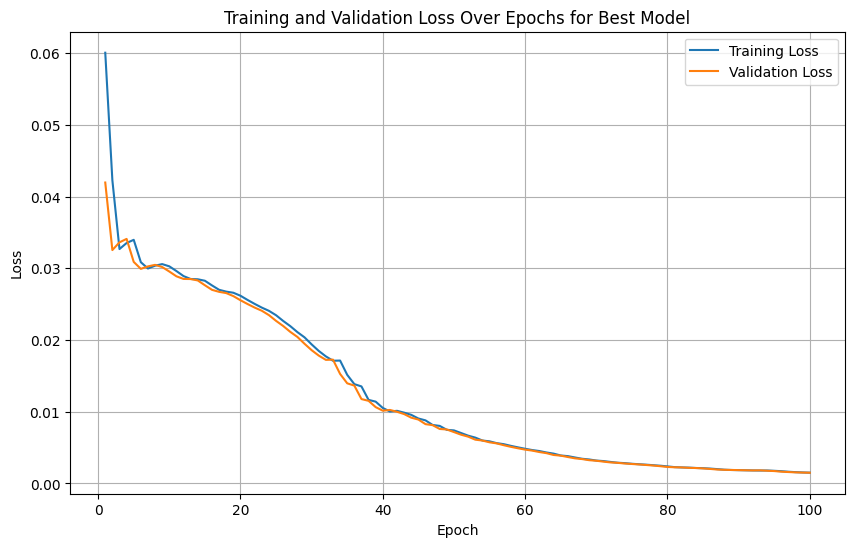

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), all_train_losses[0], label='Training Loss')
plt.plot(range(1, epochs + 1), all_val_losses[0], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for Best Model')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
training_history = torch.load("/content/drive/MyDrive/Machine_Learning/HW1/ROBOT_5_ARMS_models/model_state_dict_r5_PREPROCESSING.pt", weights_only=False)
best_hidden_sizes = training_history["hyperparameters"]["hidden_sizes"]
model = NeuralNetwork(hidden_sizes=best_hidden_sizes)
model.load_state_dict(training_history["model_state_dict"])

model.eval()
with torch.no_grad():
    y_test_pred_tensor = model(X_test_tensor)
    y_test_pred = y_test_pred_tensor.numpy()

# Calculate test metrics
test_mse = root_mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Root Mean Squared Error:", test_mse)
print("Test R^2 Score:", test_r2)

Test Root Mean Squared Error: 0.024844146949242973
Test R^2 Score: 0.9794366359710693


## Check inverse kineamtics

In [ ]:
def inverse_kinematics_newton_raphson(model, initial_joints, target_position, max_iters=50000, tolerance=1e-4):
    joints = initial_joints.clone().detach().requires_grad_(True)

    for i in range(max_iters):
        current_position = FK(model, joints)
        error = target_position - current_position
        if torch.norm(error) < tolerance:
            return joints.detach()
        #else:
          #print("MAX ITERS REACHED NEWTON")

        jacobian = FK_Jacobian(model, joints)
        try:
            delta_joints = torch.linalg.solve(jacobian, error)
        except RuntimeError as e:
            print("Errore nell'inversione del Jacobiano:", e)
            return joints.detach()

        joints = joints + delta_joints

    return joints.detach()

In [ ]:
def inverse_kinematics_levenberg_marquardt(model, initial_joints, target_position, max_iters=50000, tolerance=1e-4, lambda_=0.05):
    joints = initial_joints.clone().detach().requires_grad_(True)

    for i in range(max_iters):
        current_position = FK(model, joints)
        error = target_position - current_position
        if torch.norm(error) < tolerance:
            return joints.detach()
        #else:
          #print("MAX ITERS REACHED LM")

        jacobian = FK_Jacobian(model, joints)

        # Update of Levenberg-Marquardt: (J^T J + λI) * delta_joints = J^T * error
        A = jacobian.T @ jacobian + lambda_ * torch.eye(jacobian.size(1))
        b = jacobian.T @ error

        try:
            delta_joints = torch.linalg.solve(A, b)
        except RuntimeError as e:
            print("Errore nell'inversione della matrice in Levenberg-Marquardt:", e)
            return joints.detach()

        joints = joints + delta_joints

    return joints.detach()

In [39]:
def compare_methods(model, initial_joints, target_position):

    # Newton-Raphson Method
    print("Newton-Raphson Method:")
    target_joints_nr = inverse_kinematics_newton_raphson(model, initial_joints, target_position)
    nr_error = torch.norm(FK(model, target_joints_nr) - target_position)
    print("Target joints Newton-Raphson:", target_joints_nr)
    print("Newton-Raphson Error:", nr_error.item())

    # Levenberg-Marquardt Method
    print("\nLevenberg-Marquardt Method:")
    target_joints_lm = inverse_kinematics_levenberg_marquardt(model, initial_joints, target_position)
    lm_error = torch.norm(FK(model, target_joints_lm) - target_position)
    print("Target joints Levenberg-Marquardt:", target_joints_lm)
    print("Levenberg-Marquardt Error:", lm_error.item())

    print(" ")
    print("--------------------------------------")
    print("Comparison target:", target_position, "Value computed by Newton-Raphson Method: ", FK(model, target_joints_nr).detach()) #.detach() is used for remove grad_fn=<ViewBackward0> from print
    print("Comparison target:", target_position, "Value computed by Levenberg Marquardt: ", FK(model, target_joints_lm).detach())


In [ ]:
training_history = torch.load("/content/drive/MyDrive/Machine_Learning/HW1/ROBOT_5_ARMS_models/model_state_dict_r5_PREPROCESSING.pt", weights_only=False)
best_hidden_sizes = training_history["hyperparameters"]["hidden_sizes"]
model = NeuralNetwork(hidden_sizes=best_hidden_sizes)
model.load_state_dict(training_history["model_state_dict"])
model.eval()

NeuralNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=5, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=80, bias=True)
    (3): Linear(in_features=80, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [ ]:
initial_joints = torch.tensor([0.0, 0.0, np.pi/4, 0.0, 0.0], requires_grad=True)
#target_position = torch.tensor([-0.1, -0.1])
target_position = torch.tensor(y_test.sample(n=1).to_numpy().flatten(), dtype=torch.float32)
print(target_position)

compare_methods(model, initial_joints, target_position)


tensor([-0.1040, -0.2200, -0.0640])
Newton-Raphson Method:
Errore nell'inversione del Jacobiano: linalg.solve: A must be batches of square matrices, but they are 3 by 5 matrices
Target joints Newton-Raphson: tensor([0.0000, 0.0000, 0.7854, 0.0000, 0.0000])
Newton-Raphson Error: 0.6577382683753967

Levenberg-Marquardt Method:
Target joints Levenberg-Marquardt: tensor([-1.6387,  1.1576,  1.2332,  0.4356,  0.6071])
Levenberg-Marquardt Error: 9.595877781976014e-05
 
--------------------------------------
Comparison target: tensor([-0.1040, -0.2200, -0.0640]) Value computed by Newton-Raphson Method:  tensor([0.2469, 0.0029, 0.4457])
Comparison target: tensor([-0.1040, -0.2200, -0.0640]) Value computed by Levenberg Marquardt:  tensor([-0.1040, -0.2200, -0.0639])


# 1K
What we have done so fa is train the 5 model, the first time with 100K samples and second time with 10K sample, now we have the challenge to learn Forward Kinematics and Jacobian with only 1K samples that correspond 0.1% of the all orginal dataset

## Dataset


In [13]:
# Create a Reduced Dataset

df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/HW1/dataset/LOG_FILE_FULL_R5.csv", sep=';')
df_filtered = df[['j0', 'j1', 'j2', 'j3', 'j4', 'ft_x', 'ft_y', 'ft_z']]

# Calculate the number of rows to keep (10% of the original dataset)
n_keep = int(len(df_filtered) * 0.01)

# Randomly sample 10% of the rows
df_reduced_filtered = df_filtered.sample(n=n_keep, random_state=42)

# Reset the index
df_reduced_filtered.reset_index(drop=True, inplace=True)

print(f"Dataset Shape before: {df_filtered.shape}")
print(f"Dataset Shape after: {df_reduced_filtered.shape}")

# Define features (X) and target (Y)
X = df_reduced_filtered[['j0', 'j1', 'j2', 'j3', 'j4']]
y = df_reduced_filtered[['ft_x', 'ft_y', 'ft_z']]

# Split into training+validation and test sets (80% training+validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training+validation set into training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Summary of the splits
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Dataset Shape before: (100000, 8)
Dataset Shape after: (1000, 8)
Training set size: 600
Validation set size: 200
Test set size: 200


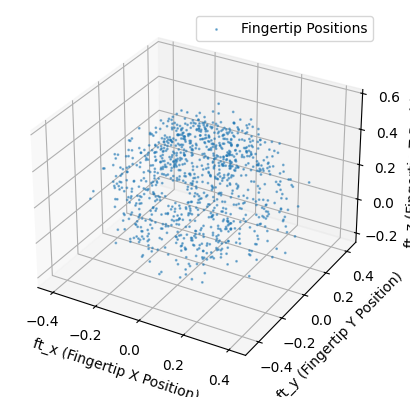

In [ ]:
df_filtered = df[['ft_x', 'ft_y', 'ft_z']]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_reduced_filtered['ft_x'], df_reduced_filtered['ft_y'], df_reduced_filtered['ft_z'],
           s=1, alpha=0.5, label='Fingertip Positions')

ax.set_xlabel('ft_x (Fingertip X Position)')
ax.set_ylabel('ft_y (Fingertip Y Position)')
ax.set_zlabel('ft_z (Fingertip Z Position)')

ax.legend()
ax.grid(True)
plt.show()

## Model train and test

In [ ]:
#-------------------------Linear Regression-------------------------

# train
lr = MultiOutputRegressor(LinearRegression())
lr.fit(X_train, y_train)

# test
warnings.filterwarnings("ignore")
lr_rmse, lr_r2 = evaluate_model(lr, X_test, y_test)
print(f"Linear Regression RMSE: {lr_rmse}, R2: {lr_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

# ----------------------Decision tree regressor-------------------------

# train
dt_param_grid = {
    'splitter': ['best', 'random'],
    'max_depth': [20, 25, 30]
}
dt = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt, dt_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
dt_grid.fit(X_train, y_train)

# test
best_dt = dt_grid.best_estimator_
dt_rmse, dt_r2 = evaluate_model(best_dt, X_test, y_test)
print(f"Decision Tree RMSE: {dt_rmse}, R2: {dt_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

# -----------------------------SVR-----------------------------

# train
svr_param_grid = {
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 1],
    'estimator__max_iter': [150]
}
svr = MultiOutputRegressor(SVR())
svr_grid = GridSearchCV(svr, svr_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
svr_grid.fit(X_train, y_train)


# test
best_svr = svr_grid.best_estimator_
svr_rmse, svr_r2 = evaluate_model(best_svr, X_test, y_test)
print(f"SVR Best Params: {svr_grid.best_params_}")
print(f"SVR RMSE: {svr_rmse}, R2: {svr_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

#---------------------------Random Forest--------------------------

# train
rf_param_grid = {
    'estimator__n_estimators': [100, 150],
    'estimator__max_depth': [12, 15]
}
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf_grid = GridSearchCV(rf, rf_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
rf_grid.fit(X_train, y_train)


#test
best_rf = rf_grid.best_estimator_
rf_rmse, rf_r2 = evaluate_model(best_rf, X_test, y_test)
print(f"Random Forest Best Params: {rf_grid.best_params_}")
print(f"Random Forest RMSE: {rf_rmse}, R2: {rf_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

#------------------------------------KNN---------------------------------------

# train
knn_param_grid = {
    'estimator__n_neighbors': [3, 5, 10],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}
knn = MultiOutputRegressor(KNeighborsRegressor())
knn_grid = GridSearchCV(knn, knn_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
knn_grid.fit(X_train, y_train)

#test
best_knn = knn_grid.best_estimator_
knn_rmse, knn_r2 = evaluate_model(best_knn, X_test, y_test)
print(f"KNN Best Params: {knn_grid.best_params_}")
print(f"KNN RMSE: {knn_rmse}, R2: {knn_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

Linear Regression RMSE: 0.1672069415508529, R2: 0.0893191119486959
 
--------------------------------------------------------------
 
Decision Tree RMSE: 0.11989328153155278, R2: 0.5192117871224299
 
--------------------------------------------------------------
 
SVR Best Params: {'estimator__C': 1, 'estimator__epsilon': 0.01, 'estimator__kernel': 'rbf', 'estimator__max_iter': 150}
SVR RMSE: 0.037890525331317156, R2: 0.9497811712539693
 
--------------------------------------------------------------
 
Random Forest Best Params: {'estimator__max_depth': 15, 'estimator__n_estimators': 150}
Random Forest RMSE: 0.0754783771179496, R2: 0.8043115865061837
 
--------------------------------------------------------------
 
KNN Best Params: {'estimator__n_neighbors': 5, 'estimator__p': 2, 'estimator__weights': 'distance'}
KNN RMSE: 0.06545124561063022, R2: 0.860648745439413
 
--------------------------------------------------------------
 


In [14]:
# Conversion of data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [15]:
class NeuralNetwork(nn.Module):
    def __init__(self, hidden_sizes):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()

        # Input layer
        input_size = 5  # two input features: j0 and j1
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))

        # Output layer
        output_size = 3  # output: ft_x and ft_y
        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))

    def forward(self, x):
        for layer in self.layers[:-1]:  # Apply ReLU to all hidden layers
            x = torch.relu(layer(x))
        x = self.layers[-1](x)  # No activation for the output layer
        return x

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.001],
    'hidden_sizes': [[16, 32, 64, 32, 16], [32, 64, 80, 64, 32], [16, 32, 64, 128, 64, 32, 16]],
    'optimizer': ['Adam', 'SGD']
}
grid = ParameterGrid(param_grid)

epochs = 100
best_val_loss = float('inf')
save_path = "/content/drive/MyDrive/Machine_Learning/HW1/ROBOT_5_ARMS_models"

all_train_losses = []
all_val_losses = []
best_model_info = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "model_state_dict": None,
    "optimizer_state_dict": None,
    "hyperparameters": {}
}

In [ ]:
for params in grid:
    # Initialize model and criterion
    model = NeuralNetwork(hidden_sizes=params['hidden_sizes'])
    criterion = nn.MSELoss()

    # Choose optimizer based on parameter grid
    if params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])
    elif params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['learning_rate'])
    elif params['optimizer'] == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=params['learning_rate'])

    # Track losses for each epoch
    train_losses = []
    val_losses = []

    # Training loop
    for epoch in tqdm(range(epochs), desc=f"Training Model with LR={params['learning_rate']}, Layers={params['hidden_sizes']}, Optimizer={params['optimizer']}"):
        # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        train_loss = criterion(outputs, y_train_tensor)
        train_loss.backward()
        optimizer.step()

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)

        # Store losses
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

        # Check if this model is the best so far based on validation loss
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model_info = {
                "epoch": epoch + 1,
                "train_loss": train_loss.item(),
                "val_loss": val_loss.item(),
                "model_state_dict": model.state_dict(),  # Store the best model weights
                "optimizer_state_dict": optimizer.state_dict(),  # Save the best optimizer state
                "hyperparameters": params  # Save the best hyperparameters for model reconstruction
            }

        # Update tqdm description with current losses
        tqdm.write(f"Epoch [{epoch+1}/{epochs}], Training Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    # Save all losses for plotting
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

# Print the best hyperparameters
print("Best Model Parameters:")
print("Learning Rate:", best_model_info['hyperparameters']['learning_rate'])
print("Hidden Layer Sizes:", best_model_info['hyperparameters']['hidden_sizes'])
print("Optimizer:", best_model_info['hyperparameters']['optimizer'])
print("Best Validation Loss:", best_val_loss)

# Save the best model information to a file
torch.save(best_model_info, os.path.join(save_path, "1K_model_state_dict_r5_NO_PREPROCESSING"))

Epoch [1/100], Training Loss: 0.0644, Validation Loss: 0.0474
Epoch [2/100], Training Loss: 0.0488, Validation Loss: 0.0370
Epoch [3/100], Training Loss: 0.0379, Validation Loss: 0.0343
Epoch [4/100], Training Loss: 0.0346, Validation Loss: 0.0352
Epoch [5/100], Training Loss: 0.0351, Validation Loss: 0.0326
Epoch [6/100], Training Loss: 0.0324, Validation Loss: 0.0310
Epoch [7/100], Training Loss: 0.0310, Validation Loss: 0.0311
Epoch [8/100], Training Loss: 0.0312, Validation Loss: 0.0310
Epoch [9/100], Training Loss: 0.0312, Validation Loss: 0.0307
Epoch [10/100], Training Loss: 0.0309, Validation Loss: 0.0302
Epoch [11/100], Training Loss: 0.0303, Validation Loss: 0.0298


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  22%|██▏       | 22/100 [00:00<00:01, 52.59it/s]

Epoch [12/100], Training Loss: 0.0298, Validation Loss: 0.0297
Epoch [13/100], Training Loss: 0.0294, Validation Loss: 0.0296
Epoch [14/100], Training Loss: 0.0291, Validation Loss: 0.0292
Epoch [15/100], Training Loss: 0.0286, Validation Loss: 0.0284
Epoch [16/100], Training Loss: 0.0279, Validation Loss: 0.0275
Epoch [17/100], Training Loss: 0.0271, Validation Loss: 0.0266
Epoch [18/100], Training Loss: 0.0263, Validation Loss: 0.0256
Epoch [19/100], Training Loss: 0.0254, Validation Loss: 0.0245
Epoch [20/100], Training Loss: 0.0242, Validation Loss: 0.0232
Epoch [21/100], Training Loss: 0.0228, Validation Loss: 0.0220
Epoch [22/100], Training Loss: 0.0216, Validation Loss: 0.0210
Epoch [23/100], Training Loss: 0.0205, Validation Loss: 0.0197


Epoch [24/100], Training Loss: 0.0193, Validation Loss: 0.0184
Epoch [25/100], Training Loss: 0.0181, Validation Loss: 0.0173
Epoch [26/100], Training Loss: 0.0169, Validation Loss: 0.0160
Epoch [27/100], Training Loss: 0.0155, Validation Loss: 0.0148
Epoch [28/100], Training Loss: 0.0141, Validation Loss: 0.0139
Epoch [29/100], Training Loss: 0.0130, Validation Loss: 0.0133
Epoch [30/100], Training Loss: 0.0123, Validation Loss: 0.0129
Epoch [31/100], Training Loss: 0.0116, Validation Loss: 0.0122
Epoch [32/100], Training Loss: 0.0108, Validation Loss: 0.0113
Epoch [33/100], Training Loss: 0.0099, Validation Loss: 0.0104
Epoch [34/100], Training Loss: 0.0089, Validation Loss: 0.0096


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  40%|████      | 40/100 [00:00<00:01, 48.83it/s]

Epoch [35/100], Training Loss: 0.0081, Validation Loss: 0.0090
Epoch [36/100], Training Loss: 0.0075, Validation Loss: 0.0088
Epoch [37/100], Training Loss: 0.0071, Validation Loss: 0.0090
Epoch [38/100], Training Loss: 0.0075, Validation Loss: 0.0101
Epoch [39/100], Training Loss: 0.0082, Validation Loss: 0.0081
Epoch [40/100], Training Loss: 0.0066, Validation Loss: 0.0073
Epoch [41/100], Training Loss: 0.0059, Validation Loss: 0.0075
Epoch [42/100], Training Loss: 0.0061, Validation Loss: 0.0064
Epoch [43/100], Training Loss: 0.0051, Validation Loss: 0.0067


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  51%|█████     | 51/100 [00:01<00:00, 50.64it/s]

Epoch [44/100], Training Loss: 0.0056, Validation Loss: 0.0058
Epoch [45/100], Training Loss: 0.0047, Validation Loss: 0.0062
Epoch [46/100], Training Loss: 0.0052, Validation Loss: 0.0055
Epoch [47/100], Training Loss: 0.0044, Validation Loss: 0.0058
Epoch [48/100], Training Loss: 0.0047, Validation Loss: 0.0052
Epoch [49/100], Training Loss: 0.0042, Validation Loss: 0.0052
Epoch [50/100], Training Loss: 0.0043, Validation Loss: 0.0048
Epoch [51/100], Training Loss: 0.0040, Validation Loss: 0.0049
Epoch [52/100], Training Loss: 0.0040, Validation Loss: 0.0046
Epoch [53/100], Training Loss: 0.0037, Validation Loss: 0.0046
Epoch [54/100], Training Loss: 0.0037, Validation Loss: 0.0043
Epoch [55/100], Training Loss: 0.0034, Validation Loss: 0.0044


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  63%|██████▎   | 63/100 [00:01<00:00, 49.14it/s]

Epoch [56/100], Training Loss: 0.0034, Validation Loss: 0.0042
Epoch [57/100], Training Loss: 0.0031, Validation Loss: 0.0041
Epoch [58/100], Training Loss: 0.0031, Validation Loss: 0.0039
Epoch [59/100], Training Loss: 0.0029, Validation Loss: 0.0039
Epoch [60/100], Training Loss: 0.0029, Validation Loss: 0.0036
Epoch [61/100], Training Loss: 0.0027, Validation Loss: 0.0035
Epoch [62/100], Training Loss: 0.0027, Validation Loss: 0.0034
Epoch [63/100], Training Loss: 0.0025, Validation Loss: 0.0034
Epoch [64/100], Training Loss: 0.0025, Validation Loss: 0.0032
Epoch [65/100], Training Loss: 0.0023, Validation Loss: 0.0032


Epoch [66/100], Training Loss: 0.0023, Validation Loss: 0.0031
Epoch [67/100], Training Loss: 0.0022, Validation Loss: 0.0031
Epoch [68/100], Training Loss: 0.0022, Validation Loss: 0.0029
Epoch [69/100], Training Loss: 0.0021, Validation Loss: 0.0029
Epoch [70/100], Training Loss: 0.0020, Validation Loss: 0.0028
Epoch [71/100], Training Loss: 0.0019, Validation Loss: 0.0027
Epoch [72/100], Training Loss: 0.0019, Validation Loss: 0.0027
Epoch [73/100], Training Loss: 0.0018, Validation Loss: 0.0027


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  78%|███████▊  | 78/100 [00:01<00:00, 39.78it/s]

Epoch [74/100], Training Loss: 0.0018, Validation Loss: 0.0027
Epoch [75/100], Training Loss: 0.0017, Validation Loss: 0.0026
Epoch [76/100], Training Loss: 0.0017, Validation Loss: 0.0026
Epoch [77/100], Training Loss: 0.0016, Validation Loss: 0.0026
Epoch [78/100], Training Loss: 0.0016, Validation Loss: 0.0025
Epoch [79/100], Training Loss: 0.0015, Validation Loss: 0.0024
Epoch [80/100], Training Loss: 0.0015, Validation Loss: 0.0024


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  88%|████████▊ | 88/100 [00:01<00:00, 37.94it/s]

Epoch [81/100], Training Loss: 0.0014, Validation Loss: 0.0024
Epoch [82/100], Training Loss: 0.0014, Validation Loss: 0.0024
Epoch [83/100], Training Loss: 0.0014, Validation Loss: 0.0024
Epoch [84/100], Training Loss: 0.0014, Validation Loss: 0.0025
Epoch [85/100], Training Loss: 0.0015, Validation Loss: 0.0025
Epoch [86/100], Training Loss: 0.0016, Validation Loss: 0.0027
Epoch [87/100], Training Loss: 0.0017, Validation Loss: 0.0025
Epoch [88/100], Training Loss: 0.0016, Validation Loss: 0.0022
Epoch [89/100], Training Loss: 0.0013, Validation Loss: 0.0021


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  98%|█████████▊| 98/100 [00:02<00:00, 40.24it/s]

Epoch [90/100], Training Loss: 0.0012, Validation Loss: 0.0023
Epoch [91/100], Training Loss: 0.0014, Validation Loss: 0.0023
Epoch [92/100], Training Loss: 0.0013, Validation Loss: 0.0020
Epoch [93/100], Training Loss: 0.0011, Validation Loss: 0.0020
Epoch [94/100], Training Loss: 0.0011, Validation Loss: 0.0022
Epoch [95/100], Training Loss: 0.0013, Validation Loss: 0.0020
Epoch [96/100], Training Loss: 0.0011, Validation Loss: 0.0019
Epoch [97/100], Training Loss: 0.0010, Validation Loss: 0.0021
Epoch [98/100], Training Loss: 0.0011, Validation Loss: 0.0020


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:02<00:00, 44.61it/s]


Epoch [99/100], Training Loss: 0.0011, Validation Loss: 0.0019
Epoch [100/100], Training Loss: 0.0010, Validation Loss: 0.0019


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:00<00:01, 56.20it/s]

Epoch [1/100], Training Loss: 0.0822, Validation Loss: 0.0793
Epoch [2/100], Training Loss: 0.0812, Validation Loss: 0.0784
Epoch [3/100], Training Loss: 0.0802, Validation Loss: 0.0774
Epoch [4/100], Training Loss: 0.0793, Validation Loss: 0.0765
Epoch [5/100], Training Loss: 0.0784, Validation Loss: 0.0756
Epoch [6/100], Training Loss: 0.0775, Validation Loss: 0.0748
Epoch [7/100], Training Loss: 0.0766, Validation Loss: 0.0739
Epoch [8/100], Training Loss: 0.0757, Validation Loss: 0.0731


Epoch [9/100], Training Loss: 0.0749, Validation Loss: 0.0723
Epoch [10/100], Training Loss: 0.0741, Validation Loss: 0.0715


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  12%|█▏        | 12/100 [00:00<00:01, 46.89it/s]

Epoch [11/100], Training Loss: 0.0733, Validation Loss: 0.0707
Epoch [12/100], Training Loss: 0.0725, Validation Loss: 0.0700
Epoch [13/100], Training Loss: 0.0717, Validation Loss: 0.0693
Epoch [14/100], Training Loss: 0.0710, Validation Loss: 0.0686
Epoch [15/100], Training Loss: 0.0703, Validation Loss: 0.0679
Epoch [16/100], Training Loss: 0.0695, Validation Loss: 0.0672


Epoch [17/100], Training Loss: 0.0688, Validation Loss: 0.0665


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  22%|██▏       | 22/100 [00:00<00:02, 38.92it/s]

Epoch [18/100], Training Loss: 0.0682, Validation Loss: 0.0659
Epoch [19/100], Training Loss: 0.0675, Validation Loss: 0.0652
Epoch [20/100], Training Loss: 0.0668, Validation Loss: 0.0646
Epoch [21/100], Training Loss: 0.0662, Validation Loss: 0.0640
Epoch [22/100], Training Loss: 0.0656, Validation Loss: 0.0634
Epoch [23/100], Training Loss: 0.0650, Validation Loss: 0.0628
Epoch [24/100], Training Loss: 0.0644, Validation Loss: 0.0623


Epoch [25/100], Training Loss: 0.0638, Validation Loss: 0.0617


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  31%|███       | 31/100 [00:00<00:01, 40.28it/s]

Epoch [26/100], Training Loss: 0.0632, Validation Loss: 0.0612
Epoch [27/100], Training Loss: 0.0626, Validation Loss: 0.0606
Epoch [28/100], Training Loss: 0.0621, Validation Loss: 0.0601
Epoch [29/100], Training Loss: 0.0615, Validation Loss: 0.0596
Epoch [30/100], Training Loss: 0.0610, Validation Loss: 0.0591
Epoch [31/100], Training Loss: 0.0605, Validation Loss: 0.0586
Epoch [32/100], Training Loss: 0.0600, Validation Loss: 0.0581
Epoch [33/100], Training Loss: 0.0595, Validation Loss: 0.0577


Epoch [34/100], Training Loss: 0.0590, Validation Loss: 0.0572


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  41%|████      | 41/100 [00:00<00:01, 40.06it/s]

Epoch [35/100], Training Loss: 0.0585, Validation Loss: 0.0567
Epoch [36/100], Training Loss: 0.0581, Validation Loss: 0.0563
Epoch [37/100], Training Loss: 0.0576, Validation Loss: 0.0559
Epoch [38/100], Training Loss: 0.0572, Validation Loss: 0.0554
Epoch [39/100], Training Loss: 0.0567, Validation Loss: 0.0550
Epoch [40/100], Training Loss: 0.0563, Validation Loss: 0.0546
Epoch [41/100], Training Loss: 0.0559, Validation Loss: 0.0542


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  41%|████      | 41/100 [00:01<00:01, 40.06it/s]

Epoch [42/100], Training Loss: 0.0555, Validation Loss: 0.0538
Epoch [43/100], Training Loss: 0.0551, Validation Loss: 0.0535


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  46%|████▌     | 46/100 [00:01<00:01, 37.89it/s]

Epoch [44/100], Training Loss: 0.0547, Validation Loss: 0.0531
Epoch [45/100], Training Loss: 0.0543, Validation Loss: 0.0527
Epoch [46/100], Training Loss: 0.0539, Validation Loss: 0.0524
Epoch [47/100], Training Loss: 0.0535, Validation Loss: 0.0520
Epoch [48/100], Training Loss: 0.0532, Validation Loss: 0.0517
Epoch [49/100], Training Loss: 0.0528, Validation Loss: 0.0513


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  50%|█████     | 50/100 [00:01<00:01, 37.57it/s]

Epoch [50/100], Training Loss: 0.0525, Validation Loss: 0.0510
Epoch [51/100], Training Loss: 0.0521, Validation Loss: 0.0507


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  54%|█████▍    | 54/100 [00:01<00:01, 37.60it/s]

Epoch [52/100], Training Loss: 0.0518, Validation Loss: 0.0504
Epoch [53/100], Training Loss: 0.0515, Validation Loss: 0.0501
Epoch [54/100], Training Loss: 0.0511, Validation Loss: 0.0498
Epoch [55/100], Training Loss: 0.0508, Validation Loss: 0.0495
Epoch [56/100], Training Loss: 0.0505, Validation Loss: 0.0492
Epoch [57/100], Training Loss: 0.0502, Validation Loss: 0.0489


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  58%|█████▊    | 58/100 [00:01<00:01, 36.44it/s]

Epoch [58/100], Training Loss: 0.0499, Validation Loss: 0.0486
Epoch [59/100], Training Loss: 0.0496, Validation Loss: 0.0483


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  62%|██████▏   | 62/100 [00:01<00:01, 36.66it/s]

Epoch [60/100], Training Loss: 0.0493, Validation Loss: 0.0480
Epoch [61/100], Training Loss: 0.0490, Validation Loss: 0.0478
Epoch [62/100], Training Loss: 0.0487, Validation Loss: 0.0475
Epoch [63/100], Training Loss: 0.0485, Validation Loss: 0.0472
Epoch [64/100], Training Loss: 0.0482, Validation Loss: 0.0470
Epoch [65/100], Training Loss: 0.0479, Validation Loss: 0.0467


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  66%|██████▌   | 66/100 [00:01<00:00, 36.54it/s]

Epoch [66/100], Training Loss: 0.0477, Validation Loss: 0.0465
Epoch [67/100], Training Loss: 0.0474, Validation Loss: 0.0462


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  70%|███████   | 70/100 [00:01<00:00, 37.31it/s]

Epoch [68/100], Training Loss: 0.0472, Validation Loss: 0.0460
Epoch [69/100], Training Loss: 0.0469, Validation Loss: 0.0458
Epoch [70/100], Training Loss: 0.0467, Validation Loss: 0.0455
Epoch [71/100], Training Loss: 0.0464, Validation Loss: 0.0453
Epoch [72/100], Training Loss: 0.0462, Validation Loss: 0.0451
Epoch [73/100], Training Loss: 0.0460, Validation Loss: 0.0449


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  70%|███████   | 70/100 [00:01<00:00, 37.31it/s]

Epoch [74/100], Training Loss: 0.0457, Validation Loss: 0.0447


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  79%|███████▉  | 79/100 [00:02<00:00, 35.46it/s]

Epoch [75/100], Training Loss: 0.0455, Validation Loss: 0.0444
Epoch [76/100], Training Loss: 0.0453, Validation Loss: 0.0442
Epoch [77/100], Training Loss: 0.0451, Validation Loss: 0.0440
Epoch [78/100], Training Loss: 0.0449, Validation Loss: 0.0438
Epoch [79/100], Training Loss: 0.0446, Validation Loss: 0.0436
Epoch [80/100], Training Loss: 0.0444, Validation Loss: 0.0434
Epoch [81/100], Training Loss: 0.0442, Validation Loss: 0.0432
Epoch [82/100], Training Loss: 0.0440, Validation Loss: 0.0431


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  84%|████████▍ | 84/100 [00:02<00:00, 38.75it/s]

Epoch [83/100], Training Loss: 0.0438, Validation Loss: 0.0429
Epoch [84/100], Training Loss: 0.0436, Validation Loss: 0.0427


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  89%|████████▉ | 89/100 [00:02<00:00, 40.00it/s]

Epoch [85/100], Training Loss: 0.0435, Validation Loss: 0.0425
Epoch [86/100], Training Loss: 0.0433, Validation Loss: 0.0423
Epoch [87/100], Training Loss: 0.0431, Validation Loss: 0.0422
Epoch [88/100], Training Loss: 0.0429, Validation Loss: 0.0420
Epoch [89/100], Training Loss: 0.0427, Validation Loss: 0.0418
Epoch [90/100], Training Loss: 0.0425, Validation Loss: 0.0417
Epoch [91/100], Training Loss: 0.0424, Validation Loss: 0.0415
Epoch [92/100], Training Loss: 0.0422, Validation Loss: 0.0413


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  89%|████████▉ | 89/100 [00:02<00:00, 40.00it/s]

Epoch [93/100], Training Loss: 0.0420, Validation Loss: 0.0412
Epoch [94/100], Training Loss: 0.0419, Validation Loss: 0.0410


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:02<00:00, 39.16it/s]


Epoch [95/100], Training Loss: 0.0417, Validation Loss: 0.0409
Epoch [96/100], Training Loss: 0.0415, Validation Loss: 0.0407
Epoch [97/100], Training Loss: 0.0414, Validation Loss: 0.0406
Epoch [98/100], Training Loss: 0.0412, Validation Loss: 0.0404
Epoch [99/100], Training Loss: 0.0411, Validation Loss: 0.0403
Epoch [100/100], Training Loss: 0.0409, Validation Loss: 0.0401


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   9%|▉         | 9/100 [00:00<00:02, 38.29it/s]

Epoch [1/100], Training Loss: 0.0427, Validation Loss: 0.0403
Epoch [2/100], Training Loss: 0.0416, Validation Loss: 0.0393
Epoch [3/100], Training Loss: 0.0405, Validation Loss: 0.0384
Epoch [4/100], Training Loss: 0.0396, Validation Loss: 0.0375
Epoch [5/100], Training Loss: 0.0386, Validation Loss: 0.0367
Epoch [6/100], Training Loss: 0.0377, Validation Loss: 0.0360
Epoch [7/100], Training Loss: 0.0369, Validation Loss: 0.0352
Epoch [8/100], Training Loss: 0.0361, Validation Loss: 0.0346
Epoch [9/100], Training Loss: 0.0353, Validation Loss: 0.0339


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  17%|█▋        | 17/100 [00:00<00:02, 37.47it/s]

Epoch [10/100], Training Loss: 0.0346, Validation Loss: 0.0333
Epoch [11/100], Training Loss: 0.0339, Validation Loss: 0.0327
Epoch [12/100], Training Loss: 0.0333, Validation Loss: 0.0322
Epoch [13/100], Training Loss: 0.0327, Validation Loss: 0.0317
Epoch [14/100], Training Loss: 0.0321, Validation Loss: 0.0314
Epoch [15/100], Training Loss: 0.0317, Validation Loss: 0.0310
Epoch [16/100], Training Loss: 0.0313, Validation Loss: 0.0308
Epoch [17/100], Training Loss: 0.0309, Validation Loss: 0.0306


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  21%|██        | 21/100 [00:00<00:02, 37.48it/s]

Epoch [18/100], Training Loss: 0.0307, Validation Loss: 0.0305
Epoch [19/100], Training Loss: 0.0305, Validation Loss: 0.0305
Epoch [20/100], Training Loss: 0.0304, Validation Loss: 0.0305
Epoch [21/100], Training Loss: 0.0303, Validation Loss: 0.0304
Epoch [22/100], Training Loss: 0.0302, Validation Loss: 0.0304
Epoch [23/100], Training Loss: 0.0301, Validation Loss: 0.0303
Epoch [24/100], Training Loss: 0.0300, Validation Loss: 0.0302


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  29%|██▉       | 29/100 [00:00<00:02, 35.22it/s]

Epoch [25/100], Training Loss: 0.0299, Validation Loss: 0.0300
Epoch [26/100], Training Loss: 0.0297, Validation Loss: 0.0298
Epoch [27/100], Training Loss: 0.0296, Validation Loss: 0.0296
Epoch [28/100], Training Loss: 0.0293, Validation Loss: 0.0294
Epoch [29/100], Training Loss: 0.0291, Validation Loss: 0.0291
Epoch [30/100], Training Loss: 0.0289, Validation Loss: 0.0288
Epoch [31/100], Training Loss: 0.0286, Validation Loss: 0.0286
Epoch [32/100], Training Loss: 0.0284, Validation Loss: 0.0283


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  39%|███▉      | 39/100 [00:01<00:01, 40.63it/s]

Epoch [33/100], Training Loss: 0.0281, Validation Loss: 0.0280
Epoch [34/100], Training Loss: 0.0279, Validation Loss: 0.0277
Epoch [35/100], Training Loss: 0.0276, Validation Loss: 0.0275
Epoch [36/100], Training Loss: 0.0274, Validation Loss: 0.0272
Epoch [37/100], Training Loss: 0.0271, Validation Loss: 0.0270
Epoch [38/100], Training Loss: 0.0269, Validation Loss: 0.0267
Epoch [39/100], Training Loss: 0.0266, Validation Loss: 0.0264
Epoch [40/100], Training Loss: 0.0264, Validation Loss: 0.0262
Epoch [41/100], Training Loss: 0.0261, Validation Loss: 0.0258
Epoch [42/100], Training Loss: 0.0257, Validation Loss: 0.0255


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  49%|████▉     | 49/100 [00:01<00:01, 42.08it/s]

Epoch [43/100], Training Loss: 0.0254, Validation Loss: 0.0251
Epoch [44/100], Training Loss: 0.0250, Validation Loss: 0.0247
Epoch [45/100], Training Loss: 0.0245, Validation Loss: 0.0243
Epoch [46/100], Training Loss: 0.0241, Validation Loss: 0.0239
Epoch [47/100], Training Loss: 0.0236, Validation Loss: 0.0234
Epoch [48/100], Training Loss: 0.0232, Validation Loss: 0.0230
Epoch [49/100], Training Loss: 0.0227, Validation Loss: 0.0225
Epoch [50/100], Training Loss: 0.0222, Validation Loss: 0.0221
Epoch [51/100], Training Loss: 0.0218, Validation Loss: 0.0216


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  59%|█████▉    | 59/100 [00:01<00:00, 42.28it/s]

Epoch [52/100], Training Loss: 0.0213, Validation Loss: 0.0212
Epoch [53/100], Training Loss: 0.0209, Validation Loss: 0.0208
Epoch [54/100], Training Loss: 0.0204, Validation Loss: 0.0204
Epoch [55/100], Training Loss: 0.0200, Validation Loss: 0.0199
Epoch [56/100], Training Loss: 0.0195, Validation Loss: 0.0195
Epoch [57/100], Training Loss: 0.0191, Validation Loss: 0.0191
Epoch [58/100], Training Loss: 0.0187, Validation Loss: 0.0187
Epoch [59/100], Training Loss: 0.0182, Validation Loss: 0.0183
Epoch [60/100], Training Loss: 0.0178, Validation Loss: 0.0179


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  69%|██████▉   | 69/100 [00:01<00:00, 43.71it/s]

Epoch [61/100], Training Loss: 0.0174, Validation Loss: 0.0174
Epoch [62/100], Training Loss: 0.0169, Validation Loss: 0.0170
Epoch [63/100], Training Loss: 0.0165, Validation Loss: 0.0166
Epoch [64/100], Training Loss: 0.0161, Validation Loss: 0.0161
Epoch [65/100], Training Loss: 0.0156, Validation Loss: 0.0156
Epoch [66/100], Training Loss: 0.0151, Validation Loss: 0.0151
Epoch [67/100], Training Loss: 0.0146, Validation Loss: 0.0146
Epoch [68/100], Training Loss: 0.0141, Validation Loss: 0.0141
Epoch [69/100], Training Loss: 0.0136, Validation Loss: 0.0136
Epoch [70/100], Training Loss: 0.0131, Validation Loss: 0.0131


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  74%|███████▍  | 74/100 [00:01<00:00, 44.52it/s]

Epoch [71/100], Training Loss: 0.0125, Validation Loss: 0.0126
Epoch [72/100], Training Loss: 0.0120, Validation Loss: 0.0121
Epoch [73/100], Training Loss: 0.0114, Validation Loss: 0.0116
Epoch [74/100], Training Loss: 0.0108, Validation Loss: 0.0111
Epoch [75/100], Training Loss: 0.0102, Validation Loss: 0.0106
Epoch [76/100], Training Loss: 0.0097, Validation Loss: 0.0101
Epoch [77/100], Training Loss: 0.0092, Validation Loss: 0.0098
Epoch [78/100], Training Loss: 0.0087, Validation Loss: 0.0095


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  84%|████████▍ | 84/100 [00:02<00:00, 40.59it/s]

Epoch [79/100], Training Loss: 0.0083, Validation Loss: 0.0093
Epoch [80/100], Training Loss: 0.0080, Validation Loss: 0.0092
Epoch [81/100], Training Loss: 0.0078, Validation Loss: 0.0091
Epoch [82/100], Training Loss: 0.0076, Validation Loss: 0.0090
Epoch [83/100], Training Loss: 0.0075, Validation Loss: 0.0089
Epoch [84/100], Training Loss: 0.0074, Validation Loss: 0.0088
Epoch [85/100], Training Loss: 0.0073, Validation Loss: 0.0087
Epoch [86/100], Training Loss: 0.0071, Validation Loss: 0.0085
Epoch [87/100], Training Loss: 0.0070, Validation Loss: 0.0083


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  94%|█████████▍| 94/100 [00:02<00:00, 40.56it/s]

Epoch [88/100], Training Loss: 0.0068, Validation Loss: 0.0081
Epoch [89/100], Training Loss: 0.0066, Validation Loss: 0.0078
Epoch [90/100], Training Loss: 0.0064, Validation Loss: 0.0076
Epoch [91/100], Training Loss: 0.0063, Validation Loss: 0.0074
Epoch [92/100], Training Loss: 0.0061, Validation Loss: 0.0072
Epoch [93/100], Training Loss: 0.0060, Validation Loss: 0.0070
Epoch [94/100], Training Loss: 0.0059, Validation Loss: 0.0069
Epoch [95/100], Training Loss: 0.0058, Validation Loss: 0.0068


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:02<00:00, 39.70it/s]


Epoch [96/100], Training Loss: 0.0057, Validation Loss: 0.0067
Epoch [97/100], Training Loss: 0.0056, Validation Loss: 0.0066
Epoch [98/100], Training Loss: 0.0055, Validation Loss: 0.0065
Epoch [99/100], Training Loss: 0.0054, Validation Loss: 0.0064
Epoch [100/100], Training Loss: 0.0053, Validation Loss: 0.0063


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Training Loss: 0.0652, Validation Loss: 0.0636
Epoch [2/100], Training Loss: 0.0651, Validation Loss: 0.0636
Epoch [3/100], Training Loss: 0.0651, Validation Loss: 0.0635


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:00<00:01, 54.34it/s]

Epoch [4/100], Training Loss: 0.0650, Validation Loss: 0.0634
Epoch [5/100], Training Loss: 0.0650, Validation Loss: 0.0634
Epoch [6/100], Training Loss: 0.0649, Validation Loss: 0.0633
Epoch [7/100], Training Loss: 0.0648, Validation Loss: 0.0633
Epoch [8/100], Training Loss: 0.0648, Validation Loss: 0.0632
Epoch [9/100], Training Loss: 0.0647, Validation Loss: 0.0632
Epoch [10/100], Training Loss: 0.0647, Validation Loss: 0.0631
Epoch [11/100], Training Loss: 0.0646, Validation Loss: 0.0631
Epoch [12/100], Training Loss: 0.0646, Validation Loss: 0.0630


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:00<00:01, 54.34it/s]

Epoch [13/100], Training Loss: 0.0645, Validation Loss: 0.0630
Epoch [14/100], Training Loss: 0.0645, Validation Loss: 0.0629
Epoch [15/100], Training Loss: 0.0644, Validation Loss: 0.0629


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  17%|█▋        | 17/100 [00:00<00:01, 49.18it/s]

Epoch [16/100], Training Loss: 0.0644, Validation Loss: 0.0628
Epoch [17/100], Training Loss: 0.0643, Validation Loss: 0.0628
Epoch [18/100], Training Loss: 0.0642, Validation Loss: 0.0627
Epoch [19/100], Training Loss: 0.0642, Validation Loss: 0.0627
Epoch [20/100], Training Loss: 0.0641, Validation Loss: 0.0626


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  22%|██▏       | 22/100 [00:00<00:01, 44.99it/s]

Epoch [21/100], Training Loss: 0.0641, Validation Loss: 0.0625
Epoch [22/100], Training Loss: 0.0640, Validation Loss: 0.0625
Epoch [23/100], Training Loss: 0.0640, Validation Loss: 0.0624


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  27%|██▋       | 27/100 [00:00<00:01, 45.48it/s]

Epoch [24/100], Training Loss: 0.0639, Validation Loss: 0.0624
Epoch [25/100], Training Loss: 0.0639, Validation Loss: 0.0623
Epoch [26/100], Training Loss: 0.0638, Validation Loss: 0.0623
Epoch [27/100], Training Loss: 0.0638, Validation Loss: 0.0622
Epoch [28/100], Training Loss: 0.0637, Validation Loss: 0.0622
Epoch [29/100], Training Loss: 0.0637, Validation Loss: 0.0621
Epoch [30/100], Training Loss: 0.0636, Validation Loss: 0.0621


Epoch [31/100], Training Loss: 0.0636, Validation Loss: 0.0620
Epoch [32/100], Training Loss: 0.0635, Validation Loss: 0.0620


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  37%|███▋      | 37/100 [00:00<00:01, 43.00it/s]

Epoch [33/100], Training Loss: 0.0634, Validation Loss: 0.0619
Epoch [34/100], Training Loss: 0.0634, Validation Loss: 0.0619
Epoch [35/100], Training Loss: 0.0633, Validation Loss: 0.0618
Epoch [36/100], Training Loss: 0.0633, Validation Loss: 0.0618
Epoch [37/100], Training Loss: 0.0632, Validation Loss: 0.0617
Epoch [38/100], Training Loss: 0.0632, Validation Loss: 0.0617
Epoch [39/100], Training Loss: 0.0631, Validation Loss: 0.0616


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  37%|███▋      | 37/100 [00:00<00:01, 43.00it/s]

Epoch [40/100], Training Loss: 0.0631, Validation Loss: 0.0616
Epoch [41/100], Training Loss: 0.0630, Validation Loss: 0.0615


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  47%|████▋     | 47/100 [00:01<00:01, 40.32it/s]

Epoch [42/100], Training Loss: 0.0630, Validation Loss: 0.0615
Epoch [43/100], Training Loss: 0.0629, Validation Loss: 0.0614
Epoch [44/100], Training Loss: 0.0629, Validation Loss: 0.0614
Epoch [45/100], Training Loss: 0.0628, Validation Loss: 0.0613
Epoch [46/100], Training Loss: 0.0628, Validation Loss: 0.0613
Epoch [47/100], Training Loss: 0.0627, Validation Loss: 0.0612


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  47%|████▋     | 47/100 [00:01<00:01, 40.32it/s]

Epoch [48/100], Training Loss: 0.0627, Validation Loss: 0.0612
Epoch [49/100], Training Loss: 0.0626, Validation Loss: 0.0611


Epoch [50/100], Training Loss: 0.0626, Validation Loss: 0.0611
Epoch [51/100], Training Loss: 0.0625, Validation Loss: 0.0610
Epoch [52/100], Training Loss: 0.0625, Validation Loss: 0.0610
Epoch [53/100], Training Loss: 0.0624, Validation Loss: 0.0609
Epoch [54/100], Training Loss: 0.0624, Validation Loss: 0.0609
Epoch [55/100], Training Loss: 0.0623, Validation Loss: 0.0608


Epoch [56/100], Training Loss: 0.0623, Validation Loss: 0.0608
Epoch [57/100], Training Loss: 0.0622, Validation Loss: 0.0607


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  61%|██████    | 61/100 [00:01<00:00, 39.26it/s]

Epoch [58/100], Training Loss: 0.0622, Validation Loss: 0.0607
Epoch [59/100], Training Loss: 0.0621, Validation Loss: 0.0606
Epoch [60/100], Training Loss: 0.0621, Validation Loss: 0.0606
Epoch [61/100], Training Loss: 0.0620, Validation Loss: 0.0605
Epoch [62/100], Training Loss: 0.0620, Validation Loss: 0.0605
Epoch [63/100], Training Loss: 0.0619, Validation Loss: 0.0604
Epoch [64/100], Training Loss: 0.0619, Validation Loss: 0.0604


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  66%|██████▌   | 66/100 [00:01<00:00, 41.30it/s]

Epoch [65/100], Training Loss: 0.0618, Validation Loss: 0.0603
Epoch [66/100], Training Loss: 0.0618, Validation Loss: 0.0603


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  71%|███████   | 71/100 [00:01<00:00, 40.41it/s]

Epoch [67/100], Training Loss: 0.0617, Validation Loss: 0.0602
Epoch [68/100], Training Loss: 0.0617, Validation Loss: 0.0602
Epoch [69/100], Training Loss: 0.0616, Validation Loss: 0.0601
Epoch [70/100], Training Loss: 0.0616, Validation Loss: 0.0601
Epoch [71/100], Training Loss: 0.0615, Validation Loss: 0.0600
Epoch [72/100], Training Loss: 0.0615, Validation Loss: 0.0600
Epoch [73/100], Training Loss: 0.0614, Validation Loss: 0.0599


Epoch [74/100], Training Loss: 0.0614, Validation Loss: 0.0599


Epoch [75/100], Training Loss: 0.0613, Validation Loss: 0.0598
Epoch [76/100], Training Loss: 0.0613, Validation Loss: 0.0598
Epoch [77/100], Training Loss: 0.0612, Validation Loss: 0.0597
Epoch [78/100], Training Loss: 0.0612, Validation Loss: 0.0597
Epoch [79/100], Training Loss: 0.0611, Validation Loss: 0.0597
Epoch [80/100], Training Loss: 0.0611, Validation Loss: 0.0596
Epoch [81/100], Training Loss: 0.0610, Validation Loss: 0.0596


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  81%|████████  | 81/100 [00:01<00:00, 40.25it/s]

Epoch [82/100], Training Loss: 0.0610, Validation Loss: 0.0595


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:02<00:00, 33.44it/s]

Epoch [83/100], Training Loss: 0.0609, Validation Loss: 0.0595
Epoch [84/100], Training Loss: 0.0609, Validation Loss: 0.0594
Epoch [85/100], Training Loss: 0.0608, Validation Loss: 0.0594
Epoch [86/100], Training Loss: 0.0608, Validation Loss: 0.0593
Epoch [87/100], Training Loss: 0.0607, Validation Loss: 0.0593


Epoch [88/100], Training Loss: 0.0607, Validation Loss: 0.0592
Epoch [89/100], Training Loss: 0.0606, Validation Loss: 0.0592
Epoch [90/100], Training Loss: 0.0606, Validation Loss: 0.0591
Epoch [91/100], Training Loss: 0.0605, Validation Loss: 0.0591


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  96%|█████████▌| 96/100 [00:02<00:00, 37.90it/s]

Epoch [92/100], Training Loss: 0.0605, Validation Loss: 0.0590
Epoch [93/100], Training Loss: 0.0604, Validation Loss: 0.0590
Epoch [94/100], Training Loss: 0.0604, Validation Loss: 0.0589
Epoch [95/100], Training Loss: 0.0603, Validation Loss: 0.0589
Epoch [96/100], Training Loss: 0.0603, Validation Loss: 0.0589


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:02<00:00, 40.56it/s]

Epoch [97/100], Training Loss: 0.0602, Validation Loss: 0.0588
Epoch [98/100], Training Loss: 0.0602, Validation Loss: 0.0588
Epoch [99/100], Training Loss: 0.0601, Validation Loss: 0.0587
Epoch [100/100], Training Loss: 0.0601, Validation Loss: 0.0587


Epoch [1/100], Training Loss: 0.0425, Validation Loss: 0.0335
Epoch [2/100], Training Loss: 0.0329, Validation Loss: 0.0327


Epoch [3/100], Training Loss: 0.0324, Validation Loss: 0.0304
Epoch [4/100], Training Loss: 0.0307, Validation Loss: 0.0298
Epoch [5/100], Training Loss: 0.0302, Validation Loss: 0.0294
Epoch [6/100], Training Loss: 0.0295, Validation Loss: 0.0286


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   6%|▌         | 6/100 [00:00<00:03, 28.67it/s]

Epoch [7/100], Training Loss: 0.0285, Validation Loss: 0.0270
Epoch [8/100], Training Loss: 0.0268, Validation Loss: 0.0247
Epoch [9/100], Training Loss: 0.0244, Validation Loss: 0.0220


Epoch [10/100], Training Loss: 0.0217, Validation Loss: 0.0185
Epoch [11/100], Training Loss: 0.0181, Validation Loss: 0.0144
Epoch [12/100], Training Loss: 0.0139, Validation Loss: 0.0120
Epoch [13/100], Training Loss: 0.0113, Validation Loss: 0.0106


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  14%|█▍        | 14/100 [00:00<00:02, 32.64it/s]

Epoch [14/100], Training Loss: 0.0094, Validation Loss: 0.0107
Epoch [15/100], Training Loss: 0.0094, Validation Loss: 0.0124
Epoch [16/100], Training Loss: 0.0107, Validation Loss: 0.0107
Epoch [17/100], Training Loss: 0.0095, Validation Loss: 0.0079


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  19%|█▉        | 19/100 [00:00<00:02, 35.82it/s]

Epoch [18/100], Training Loss: 0.0069, Validation Loss: 0.0086
Epoch [19/100], Training Loss: 0.0076, Validation Loss: 0.0066
Epoch [20/100], Training Loss: 0.0058, Validation Loss: 0.0071
Epoch [21/100], Training Loss: 0.0065, Validation Loss: 0.0066
Epoch [22/100], Training Loss: 0.0056, Validation Loss: 0.0068


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  24%|██▍       | 24/100 [00:00<00:01, 38.98it/s]

Epoch [23/100], Training Loss: 0.0055, Validation Loss: 0.0063
Epoch [24/100], Training Loss: 0.0049, Validation Loss: 0.0057
Epoch [25/100], Training Loss: 0.0045, Validation Loss: 0.0056
Epoch [26/100], Training Loss: 0.0044, Validation Loss: 0.0052
Epoch [27/100], Training Loss: 0.0040, Validation Loss: 0.0050


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  29%|██▉       | 29/100 [00:00<00:01, 40.35it/s]

Epoch [28/100], Training Loss: 0.0038, Validation Loss: 0.0048
Epoch [29/100], Training Loss: 0.0037, Validation Loss: 0.0045
Epoch [30/100], Training Loss: 0.0034, Validation Loss: 0.0044
Epoch [31/100], Training Loss: 0.0034, Validation Loss: 0.0040


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  34%|███▍      | 34/100 [00:00<00:01, 38.66it/s]

Epoch [32/100], Training Loss: 0.0029, Validation Loss: 0.0042
Epoch [33/100], Training Loss: 0.0030, Validation Loss: 0.0039
Epoch [34/100], Training Loss: 0.0027, Validation Loss: 0.0037
Epoch [35/100], Training Loss: 0.0027, Validation Loss: 0.0034


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  39%|███▉      | 39/100 [00:01<00:01, 39.06it/s]

Epoch [36/100], Training Loss: 0.0025, Validation Loss: 0.0034
Epoch [37/100], Training Loss: 0.0023, Validation Loss: 0.0031
Epoch [38/100], Training Loss: 0.0021, Validation Loss: 0.0028
Epoch [39/100], Training Loss: 0.0020, Validation Loss: 0.0027


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  43%|████▎     | 43/100 [00:01<00:01, 37.87it/s]

Epoch [40/100], Training Loss: 0.0020, Validation Loss: 0.0027
Epoch [41/100], Training Loss: 0.0019, Validation Loss: 0.0026
Epoch [42/100], Training Loss: 0.0018, Validation Loss: 0.0025
Epoch [43/100], Training Loss: 0.0017, Validation Loss: 0.0024


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  43%|████▎     | 43/100 [00:01<00:01, 37.87it/s]

Epoch [44/100], Training Loss: 0.0016, Validation Loss: 0.0025
Epoch [45/100], Training Loss: 0.0016, Validation Loss: 0.0023
Epoch [46/100], Training Loss: 0.0015, Validation Loss: 0.0021


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  51%|█████     | 51/100 [00:01<00:01, 35.98it/s]

Epoch [47/100], Training Loss: 0.0014, Validation Loss: 0.0021
Epoch [48/100], Training Loss: 0.0013, Validation Loss: 0.0021
Epoch [49/100], Training Loss: 0.0013, Validation Loss: 0.0019
Epoch [50/100], Training Loss: 0.0012, Validation Loss: 0.0020
Epoch [51/100], Training Loss: 0.0012, Validation Loss: 0.0020


Epoch [52/100], Training Loss: 0.0012, Validation Loss: 0.0019
Epoch [53/100], Training Loss: 0.0011, Validation Loss: 0.0019


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  55%|█████▌    | 55/100 [00:01<00:01, 34.24it/s]

Epoch [54/100], Training Loss: 0.0011, Validation Loss: 0.0019
Epoch [55/100], Training Loss: 0.0010, Validation Loss: 0.0018
Epoch [56/100], Training Loss: 0.0010, Validation Loss: 0.0018
Epoch [57/100], Training Loss: 0.0010, Validation Loss: 0.0019
Epoch [58/100], Training Loss: 0.0011, Validation Loss: 0.0020


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  59%|█████▉    | 59/100 [00:01<00:01, 33.48it/s]

Epoch [59/100], Training Loss: 0.0012, Validation Loss: 0.0023
Epoch [60/100], Training Loss: 0.0016, Validation Loss: 0.0021


Epoch [61/100], Training Loss: 0.0013, Validation Loss: 0.0016
Epoch [62/100], Training Loss: 0.0008, Validation Loss: 0.0016
Epoch [63/100], Training Loss: 0.0008, Validation Loss: 0.0018
Epoch [64/100], Training Loss: 0.0011, Validation Loss: 0.0016


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  63%|██████▎   | 63/100 [00:01<00:01, 32.75it/s]

Epoch [65/100], Training Loss: 0.0009, Validation Loss: 0.0014
Epoch [66/100], Training Loss: 0.0007, Validation Loss: 0.0015


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  71%|███████   | 71/100 [00:02<00:00, 31.54it/s]

Epoch [67/100], Training Loss: 0.0008, Validation Loss: 0.0015
Epoch [68/100], Training Loss: 0.0008, Validation Loss: 0.0013
Epoch [69/100], Training Loss: 0.0006, Validation Loss: 0.0014
Epoch [70/100], Training Loss: 0.0007, Validation Loss: 0.0014
Epoch [71/100], Training Loss: 0.0007, Validation Loss: 0.0013


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  71%|███████   | 71/100 [00:02<00:00, 31.54it/s]

Epoch [72/100], Training Loss: 0.0006, Validation Loss: 0.0014
Epoch [73/100], Training Loss: 0.0007, Validation Loss: 0.0013
Epoch [74/100], Training Loss: 0.0006, Validation Loss: 0.0012


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  79%|███████▉  | 79/100 [00:02<00:00, 33.71it/s]

Epoch [75/100], Training Loss: 0.0006, Validation Loss: 0.0012
Epoch [76/100], Training Loss: 0.0006, Validation Loss: 0.0012
Epoch [77/100], Training Loss: 0.0006, Validation Loss: 0.0012
Epoch [78/100], Training Loss: 0.0005, Validation Loss: 0.0012
Epoch [79/100], Training Loss: 0.0005, Validation Loss: 0.0012


Epoch [80/100], Training Loss: 0.0005, Validation Loss: 0.0011
Epoch [81/100], Training Loss: 0.0005, Validation Loss: 0.0011


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  87%|████████▋ | 87/100 [00:02<00:00, 34.71it/s]

Epoch [82/100], Training Loss: 0.0004, Validation Loss: 0.0011
Epoch [83/100], Training Loss: 0.0004, Validation Loss: 0.0011
Epoch [84/100], Training Loss: 0.0005, Validation Loss: 0.0010
Epoch [85/100], Training Loss: 0.0004, Validation Loss: 0.0010
Epoch [86/100], Training Loss: 0.0004, Validation Loss: 0.0010
Epoch [87/100], Training Loss: 0.0004, Validation Loss: 0.0010


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  87%|████████▋ | 87/100 [00:02<00:00, 34.71it/s]

Epoch [88/100], Training Loss: 0.0004, Validation Loss: 0.0010


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  91%|█████████ | 91/100 [00:02<00:00, 33.53it/s]

Epoch [89/100], Training Loss: 0.0003, Validation Loss: 0.0010
Epoch [90/100], Training Loss: 0.0004, Validation Loss: 0.0010
Epoch [91/100], Training Loss: 0.0004, Validation Loss: 0.0009
Epoch [92/100], Training Loss: 0.0003, Validation Loss: 0.0009
Epoch [93/100], Training Loss: 0.0003, Validation Loss: 0.0010
Epoch [94/100], Training Loss: 0.0003, Validation Loss: 0.0009
Epoch [95/100], Training Loss: 0.0003, Validation Loss: 0.0009


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam: 100%|██████████| 100/100 [00:02<00:00, 33.59it/s]


Epoch [96/100], Training Loss: 0.0003, Validation Loss: 0.0009
Epoch [97/100], Training Loss: 0.0003, Validation Loss: 0.0009
Epoch [98/100], Training Loss: 0.0003, Validation Loss: 0.0009
Epoch [99/100], Training Loss: 0.0003, Validation Loss: 0.0009
Epoch [100/100], Training Loss: 0.0003, Validation Loss: 0.0009


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   4%|▍         | 4/100 [00:00<00:02, 32.60it/s]

Epoch [1/100], Training Loss: 0.0701, Validation Loss: 0.0662
Epoch [2/100], Training Loss: 0.0694, Validation Loss: 0.0656
Epoch [3/100], Training Loss: 0.0688, Validation Loss: 0.0650
Epoch [4/100], Training Loss: 0.0681, Validation Loss: 0.0644
Epoch [5/100], Training Loss: 0.0675, Validation Loss: 0.0638
Epoch [6/100], Training Loss: 0.0669, Validation Loss: 0.0632
Epoch [7/100], Training Loss: 0.0663, Validation Loss: 0.0627


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  12%|█▏        | 12/100 [00:00<00:02, 30.28it/s]

Epoch [8/100], Training Loss: 0.0657, Validation Loss: 0.0621
Epoch [9/100], Training Loss: 0.0651, Validation Loss: 0.0616
Epoch [10/100], Training Loss: 0.0645, Validation Loss: 0.0610
Epoch [11/100], Training Loss: 0.0640, Validation Loss: 0.0605
Epoch [12/100], Training Loss: 0.0634, Validation Loss: 0.0600
Epoch [13/100], Training Loss: 0.0629, Validation Loss: 0.0595
Epoch [14/100], Training Loss: 0.0623, Validation Loss: 0.0590


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  20%|██        | 20/100 [00:00<00:02, 30.51it/s]

Epoch [15/100], Training Loss: 0.0618, Validation Loss: 0.0585
Epoch [16/100], Training Loss: 0.0613, Validation Loss: 0.0580
Epoch [17/100], Training Loss: 0.0608, Validation Loss: 0.0575
Epoch [18/100], Training Loss: 0.0603, Validation Loss: 0.0570
Epoch [19/100], Training Loss: 0.0598, Validation Loss: 0.0566
Epoch [20/100], Training Loss: 0.0593, Validation Loss: 0.0561


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  24%|██▍       | 24/100 [00:00<00:02, 27.26it/s]

Epoch [21/100], Training Loss: 0.0588, Validation Loss: 0.0557
Epoch [22/100], Training Loss: 0.0583, Validation Loss: 0.0552
Epoch [23/100], Training Loss: 0.0579, Validation Loss: 0.0548
Epoch [24/100], Training Loss: 0.0574, Validation Loss: 0.0544
Epoch [25/100], Training Loss: 0.0570, Validation Loss: 0.0540


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  30%|███       | 30/100 [00:01<00:02, 24.81it/s]

Epoch [26/100], Training Loss: 0.0565, Validation Loss: 0.0536
Epoch [27/100], Training Loss: 0.0561, Validation Loss: 0.0532
Epoch [28/100], Training Loss: 0.0557, Validation Loss: 0.0528
Epoch [29/100], Training Loss: 0.0553, Validation Loss: 0.0524
Epoch [30/100], Training Loss: 0.0549, Validation Loss: 0.0520


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  33%|███▎      | 33/100 [00:01<00:02, 24.19it/s]

Epoch [31/100], Training Loss: 0.0545, Validation Loss: 0.0517
Epoch [32/100], Training Loss: 0.0541, Validation Loss: 0.0513
Epoch [33/100], Training Loss: 0.0537, Validation Loss: 0.0509
Epoch [34/100], Training Loss: 0.0533, Validation Loss: 0.0506
Epoch [35/100], Training Loss: 0.0529, Validation Loss: 0.0502


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  39%|███▉      | 39/100 [00:01<00:02, 22.81it/s]

Epoch [36/100], Training Loss: 0.0526, Validation Loss: 0.0499
Epoch [37/100], Training Loss: 0.0522, Validation Loss: 0.0496
Epoch [38/100], Training Loss: 0.0518, Validation Loss: 0.0492
Epoch [39/100], Training Loss: 0.0515, Validation Loss: 0.0489
Epoch [40/100], Training Loss: 0.0511, Validation Loss: 0.0486


Epoch [41/100], Training Loss: 0.0508, Validation Loss: 0.0483
Epoch [42/100], Training Loss: 0.0505, Validation Loss: 0.0480
Epoch [43/100], Training Loss: 0.0501, Validation Loss: 0.0477
Epoch [44/100], Training Loss: 0.0498, Validation Loss: 0.0474


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  48%|████▊     | 48/100 [00:02<00:02, 20.86it/s]

Epoch [45/100], Training Loss: 0.0495, Validation Loss: 0.0471
Epoch [46/100], Training Loss: 0.0492, Validation Loss: 0.0468
Epoch [47/100], Training Loss: 0.0489, Validation Loss: 0.0465
Epoch [48/100], Training Loss: 0.0486, Validation Loss: 0.0463
Epoch [49/100], Training Loss: 0.0483, Validation Loss: 0.0460


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  54%|█████▍    | 54/100 [00:02<00:02, 20.72it/s]

Epoch [50/100], Training Loss: 0.0480, Validation Loss: 0.0457
Epoch [51/100], Training Loss: 0.0477, Validation Loss: 0.0455
Epoch [52/100], Training Loss: 0.0474, Validation Loss: 0.0452
Epoch [53/100], Training Loss: 0.0472, Validation Loss: 0.0450
Epoch [54/100], Training Loss: 0.0469, Validation Loss: 0.0447


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  57%|█████▋    | 57/100 [00:02<00:01, 21.87it/s]

Epoch [55/100], Training Loss: 0.0466, Validation Loss: 0.0445
Epoch [56/100], Training Loss: 0.0464, Validation Loss: 0.0442
Epoch [57/100], Training Loss: 0.0461, Validation Loss: 0.0440
Epoch [58/100], Training Loss: 0.0459, Validation Loss: 0.0438
Epoch [59/100], Training Loss: 0.0456, Validation Loss: 0.0435


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  63%|██████▎   | 63/100 [00:02<00:01, 21.20it/s]

Epoch [60/100], Training Loss: 0.0454, Validation Loss: 0.0433
Epoch [61/100], Training Loss: 0.0451, Validation Loss: 0.0431
Epoch [62/100], Training Loss: 0.0449, Validation Loss: 0.0429
Epoch [63/100], Training Loss: 0.0447, Validation Loss: 0.0427
Epoch [64/100], Training Loss: 0.0444, Validation Loss: 0.0425


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  69%|██████▉   | 69/100 [00:02<00:01, 21.05it/s]

Epoch [65/100], Training Loss: 0.0442, Validation Loss: 0.0423
Epoch [66/100], Training Loss: 0.0440, Validation Loss: 0.0421
Epoch [67/100], Training Loss: 0.0438, Validation Loss: 0.0419
Epoch [68/100], Training Loss: 0.0436, Validation Loss: 0.0417
Epoch [69/100], Training Loss: 0.0434, Validation Loss: 0.0415


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  75%|███████▌  | 75/100 [00:03<00:01, 23.16it/s]

Epoch [70/100], Training Loss: 0.0432, Validation Loss: 0.0413
Epoch [71/100], Training Loss: 0.0430, Validation Loss: 0.0411
Epoch [72/100], Training Loss: 0.0428, Validation Loss: 0.0410
Epoch [73/100], Training Loss: 0.0426, Validation Loss: 0.0408
Epoch [74/100], Training Loss: 0.0424, Validation Loss: 0.0406
Epoch [75/100], Training Loss: 0.0422, Validation Loss: 0.0404


Epoch [76/100], Training Loss: 0.0420, Validation Loss: 0.0403
Epoch [77/100], Training Loss: 0.0418, Validation Loss: 0.0401
Epoch [78/100], Training Loss: 0.0416, Validation Loss: 0.0400
Epoch [79/100], Training Loss: 0.0415, Validation Loss: 0.0398


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  84%|████████▍ | 84/100 [00:03<00:00, 22.31it/s]

Epoch [80/100], Training Loss: 0.0413, Validation Loss: 0.0396
Epoch [81/100], Training Loss: 0.0411, Validation Loss: 0.0395
Epoch [82/100], Training Loss: 0.0410, Validation Loss: 0.0393
Epoch [83/100], Training Loss: 0.0408, Validation Loss: 0.0392
Epoch [84/100], Training Loss: 0.0406, Validation Loss: 0.0391
Epoch [85/100], Training Loss: 0.0405, Validation Loss: 0.0389


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  92%|█████████▏| 92/100 [00:03<00:00, 26.90it/s]

Epoch [86/100], Training Loss: 0.0403, Validation Loss: 0.0388
Epoch [87/100], Training Loss: 0.0402, Validation Loss: 0.0386
Epoch [88/100], Training Loss: 0.0400, Validation Loss: 0.0385
Epoch [89/100], Training Loss: 0.0399, Validation Loss: 0.0384
Epoch [90/100], Training Loss: 0.0397, Validation Loss: 0.0383
Epoch [91/100], Training Loss: 0.0396, Validation Loss: 0.0381
Epoch [92/100], Training Loss: 0.0394, Validation Loss: 0.0380


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD: 100%|██████████| 100/100 [00:04<00:00, 24.45it/s]


Epoch [93/100], Training Loss: 0.0393, Validation Loss: 0.0379
Epoch [94/100], Training Loss: 0.0392, Validation Loss: 0.0378
Epoch [95/100], Training Loss: 0.0390, Validation Loss: 0.0376
Epoch [96/100], Training Loss: 0.0389, Validation Loss: 0.0375
Epoch [97/100], Training Loss: 0.0388, Validation Loss: 0.0374
Epoch [98/100], Training Loss: 0.0387, Validation Loss: 0.0373
Epoch [99/100], Training Loss: 0.0385, Validation Loss: 0.0372
Epoch [100/100], Training Loss: 0.0384, Validation Loss: 0.0371


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   4%|▍         | 4/100 [00:00<00:02, 35.58it/s]

Epoch [1/100], Training Loss: 0.0381, Validation Loss: 0.0369
Epoch [2/100], Training Loss: 0.0370, Validation Loss: 0.0359
Epoch [3/100], Training Loss: 0.0360, Validation Loss: 0.0350
Epoch [4/100], Training Loss: 0.0350, Validation Loss: 0.0341
Epoch [5/100], Training Loss: 0.0341, Validation Loss: 0.0333
Epoch [6/100], Training Loss: 0.0333, Validation Loss: 0.0327
Epoch [7/100], Training Loss: 0.0326, Validation Loss: 0.0321


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  11%|█         | 11/100 [00:00<00:04, 21.88it/s]

Epoch [8/100], Training Loss: 0.0320, Validation Loss: 0.0315
Epoch [9/100], Training Loss: 0.0314, Validation Loss: 0.0311
Epoch [10/100], Training Loss: 0.0309, Validation Loss: 0.0307
Epoch [11/100], Training Loss: 0.0305, Validation Loss: 0.0303


Epoch [12/100], Training Loss: 0.0301, Validation Loss: 0.0300
Epoch [13/100], Training Loss: 0.0297, Validation Loss: 0.0296


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  16%|█▌        | 16/100 [00:00<00:06, 13.85it/s]

Epoch [14/100], Training Loss: 0.0293, Validation Loss: 0.0292
Epoch [15/100], Training Loss: 0.0289, Validation Loss: 0.0287
Epoch [16/100], Training Loss: 0.0284, Validation Loss: 0.0282


Epoch [17/100], Training Loss: 0.0279, Validation Loss: 0.0277
Epoch [18/100], Training Loss: 0.0274, Validation Loss: 0.0271
Epoch [19/100], Training Loss: 0.0268, Validation Loss: 0.0265
Epoch [20/100], Training Loss: 0.0262, Validation Loss: 0.0259
Epoch [21/100], Training Loss: 0.0256, Validation Loss: 0.0252


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  24%|██▍       | 24/100 [00:01<00:04, 18.30it/s]

Epoch [22/100], Training Loss: 0.0249, Validation Loss: 0.0246
Epoch [23/100], Training Loss: 0.0242, Validation Loss: 0.0238
Epoch [24/100], Training Loss: 0.0234, Validation Loss: 0.0230
Epoch [25/100], Training Loss: 0.0226, Validation Loss: 0.0222
Epoch [26/100], Training Loss: 0.0217, Validation Loss: 0.0214


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  30%|███       | 30/100 [00:01<00:03, 20.70it/s]

Epoch [27/100], Training Loss: 0.0208, Validation Loss: 0.0204
Epoch [28/100], Training Loss: 0.0198, Validation Loss: 0.0195
Epoch [29/100], Training Loss: 0.0188, Validation Loss: 0.0185
Epoch [30/100], Training Loss: 0.0177, Validation Loss: 0.0176
Epoch [31/100], Training Loss: 0.0167, Validation Loss: 0.0166


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  36%|███▌      | 36/100 [00:01<00:02, 22.50it/s]

Epoch [32/100], Training Loss: 0.0157, Validation Loss: 0.0157
Epoch [33/100], Training Loss: 0.0148, Validation Loss: 0.0147
Epoch [34/100], Training Loss: 0.0139, Validation Loss: 0.0139
Epoch [35/100], Training Loss: 0.0130, Validation Loss: 0.0130
Epoch [36/100], Training Loss: 0.0122, Validation Loss: 0.0122


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  39%|███▉      | 39/100 [00:02<00:02, 22.73it/s]

Epoch [37/100], Training Loss: 0.0114, Validation Loss: 0.0115
Epoch [38/100], Training Loss: 0.0107, Validation Loss: 0.0108
Epoch [39/100], Training Loss: 0.0100, Validation Loss: 0.0102
Epoch [40/100], Training Loss: 0.0094, Validation Loss: 0.0096
Epoch [41/100], Training Loss: 0.0088, Validation Loss: 0.0091
Epoch [42/100], Training Loss: 0.0083, Validation Loss: 0.0087


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  46%|████▌     | 46/100 [00:02<00:02, 24.89it/s]

Epoch [43/100], Training Loss: 0.0078, Validation Loss: 0.0084
Epoch [44/100], Training Loss: 0.0075, Validation Loss: 0.0082
Epoch [45/100], Training Loss: 0.0072, Validation Loss: 0.0080
Epoch [46/100], Training Loss: 0.0069, Validation Loss: 0.0079
Epoch [47/100], Training Loss: 0.0067, Validation Loss: 0.0077


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  52%|█████▏    | 52/100 [00:02<00:02, 23.70it/s]

Epoch [48/100], Training Loss: 0.0064, Validation Loss: 0.0075
Epoch [49/100], Training Loss: 0.0062, Validation Loss: 0.0073
Epoch [50/100], Training Loss: 0.0059, Validation Loss: 0.0070
Epoch [51/100], Training Loss: 0.0056, Validation Loss: 0.0068
Epoch [52/100], Training Loss: 0.0054, Validation Loss: 0.0065
Epoch [53/100], Training Loss: 0.0051, Validation Loss: 0.0063


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  59%|█████▉    | 59/100 [00:02<00:01, 27.61it/s]

Epoch [54/100], Training Loss: 0.0049, Validation Loss: 0.0060
Epoch [55/100], Training Loss: 0.0047, Validation Loss: 0.0058
Epoch [56/100], Training Loss: 0.0045, Validation Loss: 0.0056
Epoch [57/100], Training Loss: 0.0043, Validation Loss: 0.0054
Epoch [58/100], Training Loss: 0.0041, Validation Loss: 0.0052
Epoch [59/100], Training Loss: 0.0040, Validation Loss: 0.0050


Epoch [60/100], Training Loss: 0.0038, Validation Loss: 0.0048
Epoch [61/100], Training Loss: 0.0036, Validation Loss: 0.0047
Epoch [62/100], Training Loss: 0.0035, Validation Loss: 0.0045
Epoch [63/100], Training Loss: 0.0033, Validation Loss: 0.0043
Epoch [64/100], Training Loss: 0.0032, Validation Loss: 0.0042


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  69%|██████▉   | 69/100 [00:03<00:01, 25.79it/s]

Epoch [65/100], Training Loss: 0.0031, Validation Loss: 0.0041
Epoch [66/100], Training Loss: 0.0030, Validation Loss: 0.0040
Epoch [67/100], Training Loss: 0.0028, Validation Loss: 0.0039
Epoch [68/100], Training Loss: 0.0027, Validation Loss: 0.0038
Epoch [69/100], Training Loss: 0.0026, Validation Loss: 0.0037
Epoch [70/100], Training Loss: 0.0026, Validation Loss: 0.0036


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  75%|███████▌  | 75/100 [00:03<00:01, 24.58it/s]

Epoch [71/100], Training Loss: 0.0025, Validation Loss: 0.0035
Epoch [72/100], Training Loss: 0.0024, Validation Loss: 0.0034
Epoch [73/100], Training Loss: 0.0023, Validation Loss: 0.0033
Epoch [74/100], Training Loss: 0.0022, Validation Loss: 0.0032
Epoch [75/100], Training Loss: 0.0021, Validation Loss: 0.0031


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  78%|███████▊  | 78/100 [00:03<00:01, 20.15it/s]

Epoch [76/100], Training Loss: 0.0021, Validation Loss: 0.0031
Epoch [77/100], Training Loss: 0.0020, Validation Loss: 0.0030
Epoch [78/100], Training Loss: 0.0019, Validation Loss: 0.0029


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  81%|████████  | 81/100 [00:03<00:01, 16.67it/s]

Epoch [79/100], Training Loss: 0.0019, Validation Loss: 0.0029
Epoch [80/100], Training Loss: 0.0018, Validation Loss: 0.0028
Epoch [81/100], Training Loss: 0.0018, Validation Loss: 0.0028


Epoch [82/100], Training Loss: 0.0017, Validation Loss: 0.0027
Epoch [83/100], Training Loss: 0.0017, Validation Loss: 0.0026
Epoch [84/100], Training Loss: 0.0016, Validation Loss: 0.0026
Epoch [85/100], Training Loss: 0.0016, Validation Loss: 0.0025
Epoch [86/100], Training Loss: 0.0015, Validation Loss: 0.0024


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  93%|█████████▎| 93/100 [00:04<00:00, 23.32it/s]

Epoch [87/100], Training Loss: 0.0015, Validation Loss: 0.0024
Epoch [88/100], Training Loss: 0.0015, Validation Loss: 0.0023
Epoch [89/100], Training Loss: 0.0014, Validation Loss: 0.0023
Epoch [90/100], Training Loss: 0.0014, Validation Loss: 0.0022
Epoch [91/100], Training Loss: 0.0013, Validation Loss: 0.0022
Epoch [92/100], Training Loss: 0.0013, Validation Loss: 0.0022
Epoch [93/100], Training Loss: 0.0013, Validation Loss: 0.0021


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  96%|█████████▌| 96/100 [00:04<00:00, 22.36it/s]

Epoch [94/100], Training Loss: 0.0012, Validation Loss: 0.0021
Epoch [95/100], Training Loss: 0.0012, Validation Loss: 0.0021
Epoch [96/100], Training Loss: 0.0012, Validation Loss: 0.0020
Epoch [97/100], Training Loss: 0.0012, Validation Loss: 0.0020
Epoch [98/100], Training Loss: 0.0011, Validation Loss: 0.0020


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam: 100%|██████████| 100/100 [00:04<00:00, 21.63it/s]


Epoch [99/100], Training Loss: 0.0011, Validation Loss: 0.0019
Epoch [100/100], Training Loss: 0.0011, Validation Loss: 0.0020


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   3%|▎         | 3/100 [00:00<00:03, 28.39it/s]

Epoch [1/100], Training Loss: 0.0769, Validation Loss: 0.0738
Epoch [2/100], Training Loss: 0.0768, Validation Loss: 0.0737
Epoch [3/100], Training Loss: 0.0768, Validation Loss: 0.0736


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   3%|▎         | 3/100 [00:00<00:03, 28.39it/s]

Epoch [4/100], Training Loss: 0.0767, Validation Loss: 0.0735
Epoch [5/100], Training Loss: 0.0766, Validation Loss: 0.0735


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   6%|▌         | 6/100 [00:00<00:04, 23.30it/s]

Epoch [6/100], Training Loss: 0.0765, Validation Loss: 0.0734
Epoch [7/100], Training Loss: 0.0764, Validation Loss: 0.0733
Epoch [8/100], Training Loss: 0.0763, Validation Loss: 0.0732
Epoch [9/100], Training Loss: 0.0763, Validation Loss: 0.0731


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   9%|▉         | 9/100 [00:00<00:03, 23.22it/s]

Epoch [10/100], Training Loss: 0.0762, Validation Loss: 0.0731


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  12%|█▏        | 12/100 [00:00<00:03, 22.75it/s]

Epoch [11/100], Training Loss: 0.0761, Validation Loss: 0.0730
Epoch [12/100], Training Loss: 0.0760, Validation Loss: 0.0729
Epoch [13/100], Training Loss: 0.0759, Validation Loss: 0.0728
Epoch [14/100], Training Loss: 0.0758, Validation Loss: 0.0727


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  15%|█▌        | 15/100 [00:00<00:03, 22.73it/s]

Epoch [15/100], Training Loss: 0.0758, Validation Loss: 0.0727


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  18%|█▊        | 18/100 [00:00<00:03, 22.49it/s]

Epoch [16/100], Training Loss: 0.0757, Validation Loss: 0.0726
Epoch [17/100], Training Loss: 0.0756, Validation Loss: 0.0725
Epoch [18/100], Training Loss: 0.0755, Validation Loss: 0.0724
Epoch [19/100], Training Loss: 0.0754, Validation Loss: 0.0724


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  18%|█▊        | 18/100 [00:00<00:03, 22.49it/s]

Epoch [20/100], Training Loss: 0.0754, Validation Loss: 0.0723


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  21%|██        | 21/100 [00:01<00:03, 20.95it/s]

Epoch [21/100], Training Loss: 0.0753, Validation Loss: 0.0722
Epoch [22/100], Training Loss: 0.0752, Validation Loss: 0.0721
Epoch [23/100], Training Loss: 0.0751, Validation Loss: 0.0720


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  24%|██▍       | 24/100 [00:01<00:04, 18.57it/s]

Epoch [24/100], Training Loss: 0.0750, Validation Loss: 0.0720


Epoch [25/100], Training Loss: 0.0750, Validation Loss: 0.0719
Epoch [26/100], Training Loss: 0.0749, Validation Loss: 0.0718


Epoch [27/100], Training Loss: 0.0748, Validation Loss: 0.0717


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  30%|███       | 30/100 [00:01<00:04, 17.08it/s]

Epoch [28/100], Training Loss: 0.0747, Validation Loss: 0.0717
Epoch [29/100], Training Loss: 0.0746, Validation Loss: 0.0716
Epoch [30/100], Training Loss: 0.0746, Validation Loss: 0.0715


Epoch [31/100], Training Loss: 0.0745, Validation Loss: 0.0714


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  35%|███▌      | 35/100 [00:01<00:03, 19.09it/s]

Epoch [32/100], Training Loss: 0.0744, Validation Loss: 0.0713
Epoch [33/100], Training Loss: 0.0743, Validation Loss: 0.0713
Epoch [34/100], Training Loss: 0.0742, Validation Loss: 0.0712
Epoch [35/100], Training Loss: 0.0742, Validation Loss: 0.0711


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  35%|███▌      | 35/100 [00:01<00:03, 19.09it/s]

Epoch [36/100], Training Loss: 0.0741, Validation Loss: 0.0710


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  38%|███▊      | 38/100 [00:02<00:03, 19.83it/s]

Epoch [37/100], Training Loss: 0.0740, Validation Loss: 0.0710
Epoch [38/100], Training Loss: 0.0739, Validation Loss: 0.0709
Epoch [39/100], Training Loss: 0.0738, Validation Loss: 0.0708
Epoch [40/100], Training Loss: 0.0738, Validation Loss: 0.0707
Epoch [41/100], Training Loss: 0.0737, Validation Loss: 0.0707


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  44%|████▍     | 44/100 [00:02<00:02, 21.04it/s]

Epoch [42/100], Training Loss: 0.0736, Validation Loss: 0.0706
Epoch [43/100], Training Loss: 0.0735, Validation Loss: 0.0705
Epoch [44/100], Training Loss: 0.0735, Validation Loss: 0.0704
Epoch [45/100], Training Loss: 0.0734, Validation Loss: 0.0704
Epoch [46/100], Training Loss: 0.0733, Validation Loss: 0.0703


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  50%|█████     | 50/100 [00:02<00:02, 18.81it/s]

Epoch [47/100], Training Loss: 0.0732, Validation Loss: 0.0702
Epoch [48/100], Training Loss: 0.0731, Validation Loss: 0.0701
Epoch [49/100], Training Loss: 0.0731, Validation Loss: 0.0701
Epoch [50/100], Training Loss: 0.0730, Validation Loss: 0.0700


Epoch [51/100], Training Loss: 0.0729, Validation Loss: 0.0699
Epoch [52/100], Training Loss: 0.0728, Validation Loss: 0.0698
Epoch [53/100], Training Loss: 0.0728, Validation Loss: 0.0698
Epoch [54/100], Training Loss: 0.0727, Validation Loss: 0.0697
Epoch [55/100], Training Loss: 0.0726, Validation Loss: 0.0696


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  59%|█████▉    | 59/100 [00:02<00:01, 22.99it/s]

Epoch [56/100], Training Loss: 0.0725, Validation Loss: 0.0695
Epoch [57/100], Training Loss: 0.0725, Validation Loss: 0.0695
Epoch [58/100], Training Loss: 0.0724, Validation Loss: 0.0694
Epoch [59/100], Training Loss: 0.0723, Validation Loss: 0.0693
Epoch [60/100], Training Loss: 0.0722, Validation Loss: 0.0693
Epoch [61/100], Training Loss: 0.0722, Validation Loss: 0.0692


Epoch [62/100], Training Loss: 0.0721, Validation Loss: 0.0691
Epoch [63/100], Training Loss: 0.0720, Validation Loss: 0.0690
Epoch [64/100], Training Loss: 0.0719, Validation Loss: 0.0690
Epoch [65/100], Training Loss: 0.0719, Validation Loss: 0.0689
Epoch [66/100], Training Loss: 0.0718, Validation Loss: 0.0688


Epoch [67/100], Training Loss: 0.0717, Validation Loss: 0.0688
Epoch [68/100], Training Loss: 0.0716, Validation Loss: 0.0687
Epoch [69/100], Training Loss: 0.0716, Validation Loss: 0.0686
Epoch [70/100], Training Loss: 0.0715, Validation Loss: 0.0685
Epoch [71/100], Training Loss: 0.0714, Validation Loss: 0.0685


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  74%|███████▍  | 74/100 [00:03<00:01, 23.52it/s]

Epoch [72/100], Training Loss: 0.0713, Validation Loss: 0.0684
Epoch [73/100], Training Loss: 0.0713, Validation Loss: 0.0683
Epoch [74/100], Training Loss: 0.0712, Validation Loss: 0.0683
Epoch [75/100], Training Loss: 0.0711, Validation Loss: 0.0682
Epoch [76/100], Training Loss: 0.0710, Validation Loss: 0.0681


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  80%|████████  | 80/100 [00:03<00:00, 22.92it/s]

Epoch [77/100], Training Loss: 0.0710, Validation Loss: 0.0680
Epoch [78/100], Training Loss: 0.0709, Validation Loss: 0.0680
Epoch [79/100], Training Loss: 0.0708, Validation Loss: 0.0679
Epoch [80/100], Training Loss: 0.0707, Validation Loss: 0.0678
Epoch [81/100], Training Loss: 0.0707, Validation Loss: 0.0678


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  86%|████████▌ | 86/100 [00:04<00:00, 24.25it/s]

Epoch [82/100], Training Loss: 0.0706, Validation Loss: 0.0677
Epoch [83/100], Training Loss: 0.0705, Validation Loss: 0.0676
Epoch [84/100], Training Loss: 0.0705, Validation Loss: 0.0676
Epoch [85/100], Training Loss: 0.0704, Validation Loss: 0.0675
Epoch [86/100], Training Loss: 0.0703, Validation Loss: 0.0674
Epoch [87/100], Training Loss: 0.0702, Validation Loss: 0.0673
Epoch [88/100], Training Loss: 0.0702, Validation Loss: 0.0673


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  93%|█████████▎| 93/100 [00:04<00:00, 25.96it/s]

Epoch [89/100], Training Loss: 0.0701, Validation Loss: 0.0672
Epoch [90/100], Training Loss: 0.0700, Validation Loss: 0.0671
Epoch [91/100], Training Loss: 0.0700, Validation Loss: 0.0671
Epoch [92/100], Training Loss: 0.0699, Validation Loss: 0.0670
Epoch [93/100], Training Loss: 0.0698, Validation Loss: 0.0669
Epoch [94/100], Training Loss: 0.0697, Validation Loss: 0.0669


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  99%|█████████▉| 99/100 [00:04<00:00, 24.52it/s]

Epoch [95/100], Training Loss: 0.0697, Validation Loss: 0.0668
Epoch [96/100], Training Loss: 0.0696, Validation Loss: 0.0667
Epoch [97/100], Training Loss: 0.0695, Validation Loss: 0.0667
Epoch [98/100], Training Loss: 0.0695, Validation Loss: 0.0666
Epoch [99/100], Training Loss: 0.0694, Validation Loss: 0.0665


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD: 100%|██████████| 100/100 [00:04<00:00, 21.87it/s]


Epoch [100/100], Training Loss: 0.0693, Validation Loss: 0.0665


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   2%|▏         | 2/100 [00:00<00:05, 16.62it/s]

Epoch [1/100], Training Loss: 0.0426, Validation Loss: 0.0337
Epoch [2/100], Training Loss: 0.0345, Validation Loss: 0.0315


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   4%|▍         | 4/100 [00:00<00:05, 16.72it/s]

Epoch [3/100], Training Loss: 0.0315, Validation Loss: 0.0374
Epoch [4/100], Training Loss: 0.0360, Validation Loss: 0.0324


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   6%|▌         | 6/100 [00:00<00:05, 16.71it/s]

Epoch [5/100], Training Loss: 0.0318, Validation Loss: 0.0313
Epoch [6/100], Training Loss: 0.0312, Validation Loss: 0.0313


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   9%|▉         | 9/100 [00:00<00:04, 21.26it/s]

Epoch [7/100], Training Loss: 0.0313, Validation Loss: 0.0313
Epoch [8/100], Training Loss: 0.0314, Validation Loss: 0.0313
Epoch [9/100], Training Loss: 0.0313, Validation Loss: 0.0311


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   9%|▉         | 9/100 [00:00<00:04, 21.26it/s]

Epoch [10/100], Training Loss: 0.0312, Validation Loss: 0.0310
Epoch [11/100], Training Loss: 0.0310, Validation Loss: 0.0308


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  12%|█▏        | 12/100 [00:00<00:04, 18.67it/s]

Epoch [12/100], Training Loss: 0.0309, Validation Loss: 0.0306
Epoch [13/100], Training Loss: 0.0306, Validation Loss: 0.0302


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  15%|█▌        | 15/100 [00:00<00:04, 19.97it/s]

Epoch [14/100], Training Loss: 0.0302, Validation Loss: 0.0297
Epoch [15/100], Training Loss: 0.0297, Validation Loss: 0.0292
Epoch [16/100], Training Loss: 0.0292, Validation Loss: 0.0288


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  18%|█▊        | 18/100 [00:00<00:04, 20.09it/s]

Epoch [17/100], Training Loss: 0.0288, Validation Loss: 0.0284
Epoch [18/100], Training Loss: 0.0284, Validation Loss: 0.0281


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  21%|██        | 21/100 [00:01<00:03, 22.13it/s]

Epoch [19/100], Training Loss: 0.0281, Validation Loss: 0.0277
Epoch [20/100], Training Loss: 0.0277, Validation Loss: 0.0272
Epoch [21/100], Training Loss: 0.0274, Validation Loss: 0.0268
Epoch [22/100], Training Loss: 0.0270, Validation Loss: 0.0264


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:01<00:02, 27.64it/s]

Epoch [23/100], Training Loss: 0.0267, Validation Loss: 0.0260
Epoch [24/100], Training Loss: 0.0264, Validation Loss: 0.0255
Epoch [25/100], Training Loss: 0.0259, Validation Loss: 0.0250
Epoch [26/100], Training Loss: 0.0252, Validation Loss: 0.0245


Epoch [27/100], Training Loss: 0.0246, Validation Loss: 0.0238
Epoch [28/100], Training Loss: 0.0240, Validation Loss: 0.0231
Epoch [29/100], Training Loss: 0.0231, Validation Loss: 0.0220


Epoch [30/100], Training Loss: 0.0223, Validation Loss: 0.0216
Epoch [31/100], Training Loss: 0.0216, Validation Loss: 0.0206
Epoch [32/100], Training Loss: 0.0211, Validation Loss: 0.0201


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  33%|███▎      | 33/100 [00:01<00:02, 28.23it/s]

Epoch [33/100], Training Loss: 0.0198, Validation Loss: 0.0185
Epoch [34/100], Training Loss: 0.0184, Validation Loss: 0.0179
Epoch [35/100], Training Loss: 0.0177, Validation Loss: 0.0180


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  36%|███▌      | 36/100 [00:01<00:02, 28.15it/s]

Epoch [36/100], Training Loss: 0.0175, Validation Loss: 0.0175
Epoch [37/100], Training Loss: 0.0174, Validation Loss: 0.0167
Epoch [38/100], Training Loss: 0.0167, Validation Loss: 0.0170


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  39%|███▉      | 39/100 [00:01<00:02, 27.78it/s]

Epoch [39/100], Training Loss: 0.0169, Validation Loss: 0.0165
Epoch [40/100], Training Loss: 0.0167, Validation Loss: 0.0159
Epoch [41/100], Training Loss: 0.0160, Validation Loss: 0.0159


Epoch [42/100], Training Loss: 0.0162, Validation Loss: 0.0154


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  45%|████▌     | 45/100 [00:01<00:02, 23.02it/s]

Epoch [43/100], Training Loss: 0.0158, Validation Loss: 0.0150
Epoch [44/100], Training Loss: 0.0152, Validation Loss: 0.0151
Epoch [45/100], Training Loss: 0.0151, Validation Loss: 0.0148


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  45%|████▌     | 45/100 [00:02<00:02, 23.02it/s]

Epoch [46/100], Training Loss: 0.0152, Validation Loss: 0.0145
Epoch [47/100], Training Loss: 0.0144, Validation Loss: 0.0143


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  48%|████▊     | 48/100 [00:02<00:02, 22.11it/s]

Epoch [48/100], Training Loss: 0.0142, Validation Loss: 0.0138
Epoch [49/100], Training Loss: 0.0140, Validation Loss: 0.0134
Epoch [50/100], Training Loss: 0.0133, Validation Loss: 0.0131


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  51%|█████     | 51/100 [00:02<00:02, 21.75it/s]

Epoch [51/100], Training Loss: 0.0130, Validation Loss: 0.0124
Epoch [52/100], Training Loss: 0.0126, Validation Loss: 0.0120


Epoch [53/100], Training Loss: 0.0118, Validation Loss: 0.0119
Epoch [54/100], Training Loss: 0.0113, Validation Loss: 0.0112


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  54%|█████▍    | 54/100 [00:02<00:02, 21.65it/s]

Epoch [55/100], Training Loss: 0.0106, Validation Loss: 0.0130
Epoch [56/100], Training Loss: 0.0117, Validation Loss: 0.0195
Epoch [57/100], Training Loss: 0.0194, Validation Loss: 0.0123


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  57%|█████▋    | 57/100 [00:02<00:02, 20.62it/s]

Epoch [58/100], Training Loss: 0.0113, Validation Loss: 0.0169
Epoch [59/100], Training Loss: 0.0161, Validation Loss: 0.0134
Epoch [60/100], Training Loss: 0.0127, Validation Loss: 0.0116


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  61%|██████    | 61/100 [00:02<00:01, 23.82it/s]

Epoch [61/100], Training Loss: 0.0104, Validation Loss: 0.0125
Epoch [62/100], Training Loss: 0.0115, Validation Loss: 0.0125
Epoch [63/100], Training Loss: 0.0115, Validation Loss: 0.0119
Epoch [64/100], Training Loss: 0.0104, Validation Loss: 0.0110
Epoch [65/100], Training Loss: 0.0093, Validation Loss: 0.0101


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  65%|██████▌   | 65/100 [00:02<00:01, 26.70it/s]

Epoch [66/100], Training Loss: 0.0087, Validation Loss: 0.0097
Epoch [67/100], Training Loss: 0.0087, Validation Loss: 0.0095
Epoch [68/100], Training Loss: 0.0085, Validation Loss: 0.0092


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  75%|███████▌  | 75/100 [00:02<00:00, 35.89it/s]

Epoch [69/100], Training Loss: 0.0079, Validation Loss: 0.0086
Epoch [70/100], Training Loss: 0.0071, Validation Loss: 0.0085
Epoch [71/100], Training Loss: 0.0068, Validation Loss: 0.0084
Epoch [72/100], Training Loss: 0.0068, Validation Loss: 0.0079
Epoch [73/100], Training Loss: 0.0065, Validation Loss: 0.0074
Epoch [74/100], Training Loss: 0.0060, Validation Loss: 0.0069
Epoch [75/100], Training Loss: 0.0056, Validation Loss: 0.0066


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  75%|███████▌  | 75/100 [00:03<00:00, 35.89it/s]

Epoch [76/100], Training Loss: 0.0054, Validation Loss: 0.0066
Epoch [77/100], Training Loss: 0.0054, Validation Loss: 0.0063
Epoch [78/100], Training Loss: 0.0049, Validation Loss: 0.0062


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  80%|████████  | 80/100 [00:03<00:00, 38.01it/s]

Epoch [79/100], Training Loss: 0.0048, Validation Loss: 0.0060
Epoch [80/100], Training Loss: 0.0047, Validation Loss: 0.0058
Epoch [81/100], Training Loss: 0.0045, Validation Loss: 0.0057
Epoch [82/100], Training Loss: 0.0044, Validation Loss: 0.0057
Epoch [83/100], Training Loss: 0.0042, Validation Loss: 0.0056
Epoch [84/100], Training Loss: 0.0040, Validation Loss: 0.0055


Epoch [85/100], Training Loss: 0.0040, Validation Loss: 0.0054
Epoch [86/100], Training Loss: 0.0040, Validation Loss: 0.0052
Epoch [87/100], Training Loss: 0.0037, Validation Loss: 0.0051


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  90%|█████████ | 90/100 [00:03<00:00, 40.46it/s]

Epoch [88/100], Training Loss: 0.0036, Validation Loss: 0.0049
Epoch [89/100], Training Loss: 0.0035, Validation Loss: 0.0047
Epoch [90/100], Training Loss: 0.0034, Validation Loss: 0.0046
Epoch [91/100], Training Loss: 0.0033, Validation Loss: 0.0045
Epoch [92/100], Training Loss: 0.0032, Validation Loss: 0.0045
Epoch [93/100], Training Loss: 0.0031, Validation Loss: 0.0044


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  95%|█████████▌| 95/100 [00:03<00:00, 40.09it/s]

Epoch [94/100], Training Loss: 0.0031, Validation Loss: 0.0042
Epoch [95/100], Training Loss: 0.0029, Validation Loss: 0.0041
Epoch [96/100], Training Loss: 0.0029, Validation Loss: 0.0040


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:03<00:00, 27.84it/s]


Epoch [97/100], Training Loss: 0.0028, Validation Loss: 0.0039
Epoch [98/100], Training Loss: 0.0027, Validation Loss: 0.0039
Epoch [99/100], Training Loss: 0.0026, Validation Loss: 0.0037
Epoch [100/100], Training Loss: 0.0025, Validation Loss: 0.0036


Epoch [1/100], Training Loss: 0.1178, Validation Loss: 0.1121
Epoch [2/100], Training Loss: 0.1162, Validation Loss: 0.1106
Epoch [3/100], Training Loss: 0.1146, Validation Loss: 0.1091


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   9%|▉         | 9/100 [00:00<00:02, 41.47it/s]

Epoch [4/100], Training Loss: 0.1131, Validation Loss: 0.1077
Epoch [5/100], Training Loss: 0.1116, Validation Loss: 0.1062
Epoch [6/100], Training Loss: 0.1102, Validation Loss: 0.1048
Epoch [7/100], Training Loss: 0.1087, Validation Loss: 0.1035
Epoch [8/100], Training Loss: 0.1073, Validation Loss: 0.1021
Epoch [9/100], Training Loss: 0.1059, Validation Loss: 0.1008


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   9%|▉         | 9/100 [00:00<00:02, 41.47it/s]

Epoch [10/100], Training Loss: 0.1045, Validation Loss: 0.0995
Epoch [11/100], Training Loss: 0.1032, Validation Loss: 0.0982


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  14%|█▍        | 14/100 [00:00<00:02, 37.08it/s]

Epoch [12/100], Training Loss: 0.1019, Validation Loss: 0.0970
Epoch [13/100], Training Loss: 0.1006, Validation Loss: 0.0957
Epoch [14/100], Training Loss: 0.0993, Validation Loss: 0.0945
Epoch [15/100], Training Loss: 0.0981, Validation Loss: 0.0933
Epoch [16/100], Training Loss: 0.0969, Validation Loss: 0.0922


Epoch [17/100], Training Loss: 0.0957, Validation Loss: 0.0910


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  22%|██▏       | 22/100 [00:00<00:02, 30.76it/s]

Epoch [18/100], Training Loss: 0.0945, Validation Loss: 0.0899
Epoch [19/100], Training Loss: 0.0934, Validation Loss: 0.0888
Epoch [20/100], Training Loss: 0.0922, Validation Loss: 0.0877
Epoch [21/100], Training Loss: 0.0911, Validation Loss: 0.0867
Epoch [22/100], Training Loss: 0.0901, Validation Loss: 0.0857


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  22%|██▏       | 22/100 [00:00<00:02, 30.76it/s]

Epoch [23/100], Training Loss: 0.0890, Validation Loss: 0.0846


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  26%|██▌       | 26/100 [00:00<00:02, 31.55it/s]

Epoch [24/100], Training Loss: 0.0879, Validation Loss: 0.0836
Epoch [25/100], Training Loss: 0.0869, Validation Loss: 0.0827
Epoch [26/100], Training Loss: 0.0859, Validation Loss: 0.0817
Epoch [27/100], Training Loss: 0.0849, Validation Loss: 0.0808
Epoch [28/100], Training Loss: 0.0839, Validation Loss: 0.0798
Epoch [29/100], Training Loss: 0.0830, Validation Loss: 0.0789


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  30%|███       | 30/100 [00:00<00:02, 30.44it/s]

Epoch [30/100], Training Loss: 0.0820, Validation Loss: 0.0780


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  34%|███▍      | 34/100 [00:01<00:02, 32.00it/s]

Epoch [31/100], Training Loss: 0.0811, Validation Loss: 0.0772
Epoch [32/100], Training Loss: 0.0802, Validation Loss: 0.0763
Epoch [33/100], Training Loss: 0.0793, Validation Loss: 0.0755
Epoch [34/100], Training Loss: 0.0785, Validation Loss: 0.0746
Epoch [35/100], Training Loss: 0.0776, Validation Loss: 0.0738
Epoch [36/100], Training Loss: 0.0768, Validation Loss: 0.0730
Epoch [37/100], Training Loss: 0.0759, Validation Loss: 0.0722


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  38%|███▊      | 38/100 [00:01<00:01, 33.33it/s]

Epoch [38/100], Training Loss: 0.0751, Validation Loss: 0.0715


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  42%|████▏     | 42/100 [00:01<00:01, 33.84it/s]

Epoch [39/100], Training Loss: 0.0743, Validation Loss: 0.0707
Epoch [40/100], Training Loss: 0.0736, Validation Loss: 0.0700
Epoch [41/100], Training Loss: 0.0728, Validation Loss: 0.0693
Epoch [42/100], Training Loss: 0.0720, Validation Loss: 0.0686
Epoch [43/100], Training Loss: 0.0713, Validation Loss: 0.0679
Epoch [44/100], Training Loss: 0.0706, Validation Loss: 0.0672
Epoch [45/100], Training Loss: 0.0699, Validation Loss: 0.0665


Epoch [46/100], Training Loss: 0.0692, Validation Loss: 0.0659


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  52%|█████▏    | 52/100 [00:01<00:01, 39.65it/s]

Epoch [47/100], Training Loss: 0.0685, Validation Loss: 0.0652
Epoch [48/100], Training Loss: 0.0679, Validation Loss: 0.0646
Epoch [49/100], Training Loss: 0.0672, Validation Loss: 0.0640
Epoch [50/100], Training Loss: 0.0666, Validation Loss: 0.0635
Epoch [51/100], Training Loss: 0.0660, Validation Loss: 0.0629
Epoch [52/100], Training Loss: 0.0654, Validation Loss: 0.0623
Epoch [53/100], Training Loss: 0.0648, Validation Loss: 0.0618
Epoch [54/100], Training Loss: 0.0643, Validation Loss: 0.0612
Epoch [55/100], Training Loss: 0.0637, Validation Loss: 0.0607
Epoch [56/100], Training Loss: 0.0631, Validation Loss: 0.0602


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  52%|█████▏    | 52/100 [00:01<00:01, 39.65it/s]

Epoch [57/100], Training Loss: 0.0626, Validation Loss: 0.0597


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  64%|██████▍   | 64/100 [00:01<00:00, 45.80it/s]

Epoch [58/100], Training Loss: 0.0621, Validation Loss: 0.0592
Epoch [59/100], Training Loss: 0.0615, Validation Loss: 0.0587
Epoch [60/100], Training Loss: 0.0610, Validation Loss: 0.0582
Epoch [61/100], Training Loss: 0.0605, Validation Loss: 0.0577
Epoch [62/100], Training Loss: 0.0600, Validation Loss: 0.0573
Epoch [63/100], Training Loss: 0.0595, Validation Loss: 0.0568
Epoch [64/100], Training Loss: 0.0591, Validation Loss: 0.0564
Epoch [65/100], Training Loss: 0.0586, Validation Loss: 0.0559
Epoch [66/100], Training Loss: 0.0581, Validation Loss: 0.0555
Epoch [67/100], Training Loss: 0.0577, Validation Loss: 0.0551


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  64%|██████▍   | 64/100 [00:01<00:00, 45.80it/s]

Epoch [68/100], Training Loss: 0.0572, Validation Loss: 0.0546


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  76%|███████▌  | 76/100 [00:01<00:00, 49.42it/s]

Epoch [69/100], Training Loss: 0.0568, Validation Loss: 0.0542
Epoch [70/100], Training Loss: 0.0564, Validation Loss: 0.0538
Epoch [71/100], Training Loss: 0.0559, Validation Loss: 0.0534
Epoch [72/100], Training Loss: 0.0555, Validation Loss: 0.0530
Epoch [73/100], Training Loss: 0.0551, Validation Loss: 0.0527
Epoch [74/100], Training Loss: 0.0547, Validation Loss: 0.0523
Epoch [75/100], Training Loss: 0.0543, Validation Loss: 0.0519
Epoch [76/100], Training Loss: 0.0539, Validation Loss: 0.0515
Epoch [77/100], Training Loss: 0.0535, Validation Loss: 0.0512
Epoch [78/100], Training Loss: 0.0532, Validation Loss: 0.0508


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  76%|███████▌  | 76/100 [00:01<00:00, 49.42it/s]

Epoch [79/100], Training Loss: 0.0528, Validation Loss: 0.0505


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:02<00:00, 43.71it/s]

Epoch [80/100], Training Loss: 0.0524, Validation Loss: 0.0501
Epoch [81/100], Training Loss: 0.0521, Validation Loss: 0.0498
Epoch [82/100], Training Loss: 0.0517, Validation Loss: 0.0495
Epoch [83/100], Training Loss: 0.0514, Validation Loss: 0.0492
Epoch [84/100], Training Loss: 0.0510, Validation Loss: 0.0488
Epoch [85/100], Training Loss: 0.0507, Validation Loss: 0.0485
Epoch [86/100], Training Loss: 0.0504, Validation Loss: 0.0482


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  91%|█████████ | 91/100 [00:02<00:00, 40.38it/s]

Epoch [87/100], Training Loss: 0.0500, Validation Loss: 0.0479
Epoch [88/100], Training Loss: 0.0497, Validation Loss: 0.0476
Epoch [89/100], Training Loss: 0.0494, Validation Loss: 0.0473
Epoch [90/100], Training Loss: 0.0491, Validation Loss: 0.0471
Epoch [91/100], Training Loss: 0.0488, Validation Loss: 0.0468
Epoch [92/100], Training Loss: 0.0485, Validation Loss: 0.0465
Epoch [93/100], Training Loss: 0.0482, Validation Loss: 0.0462
Epoch [94/100], Training Loss: 0.0479, Validation Loss: 0.0460


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:02<00:00, 38.21it/s]


Epoch [95/100], Training Loss: 0.0477, Validation Loss: 0.0457
Epoch [96/100], Training Loss: 0.0474, Validation Loss: 0.0455
Epoch [97/100], Training Loss: 0.0471, Validation Loss: 0.0452
Epoch [98/100], Training Loss: 0.0468, Validation Loss: 0.0450
Epoch [99/100], Training Loss: 0.0466, Validation Loss: 0.0447
Epoch [100/100], Training Loss: 0.0463, Validation Loss: 0.0445


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   6%|▌         | 6/100 [00:00<00:03, 26.10it/s]

Epoch [1/100], Training Loss: 0.0482, Validation Loss: 0.0457
Epoch [2/100], Training Loss: 0.0473, Validation Loss: 0.0449
Epoch [3/100], Training Loss: 0.0465, Validation Loss: 0.0442
Epoch [4/100], Training Loss: 0.0458, Validation Loss: 0.0435
Epoch [5/100], Training Loss: 0.0450, Validation Loss: 0.0428
Epoch [6/100], Training Loss: 0.0442, Validation Loss: 0.0420


Epoch [7/100], Training Loss: 0.0435, Validation Loss: 0.0413
Epoch [8/100], Training Loss: 0.0427, Validation Loss: 0.0406
Epoch [9/100], Training Loss: 0.0419, Validation Loss: 0.0398
Epoch [10/100], Training Loss: 0.0411, Validation Loss: 0.0391
Epoch [11/100], Training Loss: 0.0404, Validation Loss: 0.0384


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  15%|█▌        | 15/100 [00:00<00:03, 25.08it/s]

Epoch [12/100], Training Loss: 0.0396, Validation Loss: 0.0376
Epoch [13/100], Training Loss: 0.0387, Validation Loss: 0.0368
Epoch [14/100], Training Loss: 0.0379, Validation Loss: 0.0361
Epoch [15/100], Training Loss: 0.0371, Validation Loss: 0.0355
Epoch [16/100], Training Loss: 0.0364, Validation Loss: 0.0350
Epoch [17/100], Training Loss: 0.0358, Validation Loss: 0.0345


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  22%|██▏       | 22/100 [00:00<00:02, 29.33it/s]

Epoch [18/100], Training Loss: 0.0352, Validation Loss: 0.0342
Epoch [19/100], Training Loss: 0.0348, Validation Loss: 0.0340
Epoch [20/100], Training Loss: 0.0346, Validation Loss: 0.0339
Epoch [21/100], Training Loss: 0.0344, Validation Loss: 0.0338
Epoch [22/100], Training Loss: 0.0342, Validation Loss: 0.0336
Epoch [23/100], Training Loss: 0.0340, Validation Loss: 0.0334
Epoch [24/100], Training Loss: 0.0337, Validation Loss: 0.0331
Epoch [25/100], Training Loss: 0.0335, Validation Loss: 0.0329


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  31%|███       | 31/100 [00:01<00:02, 33.89it/s]

Epoch [26/100], Training Loss: 0.0334, Validation Loss: 0.0328
Epoch [27/100], Training Loss: 0.0332, Validation Loss: 0.0326
Epoch [28/100], Training Loss: 0.0331, Validation Loss: 0.0325
Epoch [29/100], Training Loss: 0.0330, Validation Loss: 0.0324
Epoch [30/100], Training Loss: 0.0329, Validation Loss: 0.0322
Epoch [31/100], Training Loss: 0.0328, Validation Loss: 0.0321
Epoch [32/100], Training Loss: 0.0326, Validation Loss: 0.0320
Epoch [33/100], Training Loss: 0.0325, Validation Loss: 0.0318
Epoch [34/100], Training Loss: 0.0323, Validation Loss: 0.0317


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  41%|████      | 41/100 [00:01<00:01, 39.45it/s]

Epoch [35/100], Training Loss: 0.0321, Validation Loss: 0.0316
Epoch [36/100], Training Loss: 0.0320, Validation Loss: 0.0314
Epoch [37/100], Training Loss: 0.0318, Validation Loss: 0.0313
Epoch [38/100], Training Loss: 0.0317, Validation Loss: 0.0312
Epoch [39/100], Training Loss: 0.0316, Validation Loss: 0.0311
Epoch [40/100], Training Loss: 0.0314, Validation Loss: 0.0309
Epoch [41/100], Training Loss: 0.0313, Validation Loss: 0.0308
Epoch [42/100], Training Loss: 0.0311, Validation Loss: 0.0306
Epoch [43/100], Training Loss: 0.0309, Validation Loss: 0.0304


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  49%|████▉     | 49/100 [00:01<00:01, 38.70it/s]

Epoch [44/100], Training Loss: 0.0308, Validation Loss: 0.0303
Epoch [45/100], Training Loss: 0.0306, Validation Loss: 0.0301
Epoch [46/100], Training Loss: 0.0305, Validation Loss: 0.0299
Epoch [47/100], Training Loss: 0.0303, Validation Loss: 0.0298
Epoch [48/100], Training Loss: 0.0301, Validation Loss: 0.0296
Epoch [49/100], Training Loss: 0.0299, Validation Loss: 0.0295
Epoch [50/100], Training Loss: 0.0297, Validation Loss: 0.0293
Epoch [51/100], Training Loss: 0.0296, Validation Loss: 0.0292


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  53%|█████▎    | 53/100 [00:01<00:01, 34.94it/s]

Epoch [52/100], Training Loss: 0.0294, Validation Loss: 0.0290
Epoch [53/100], Training Loss: 0.0292, Validation Loss: 0.0289
Epoch [54/100], Training Loss: 0.0290, Validation Loss: 0.0287
Epoch [55/100], Training Loss: 0.0288, Validation Loss: 0.0285
Epoch [56/100], Training Loss: 0.0286, Validation Loss: 0.0283
Epoch [57/100], Training Loss: 0.0284, Validation Loss: 0.0281


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  61%|██████    | 61/100 [00:02<00:01, 28.46it/s]

Epoch [58/100], Training Loss: 0.0282, Validation Loss: 0.0279
Epoch [59/100], Training Loss: 0.0280, Validation Loss: 0.0277
Epoch [60/100], Training Loss: 0.0278, Validation Loss: 0.0275
Epoch [61/100], Training Loss: 0.0276, Validation Loss: 0.0273
Epoch [62/100], Training Loss: 0.0274, Validation Loss: 0.0271
Epoch [63/100], Training Loss: 0.0271, Validation Loss: 0.0269


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  68%|██████▊   | 68/100 [00:02<00:01, 30.00it/s]

Epoch [64/100], Training Loss: 0.0269, Validation Loss: 0.0266
Epoch [65/100], Training Loss: 0.0266, Validation Loss: 0.0264
Epoch [66/100], Training Loss: 0.0264, Validation Loss: 0.0262
Epoch [67/100], Training Loss: 0.0261, Validation Loss: 0.0259
Epoch [68/100], Training Loss: 0.0259, Validation Loss: 0.0257
Epoch [69/100], Training Loss: 0.0257, Validation Loss: 0.0255
Epoch [70/100], Training Loss: 0.0254, Validation Loss: 0.0253


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  75%|███████▌  | 75/100 [00:02<00:00, 28.84it/s]

Epoch [71/100], Training Loss: 0.0252, Validation Loss: 0.0251
Epoch [72/100], Training Loss: 0.0249, Validation Loss: 0.0249
Epoch [73/100], Training Loss: 0.0247, Validation Loss: 0.0247
Epoch [74/100], Training Loss: 0.0244, Validation Loss: 0.0245
Epoch [75/100], Training Loss: 0.0242, Validation Loss: 0.0243
Epoch [76/100], Training Loss: 0.0240, Validation Loss: 0.0240
Epoch [77/100], Training Loss: 0.0237, Validation Loss: 0.0237


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  85%|████████▌ | 85/100 [00:02<00:00, 35.98it/s]

Epoch [78/100], Training Loss: 0.0234, Validation Loss: 0.0235
Epoch [79/100], Training Loss: 0.0232, Validation Loss: 0.0232
Epoch [80/100], Training Loss: 0.0229, Validation Loss: 0.0229
Epoch [81/100], Training Loss: 0.0226, Validation Loss: 0.0226
Epoch [82/100], Training Loss: 0.0223, Validation Loss: 0.0223
Epoch [83/100], Training Loss: 0.0221, Validation Loss: 0.0220
Epoch [84/100], Training Loss: 0.0218, Validation Loss: 0.0217
Epoch [85/100], Training Loss: 0.0215, Validation Loss: 0.0214
Epoch [86/100], Training Loss: 0.0212, Validation Loss: 0.0210
Epoch [87/100], Training Loss: 0.0209, Validation Loss: 0.0206


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  96%|█████████▌| 96/100 [00:02<00:00, 41.41it/s]

Epoch [88/100], Training Loss: 0.0205, Validation Loss: 0.0202
Epoch [89/100], Training Loss: 0.0202, Validation Loss: 0.0199
Epoch [90/100], Training Loss: 0.0199, Validation Loss: 0.0195
Epoch [91/100], Training Loss: 0.0195, Validation Loss: 0.0191
Epoch [92/100], Training Loss: 0.0192, Validation Loss: 0.0188
Epoch [93/100], Training Loss: 0.0189, Validation Loss: 0.0184
Epoch [94/100], Training Loss: 0.0185, Validation Loss: 0.0181
Epoch [95/100], Training Loss: 0.0182, Validation Loss: 0.0177
Epoch [96/100], Training Loss: 0.0179, Validation Loss: 0.0175
Epoch [97/100], Training Loss: 0.0176, Validation Loss: 0.0171


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:03<00:00, 33.08it/s]


Epoch [98/100], Training Loss: 0.0174, Validation Loss: 0.0168
Epoch [99/100], Training Loss: 0.0170, Validation Loss: 0.0165
Epoch [100/100], Training Loss: 0.0168, Validation Loss: 0.0162


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   5%|▌         | 5/100 [00:00<00:01, 49.16it/s]

Epoch [1/100], Training Loss: 0.1093, Validation Loss: 0.1071
Epoch [2/100], Training Loss: 0.1092, Validation Loss: 0.1070
Epoch [3/100], Training Loss: 0.1091, Validation Loss: 0.1068
Epoch [4/100], Training Loss: 0.1090, Validation Loss: 0.1067
Epoch [5/100], Training Loss: 0.1088, Validation Loss: 0.1066
Epoch [6/100], Training Loss: 0.1087, Validation Loss: 0.1065


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:00<00:01, 50.70it/s]

Epoch [7/100], Training Loss: 0.1086, Validation Loss: 0.1063
Epoch [8/100], Training Loss: 0.1084, Validation Loss: 0.1062
Epoch [9/100], Training Loss: 0.1083, Validation Loss: 0.1061
Epoch [10/100], Training Loss: 0.1082, Validation Loss: 0.1060
Epoch [11/100], Training Loss: 0.1080, Validation Loss: 0.1058


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:00<00:01, 50.70it/s]

Epoch [12/100], Training Loss: 0.1079, Validation Loss: 0.1057
Epoch [13/100], Training Loss: 0.1078, Validation Loss: 0.1056
Epoch [14/100], Training Loss: 0.1077, Validation Loss: 0.1054
Epoch [15/100], Training Loss: 0.1075, Validation Loss: 0.1053
Epoch [16/100], Training Loss: 0.1074, Validation Loss: 0.1052


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  17%|█▋        | 17/100 [00:00<00:01, 46.35it/s]

Epoch [17/100], Training Loss: 0.1073, Validation Loss: 0.1051
Epoch [18/100], Training Loss: 0.1072, Validation Loss: 0.1049
Epoch [19/100], Training Loss: 0.1070, Validation Loss: 0.1048
Epoch [20/100], Training Loss: 0.1069, Validation Loss: 0.1047


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  22%|██▏       | 22/100 [00:00<00:01, 43.58it/s]

Epoch [21/100], Training Loss: 0.1068, Validation Loss: 0.1046
Epoch [22/100], Training Loss: 0.1066, Validation Loss: 0.1044
Epoch [23/100], Training Loss: 0.1065, Validation Loss: 0.1043
Epoch [24/100], Training Loss: 0.1064, Validation Loss: 0.1042


Epoch [25/100], Training Loss: 0.1063, Validation Loss: 0.1041
Epoch [26/100], Training Loss: 0.1061, Validation Loss: 0.1040
Epoch [27/100], Training Loss: 0.1060, Validation Loss: 0.1038


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  31%|███       | 31/100 [00:00<00:01, 36.90it/s]

Epoch [28/100], Training Loss: 0.1059, Validation Loss: 0.1037
Epoch [29/100], Training Loss: 0.1058, Validation Loss: 0.1036
Epoch [30/100], Training Loss: 0.1056, Validation Loss: 0.1035
Epoch [31/100], Training Loss: 0.1055, Validation Loss: 0.1033


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  31%|███       | 31/100 [00:00<00:01, 36.90it/s]

Epoch [32/100], Training Loss: 0.1054, Validation Loss: 0.1032
Epoch [33/100], Training Loss: 0.1053, Validation Loss: 0.1031
Epoch [34/100], Training Loss: 0.1051, Validation Loss: 0.1030


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  35%|███▌      | 35/100 [00:00<00:01, 34.27it/s]

Epoch [35/100], Training Loss: 0.1050, Validation Loss: 0.1029
Epoch [36/100], Training Loss: 0.1049, Validation Loss: 0.1027
Epoch [37/100], Training Loss: 0.1048, Validation Loss: 0.1026
Epoch [38/100], Training Loss: 0.1047, Validation Loss: 0.1025


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  39%|███▉      | 39/100 [00:01<00:01, 33.51it/s]

Epoch [39/100], Training Loss: 0.1045, Validation Loss: 0.1024
Epoch [40/100], Training Loss: 0.1044, Validation Loss: 0.1023
Epoch [41/100], Training Loss: 0.1043, Validation Loss: 0.1021


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  43%|████▎     | 43/100 [00:01<00:01, 32.37it/s]

Epoch [42/100], Training Loss: 0.1042, Validation Loss: 0.1020
Epoch [43/100], Training Loss: 0.1040, Validation Loss: 0.1019
Epoch [44/100], Training Loss: 0.1039, Validation Loss: 0.1018
Epoch [45/100], Training Loss: 0.1038, Validation Loss: 0.1017


Epoch [46/100], Training Loss: 0.1037, Validation Loss: 0.1015
Epoch [47/100], Training Loss: 0.1036, Validation Loss: 0.1014


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  51%|█████     | 51/100 [00:01<00:01, 30.90it/s]

Epoch [48/100], Training Loss: 0.1034, Validation Loss: 0.1013
Epoch [49/100], Training Loss: 0.1033, Validation Loss: 0.1012
Epoch [50/100], Training Loss: 0.1032, Validation Loss: 0.1011
Epoch [51/100], Training Loss: 0.1031, Validation Loss: 0.1009


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  51%|█████     | 51/100 [00:01<00:01, 30.90it/s]

Epoch [52/100], Training Loss: 0.1030, Validation Loss: 0.1008
Epoch [53/100], Training Loss: 0.1028, Validation Loss: 0.1007


Epoch [54/100], Training Loss: 0.1027, Validation Loss: 0.1006
Epoch [55/100], Training Loss: 0.1026, Validation Loss: 0.1005
Epoch [56/100], Training Loss: 0.1025, Validation Loss: 0.1004


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  58%|█████▊    | 58/100 [00:01<00:01, 27.59it/s]

Epoch [57/100], Training Loss: 0.1024, Validation Loss: 0.1002
Epoch [58/100], Training Loss: 0.1022, Validation Loss: 0.1001
Epoch [59/100], Training Loss: 0.1021, Validation Loss: 0.1000


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  61%|██████    | 61/100 [00:01<00:01, 26.95it/s]

Epoch [60/100], Training Loss: 0.1020, Validation Loss: 0.0999
Epoch [61/100], Training Loss: 0.1019, Validation Loss: 0.0998
Epoch [62/100], Training Loss: 0.1018, Validation Loss: 0.0997


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  65%|██████▌   | 65/100 [00:01<00:01, 28.49it/s]

Epoch [63/100], Training Loss: 0.1017, Validation Loss: 0.0995
Epoch [64/100], Training Loss: 0.1015, Validation Loss: 0.0994
Epoch [65/100], Training Loss: 0.1014, Validation Loss: 0.0993
Epoch [66/100], Training Loss: 0.1013, Validation Loss: 0.0992


Epoch [67/100], Training Loss: 0.1012, Validation Loss: 0.0991
Epoch [68/100], Training Loss: 0.1011, Validation Loss: 0.0990
Epoch [69/100], Training Loss: 0.1010, Validation Loss: 0.0989
Epoch [70/100], Training Loss: 0.1008, Validation Loss: 0.0987


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:02<00:00, 34.95it/s]

Epoch [71/100], Training Loss: 0.1007, Validation Loss: 0.0986
Epoch [72/100], Training Loss: 0.1006, Validation Loss: 0.0985
Epoch [73/100], Training Loss: 0.1005, Validation Loss: 0.0984
Epoch [74/100], Training Loss: 0.1004, Validation Loss: 0.0983
Epoch [75/100], Training Loss: 0.1003, Validation Loss: 0.0982
Epoch [76/100], Training Loss: 0.1001, Validation Loss: 0.0981


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  79%|███████▉  | 79/100 [00:02<00:00, 37.00it/s]

Epoch [77/100], Training Loss: 0.1000, Validation Loss: 0.0979
Epoch [78/100], Training Loss: 0.0999, Validation Loss: 0.0978
Epoch [79/100], Training Loss: 0.0998, Validation Loss: 0.0977


Epoch [80/100], Training Loss: 0.0997, Validation Loss: 0.0976
Epoch [81/100], Training Loss: 0.0996, Validation Loss: 0.0975
Epoch [82/100], Training Loss: 0.0995, Validation Loss: 0.0974
Epoch [83/100], Training Loss: 0.0993, Validation Loss: 0.0973


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  83%|████████▎ | 83/100 [00:02<00:00, 36.11it/s]

Epoch [84/100], Training Loss: 0.0992, Validation Loss: 0.0972
Epoch [85/100], Training Loss: 0.0991, Validation Loss: 0.0971
Epoch [86/100], Training Loss: 0.0990, Validation Loss: 0.0969


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  87%|████████▋ | 87/100 [00:02<00:00, 33.72it/s]

Epoch [87/100], Training Loss: 0.0989, Validation Loss: 0.0968
Epoch [88/100], Training Loss: 0.0988, Validation Loss: 0.0967
Epoch [89/100], Training Loss: 0.0987, Validation Loss: 0.0966


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  91%|█████████ | 91/100 [00:02<00:00, 31.91it/s]

Epoch [90/100], Training Loss: 0.0985, Validation Loss: 0.0965
Epoch [91/100], Training Loss: 0.0984, Validation Loss: 0.0964
Epoch [92/100], Training Loss: 0.0983, Validation Loss: 0.0963


Epoch [93/100], Training Loss: 0.0982, Validation Loss: 0.0962
Epoch [94/100], Training Loss: 0.0981, Validation Loss: 0.0961
Epoch [95/100], Training Loss: 0.0980, Validation Loss: 0.0960


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  99%|█████████▉| 99/100 [00:02<00:00, 30.76it/s]

Epoch [96/100], Training Loss: 0.0979, Validation Loss: 0.0958
Epoch [97/100], Training Loss: 0.0978, Validation Loss: 0.0957
Epoch [98/100], Training Loss: 0.0977, Validation Loss: 0.0956
Epoch [99/100], Training Loss: 0.0975, Validation Loss: 0.0955


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:03<00:00, 33.28it/s]


Epoch [100/100], Training Loss: 0.0974, Validation Loss: 0.0954
Best Model Parameters:
Learning Rate: 0.01
Hidden Layer Sizes: [32, 64, 80, 64, 32]
Optimizer: Adam
Best Validation Loss: 0.0008580702706240118


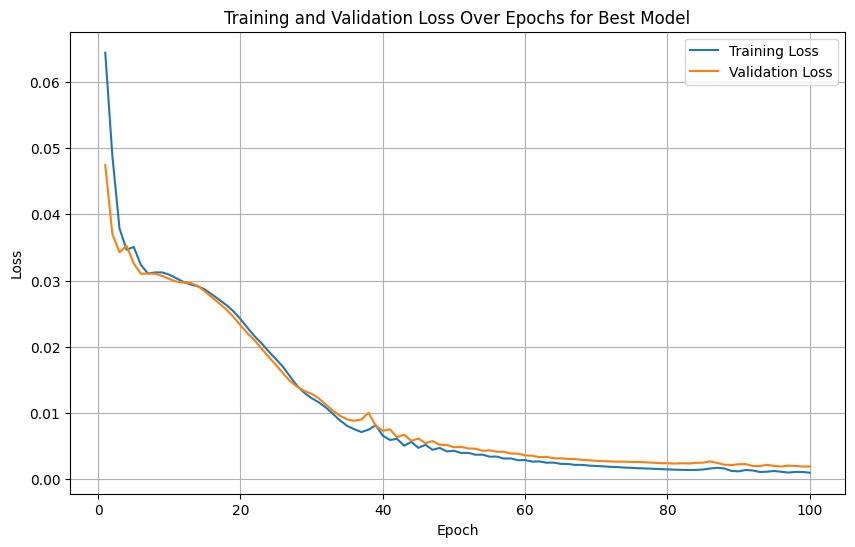

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), all_train_losses[0], label='Training Loss')
plt.plot(range(1, epochs + 1), all_val_losses[0], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for Best Model')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
training_history = torch.load("/content/drive/MyDrive/Machine_Learning/HW1/ROBOT_5_ARMS_models/1K_model_state_dict_r5_NO_PREPROCESSING", weights_only=False)
best_hidden_sizes = training_history["hyperparameters"]["hidden_sizes"]
model2 = NeuralNetwork(hidden_sizes=best_hidden_sizes)
model2.load_state_dict(training_history["model_state_dict"])

model2.eval()
with torch.no_grad():
    y_test_pred_tensor = model2(X_test_tensor)
    y_test_pred = y_test_pred_tensor.numpy()

# Calculate test metrics
test_mse = root_mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Root Mean Squared Error:", test_mse)
print("Test R^2 Score:", test_r2)

Test Root Mean Squared Error: 0.026663598006752418
Test R^2 Score: 0.9752795696258545


## Check Inverse kinematics

In [ ]:
def inverse_kinematics_newton_raphson(model, initial_joints, target_position, max_iters=50000, tolerance=1e-4):
    joints = initial_joints.clone().detach().requires_grad_(True)

    for i in range(max_iters):
        current_position = FK(model, joints)
        error = target_position - current_position
        if torch.norm(error) < tolerance:
            return joints.detach()
        #else:
          #print("MAX ITERS REACHED NEWTON")

        jacobian = FK_Jacobian(model, joints)
        try:
            delta_joints = torch.linalg.solve(jacobian, error)
        except RuntimeError as e:
            print("Errore nell'inversione del Jacobiano:", e)
            return joints.detach()

        joints = joints + delta_joints

    return joints.detach()

def inverse_kinematics_levenberg_marquardt(model, initial_joints, target_position, max_iters=100000, tolerance=1e-4, lambda_=0.05):
    joints = initial_joints.clone().detach().requires_grad_(True)

    for i in range(max_iters):
        current_position = FK(model, joints)
        error = target_position - current_position
        if torch.norm(error) < tolerance:
            return joints.detach()
        #else:
          #print("MAX ITERS REACHED LM")

        jacobian = FK_Jacobian(model, joints)

        # Update of Levenberg-Marquardt: (J^T J + λI) * delta_joints = J^T * error
        A = jacobian.T @ jacobian + lambda_ * torch.eye(jacobian.size(1))
        b = jacobian.T @ error

        try:
            delta_joints = torch.linalg.solve(A, b)
        except RuntimeError as e:
            print("Errore nell'inversione della matrice in Levenberg-Marquardt:", e)
            return joints.detach()

        joints = joints + delta_joints

    return joints.detach()

In [ ]:
training_history = torch.load("/content/drive/MyDrive/Machine_Learning/HW1/ROBOT_5_ARMS_models/1K_model_state_dict_r5_NO_PREPROCESSING", weights_only=False)
best_hidden_sizes = training_history["hyperparameters"]["hidden_sizes"]
model = NeuralNetwork(hidden_sizes=best_hidden_sizes)
model.load_state_dict(training_history["model_state_dict"])
model.eval()

NeuralNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=5, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=80, bias=True)
    (3): Linear(in_features=80, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [ ]:
initial_joints = torch.tensor([0.0, 0.0, np.pi/4, 0.0, 0.0], requires_grad=True)
#target_position = torch.tensor([-0.1, -0.1])
target_position = torch.tensor(y_test.sample(n=1).to_numpy().flatten(), dtype=torch.float32)
print(target_position)

compare_methods(model, initial_joints, target_position)


tensor([-0.3420, -0.0940,  0.2840])
Newton-Raphson Method:
Errore nell'inversione del Jacobiano: linalg.solve: A must be batches of square matrices, but they are 3 by 5 matrices
Target joints Newton-Raphson: tensor([0.0000, 0.0000, 0.7854, 0.0000, 0.0000])
Newton-Raphson Error: 0.6377606391906738

Levenberg-Marquardt Method:
Target joints Levenberg-Marquardt: tensor([-0.0050, -1.4827,  0.4888,  0.0437,  0.7370])
Levenberg-Marquardt Error: 9.808147297007963e-05
 
--------------------------------------
Comparison target: tensor([-0.3420, -0.0940,  0.2840]) Value computed by Newton-Raphson Method:  tensor([ 0.2549, -0.0057,  0.4905])
Comparison target: tensor([-0.3420, -0.0940,  0.2840]) Value computed by Levenberg Marquardt:  tensor([-0.3419, -0.0940,  0.2840])


# 1K Preprocessing

## Dataset

In [17]:
# Create a Reduced Dataset

df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/HW1/dataset/LOG_FILE_FULL_R5.csv", sep=';')
df_filtered = df[['j0', 'j1', 'j2', 'j3', 'j4', 'ft_x', 'ft_y', 'ft_z']]

# Calculate the number of rows to keep (1% of the original dataset)
n_keep = int(len(df_filtered) * 0.01)

# Randomly sample 10% of the rows
df_reduced_filtered = df_filtered.sample(n=n_keep, random_state=42)

# Reset the index
df_reduced_filtered.reset_index(drop=True, inplace=True)

print(f"Dataset Shape before: {df_filtered.shape}")
print(f"Dataset Shape after: {df_reduced_filtered.shape}")

# Define features (X) and target (Y)
X = df_reduced_filtered[['j0', 'j1', 'j2', 'j3', 'j4']]
y = df_reduced_filtered[['ft_x', 'ft_y', 'ft_z']]

# Split into training+validation and test sets (80% training+validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training+validation set into training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

scaler_X = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

print("Training set size:", X_train_scaled.shape[0])
print("Validation set size:", X_val_scaled.shape[0])
print("Test set size:", X_test_scaled.shape[0])

Dataset Shape before: (100000, 8)
Dataset Shape after: (1000, 8)
Training set size: 600
Validation set size: 200
Test set size: 200


## Model Train and Test

In [28]:
#-------------------------Linear Regression-------------------------

# train
lr = MultiOutputRegressor(LinearRegression())
lr.fit(X_train_scaled, y_train)

# test
warnings.filterwarnings("ignore")
lr_rmse, lr_r2 = evaluate_model(lr, X_test, y_test)
print(f"Linear Regression RMSE: {lr_rmse}, R2: {lr_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

# ----------------------Decision tree regressor-------------------------

# train
dt_param_grid = {
    'splitter': ['best', 'random'],
    'max_depth': [20, 25, 30]
}
dt = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt, dt_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
dt_grid.fit(X_train_scaled, y_train)

# test
best_dt = dt_grid.best_estimator_
dt_rmse, dt_r2 = evaluate_model(best_dt, X_test_scaled, y_test)
print(f"Decision Tree RMSE: {dt_rmse}, R2: {dt_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

# -----------------------------SVR-----------------------------

# train
svr_param_grid = {
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 1],
    'estimator__max_iter': [150]
}
svr = MultiOutputRegressor(SVR())
svr_grid = GridSearchCV(svr, svr_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train)


# test
best_svr = svr_grid.best_estimator_
svr_rmse, svr_r2 = evaluate_model(best_svr, X_test_scaled, y_test)
print(f"SVR Best Params: {svr_grid.best_params_}")
print(f"SVR RMSE: {svr_rmse}, R2: {svr_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

#---------------------------Random Forest--------------------------

# train
rf_param_grid = {
    'estimator__n_estimators': [100, 150],
    'estimator__max_depth': [12, 15]
}
rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf_grid = GridSearchCV(rf, rf_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)


#test
best_rf = rf_grid.best_estimator_
rf_rmse, rf_r2 = evaluate_model(best_rf, X_test_scaled, y_test)
print(f"Random Forest Best Params: {rf_grid.best_params_}")
print(f"Random Forest RMSE: {rf_rmse}, R2: {rf_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

#------------------------------------KNN---------------------------------------

# train
knn_param_grid = {
    'estimator__n_neighbors': [3, 5, 10],
    'estimator__weights': ['uniform', 'distance'],
    'estimator__p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}
knn = MultiOutputRegressor(KNeighborsRegressor())
knn_grid = GridSearchCV(knn, knn_param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

#test
best_knn = knn_grid.best_estimator_
knn_rmse, knn_r2 = evaluate_model(best_knn, X_test_scaled, y_test)
print(f"KNN Best Params: {knn_grid.best_params_}")
print(f"KNN RMSE: {knn_rmse}, R2: {knn_r2}")
print(" ")
print("--------------------------------------------------------------")
print(" ")

Linear Regression RMSE: 0.1675834129626587, R2: 0.08501278775539796
 
--------------------------------------------------------------
 
Decision Tree RMSE: 0.1218151386575711, R2: 0.5040840366210831
 
--------------------------------------------------------------
 
SVR Best Params: {'estimator__C': 10, 'estimator__epsilon': 0.01, 'estimator__kernel': 'rbf', 'estimator__max_iter': 150}
SVR RMSE: 0.03444883355984787, R2: 0.9566967370900379
 
--------------------------------------------------------------
 
Random Forest Best Params: {'estimator__max_depth': 15, 'estimator__n_estimators': 150}
Random Forest RMSE: 0.07545743963355483, R2: 0.8043745712268074
 
--------------------------------------------------------------
 
KNN Best Params: {'estimator__n_neighbors': 5, 'estimator__p': 2, 'estimator__weights': 'distance'}
KNN RMSE: 0.06533161898767459, R2: 0.8611666502046225
 
--------------------------------------------------------------
 


In [18]:
# Conversion of data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [19]:
class NeuralNetwork(nn.Module):
    def __init__(self, hidden_sizes):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()

        # Input layer
        input_size = 5  # two input features: j0 and j1
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))

        # Output layer
        output_size = 3  # output: ft_x and ft_y
        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))

    def forward(self, x):
        for layer in self.layers[:-1]:  # Apply ReLU to all hidden layers
            x = torch.relu(layer(x))
        x = self.layers[-1](x)  # No activation for the output layer
        return x

In [31]:
#'hidden_sizes': [[16, 32, 16], [16, 32, 64, 32, 16], [32, 64, 128, 64, 32]],
param_grid = {
    'learning_rate': [0.01, 0.001],
    'hidden_sizes': [[16, 32, 64, 32, 16], [32, 64, 80, 64, 32], [16, 32, 64, 128, 64, 32, 16]],
    'optimizer': ['Adam', 'SGD']
}
grid = ParameterGrid(param_grid)

epochs = 100
best_val_loss = float('inf')
save_path = "/content/drive/MyDrive/Machine_Learning/HW1/ROBOT_5_ARMS_models"

all_train_losses = []
all_val_losses = []
best_model_info = {
    "epoch": [],
    "train_loss": [],
    "val_loss": [],
    "model_state_dict": None,
    "optimizer_state_dict": None,
    "hyperparameters": {}
}

In [32]:
for params in grid:
    # Initialize model and criterion
    model = NeuralNetwork(hidden_sizes=params['hidden_sizes'])
    criterion = nn.MSELoss()

    # Choose optimizer based on parameter grid
    if params['optimizer'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])
    elif params['optimizer'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=params['learning_rate'])
    elif params['optimizer'] == 'RMSprop':
        optimizer = optim.RMSprop(model.parameters(), lr=params['learning_rate'])

    # Track losses for each epoch
    train_losses = []
    val_losses = []

    # Training loop
    for epoch in tqdm(range(epochs), desc=f"Training Model with LR={params['learning_rate']}, Layers={params['hidden_sizes']}, Optimizer={params['optimizer']}"):
        # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        train_loss = criterion(outputs, y_train_tensor)
        train_loss.backward()
        optimizer.step()

        # Validation phase
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val_tensor)
            val_loss = criterion(val_outputs, y_val_tensor)

        # Store losses
        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

        # Check if this model is the best so far based on validation loss
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model_info = {
                "epoch": epoch + 1,
                "train_loss": train_loss.item(),
                "val_loss": val_loss.item(),
                "model_state_dict": model.state_dict(),  # Store the best model weights
                "optimizer_state_dict": optimizer.state_dict(),  # Save the best optimizer state
                "hyperparameters": params  # Save the best hyperparameters for model reconstruction
            }

        # Update tqdm description with current losses
        tqdm.write(f"Epoch [{epoch+1}/{epochs}], Training Loss: {train_loss.item():.4f}, Validation Loss: {val_loss.item():.4f}")

    # Save all losses for plotting
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

# Print the best hyperparameters
print("Best Model Parameters:")
print("Learning Rate:", best_model_info['hyperparameters']['learning_rate'])
print("Hidden Layer Sizes:", best_model_info['hyperparameters']['hidden_sizes'])
print("Optimizer:", best_model_info['hyperparameters']['optimizer'])
print("Best Validation Loss:", best_val_loss)

# Save the best model information to a file
torch.save(best_model_info, os.path.join(save_path, "1K_model_state_dict_r5_PREPROCESSING"))

Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   4%|▍         | 4/100 [00:00<00:04, 21.36it/s]

Epoch [1/100], Training Loss: 0.0899, Validation Loss: 0.0704
Epoch [2/100], Training Loss: 0.0737, Validation Loss: 0.0567
Epoch [3/100], Training Loss: 0.0594, Validation Loss: 0.0453
Epoch [4/100], Training Loss: 0.0473, Validation Loss: 0.0423
Epoch [5/100], Training Loss: 0.0436, Validation Loss: 0.0363
Epoch [6/100], Training Loss: 0.0371, Validation Loss: 0.0327
Epoch [7/100], Training Loss: 0.0334, Validation Loss: 0.0319


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  10%|█         | 10/100 [00:00<00:03, 24.24it/s]

Epoch [8/100], Training Loss: 0.0325, Validation Loss: 0.0317
Epoch [9/100], Training Loss: 0.0320, Validation Loss: 0.0317
Epoch [10/100], Training Loss: 0.0318, Validation Loss: 0.0317
Epoch [11/100], Training Loss: 0.0316, Validation Loss: 0.0316
Epoch [12/100], Training Loss: 0.0313, Validation Loss: 0.0312


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  16%|█▌        | 16/100 [00:00<00:03, 25.31it/s]

Epoch [13/100], Training Loss: 0.0309, Validation Loss: 0.0306
Epoch [14/100], Training Loss: 0.0302, Validation Loss: 0.0299
Epoch [15/100], Training Loss: 0.0296, Validation Loss: 0.0294
Epoch [16/100], Training Loss: 0.0291, Validation Loss: 0.0290
Epoch [17/100], Training Loss: 0.0287, Validation Loss: 0.0287


Epoch [18/100], Training Loss: 0.0283, Validation Loss: 0.0283
Epoch [19/100], Training Loss: 0.0277, Validation Loss: 0.0275
Epoch [20/100], Training Loss: 0.0269, Validation Loss: 0.0267
Epoch [21/100], Training Loss: 0.0259, Validation Loss: 0.0259
Epoch [22/100], Training Loss: 0.0250, Validation Loss: 0.0254
Epoch [23/100], Training Loss: 0.0244, Validation Loss: 0.0248
Epoch [24/100], Training Loss: 0.0239, Validation Loss: 0.0242
Epoch [25/100], Training Loss: 0.0233, Validation Loss: 0.0236
Epoch [26/100], Training Loss: 0.0226, Validation Loss: 0.0232


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  32%|███▏      | 32/100 [00:10<00:19,  3.41it/s]

Epoch [27/100], Training Loss: 0.0219, Validation Loss: 0.0230
Epoch [28/100], Training Loss: 0.0214, Validation Loss: 0.0226
Epoch [29/100], Training Loss: 0.0208, Validation Loss: 0.0217
Epoch [30/100], Training Loss: 0.0198, Validation Loss: 0.0204
Epoch [31/100], Training Loss: 0.0188, Validation Loss: 0.0192
Epoch [32/100], Training Loss: 0.0177, Validation Loss: 0.0185
Epoch [33/100], Training Loss: 0.0168, Validation Loss: 0.0175
Epoch [34/100], Training Loss: 0.0160, Validation Loss: 0.0162


Epoch [35/100], Training Loss: 0.0151, Validation Loss: 0.0152
Epoch [36/100], Training Loss: 0.0141, Validation Loss: 0.0145
Epoch [37/100], Training Loss: 0.0133, Validation Loss: 0.0136
Epoch [38/100], Training Loss: 0.0126, Validation Loss: 0.0137
Epoch [39/100], Training Loss: 0.0125, Validation Loss: 0.0145
Epoch [40/100], Training Loss: 0.0132, Validation Loss: 0.0122
Epoch [41/100], Training Loss: 0.0112, Validation Loss: 0.0125
Epoch [42/100], Training Loss: 0.0116, Validation Loss: 0.0118
Epoch [43/100], Training Loss: 0.0107, Validation Loss: 0.0114
Epoch [44/100], Training Loss: 0.0106, Validation Loss: 0.0105
Epoch [45/100], Training Loss: 0.0099, Validation Loss: 0.0104


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  56%|█████▌    | 56/100 [00:11<00:02, 15.94it/s]

Epoch [46/100], Training Loss: 0.0098, Validation Loss: 0.0100
Epoch [47/100], Training Loss: 0.0094, Validation Loss: 0.0098
Epoch [48/100], Training Loss: 0.0091, Validation Loss: 0.0090
Epoch [49/100], Training Loss: 0.0086, Validation Loss: 0.0089
Epoch [50/100], Training Loss: 0.0084, Validation Loss: 0.0088
Epoch [51/100], Training Loss: 0.0081, Validation Loss: 0.0083
Epoch [52/100], Training Loss: 0.0076, Validation Loss: 0.0078
Epoch [53/100], Training Loss: 0.0073, Validation Loss: 0.0075
Epoch [54/100], Training Loss: 0.0070, Validation Loss: 0.0073
Epoch [55/100], Training Loss: 0.0067, Validation Loss: 0.0068
Epoch [56/100], Training Loss: 0.0062, Validation Loss: 0.0065
Epoch [57/100], Training Loss: 0.0059, Validation Loss: 0.0061


Epoch [58/100], Training Loss: 0.0055, Validation Loss: 0.0059
Epoch [59/100], Training Loss: 0.0053, Validation Loss: 0.0054
Epoch [60/100], Training Loss: 0.0048, Validation Loss: 0.0054
Epoch [61/100], Training Loss: 0.0047, Validation Loss: 0.0049
Epoch [62/100], Training Loss: 0.0043, Validation Loss: 0.0050
Epoch [63/100], Training Loss: 0.0043, Validation Loss: 0.0046
Epoch [64/100], Training Loss: 0.0040, Validation Loss: 0.0045
Epoch [65/100], Training Loss: 0.0037, Validation Loss: 0.0045
Epoch [66/100], Training Loss: 0.0037, Validation Loss: 0.0041
Epoch [67/100], Training Loss: 0.0034, Validation Loss: 0.0040
Epoch [68/100], Training Loss: 0.0033, Validation Loss: 0.0040


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  68%|██████▊   | 68/100 [00:11<00:01, 25.38it/s]

Epoch [69/100], Training Loss: 0.0032, Validation Loss: 0.0037
Epoch [70/100], Training Loss: 0.0030, Validation Loss: 0.0037
Epoch [71/100], Training Loss: 0.0030, Validation Loss: 0.0036
Epoch [72/100], Training Loss: 0.0028, Validation Loss: 0.0034


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  74%|███████▍  | 74/100 [00:11<00:01, 23.65it/s]

Epoch [73/100], Training Loss: 0.0026, Validation Loss: 0.0034
Epoch [74/100], Training Loss: 0.0026, Validation Loss: 0.0033
Epoch [75/100], Training Loss: 0.0025, Validation Loss: 0.0033
Epoch [76/100], Training Loss: 0.0025, Validation Loss: 0.0035


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  79%|███████▉  | 79/100 [00:12<00:01, 18.48it/s]

Epoch [77/100], Training Loss: 0.0028, Validation Loss: 0.0049
Epoch [78/100], Training Loss: 0.0043, Validation Loss: 0.0071
Epoch [79/100], Training Loss: 0.0064, Validation Loss: 0.0037


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  83%|████████▎ | 83/100 [00:12<00:00, 17.78it/s]

Epoch [80/100], Training Loss: 0.0029, Validation Loss: 0.0044
Epoch [81/100], Training Loss: 0.0037, Validation Loss: 0.0043
Epoch [82/100], Training Loss: 0.0035, Validation Loss: 0.0037
Epoch [83/100], Training Loss: 0.0030, Validation Loss: 0.0039


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  86%|████████▌ | 86/100 [00:12<00:00, 17.77it/s]

Epoch [84/100], Training Loss: 0.0031, Validation Loss: 0.0036
Epoch [85/100], Training Loss: 0.0028, Validation Loss: 0.0034
Epoch [86/100], Training Loss: 0.0027, Validation Loss: 0.0036
Epoch [87/100], Training Loss: 0.0028, Validation Loss: 0.0031
Epoch [88/100], Training Loss: 0.0022, Validation Loss: 0.0036


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  92%|█████████▏| 92/100 [00:12<00:00, 19.20it/s]

Epoch [89/100], Training Loss: 0.0028, Validation Loss: 0.0029
Epoch [90/100], Training Loss: 0.0020, Validation Loss: 0.0034
Epoch [91/100], Training Loss: 0.0026, Validation Loss: 0.0029
Epoch [92/100], Training Loss: 0.0020, Validation Loss: 0.0030
Epoch [93/100], Training Loss: 0.0022, Validation Loss: 0.0028


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:13<00:00,  7.63it/s]


Epoch [94/100], Training Loss: 0.0021, Validation Loss: 0.0028
Epoch [95/100], Training Loss: 0.0020, Validation Loss: 0.0029
Epoch [96/100], Training Loss: 0.0021, Validation Loss: 0.0025
Epoch [97/100], Training Loss: 0.0018, Validation Loss: 0.0027
Epoch [98/100], Training Loss: 0.0020, Validation Loss: 0.0025
Epoch [99/100], Training Loss: 0.0018, Validation Loss: 0.0027
Epoch [100/100], Training Loss: 0.0019, Validation Loss: 0.0025


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Training Loss: 0.0972, Validation Loss: 0.0930


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   4%|▍         | 4/100 [00:00<00:02, 32.44it/s]

Epoch [2/100], Training Loss: 0.0960, Validation Loss: 0.0918
Epoch [3/100], Training Loss: 0.0948, Validation Loss: 0.0907
Epoch [4/100], Training Loss: 0.0936, Validation Loss: 0.0896
Epoch [5/100], Training Loss: 0.0925, Validation Loss: 0.0885
Epoch [6/100], Training Loss: 0.0913, Validation Loss: 0.0874
Epoch [7/100], Training Loss: 0.0902, Validation Loss: 0.0864


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   8%|▊         | 8/100 [00:00<00:02, 30.87it/s]

Epoch [8/100], Training Loss: 0.0892, Validation Loss: 0.0853


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  12%|█▏        | 12/100 [00:00<00:02, 33.17it/s]

Epoch [9/100], Training Loss: 0.0881, Validation Loss: 0.0843
Epoch [10/100], Training Loss: 0.0871, Validation Loss: 0.0833
Epoch [11/100], Training Loss: 0.0860, Validation Loss: 0.0823
Epoch [12/100], Training Loss: 0.0850, Validation Loss: 0.0814
Epoch [13/100], Training Loss: 0.0840, Validation Loss: 0.0805
Epoch [14/100], Training Loss: 0.0831, Validation Loss: 0.0795
Epoch [15/100], Training Loss: 0.0821, Validation Loss: 0.0786


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  21%|██        | 21/100 [00:00<00:02, 36.85it/s]

Epoch [16/100], Training Loss: 0.0812, Validation Loss: 0.0778
Epoch [17/100], Training Loss: 0.0803, Validation Loss: 0.0769
Epoch [18/100], Training Loss: 0.0794, Validation Loss: 0.0760
Epoch [19/100], Training Loss: 0.0785, Validation Loss: 0.0752
Epoch [20/100], Training Loss: 0.0777, Validation Loss: 0.0744
Epoch [21/100], Training Loss: 0.0768, Validation Loss: 0.0736
Epoch [22/100], Training Loss: 0.0760, Validation Loss: 0.0728
Epoch [23/100], Training Loss: 0.0752, Validation Loss: 0.0720
Epoch [24/100], Training Loss: 0.0744, Validation Loss: 0.0713


Epoch [25/100], Training Loss: 0.0736, Validation Loss: 0.0705
Epoch [26/100], Training Loss: 0.0728, Validation Loss: 0.0698
Epoch [27/100], Training Loss: 0.0721, Validation Loss: 0.0691
Epoch [28/100], Training Loss: 0.0713, Validation Loss: 0.0684
Epoch [29/100], Training Loss: 0.0706, Validation Loss: 0.0677
Epoch [30/100], Training Loss: 0.0699, Validation Loss: 0.0670


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  33%|███▎      | 33/100 [00:01<00:02, 28.91it/s]

Epoch [31/100], Training Loss: 0.0692, Validation Loss: 0.0663
Epoch [32/100], Training Loss: 0.0685, Validation Loss: 0.0657
Epoch [33/100], Training Loss: 0.0678, Validation Loss: 0.0650
Epoch [34/100], Training Loss: 0.0671, Validation Loss: 0.0644
Epoch [35/100], Training Loss: 0.0665, Validation Loss: 0.0638


Epoch [36/100], Training Loss: 0.0659, Validation Loss: 0.0632
Epoch [37/100], Training Loss: 0.0652, Validation Loss: 0.0626
Epoch [38/100], Training Loss: 0.0646, Validation Loss: 0.0620
Epoch [39/100], Training Loss: 0.0640, Validation Loss: 0.0615
Epoch [40/100], Training Loss: 0.0634, Validation Loss: 0.0609
Epoch [41/100], Training Loss: 0.0628, Validation Loss: 0.0603
Epoch [42/100], Training Loss: 0.0623, Validation Loss: 0.0598
Epoch [43/100], Training Loss: 0.0617, Validation Loss: 0.0593


Epoch [44/100], Training Loss: 0.0612, Validation Loss: 0.0588
Epoch [45/100], Training Loss: 0.0606, Validation Loss: 0.0582
Epoch [46/100], Training Loss: 0.0601, Validation Loss: 0.0577
Epoch [47/100], Training Loss: 0.0596, Validation Loss: 0.0573
Epoch [48/100], Training Loss: 0.0591, Validation Loss: 0.0568
Epoch [49/100], Training Loss: 0.0585, Validation Loss: 0.0563
Epoch [50/100], Training Loss: 0.0581, Validation Loss: 0.0558
Epoch [51/100], Training Loss: 0.0576, Validation Loss: 0.0554
Epoch [52/100], Training Loss: 0.0571, Validation Loss: 0.0549
Epoch [53/100], Training Loss: 0.0566, Validation Loss: 0.0545
Epoch [54/100], Training Loss: 0.0562, Validation Loss: 0.0541
Epoch [55/100], Training Loss: 0.0557, Validation Loss: 0.0536
Epoch [56/100], Training Loss: 0.0553, Validation Loss: 0.0532


Epoch [57/100], Training Loss: 0.0549, Validation Loss: 0.0528
Epoch [58/100], Training Loss: 0.0544, Validation Loss: 0.0524
Epoch [59/100], Training Loss: 0.0540, Validation Loss: 0.0520
Epoch [60/100], Training Loss: 0.0536, Validation Loss: 0.0517
Epoch [61/100], Training Loss: 0.0532, Validation Loss: 0.0513
Epoch [62/100], Training Loss: 0.0528, Validation Loss: 0.0509
Epoch [63/100], Training Loss: 0.0524, Validation Loss: 0.0505
Epoch [64/100], Training Loss: 0.0520, Validation Loss: 0.0502
Epoch [65/100], Training Loss: 0.0517, Validation Loss: 0.0498
Epoch [66/100], Training Loss: 0.0513, Validation Loss: 0.0495
Epoch [67/100], Training Loss: 0.0509, Validation Loss: 0.0492
Epoch [68/100], Training Loss: 0.0506, Validation Loss: 0.0488


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  79%|███████▉  | 79/100 [00:02<00:00, 57.77it/s]

Epoch [69/100], Training Loss: 0.0502, Validation Loss: 0.0485
Epoch [70/100], Training Loss: 0.0499, Validation Loss: 0.0482
Epoch [71/100], Training Loss: 0.0496, Validation Loss: 0.0479
Epoch [72/100], Training Loss: 0.0492, Validation Loss: 0.0476
Epoch [73/100], Training Loss: 0.0489, Validation Loss: 0.0473
Epoch [74/100], Training Loss: 0.0486, Validation Loss: 0.0470
Epoch [75/100], Training Loss: 0.0483, Validation Loss: 0.0467
Epoch [76/100], Training Loss: 0.0480, Validation Loss: 0.0464
Epoch [77/100], Training Loss: 0.0477, Validation Loss: 0.0461
Epoch [78/100], Training Loss: 0.0474, Validation Loss: 0.0459
Epoch [79/100], Training Loss: 0.0471, Validation Loss: 0.0456
Epoch [80/100], Training Loss: 0.0468, Validation Loss: 0.0453
Epoch [81/100], Training Loss: 0.0465, Validation Loss: 0.0451
Epoch [82/100], Training Loss: 0.0463, Validation Loss: 0.0448


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  91%|█████████ | 91/100 [00:02<00:00, 54.39it/s]

Epoch [83/100], Training Loss: 0.0460, Validation Loss: 0.0446
Epoch [84/100], Training Loss: 0.0457, Validation Loss: 0.0443
Epoch [85/100], Training Loss: 0.0455, Validation Loss: 0.0441
Epoch [86/100], Training Loss: 0.0452, Validation Loss: 0.0438
Epoch [87/100], Training Loss: 0.0450, Validation Loss: 0.0436
Epoch [88/100], Training Loss: 0.0447, Validation Loss: 0.0434
Epoch [89/100], Training Loss: 0.0445, Validation Loss: 0.0432
Epoch [90/100], Training Loss: 0.0443, Validation Loss: 0.0429
Epoch [91/100], Training Loss: 0.0440, Validation Loss: 0.0427
Epoch [92/100], Training Loss: 0.0438, Validation Loss: 0.0425


Training Model with LR=0.01, Layers=[16, 32, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:02<00:00, 42.37it/s]


Epoch [93/100], Training Loss: 0.0436, Validation Loss: 0.0423
Epoch [94/100], Training Loss: 0.0434, Validation Loss: 0.0421
Epoch [95/100], Training Loss: 0.0431, Validation Loss: 0.0419
Epoch [96/100], Training Loss: 0.0429, Validation Loss: 0.0417
Epoch [97/100], Training Loss: 0.0427, Validation Loss: 0.0415
Epoch [98/100], Training Loss: 0.0425, Validation Loss: 0.0413
Epoch [99/100], Training Loss: 0.0423, Validation Loss: 0.0412
Epoch [100/100], Training Loss: 0.0421, Validation Loss: 0.0410


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Training Loss: 0.0881, Validation Loss: 0.0834
Epoch [2/100], Training Loss: 0.0870, Validation Loss: 0.0824


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:   5%|▌         | 5/100 [00:00<00:02, 41.69it/s]

Epoch [3/100], Training Loss: 0.0860, Validation Loss: 0.0814
Epoch [4/100], Training Loss: 0.0850, Validation Loss: 0.0805
Epoch [5/100], Training Loss: 0.0841, Validation Loss: 0.0796
Epoch [6/100], Training Loss: 0.0831, Validation Loss: 0.0787
Epoch [7/100], Training Loss: 0.0822, Validation Loss: 0.0778
Epoch [8/100], Training Loss: 0.0813, Validation Loss: 0.0769
Epoch [9/100], Training Loss: 0.0803, Validation Loss: 0.0760
Epoch [10/100], Training Loss: 0.0794, Validation Loss: 0.0751


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  10%|█         | 10/100 [00:00<00:02, 43.65it/s]

Epoch [11/100], Training Loss: 0.0784, Validation Loss: 0.0741


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  15%|█▌        | 15/100 [00:00<00:02, 39.89it/s]

Epoch [12/100], Training Loss: 0.0774, Validation Loss: 0.0732
Epoch [13/100], Training Loss: 0.0764, Validation Loss: 0.0722
Epoch [14/100], Training Loss: 0.0754, Validation Loss: 0.0712
Epoch [15/100], Training Loss: 0.0744, Validation Loss: 0.0702
Epoch [16/100], Training Loss: 0.0733, Validation Loss: 0.0691
Epoch [17/100], Training Loss: 0.0722, Validation Loss: 0.0680
Epoch [18/100], Training Loss: 0.0710, Validation Loss: 0.0669
Epoch [19/100], Training Loss: 0.0699, Validation Loss: 0.0657
Epoch [20/100], Training Loss: 0.0687, Validation Loss: 0.0645


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  21%|██        | 21/100 [00:00<00:01, 46.36it/s]

Epoch [21/100], Training Loss: 0.0674, Validation Loss: 0.0633
Epoch [22/100], Training Loss: 0.0661, Validation Loss: 0.0620


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:00<00:01, 46.50it/s]

Epoch [23/100], Training Loss: 0.0648, Validation Loss: 0.0606
Epoch [24/100], Training Loss: 0.0633, Validation Loss: 0.0592
Epoch [25/100], Training Loss: 0.0618, Validation Loss: 0.0577
Epoch [26/100], Training Loss: 0.0602, Validation Loss: 0.0560
Epoch [27/100], Training Loss: 0.0586, Validation Loss: 0.0543
Epoch [28/100], Training Loss: 0.0567, Validation Loss: 0.0523
Epoch [29/100], Training Loss: 0.0547, Validation Loss: 0.0502
Epoch [30/100], Training Loss: 0.0524, Validation Loss: 0.0479
Epoch [31/100], Training Loss: 0.0499, Validation Loss: 0.0454


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  32%|███▏      | 32/100 [00:00<00:01, 48.64it/s]

Epoch [32/100], Training Loss: 0.0473, Validation Loss: 0.0428
Epoch [33/100], Training Loss: 0.0446, Validation Loss: 0.0403


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  38%|███▊      | 38/100 [00:00<00:01, 50.36it/s]

Epoch [34/100], Training Loss: 0.0419, Validation Loss: 0.0381
Epoch [35/100], Training Loss: 0.0395, Validation Loss: 0.0363
Epoch [36/100], Training Loss: 0.0375, Validation Loss: 0.0352
Epoch [37/100], Training Loss: 0.0362, Validation Loss: 0.0348
Epoch [38/100], Training Loss: 0.0357, Validation Loss: 0.0351
Epoch [39/100], Training Loss: 0.0358, Validation Loss: 0.0357
Epoch [40/100], Training Loss: 0.0362, Validation Loss: 0.0361
Epoch [41/100], Training Loss: 0.0366, Validation Loss: 0.0362
Epoch [42/100], Training Loss: 0.0366, Validation Loss: 0.0358


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  44%|████▍     | 44/100 [00:00<00:01, 50.77it/s]

Epoch [43/100], Training Loss: 0.0361, Validation Loss: 0.0351
Epoch [44/100], Training Loss: 0.0354, Validation Loss: 0.0343


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  50%|█████     | 50/100 [00:01<00:00, 50.46it/s]

Epoch [45/100], Training Loss: 0.0346, Validation Loss: 0.0334
Epoch [46/100], Training Loss: 0.0339, Validation Loss: 0.0328
Epoch [47/100], Training Loss: 0.0333, Validation Loss: 0.0322
Epoch [48/100], Training Loss: 0.0329, Validation Loss: 0.0319
Epoch [49/100], Training Loss: 0.0326, Validation Loss: 0.0317
Epoch [50/100], Training Loss: 0.0324, Validation Loss: 0.0316
Epoch [51/100], Training Loss: 0.0322, Validation Loss: 0.0314
Epoch [52/100], Training Loss: 0.0321, Validation Loss: 0.0313
Epoch [53/100], Training Loss: 0.0320, Validation Loss: 0.0312


Epoch [54/100], Training Loss: 0.0318, Validation Loss: 0.0310
Epoch [55/100], Training Loss: 0.0316, Validation Loss: 0.0309


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  62%|██████▏   | 62/100 [00:01<00:00, 52.98it/s]

Epoch [56/100], Training Loss: 0.0313, Validation Loss: 0.0307
Epoch [57/100], Training Loss: 0.0311, Validation Loss: 0.0306
Epoch [58/100], Training Loss: 0.0308, Validation Loss: 0.0305
Epoch [59/100], Training Loss: 0.0306, Validation Loss: 0.0305
Epoch [60/100], Training Loss: 0.0305, Validation Loss: 0.0304
Epoch [61/100], Training Loss: 0.0304, Validation Loss: 0.0305
Epoch [62/100], Training Loss: 0.0303, Validation Loss: 0.0305
Epoch [63/100], Training Loss: 0.0302, Validation Loss: 0.0304
Epoch [64/100], Training Loss: 0.0301, Validation Loss: 0.0303
Epoch [65/100], Training Loss: 0.0300, Validation Loss: 0.0302


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  62%|██████▏   | 62/100 [00:01<00:00, 52.98it/s]

Epoch [66/100], Training Loss: 0.0299, Validation Loss: 0.0300


Epoch [67/100], Training Loss: 0.0297, Validation Loss: 0.0299
Epoch [68/100], Training Loss: 0.0295, Validation Loss: 0.0296
Epoch [69/100], Training Loss: 0.0293, Validation Loss: 0.0294
Epoch [70/100], Training Loss: 0.0292, Validation Loss: 0.0293
Epoch [71/100], Training Loss: 0.0290, Validation Loss: 0.0291
Epoch [72/100], Training Loss: 0.0289, Validation Loss: 0.0290
Epoch [73/100], Training Loss: 0.0288, Validation Loss: 0.0288
Epoch [74/100], Training Loss: 0.0286, Validation Loss: 0.0287
Epoch [75/100], Training Loss: 0.0285, Validation Loss: 0.0285
Epoch [76/100], Training Loss: 0.0283, Validation Loss: 0.0284


Epoch [77/100], Training Loss: 0.0281, Validation Loss: 0.0283


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  81%|████████  | 81/100 [00:01<00:00, 50.30it/s]

Epoch [78/100], Training Loss: 0.0279, Validation Loss: 0.0281
Epoch [79/100], Training Loss: 0.0277, Validation Loss: 0.0280
Epoch [80/100], Training Loss: 0.0275, Validation Loss: 0.0278
Epoch [81/100], Training Loss: 0.0273, Validation Loss: 0.0277
Epoch [82/100], Training Loss: 0.0271, Validation Loss: 0.0275
Epoch [83/100], Training Loss: 0.0269, Validation Loss: 0.0274
Epoch [84/100], Training Loss: 0.0267, Validation Loss: 0.0272
Epoch [85/100], Training Loss: 0.0265, Validation Loss: 0.0270
Epoch [86/100], Training Loss: 0.0263, Validation Loss: 0.0268


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  81%|████████  | 81/100 [00:01<00:00, 50.30it/s]

Epoch [87/100], Training Loss: 0.0260, Validation Loss: 0.0265


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  93%|█████████▎| 93/100 [00:01<00:00, 50.76it/s]

Epoch [88/100], Training Loss: 0.0258, Validation Loss: 0.0263
Epoch [89/100], Training Loss: 0.0255, Validation Loss: 0.0261
Epoch [90/100], Training Loss: 0.0253, Validation Loss: 0.0259
Epoch [91/100], Training Loss: 0.0250, Validation Loss: 0.0256
Epoch [92/100], Training Loss: 0.0248, Validation Loss: 0.0254
Epoch [93/100], Training Loss: 0.0245, Validation Loss: 0.0251
Epoch [94/100], Training Loss: 0.0242, Validation Loss: 0.0249
Epoch [95/100], Training Loss: 0.0240, Validation Loss: 0.0247
Epoch [96/100], Training Loss: 0.0237, Validation Loss: 0.0244
Epoch [97/100], Training Loss: 0.0234, Validation Loss: 0.0242


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam:  93%|█████████▎| 93/100 [00:01<00:00, 50.76it/s]

Epoch [98/100], Training Loss: 0.0231, Validation Loss: 0.0239


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:02<00:00, 49.62it/s]


Epoch [99/100], Training Loss: 0.0229, Validation Loss: 0.0237
Epoch [100/100], Training Loss: 0.0226, Validation Loss: 0.0235


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:00<00:01, 52.75it/s]

Epoch [1/100], Training Loss: 0.0634, Validation Loss: 0.0623
Epoch [2/100], Training Loss: 0.0633, Validation Loss: 0.0623
Epoch [3/100], Training Loss: 0.0632, Validation Loss: 0.0622
Epoch [4/100], Training Loss: 0.0632, Validation Loss: 0.0621
Epoch [5/100], Training Loss: 0.0631, Validation Loss: 0.0621
Epoch [6/100], Training Loss: 0.0630, Validation Loss: 0.0620
Epoch [7/100], Training Loss: 0.0630, Validation Loss: 0.0620
Epoch [8/100], Training Loss: 0.0629, Validation Loss: 0.0619


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:00<00:01, 52.75it/s]

Epoch [9/100], Training Loss: 0.0629, Validation Loss: 0.0618


Epoch [10/100], Training Loss: 0.0628, Validation Loss: 0.0618
Epoch [11/100], Training Loss: 0.0627, Validation Loss: 0.0617


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  18%|█▊        | 18/100 [00:00<00:01, 50.03it/s]

Epoch [12/100], Training Loss: 0.0627, Validation Loss: 0.0616
Epoch [13/100], Training Loss: 0.0626, Validation Loss: 0.0616
Epoch [14/100], Training Loss: 0.0625, Validation Loss: 0.0615
Epoch [15/100], Training Loss: 0.0625, Validation Loss: 0.0615
Epoch [16/100], Training Loss: 0.0624, Validation Loss: 0.0614
Epoch [17/100], Training Loss: 0.0624, Validation Loss: 0.0613
Epoch [18/100], Training Loss: 0.0623, Validation Loss: 0.0613


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  18%|█▊        | 18/100 [00:00<00:01, 50.03it/s]

Epoch [19/100], Training Loss: 0.0622, Validation Loss: 0.0612


Epoch [20/100], Training Loss: 0.0622, Validation Loss: 0.0612
Epoch [21/100], Training Loss: 0.0621, Validation Loss: 0.0611


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  24%|██▍       | 24/100 [00:00<00:01, 50.61it/s]

Epoch [22/100], Training Loss: 0.0621, Validation Loss: 0.0610
Epoch [23/100], Training Loss: 0.0620, Validation Loss: 0.0610
Epoch [24/100], Training Loss: 0.0619, Validation Loss: 0.0609
Epoch [25/100], Training Loss: 0.0619, Validation Loss: 0.0609
Epoch [26/100], Training Loss: 0.0618, Validation Loss: 0.0608
Epoch [27/100], Training Loss: 0.0617, Validation Loss: 0.0607
Epoch [28/100], Training Loss: 0.0617, Validation Loss: 0.0607
Epoch [29/100], Training Loss: 0.0616, Validation Loss: 0.0606


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  30%|███       | 30/100 [00:00<00:01, 51.02it/s]

Epoch [30/100], Training Loss: 0.0616, Validation Loss: 0.0606


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  30%|███       | 30/100 [00:00<00:01, 51.02it/s]

Epoch [31/100], Training Loss: 0.0615, Validation Loss: 0.0605
Epoch [32/100], Training Loss: 0.0614, Validation Loss: 0.0604


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  36%|███▌      | 36/100 [00:00<00:01, 52.12it/s]

Epoch [33/100], Training Loss: 0.0614, Validation Loss: 0.0604
Epoch [34/100], Training Loss: 0.0613, Validation Loss: 0.0603
Epoch [35/100], Training Loss: 0.0613, Validation Loss: 0.0603
Epoch [36/100], Training Loss: 0.0612, Validation Loss: 0.0602
Epoch [37/100], Training Loss: 0.0611, Validation Loss: 0.0602
Epoch [38/100], Training Loss: 0.0611, Validation Loss: 0.0601
Epoch [39/100], Training Loss: 0.0610, Validation Loss: 0.0600
Epoch [40/100], Training Loss: 0.0610, Validation Loss: 0.0600
Epoch [41/100], Training Loss: 0.0609, Validation Loss: 0.0599


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  42%|████▏     | 42/100 [00:00<00:01, 52.63it/s]

Epoch [42/100], Training Loss: 0.0609, Validation Loss: 0.0599


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  42%|████▏     | 42/100 [00:00<00:01, 52.63it/s]

Epoch [43/100], Training Loss: 0.0608, Validation Loss: 0.0598
Epoch [44/100], Training Loss: 0.0607, Validation Loss: 0.0598


Epoch [45/100], Training Loss: 0.0607, Validation Loss: 0.0597
Epoch [46/100], Training Loss: 0.0606, Validation Loss: 0.0596
Epoch [47/100], Training Loss: 0.0606, Validation Loss: 0.0596
Epoch [48/100], Training Loss: 0.0605, Validation Loss: 0.0595
Epoch [49/100], Training Loss: 0.0604, Validation Loss: 0.0595
Epoch [50/100], Training Loss: 0.0604, Validation Loss: 0.0594
Epoch [51/100], Training Loss: 0.0603, Validation Loss: 0.0594
Epoch [52/100], Training Loss: 0.0603, Validation Loss: 0.0593
Epoch [53/100], Training Loss: 0.0602, Validation Loss: 0.0592


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  48%|████▊     | 48/100 [00:01<00:00, 53.15it/s]

Epoch [54/100], Training Loss: 0.0602, Validation Loss: 0.0592


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  55%|█████▌    | 55/100 [00:01<00:00, 55.41it/s]

Epoch [55/100], Training Loss: 0.0601, Validation Loss: 0.0591
Epoch [56/100], Training Loss: 0.0600, Validation Loss: 0.0591


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  61%|██████    | 61/100 [00:01<00:00, 52.34it/s]

Epoch [57/100], Training Loss: 0.0600, Validation Loss: 0.0590
Epoch [58/100], Training Loss: 0.0599, Validation Loss: 0.0590
Epoch [59/100], Training Loss: 0.0599, Validation Loss: 0.0589
Epoch [60/100], Training Loss: 0.0598, Validation Loss: 0.0589
Epoch [61/100], Training Loss: 0.0598, Validation Loss: 0.0588
Epoch [62/100], Training Loss: 0.0597, Validation Loss: 0.0587
Epoch [63/100], Training Loss: 0.0596, Validation Loss: 0.0587


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  61%|██████    | 61/100 [00:01<00:00, 52.34it/s]

Epoch [64/100], Training Loss: 0.0596, Validation Loss: 0.0586


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  61%|██████    | 61/100 [00:01<00:00, 52.34it/s]

Epoch [65/100], Training Loss: 0.0595, Validation Loss: 0.0586
Epoch [66/100], Training Loss: 0.0595, Validation Loss: 0.0585


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  73%|███████▎  | 73/100 [00:01<00:00, 51.37it/s]

Epoch [67/100], Training Loss: 0.0594, Validation Loss: 0.0585
Epoch [68/100], Training Loss: 0.0594, Validation Loss: 0.0584
Epoch [69/100], Training Loss: 0.0593, Validation Loss: 0.0584
Epoch [70/100], Training Loss: 0.0593, Validation Loss: 0.0583
Epoch [71/100], Training Loss: 0.0592, Validation Loss: 0.0582
Epoch [72/100], Training Loss: 0.0591, Validation Loss: 0.0582
Epoch [73/100], Training Loss: 0.0591, Validation Loss: 0.0581
Epoch [74/100], Training Loss: 0.0590, Validation Loss: 0.0581
Epoch [75/100], Training Loss: 0.0590, Validation Loss: 0.0580


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  73%|███████▎  | 73/100 [00:01<00:00, 51.37it/s]

Epoch [76/100], Training Loss: 0.0589, Validation Loss: 0.0580


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  73%|███████▎  | 73/100 [00:01<00:00, 51.37it/s]

Epoch [77/100], Training Loss: 0.0589, Validation Loss: 0.0579
Epoch [78/100], Training Loss: 0.0588, Validation Loss: 0.0579


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:01<00:00, 56.08it/s]

Epoch [79/100], Training Loss: 0.0588, Validation Loss: 0.0578
Epoch [80/100], Training Loss: 0.0587, Validation Loss: 0.0578
Epoch [81/100], Training Loss: 0.0586, Validation Loss: 0.0577
Epoch [82/100], Training Loss: 0.0586, Validation Loss: 0.0577
Epoch [83/100], Training Loss: 0.0585, Validation Loss: 0.0576
Epoch [84/100], Training Loss: 0.0585, Validation Loss: 0.0576
Epoch [85/100], Training Loss: 0.0584, Validation Loss: 0.0575
Epoch [86/100], Training Loss: 0.0584, Validation Loss: 0.0574
Epoch [87/100], Training Loss: 0.0583, Validation Loss: 0.0574
Epoch [88/100], Training Loss: 0.0583, Validation Loss: 0.0573


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:01<00:00, 56.08it/s]

Epoch [89/100], Training Loss: 0.0582, Validation Loss: 0.0573


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD:  93%|█████████▎| 93/100 [00:01<00:00, 58.67it/s]

Epoch [90/100], Training Loss: 0.0582, Validation Loss: 0.0572
Epoch [91/100], Training Loss: 0.0581, Validation Loss: 0.0572
Epoch [92/100], Training Loss: 0.0581, Validation Loss: 0.0571
Epoch [93/100], Training Loss: 0.0580, Validation Loss: 0.0571


Training Model with LR=0.001, Layers=[16, 32, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:01<00:00, 54.13it/s]


Epoch [94/100], Training Loss: 0.0579, Validation Loss: 0.0570
Epoch [95/100], Training Loss: 0.0579, Validation Loss: 0.0570
Epoch [96/100], Training Loss: 0.0578, Validation Loss: 0.0569
Epoch [97/100], Training Loss: 0.0578, Validation Loss: 0.0569
Epoch [98/100], Training Loss: 0.0577, Validation Loss: 0.0568
Epoch [99/100], Training Loss: 0.0577, Validation Loss: 0.0568
Epoch [100/100], Training Loss: 0.0576, Validation Loss: 0.0567


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Training Loss: 0.0839, Validation Loss: 0.0522


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch [2/100], Training Loss: 0.0545, Validation Loss: 0.0389
Epoch [3/100], Training Loss: 0.0395, Validation Loss: 0.0330


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   8%|▊         | 8/100 [00:00<00:02, 37.63it/s]

Epoch [4/100], Training Loss: 0.0330, Validation Loss: 0.0333
Epoch [5/100], Training Loss: 0.0335, Validation Loss: 0.0325
Epoch [6/100], Training Loss: 0.0328, Validation Loss: 0.0306
Epoch [7/100], Training Loss: 0.0308, Validation Loss: 0.0293
Epoch [8/100], Training Loss: 0.0291, Validation Loss: 0.0290


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   8%|▊         | 8/100 [00:00<00:02, 37.63it/s]

Epoch [9/100], Training Loss: 0.0285, Validation Loss: 0.0288


Epoch [10/100], Training Loss: 0.0281, Validation Loss: 0.0275
Epoch [11/100], Training Loss: 0.0268, Validation Loss: 0.0255


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  17%|█▋        | 17/100 [00:00<00:02, 39.22it/s]

Epoch [12/100], Training Loss: 0.0251, Validation Loss: 0.0235
Epoch [13/100], Training Loss: 0.0234, Validation Loss: 0.0212
Epoch [14/100], Training Loss: 0.0211, Validation Loss: 0.0194
Epoch [15/100], Training Loss: 0.0192, Validation Loss: 0.0181
Epoch [16/100], Training Loss: 0.0177, Validation Loss: 0.0164
Epoch [17/100], Training Loss: 0.0161, Validation Loss: 0.0151


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  17%|█▋        | 17/100 [00:00<00:02, 39.22it/s]

Epoch [18/100], Training Loss: 0.0146, Validation Loss: 0.0145
Epoch [19/100], Training Loss: 0.0134, Validation Loss: 0.0129
Epoch [20/100], Training Loss: 0.0120, Validation Loss: 0.0121


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  27%|██▋       | 27/100 [00:00<00:01, 42.89it/s]

Epoch [21/100], Training Loss: 0.0113, Validation Loss: 0.0116
Epoch [22/100], Training Loss: 0.0106, Validation Loss: 0.0106
Epoch [23/100], Training Loss: 0.0096, Validation Loss: 0.0106
Epoch [24/100], Training Loss: 0.0094, Validation Loss: 0.0108
Epoch [25/100], Training Loss: 0.0090, Validation Loss: 0.0094
Epoch [26/100], Training Loss: 0.0077, Validation Loss: 0.0085
Epoch [27/100], Training Loss: 0.0067, Validation Loss: 0.0084


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  27%|██▋       | 27/100 [00:00<00:01, 42.89it/s]

Epoch [28/100], Training Loss: 0.0065, Validation Loss: 0.0078
Epoch [29/100], Training Loss: 0.0062, Validation Loss: 0.0076
Epoch [30/100], Training Loss: 0.0061, Validation Loss: 0.0079
Epoch [31/100], Training Loss: 0.0066, Validation Loss: 0.0074


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  33%|███▎      | 33/100 [00:00<00:01, 46.30it/s]

Epoch [32/100], Training Loss: 0.0060, Validation Loss: 0.0065
Epoch [33/100], Training Loss: 0.0053, Validation Loss: 0.0063
Epoch [34/100], Training Loss: 0.0049, Validation Loss: 0.0059
Epoch [35/100], Training Loss: 0.0047, Validation Loss: 0.0055
Epoch [36/100], Training Loss: 0.0044, Validation Loss: 0.0052
Epoch [37/100], Training Loss: 0.0040, Validation Loss: 0.0051


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  38%|███▊      | 38/100 [00:00<00:01, 42.80it/s]

Epoch [38/100], Training Loss: 0.0041, Validation Loss: 0.0049
Epoch [39/100], Training Loss: 0.0038, Validation Loss: 0.0047


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  43%|████▎     | 43/100 [00:01<00:01, 42.21it/s]

Epoch [40/100], Training Loss: 0.0036, Validation Loss: 0.0047
Epoch [41/100], Training Loss: 0.0036, Validation Loss: 0.0042
Epoch [42/100], Training Loss: 0.0032, Validation Loss: 0.0041
Epoch [43/100], Training Loss: 0.0031, Validation Loss: 0.0038
Epoch [44/100], Training Loss: 0.0028, Validation Loss: 0.0037
Epoch [45/100], Training Loss: 0.0026, Validation Loss: 0.0035
Epoch [46/100], Training Loss: 0.0025, Validation Loss: 0.0033


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  48%|████▊     | 48/100 [00:01<00:01, 41.60it/s]

Epoch [47/100], Training Loss: 0.0024, Validation Loss: 0.0031
Epoch [48/100], Training Loss: 0.0022, Validation Loss: 0.0031


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  53%|█████▎    | 53/100 [00:01<00:01, 40.25it/s]

Epoch [49/100], Training Loss: 0.0022, Validation Loss: 0.0029
Epoch [50/100], Training Loss: 0.0020, Validation Loss: 0.0027
Epoch [51/100], Training Loss: 0.0019, Validation Loss: 0.0027
Epoch [52/100], Training Loss: 0.0018, Validation Loss: 0.0026
Epoch [53/100], Training Loss: 0.0018, Validation Loss: 0.0023
Epoch [54/100], Training Loss: 0.0016, Validation Loss: 0.0022


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  53%|█████▎    | 53/100 [00:01<00:01, 40.25it/s]

Epoch [55/100], Training Loss: 0.0015, Validation Loss: 0.0023
Epoch [56/100], Training Loss: 0.0015, Validation Loss: 0.0023


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  62%|██████▏   | 62/100 [00:01<00:01, 37.61it/s]

Epoch [57/100], Training Loss: 0.0015, Validation Loss: 0.0022
Epoch [58/100], Training Loss: 0.0015, Validation Loss: 0.0021
Epoch [59/100], Training Loss: 0.0013, Validation Loss: 0.0020
Epoch [60/100], Training Loss: 0.0013, Validation Loss: 0.0020
Epoch [61/100], Training Loss: 0.0013, Validation Loss: 0.0020
Epoch [62/100], Training Loss: 0.0013, Validation Loss: 0.0019


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  62%|██████▏   | 62/100 [00:01<00:01, 37.61it/s]

Epoch [63/100], Training Loss: 0.0012, Validation Loss: 0.0018
Epoch [64/100], Training Loss: 0.0012, Validation Loss: 0.0018


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  66%|██████▌   | 66/100 [00:01<00:00, 36.93it/s]

Epoch [65/100], Training Loss: 0.0011, Validation Loss: 0.0017
Epoch [66/100], Training Loss: 0.0010, Validation Loss: 0.0017
Epoch [67/100], Training Loss: 0.0011, Validation Loss: 0.0017
Epoch [68/100], Training Loss: 0.0011, Validation Loss: 0.0022
Epoch [69/100], Training Loss: 0.0015, Validation Loss: 0.0028
Epoch [70/100], Training Loss: 0.0024, Validation Loss: 0.0042


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  71%|███████   | 71/100 [00:01<00:00, 38.40it/s]

Epoch [71/100], Training Loss: 0.0037, Validation Loss: 0.0020
Epoch [72/100], Training Loss: 0.0013, Validation Loss: 0.0025
Epoch [73/100], Training Loss: 0.0020, Validation Loss: 0.0029


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  76%|███████▌  | 76/100 [00:01<00:00, 39.49it/s]

Epoch [74/100], Training Loss: 0.0023, Validation Loss: 0.0020
Epoch [75/100], Training Loss: 0.0012, Validation Loss: 0.0030
Epoch [76/100], Training Loss: 0.0025, Validation Loss: 0.0017
Epoch [77/100], Training Loss: 0.0009, Validation Loss: 0.0026
Epoch [78/100], Training Loss: 0.0019, Validation Loss: 0.0016
Epoch [79/100], Training Loss: 0.0009, Validation Loss: 0.0023


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  81%|████████  | 81/100 [00:02<00:00, 40.26it/s]

Epoch [80/100], Training Loss: 0.0017, Validation Loss: 0.0016
Epoch [81/100], Training Loss: 0.0009, Validation Loss: 0.0021
Epoch [82/100], Training Loss: 0.0015, Validation Loss: 0.0014


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  86%|████████▌ | 86/100 [00:02<00:00, 40.71it/s]

Epoch [83/100], Training Loss: 0.0008, Validation Loss: 0.0019
Epoch [84/100], Training Loss: 0.0013, Validation Loss: 0.0014
Epoch [85/100], Training Loss: 0.0008, Validation Loss: 0.0018
Epoch [86/100], Training Loss: 0.0012, Validation Loss: 0.0014
Epoch [87/100], Training Loss: 0.0007, Validation Loss: 0.0017
Epoch [88/100], Training Loss: 0.0011, Validation Loss: 0.0014


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  91%|█████████ | 91/100 [00:02<00:00, 40.64it/s]

Epoch [89/100], Training Loss: 0.0007, Validation Loss: 0.0017
Epoch [90/100], Training Loss: 0.0010, Validation Loss: 0.0013
Epoch [91/100], Training Loss: 0.0006, Validation Loss: 0.0015


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  96%|█████████▌| 96/100 [00:02<00:00, 40.49it/s]

Epoch [92/100], Training Loss: 0.0009, Validation Loss: 0.0013
Epoch [93/100], Training Loss: 0.0006, Validation Loss: 0.0015
Epoch [94/100], Training Loss: 0.0008, Validation Loss: 0.0012
Epoch [95/100], Training Loss: 0.0006, Validation Loss: 0.0014
Epoch [96/100], Training Loss: 0.0008, Validation Loss: 0.0012
Epoch [97/100], Training Loss: 0.0006, Validation Loss: 0.0013


Epoch [98/100], Training Loss: 0.0007, Validation Loss: 0.0012
Epoch [99/100], Training Loss: 0.0006, Validation Loss: 0.0013


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=Adam: 100%|██████████| 100/100 [00:02<00:00, 40.18it/s]


Epoch [100/100], Training Loss: 0.0006, Validation Loss: 0.0012


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   5%|▌         | 5/100 [00:00<00:01, 47.51it/s]

Epoch [1/100], Training Loss: 0.0609, Validation Loss: 0.0575
Epoch [2/100], Training Loss: 0.0604, Validation Loss: 0.0571
Epoch [3/100], Training Loss: 0.0599, Validation Loss: 0.0566
Epoch [4/100], Training Loss: 0.0595, Validation Loss: 0.0562
Epoch [5/100], Training Loss: 0.0590, Validation Loss: 0.0558
Epoch [6/100], Training Loss: 0.0585, Validation Loss: 0.0553


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   5%|▌         | 5/100 [00:00<00:01, 47.51it/s]

Epoch [7/100], Training Loss: 0.0581, Validation Loss: 0.0549
Epoch [8/100], Training Loss: 0.0577, Validation Loss: 0.0545
Epoch [9/100], Training Loss: 0.0572, Validation Loss: 0.0541


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  10%|█         | 10/100 [00:00<00:01, 48.27it/s]

Epoch [10/100], Training Loss: 0.0568, Validation Loss: 0.0537


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  15%|█▌        | 15/100 [00:00<00:01, 47.94it/s]

Epoch [11/100], Training Loss: 0.0564, Validation Loss: 0.0533
Epoch [12/100], Training Loss: 0.0560, Validation Loss: 0.0530
Epoch [13/100], Training Loss: 0.0556, Validation Loss: 0.0526
Epoch [14/100], Training Loss: 0.0552, Validation Loss: 0.0522
Epoch [15/100], Training Loss: 0.0548, Validation Loss: 0.0519
Epoch [16/100], Training Loss: 0.0544, Validation Loss: 0.0515


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  15%|█▌        | 15/100 [00:00<00:01, 47.94it/s]

Epoch [17/100], Training Loss: 0.0540, Validation Loss: 0.0512
Epoch [18/100], Training Loss: 0.0537, Validation Loss: 0.0508
Epoch [19/100], Training Loss: 0.0533, Validation Loss: 0.0505


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  20%|██        | 20/100 [00:00<00:01, 47.18it/s]

Epoch [20/100], Training Loss: 0.0530, Validation Loss: 0.0501


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  26%|██▌       | 26/100 [00:00<00:01, 48.48it/s]

Epoch [21/100], Training Loss: 0.0526, Validation Loss: 0.0498
Epoch [22/100], Training Loss: 0.0523, Validation Loss: 0.0495
Epoch [23/100], Training Loss: 0.0519, Validation Loss: 0.0492
Epoch [24/100], Training Loss: 0.0516, Validation Loss: 0.0489
Epoch [25/100], Training Loss: 0.0513, Validation Loss: 0.0486
Epoch [26/100], Training Loss: 0.0509, Validation Loss: 0.0483


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  26%|██▌       | 26/100 [00:00<00:01, 48.48it/s]

Epoch [27/100], Training Loss: 0.0506, Validation Loss: 0.0480
Epoch [28/100], Training Loss: 0.0503, Validation Loss: 0.0477
Epoch [29/100], Training Loss: 0.0500, Validation Loss: 0.0474


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  26%|██▌       | 26/100 [00:00<00:01, 48.48it/s]

Epoch [30/100], Training Loss: 0.0497, Validation Loss: 0.0471


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  36%|███▌      | 36/100 [00:00<00:01, 46.54it/s]

Epoch [31/100], Training Loss: 0.0494, Validation Loss: 0.0469
Epoch [32/100], Training Loss: 0.0491, Validation Loss: 0.0466
Epoch [33/100], Training Loss: 0.0488, Validation Loss: 0.0463
Epoch [34/100], Training Loss: 0.0485, Validation Loss: 0.0461
Epoch [35/100], Training Loss: 0.0483, Validation Loss: 0.0458
Epoch [36/100], Training Loss: 0.0480, Validation Loss: 0.0456


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  36%|███▌      | 36/100 [00:00<00:01, 46.54it/s]

Epoch [37/100], Training Loss: 0.0477, Validation Loss: 0.0453
Epoch [38/100], Training Loss: 0.0475, Validation Loss: 0.0451
Epoch [39/100], Training Loss: 0.0472, Validation Loss: 0.0449


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  36%|███▌      | 36/100 [00:00<00:01, 46.54it/s]

Epoch [40/100], Training Loss: 0.0470, Validation Loss: 0.0446


Epoch [41/100], Training Loss: 0.0467, Validation Loss: 0.0444
Epoch [42/100], Training Loss: 0.0465, Validation Loss: 0.0442
Epoch [43/100], Training Loss: 0.0462, Validation Loss: 0.0440
Epoch [44/100], Training Loss: 0.0460, Validation Loss: 0.0437
Epoch [45/100], Training Loss: 0.0457, Validation Loss: 0.0435


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  46%|████▌     | 46/100 [00:01<00:01, 44.89it/s]

Epoch [46/100], Training Loss: 0.0455, Validation Loss: 0.0433
Epoch [47/100], Training Loss: 0.0453, Validation Loss: 0.0431
Epoch [48/100], Training Loss: 0.0451, Validation Loss: 0.0429


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  46%|████▌     | 46/100 [00:01<00:01, 44.89it/s]

Epoch [49/100], Training Loss: 0.0448, Validation Loss: 0.0427


Epoch [50/100], Training Loss: 0.0446, Validation Loss: 0.0425
Epoch [51/100], Training Loss: 0.0444, Validation Loss: 0.0423
Epoch [52/100], Training Loss: 0.0442, Validation Loss: 0.0421
Epoch [53/100], Training Loss: 0.0440, Validation Loss: 0.0420
Epoch [54/100], Training Loss: 0.0438, Validation Loss: 0.0418
Epoch [55/100], Training Loss: 0.0436, Validation Loss: 0.0416


Epoch [56/100], Training Loss: 0.0434, Validation Loss: 0.0414
Epoch [57/100], Training Loss: 0.0432, Validation Loss: 0.0412
Epoch [58/100], Training Loss: 0.0430, Validation Loss: 0.0411


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  57%|█████▋    | 57/100 [00:01<00:00, 46.92it/s]

Epoch [59/100], Training Loss: 0.0428, Validation Loss: 0.0409
Epoch [60/100], Training Loss: 0.0427, Validation Loss: 0.0407


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  63%|██████▎   | 63/100 [00:01<00:00, 49.20it/s]

Epoch [61/100], Training Loss: 0.0425, Validation Loss: 0.0406
Epoch [62/100], Training Loss: 0.0423, Validation Loss: 0.0404
Epoch [63/100], Training Loss: 0.0421, Validation Loss: 0.0403
Epoch [64/100], Training Loss: 0.0420, Validation Loss: 0.0401
Epoch [65/100], Training Loss: 0.0418, Validation Loss: 0.0400
Epoch [66/100], Training Loss: 0.0416, Validation Loss: 0.0398


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  68%|██████▊   | 68/100 [00:01<00:00, 49.11it/s]

Epoch [67/100], Training Loss: 0.0415, Validation Loss: 0.0397
Epoch [68/100], Training Loss: 0.0413, Validation Loss: 0.0395
Epoch [69/100], Training Loss: 0.0411, Validation Loss: 0.0394


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  68%|██████▊   | 68/100 [00:01<00:00, 49.11it/s]

Epoch [70/100], Training Loss: 0.0410, Validation Loss: 0.0393
Epoch [71/100], Training Loss: 0.0408, Validation Loss: 0.0391


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  74%|███████▍  | 74/100 [00:01<00:00, 50.11it/s]

Epoch [72/100], Training Loss: 0.0407, Validation Loss: 0.0390
Epoch [73/100], Training Loss: 0.0405, Validation Loss: 0.0389
Epoch [74/100], Training Loss: 0.0404, Validation Loss: 0.0387
Epoch [75/100], Training Loss: 0.0403, Validation Loss: 0.0386
Epoch [76/100], Training Loss: 0.0401, Validation Loss: 0.0385
Epoch [77/100], Training Loss: 0.0400, Validation Loss: 0.0383


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  80%|████████  | 80/100 [00:01<00:00, 50.69it/s]

Epoch [78/100], Training Loss: 0.0398, Validation Loss: 0.0382
Epoch [79/100], Training Loss: 0.0397, Validation Loss: 0.0381
Epoch [80/100], Training Loss: 0.0396, Validation Loss: 0.0380


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  80%|████████  | 80/100 [00:01<00:00, 50.69it/s]

Epoch [81/100], Training Loss: 0.0394, Validation Loss: 0.0379
Epoch [82/100], Training Loss: 0.0393, Validation Loss: 0.0378


Epoch [83/100], Training Loss: 0.0392, Validation Loss: 0.0377
Epoch [84/100], Training Loss: 0.0391, Validation Loss: 0.0376
Epoch [85/100], Training Loss: 0.0389, Validation Loss: 0.0374
Epoch [86/100], Training Loss: 0.0388, Validation Loss: 0.0373
Epoch [87/100], Training Loss: 0.0387, Validation Loss: 0.0372


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  86%|████████▌ | 86/100 [00:01<00:00, 51.00it/s]

Epoch [88/100], Training Loss: 0.0386, Validation Loss: 0.0371
Epoch [89/100], Training Loss: 0.0385, Validation Loss: 0.0370
Epoch [90/100], Training Loss: 0.0384, Validation Loss: 0.0369


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  86%|████████▌ | 86/100 [00:01<00:00, 51.00it/s]

Epoch [91/100], Training Loss: 0.0383, Validation Loss: 0.0368


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  92%|█████████▏| 92/100 [00:02<00:00, 45.13it/s]

Epoch [92/100], Training Loss: 0.0382, Validation Loss: 0.0367
Epoch [93/100], Training Loss: 0.0381, Validation Loss: 0.0367
Epoch [94/100], Training Loss: 0.0379, Validation Loss: 0.0366


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  97%|█████████▋| 97/100 [00:02<00:00, 42.24it/s]

Epoch [95/100], Training Loss: 0.0378, Validation Loss: 0.0365
Epoch [96/100], Training Loss: 0.0377, Validation Loss: 0.0364
Epoch [97/100], Training Loss: 0.0376, Validation Loss: 0.0363
Epoch [98/100], Training Loss: 0.0375, Validation Loss: 0.0362


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  97%|█████████▋| 97/100 [00:02<00:00, 42.24it/s]

Epoch [99/100], Training Loss: 0.0374, Validation Loss: 0.0361


Training Model with LR=0.01, Layers=[32, 64, 80, 64, 32], Optimizer=SGD: 100%|██████████| 100/100 [00:02<00:00, 46.21it/s]


Epoch [100/100], Training Loss: 0.0374, Validation Loss: 0.0361


Epoch [1/100], Training Loss: 0.0358, Validation Loss: 0.0351


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   4%|▍         | 4/100 [00:00<00:02, 32.20it/s]

Epoch [2/100], Training Loss: 0.0352, Validation Loss: 0.0346
Epoch [3/100], Training Loss: 0.0347, Validation Loss: 0.0341
Epoch [4/100], Training Loss: 0.0342, Validation Loss: 0.0337
Epoch [5/100], Training Loss: 0.0337, Validation Loss: 0.0333


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   4%|▍         | 4/100 [00:00<00:02, 32.20it/s]

Epoch [6/100], Training Loss: 0.0333, Validation Loss: 0.0329


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:   4%|▍         | 4/100 [00:00<00:02, 32.20it/s]

Epoch [7/100], Training Loss: 0.0329, Validation Loss: 0.0326


Epoch [8/100], Training Loss: 0.0325, Validation Loss: 0.0322


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  12%|█▏        | 12/100 [00:00<00:02, 36.20it/s]

Epoch [9/100], Training Loss: 0.0321, Validation Loss: 0.0319
Epoch [10/100], Training Loss: 0.0318, Validation Loss: 0.0316
Epoch [11/100], Training Loss: 0.0314, Validation Loss: 0.0313
Epoch [12/100], Training Loss: 0.0311, Validation Loss: 0.0309
Epoch [13/100], Training Loss: 0.0308, Validation Loss: 0.0305


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  12%|█▏        | 12/100 [00:00<00:02, 36.20it/s]

Epoch [14/100], Training Loss: 0.0304, Validation Loss: 0.0301


Epoch [15/100], Training Loss: 0.0300, Validation Loss: 0.0297


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  16%|█▌        | 16/100 [00:00<00:02, 36.92it/s]

Epoch [16/100], Training Loss: 0.0296, Validation Loss: 0.0292


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  21%|██        | 21/100 [00:00<00:02, 38.73it/s]

Epoch [17/100], Training Loss: 0.0291, Validation Loss: 0.0287
Epoch [18/100], Training Loss: 0.0287, Validation Loss: 0.0282
Epoch [19/100], Training Loss: 0.0282, Validation Loss: 0.0277
Epoch [20/100], Training Loss: 0.0278, Validation Loss: 0.0272
Epoch [21/100], Training Loss: 0.0273, Validation Loss: 0.0267
Epoch [22/100], Training Loss: 0.0268, Validation Loss: 0.0262


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  21%|██        | 21/100 [00:00<00:02, 38.73it/s]

Epoch [23/100], Training Loss: 0.0264, Validation Loss: 0.0256


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  21%|██        | 21/100 [00:00<00:02, 38.73it/s]

Epoch [24/100], Training Loss: 0.0259, Validation Loss: 0.0251


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  26%|██▌       | 26/100 [00:00<00:01, 41.13it/s]

Epoch [25/100], Training Loss: 0.0254, Validation Loss: 0.0246
Epoch [26/100], Training Loss: 0.0249, Validation Loss: 0.0242


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  31%|███       | 31/100 [00:00<00:01, 43.19it/s]

Epoch [27/100], Training Loss: 0.0244, Validation Loss: 0.0237
Epoch [28/100], Training Loss: 0.0240, Validation Loss: 0.0232
Epoch [29/100], Training Loss: 0.0235, Validation Loss: 0.0227
Epoch [30/100], Training Loss: 0.0230, Validation Loss: 0.0222
Epoch [31/100], Training Loss: 0.0224, Validation Loss: 0.0216
Epoch [32/100], Training Loss: 0.0219, Validation Loss: 0.0210


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  31%|███       | 31/100 [00:00<00:01, 43.19it/s]

Epoch [33/100], Training Loss: 0.0213, Validation Loss: 0.0204


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  31%|███       | 31/100 [00:00<00:01, 43.19it/s]

Epoch [34/100], Training Loss: 0.0206, Validation Loss: 0.0198
Epoch [35/100], Training Loss: 0.0200, Validation Loss: 0.0191
Epoch [36/100], Training Loss: 0.0193, Validation Loss: 0.0185


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  41%|████      | 41/100 [00:01<00:01, 41.72it/s]

Epoch [37/100], Training Loss: 0.0187, Validation Loss: 0.0179
Epoch [38/100], Training Loss: 0.0180, Validation Loss: 0.0172
Epoch [39/100], Training Loss: 0.0173, Validation Loss: 0.0166
Epoch [40/100], Training Loss: 0.0166, Validation Loss: 0.0159
Epoch [41/100], Training Loss: 0.0159, Validation Loss: 0.0153


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  41%|████      | 41/100 [00:01<00:01, 41.72it/s]

Epoch [42/100], Training Loss: 0.0153, Validation Loss: 0.0146


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  41%|████      | 41/100 [00:01<00:01, 41.72it/s]

Epoch [43/100], Training Loss: 0.0146, Validation Loss: 0.0140
Epoch [44/100], Training Loss: 0.0139, Validation Loss: 0.0135
Epoch [45/100], Training Loss: 0.0133, Validation Loss: 0.0130


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  46%|████▌     | 46/100 [00:01<00:01, 40.83it/s]

Epoch [46/100], Training Loss: 0.0127, Validation Loss: 0.0125
Epoch [47/100], Training Loss: 0.0122, Validation Loss: 0.0122
Epoch [48/100], Training Loss: 0.0117, Validation Loss: 0.0119
Epoch [49/100], Training Loss: 0.0112, Validation Loss: 0.0116
Epoch [50/100], Training Loss: 0.0108, Validation Loss: 0.0114


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  51%|█████     | 51/100 [00:01<00:01, 40.78it/s]

Epoch [51/100], Training Loss: 0.0104, Validation Loss: 0.0112


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  51%|█████     | 51/100 [00:01<00:01, 40.78it/s]

Epoch [52/100], Training Loss: 0.0101, Validation Loss: 0.0110
Epoch [53/100], Training Loss: 0.0098, Validation Loss: 0.0107
Epoch [54/100], Training Loss: 0.0095, Validation Loss: 0.0105


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  56%|█████▌    | 56/100 [00:01<00:01, 41.03it/s]

Epoch [55/100], Training Loss: 0.0092, Validation Loss: 0.0103
Epoch [56/100], Training Loss: 0.0089, Validation Loss: 0.0100
Epoch [57/100], Training Loss: 0.0086, Validation Loss: 0.0098
Epoch [58/100], Training Loss: 0.0084, Validation Loss: 0.0095


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  56%|█████▌    | 56/100 [00:01<00:01, 41.03it/s]

Epoch [59/100], Training Loss: 0.0081, Validation Loss: 0.0093


Epoch [60/100], Training Loss: 0.0078, Validation Loss: 0.0091
Epoch [61/100], Training Loss: 0.0076, Validation Loss: 0.0089


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  66%|██████▌   | 66/100 [00:01<00:00, 39.52it/s]

Epoch [62/100], Training Loss: 0.0074, Validation Loss: 0.0087
Epoch [63/100], Training Loss: 0.0071, Validation Loss: 0.0085
Epoch [64/100], Training Loss: 0.0070, Validation Loss: 0.0083
Epoch [65/100], Training Loss: 0.0068, Validation Loss: 0.0081
Epoch [66/100], Training Loss: 0.0066, Validation Loss: 0.0080
Epoch [67/100], Training Loss: 0.0064, Validation Loss: 0.0078


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  66%|██████▌   | 66/100 [00:01<00:00, 39.52it/s]

Epoch [68/100], Training Loss: 0.0063, Validation Loss: 0.0076


Epoch [69/100], Training Loss: 0.0061, Validation Loss: 0.0074
Epoch [70/100], Training Loss: 0.0059, Validation Loss: 0.0073


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  76%|███████▌  | 76/100 [00:01<00:00, 42.26it/s]

Epoch [71/100], Training Loss: 0.0057, Validation Loss: 0.0071
Epoch [72/100], Training Loss: 0.0056, Validation Loss: 0.0069
Epoch [73/100], Training Loss: 0.0054, Validation Loss: 0.0067
Epoch [74/100], Training Loss: 0.0052, Validation Loss: 0.0066
Epoch [75/100], Training Loss: 0.0051, Validation Loss: 0.0064
Epoch [76/100], Training Loss: 0.0049, Validation Loss: 0.0063
Epoch [77/100], Training Loss: 0.0048, Validation Loss: 0.0061


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  76%|███████▌  | 76/100 [00:01<00:00, 42.26it/s]

Epoch [78/100], Training Loss: 0.0047, Validation Loss: 0.0060


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  76%|███████▌  | 76/100 [00:01<00:00, 42.26it/s]

Epoch [79/100], Training Loss: 0.0045, Validation Loss: 0.0058
Epoch [80/100], Training Loss: 0.0044, Validation Loss: 0.0057


Epoch [81/100], Training Loss: 0.0043, Validation Loss: 0.0055
Epoch [82/100], Training Loss: 0.0042, Validation Loss: 0.0054
Epoch [83/100], Training Loss: 0.0040, Validation Loss: 0.0053
Epoch [84/100], Training Loss: 0.0039, Validation Loss: 0.0051
Epoch [85/100], Training Loss: 0.0038, Validation Loss: 0.0050
Epoch [86/100], Training Loss: 0.0037, Validation Loss: 0.0050
Epoch [87/100], Training Loss: 0.0037, Validation Loss: 0.0049


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  87%|████████▋ | 87/100 [00:02<00:00, 45.56it/s]

Epoch [88/100], Training Loss: 0.0036, Validation Loss: 0.0048
Epoch [89/100], Training Loss: 0.0035, Validation Loss: 0.0047


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  87%|████████▋ | 87/100 [00:02<00:00, 45.56it/s]

Epoch [90/100], Training Loss: 0.0034, Validation Loss: 0.0046
Epoch [91/100], Training Loss: 0.0033, Validation Loss: 0.0045


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam:  98%|█████████▊| 98/100 [00:02<00:00, 48.71it/s]

Epoch [92/100], Training Loss: 0.0033, Validation Loss: 0.0045
Epoch [93/100], Training Loss: 0.0032, Validation Loss: 0.0043
Epoch [94/100], Training Loss: 0.0031, Validation Loss: 0.0043
Epoch [95/100], Training Loss: 0.0030, Validation Loss: 0.0042
Epoch [96/100], Training Loss: 0.0030, Validation Loss: 0.0041
Epoch [97/100], Training Loss: 0.0029, Validation Loss: 0.0041
Epoch [98/100], Training Loss: 0.0028, Validation Loss: 0.0040


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=Adam: 100%|██████████| 100/100 [00:02<00:00, 42.16it/s]

Epoch [99/100], Training Loss: 0.0028, Validation Loss: 0.0039
Epoch [100/100], Training Loss: 0.0028, Validation Loss: 0.0039



Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Training Loss: 0.0839, Validation Loss: 0.0798
Epoch [2/100], Training Loss: 0.0838, Validation Loss: 0.0797


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   7%|▋         | 7/100 [00:00<00:01, 67.46it/s]

Epoch [3/100], Training Loss: 0.0837, Validation Loss: 0.0796
Epoch [4/100], Training Loss: 0.0836, Validation Loss: 0.0795
Epoch [5/100], Training Loss: 0.0835, Validation Loss: 0.0794
Epoch [6/100], Training Loss: 0.0834, Validation Loss: 0.0793
Epoch [7/100], Training Loss: 0.0834, Validation Loss: 0.0792
Epoch [8/100], Training Loss: 0.0833, Validation Loss: 0.0792
Epoch [9/100], Training Loss: 0.0832, Validation Loss: 0.0791
Epoch [10/100], Training Loss: 0.0831, Validation Loss: 0.0790


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   7%|▋         | 7/100 [00:00<00:01, 67.46it/s]

Epoch [11/100], Training Loss: 0.0830, Validation Loss: 0.0789
Epoch [12/100], Training Loss: 0.0829, Validation Loss: 0.0788


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:   7%|▋         | 7/100 [00:00<00:01, 67.46it/s]

Epoch [13/100], Training Loss: 0.0828, Validation Loss: 0.0787


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  20%|██        | 20/100 [00:00<00:01, 51.40it/s]

Epoch [14/100], Training Loss: 0.0827, Validation Loss: 0.0787
Epoch [15/100], Training Loss: 0.0826, Validation Loss: 0.0786
Epoch [16/100], Training Loss: 0.0826, Validation Loss: 0.0785
Epoch [17/100], Training Loss: 0.0825, Validation Loss: 0.0784
Epoch [18/100], Training Loss: 0.0824, Validation Loss: 0.0783
Epoch [19/100], Training Loss: 0.0823, Validation Loss: 0.0782
Epoch [20/100], Training Loss: 0.0822, Validation Loss: 0.0781


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  20%|██        | 20/100 [00:00<00:01, 51.40it/s]

Epoch [21/100], Training Loss: 0.0821, Validation Loss: 0.0781
Epoch [22/100], Training Loss: 0.0820, Validation Loss: 0.0780


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  20%|██        | 20/100 [00:00<00:01, 51.40it/s]

Epoch [23/100], Training Loss: 0.0819, Validation Loss: 0.0779


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  26%|██▌       | 26/100 [00:00<00:01, 49.88it/s]

Epoch [24/100], Training Loss: 0.0819, Validation Loss: 0.0778
Epoch [25/100], Training Loss: 0.0818, Validation Loss: 0.0777
Epoch [26/100], Training Loss: 0.0817, Validation Loss: 0.0776
Epoch [27/100], Training Loss: 0.0816, Validation Loss: 0.0776
Epoch [28/100], Training Loss: 0.0815, Validation Loss: 0.0775
Epoch [29/100], Training Loss: 0.0814, Validation Loss: 0.0774
Epoch [30/100], Training Loss: 0.0813, Validation Loss: 0.0773
Epoch [31/100], Training Loss: 0.0813, Validation Loss: 0.0772


Epoch [32/100], Training Loss: 0.0812, Validation Loss: 0.0772


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  32%|███▏      | 32/100 [00:00<00:01, 49.38it/s]

Epoch [33/100], Training Loss: 0.0811, Validation Loss: 0.0771


Epoch [34/100], Training Loss: 0.0810, Validation Loss: 0.0770
Epoch [35/100], Training Loss: 0.0809, Validation Loss: 0.0769
Epoch [36/100], Training Loss: 0.0808, Validation Loss: 0.0768
Epoch [37/100], Training Loss: 0.0807, Validation Loss: 0.0767
Epoch [38/100], Training Loss: 0.0807, Validation Loss: 0.0767
Epoch [39/100], Training Loss: 0.0806, Validation Loss: 0.0766
Epoch [40/100], Training Loss: 0.0805, Validation Loss: 0.0765


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  37%|███▋      | 37/100 [00:00<00:01, 48.32it/s]

Epoch [41/100], Training Loss: 0.0804, Validation Loss: 0.0764


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  42%|████▏     | 42/100 [00:00<00:01, 44.56it/s]

Epoch [42/100], Training Loss: 0.0803, Validation Loss: 0.0763


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  47%|████▋     | 47/100 [00:01<00:01, 40.66it/s]

Epoch [43/100], Training Loss: 0.0802, Validation Loss: 0.0763
Epoch [44/100], Training Loss: 0.0802, Validation Loss: 0.0762
Epoch [45/100], Training Loss: 0.0801, Validation Loss: 0.0761
Epoch [46/100], Training Loss: 0.0800, Validation Loss: 0.0760
Epoch [47/100], Training Loss: 0.0799, Validation Loss: 0.0759


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  47%|████▋     | 47/100 [00:01<00:01, 40.66it/s]

Epoch [48/100], Training Loss: 0.0798, Validation Loss: 0.0759


Epoch [49/100], Training Loss: 0.0797, Validation Loss: 0.0758


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  52%|█████▏    | 52/100 [00:01<00:01, 38.34it/s]

Epoch [50/100], Training Loss: 0.0797, Validation Loss: 0.0757
Epoch [51/100], Training Loss: 0.0796, Validation Loss: 0.0756
Epoch [52/100], Training Loss: 0.0795, Validation Loss: 0.0755
Epoch [53/100], Training Loss: 0.0794, Validation Loss: 0.0755
Epoch [54/100], Training Loss: 0.0793, Validation Loss: 0.0754


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  52%|█████▏    | 52/100 [00:01<00:01, 38.34it/s]

Epoch [55/100], Training Loss: 0.0792, Validation Loss: 0.0753


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  56%|█████▌    | 56/100 [00:01<00:01, 35.81it/s]

Epoch [56/100], Training Loss: 0.0792, Validation Loss: 0.0752


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  60%|██████    | 60/100 [00:01<00:01, 35.34it/s]

Epoch [57/100], Training Loss: 0.0791, Validation Loss: 0.0752
Epoch [58/100], Training Loss: 0.0790, Validation Loss: 0.0751
Epoch [59/100], Training Loss: 0.0789, Validation Loss: 0.0750
Epoch [60/100], Training Loss: 0.0788, Validation Loss: 0.0749
Epoch [61/100], Training Loss: 0.0788, Validation Loss: 0.0748


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  60%|██████    | 60/100 [00:01<00:01, 35.34it/s]

Epoch [62/100], Training Loss: 0.0787, Validation Loss: 0.0748


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  60%|██████    | 60/100 [00:01<00:01, 35.34it/s]

Epoch [63/100], Training Loss: 0.0786, Validation Loss: 0.0747


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  69%|██████▉   | 69/100 [00:01<00:00, 36.53it/s]

Epoch [64/100], Training Loss: 0.0785, Validation Loss: 0.0746
Epoch [65/100], Training Loss: 0.0784, Validation Loss: 0.0745
Epoch [66/100], Training Loss: 0.0784, Validation Loss: 0.0745
Epoch [67/100], Training Loss: 0.0783, Validation Loss: 0.0744
Epoch [68/100], Training Loss: 0.0782, Validation Loss: 0.0743
Epoch [69/100], Training Loss: 0.0781, Validation Loss: 0.0742
Epoch [70/100], Training Loss: 0.0780, Validation Loss: 0.0742


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  69%|██████▉   | 69/100 [00:01<00:00, 36.53it/s]

Epoch [71/100], Training Loss: 0.0780, Validation Loss: 0.0741


Epoch [72/100], Training Loss: 0.0779, Validation Loss: 0.0740


Epoch [73/100], Training Loss: 0.0778, Validation Loss: 0.0739
Epoch [74/100], Training Loss: 0.0777, Validation Loss: 0.0738
Epoch [75/100], Training Loss: 0.0776, Validation Loss: 0.0738
Epoch [76/100], Training Loss: 0.0776, Validation Loss: 0.0737
Epoch [77/100], Training Loss: 0.0775, Validation Loss: 0.0736
Epoch [78/100], Training Loss: 0.0774, Validation Loss: 0.0735
Epoch [79/100], Training Loss: 0.0773, Validation Loss: 0.0735
Epoch [80/100], Training Loss: 0.0772, Validation Loss: 0.0734
Epoch [81/100], Training Loss: 0.0772, Validation Loss: 0.0733


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  81%|████████  | 81/100 [00:01<00:00, 45.70it/s]

Epoch [82/100], Training Loss: 0.0771, Validation Loss: 0.0732
Epoch [83/100], Training Loss: 0.0770, Validation Loss: 0.0732


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  81%|████████  | 81/100 [00:01<00:00, 45.70it/s]

Epoch [84/100], Training Loss: 0.0769, Validation Loss: 0.0731


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  92%|█████████▏| 92/100 [00:02<00:00, 48.63it/s]

Epoch [85/100], Training Loss: 0.0768, Validation Loss: 0.0730
Epoch [86/100], Training Loss: 0.0768, Validation Loss: 0.0729
Epoch [87/100], Training Loss: 0.0767, Validation Loss: 0.0729
Epoch [88/100], Training Loss: 0.0766, Validation Loss: 0.0728
Epoch [89/100], Training Loss: 0.0765, Validation Loss: 0.0727
Epoch [90/100], Training Loss: 0.0765, Validation Loss: 0.0726
Epoch [91/100], Training Loss: 0.0764, Validation Loss: 0.0726
Epoch [92/100], Training Loss: 0.0763, Validation Loss: 0.0725


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  92%|█████████▏| 92/100 [00:02<00:00, 48.63it/s]

Epoch [93/100], Training Loss: 0.0762, Validation Loss: 0.0724
Epoch [94/100], Training Loss: 0.0762, Validation Loss: 0.0724


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD:  92%|█████████▏| 92/100 [00:02<00:00, 48.63it/s]

Epoch [95/100], Training Loss: 0.0761, Validation Loss: 0.0723


Training Model with LR=0.001, Layers=[32, 64, 80, 64, 32], Optimizer=SGD: 100%|██████████| 100/100 [00:02<00:00, 43.65it/s]


Epoch [96/100], Training Loss: 0.0760, Validation Loss: 0.0722
Epoch [97/100], Training Loss: 0.0759, Validation Loss: 0.0721
Epoch [98/100], Training Loss: 0.0758, Validation Loss: 0.0721
Epoch [99/100], Training Loss: 0.0758, Validation Loss: 0.0720
Epoch [100/100], Training Loss: 0.0757, Validation Loss: 0.0719


Epoch [1/100], Training Loss: 0.0608, Validation Loss: 0.0470


Epoch [2/100], Training Loss: 0.0485, Validation Loss: 0.0402


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   4%|▍         | 4/100 [00:00<00:03, 30.86it/s]

Epoch [3/100], Training Loss: 0.0412, Validation Loss: 0.0351
Epoch [4/100], Training Loss: 0.0355, Validation Loss: 0.0348
Epoch [5/100], Training Loss: 0.0344, Validation Loss: 0.0324
Epoch [6/100], Training Loss: 0.0323, Validation Loss: 0.0311


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   4%|▍         | 4/100 [00:00<00:03, 30.86it/s]

Epoch [7/100], Training Loss: 0.0311, Validation Loss: 0.0305


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   8%|▊         | 8/100 [00:00<00:03, 27.93it/s]

Epoch [8/100], Training Loss: 0.0306, Validation Loss: 0.0302


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  12%|█▏        | 12/100 [00:00<00:03, 29.25it/s]

Epoch [9/100], Training Loss: 0.0302, Validation Loss: 0.0301
Epoch [10/100], Training Loss: 0.0301, Validation Loss: 0.0301
Epoch [11/100], Training Loss: 0.0300, Validation Loss: 0.0296
Epoch [12/100], Training Loss: 0.0295, Validation Loss: 0.0293
Epoch [13/100], Training Loss: 0.0293, Validation Loss: 0.0292


Epoch [14/100], Training Loss: 0.0291, Validation Loss: 0.0289


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  12%|█▏        | 12/100 [00:00<00:03, 29.25it/s]

Epoch [15/100], Training Loss: 0.0288, Validation Loss: 0.0287
Epoch [16/100], Training Loss: 0.0284, Validation Loss: 0.0283


Epoch [17/100], Training Loss: 0.0281, Validation Loss: 0.0278
Epoch [18/100], Training Loss: 0.0276, Validation Loss: 0.0274
Epoch [19/100], Training Loss: 0.0273, Validation Loss: 0.0270
Epoch [20/100], Training Loss: 0.0269, Validation Loss: 0.0265
Epoch [21/100], Training Loss: 0.0264, Validation Loss: 0.0261
Epoch [22/100], Training Loss: 0.0259, Validation Loss: 0.0256
Epoch [23/100], Training Loss: 0.0253, Validation Loss: 0.0251


Epoch [24/100], Training Loss: 0.0247, Validation Loss: 0.0245


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  22%|██▏       | 22/100 [00:00<00:02, 38.67it/s]

Epoch [25/100], Training Loss: 0.0238, Validation Loss: 0.0234
Epoch [26/100], Training Loss: 0.0226, Validation Loss: 0.0221


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  32%|███▏      | 32/100 [00:00<00:01, 41.47it/s]

Epoch [27/100], Training Loss: 0.0212, Validation Loss: 0.0206
Epoch [28/100], Training Loss: 0.0195, Validation Loss: 0.0212
Epoch [29/100], Training Loss: 0.0194, Validation Loss: 0.0246
Epoch [30/100], Training Loss: 0.0244, Validation Loss: 0.0190
Epoch [31/100], Training Loss: 0.0175, Validation Loss: 0.0244
Epoch [32/100], Training Loss: 0.0223, Validation Loss: 0.0179


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  32%|███▏      | 32/100 [00:00<00:01, 41.47it/s]

Epoch [33/100], Training Loss: 0.0164, Validation Loss: 0.0182
Epoch [34/100], Training Loss: 0.0171, Validation Loss: 0.0184


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  37%|███▋      | 37/100 [00:01<00:01, 37.05it/s]

Epoch [35/100], Training Loss: 0.0173, Validation Loss: 0.0159
Epoch [36/100], Training Loss: 0.0146, Validation Loss: 0.0165
Epoch [37/100], Training Loss: 0.0153, Validation Loss: 0.0159
Epoch [38/100], Training Loss: 0.0147, Validation Loss: 0.0140
Epoch [39/100], Training Loss: 0.0127, Validation Loss: 0.0134


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  41%|████      | 41/100 [00:01<00:01, 36.20it/s]

Epoch [40/100], Training Loss: 0.0123, Validation Loss: 0.0132
Epoch [41/100], Training Loss: 0.0124, Validation Loss: 0.0116


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  45%|████▌     | 45/100 [00:01<00:01, 36.79it/s]

Epoch [42/100], Training Loss: 0.0111, Validation Loss: 0.0107
Epoch [43/100], Training Loss: 0.0100, Validation Loss: 0.0109
Epoch [44/100], Training Loss: 0.0097, Validation Loss: 0.0108
Epoch [45/100], Training Loss: 0.0095, Validation Loss: 0.0092
Epoch [46/100], Training Loss: 0.0080, Validation Loss: 0.0085
Epoch [47/100], Training Loss: 0.0077, Validation Loss: 0.0083
Epoch [48/100], Training Loss: 0.0074, Validation Loss: 0.0082


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  50%|█████     | 50/100 [00:01<00:01, 39.08it/s]

Epoch [49/100], Training Loss: 0.0070, Validation Loss: 0.0078
Epoch [50/100], Training Loss: 0.0062, Validation Loss: 0.0080


Epoch [51/100], Training Loss: 0.0062, Validation Loss: 0.0079
Epoch [52/100], Training Loss: 0.0061, Validation Loss: 0.0073
Epoch [53/100], Training Loss: 0.0056, Validation Loss: 0.0070
Epoch [54/100], Training Loss: 0.0054, Validation Loss: 0.0070
Epoch [55/100], Training Loss: 0.0054, Validation Loss: 0.0070
Epoch [56/100], Training Loss: 0.0053, Validation Loss: 0.0070
Epoch [57/100], Training Loss: 0.0051, Validation Loss: 0.0070


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  60%|██████    | 60/100 [00:01<00:00, 42.16it/s]

Epoch [58/100], Training Loss: 0.0051, Validation Loss: 0.0067
Epoch [59/100], Training Loss: 0.0048, Validation Loss: 0.0062
Epoch [60/100], Training Loss: 0.0044, Validation Loss: 0.0061


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  66%|██████▌   | 66/100 [00:01<00:00, 44.80it/s]

Epoch [61/100], Training Loss: 0.0045, Validation Loss: 0.0060
Epoch [62/100], Training Loss: 0.0045, Validation Loss: 0.0059
Epoch [63/100], Training Loss: 0.0043, Validation Loss: 0.0056
Epoch [64/100], Training Loss: 0.0040, Validation Loss: 0.0055
Epoch [65/100], Training Loss: 0.0039, Validation Loss: 0.0055
Epoch [66/100], Training Loss: 0.0040, Validation Loss: 0.0054
Epoch [67/100], Training Loss: 0.0039, Validation Loss: 0.0053


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  66%|██████▌   | 66/100 [00:01<00:00, 44.80it/s]

Epoch [68/100], Training Loss: 0.0037, Validation Loss: 0.0051
Epoch [69/100], Training Loss: 0.0036, Validation Loss: 0.0051
Epoch [70/100], Training Loss: 0.0036, Validation Loss: 0.0051


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  71%|███████   | 71/100 [00:01<00:00, 42.69it/s]

Epoch [71/100], Training Loss: 0.0036, Validation Loss: 0.0051
Epoch [72/100], Training Loss: 0.0034, Validation Loss: 0.0050
Epoch [73/100], Training Loss: 0.0033, Validation Loss: 0.0049
Epoch [74/100], Training Loss: 0.0032, Validation Loss: 0.0048


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  76%|███████▌  | 76/100 [00:02<00:00, 38.42it/s]

Epoch [75/100], Training Loss: 0.0033, Validation Loss: 0.0048
Epoch [76/100], Training Loss: 0.0032, Validation Loss: 0.0048
Epoch [77/100], Training Loss: 0.0031, Validation Loss: 0.0047


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  80%|████████  | 80/100 [00:02<00:00, 36.31it/s]

Epoch [78/100], Training Loss: 0.0030, Validation Loss: 0.0046
Epoch [79/100], Training Loss: 0.0030, Validation Loss: 0.0045
Epoch [80/100], Training Loss: 0.0030, Validation Loss: 0.0045
Epoch [81/100], Training Loss: 0.0029, Validation Loss: 0.0044


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  84%|████████▍ | 84/100 [00:02<00:00, 34.99it/s]

Epoch [82/100], Training Loss: 0.0029, Validation Loss: 0.0044
Epoch [83/100], Training Loss: 0.0028, Validation Loss: 0.0044
Epoch [84/100], Training Loss: 0.0028, Validation Loss: 0.0044


Epoch [85/100], Training Loss: 0.0028, Validation Loss: 0.0043
Epoch [86/100], Training Loss: 0.0027, Validation Loss: 0.0042
Epoch [87/100], Training Loss: 0.0027, Validation Loss: 0.0042
Epoch [88/100], Training Loss: 0.0027, Validation Loss: 0.0043


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  92%|█████████▏| 92/100 [00:02<00:00, 36.30it/s]

Epoch [89/100], Training Loss: 0.0026, Validation Loss: 0.0043
Epoch [90/100], Training Loss: 0.0026, Validation Loss: 0.0042
Epoch [91/100], Training Loss: 0.0025, Validation Loss: 0.0041
Epoch [92/100], Training Loss: 0.0025, Validation Loss: 0.0041
Epoch [93/100], Training Loss: 0.0025, Validation Loss: 0.0041


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  97%|█████████▋| 97/100 [00:02<00:00, 39.02it/s]

Epoch [94/100], Training Loss: 0.0024, Validation Loss: 0.0040
Epoch [95/100], Training Loss: 0.0024, Validation Loss: 0.0040
Epoch [96/100], Training Loss: 0.0024, Validation Loss: 0.0040
Epoch [97/100], Training Loss: 0.0024, Validation Loss: 0.0040


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:02<00:00, 37.98it/s]


Epoch [98/100], Training Loss: 0.0024, Validation Loss: 0.0039
Epoch [99/100], Training Loss: 0.0023, Validation Loss: 0.0039
Epoch [100/100], Training Loss: 0.0023, Validation Loss: 0.0039


Epoch [1/100], Training Loss: 0.0986, Validation Loss: 0.0933
Epoch [2/100], Training Loss: 0.0973, Validation Loss: 0.0920


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:00<00:01, 49.35it/s]

Epoch [3/100], Training Loss: 0.0960, Validation Loss: 0.0908
Epoch [4/100], Training Loss: 0.0947, Validation Loss: 0.0896
Epoch [5/100], Training Loss: 0.0935, Validation Loss: 0.0884
Epoch [6/100], Training Loss: 0.0923, Validation Loss: 0.0873


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   6%|▌         | 6/100 [00:00<00:01, 49.35it/s]

Epoch [7/100], Training Loss: 0.0911, Validation Loss: 0.0861
Epoch [8/100], Training Loss: 0.0899, Validation Loss: 0.0850
Epoch [9/100], Training Loss: 0.0888, Validation Loss: 0.0839


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:00<00:02, 42.33it/s]

Epoch [10/100], Training Loss: 0.0876, Validation Loss: 0.0829
Epoch [11/100], Training Loss: 0.0865, Validation Loss: 0.0819


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  11%|█         | 11/100 [00:00<00:02, 42.33it/s]

Epoch [12/100], Training Loss: 0.0855, Validation Loss: 0.0808
Epoch [13/100], Training Loss: 0.0844, Validation Loss: 0.0798
Epoch [14/100], Training Loss: 0.0834, Validation Loss: 0.0789


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  16%|█▌        | 16/100 [00:00<00:02, 38.90it/s]

Epoch [15/100], Training Loss: 0.0824, Validation Loss: 0.0779
Epoch [16/100], Training Loss: 0.0814, Validation Loss: 0.0770
Epoch [17/100], Training Loss: 0.0804, Validation Loss: 0.0761


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  16%|█▌        | 16/100 [00:00<00:02, 38.90it/s]

Epoch [18/100], Training Loss: 0.0795, Validation Loss: 0.0752


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  20%|██        | 20/100 [00:00<00:02, 37.28it/s]

Epoch [19/100], Training Loss: 0.0786, Validation Loss: 0.0743
Epoch [20/100], Training Loss: 0.0776, Validation Loss: 0.0735
Epoch [21/100], Training Loss: 0.0768, Validation Loss: 0.0726
Epoch [22/100], Training Loss: 0.0759, Validation Loss: 0.0718


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  24%|██▍       | 24/100 [00:00<00:02, 36.90it/s]

Epoch [23/100], Training Loss: 0.0750, Validation Loss: 0.0710
Epoch [24/100], Training Loss: 0.0742, Validation Loss: 0.0702
Epoch [25/100], Training Loss: 0.0734, Validation Loss: 0.0694


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  24%|██▍       | 24/100 [00:00<00:02, 36.90it/s]

Epoch [26/100], Training Loss: 0.0726, Validation Loss: 0.0687


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  28%|██▊       | 28/100 [00:00<00:01, 36.17it/s]

Epoch [27/100], Training Loss: 0.0718, Validation Loss: 0.0679
Epoch [28/100], Training Loss: 0.0710, Validation Loss: 0.0672
Epoch [29/100], Training Loss: 0.0702, Validation Loss: 0.0665
Epoch [30/100], Training Loss: 0.0695, Validation Loss: 0.0658


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  32%|███▏      | 32/100 [00:00<00:01, 35.72it/s]

Epoch [31/100], Training Loss: 0.0688, Validation Loss: 0.0651
Epoch [32/100], Training Loss: 0.0681, Validation Loss: 0.0645
Epoch [33/100], Training Loss: 0.0674, Validation Loss: 0.0638


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  32%|███▏      | 32/100 [00:00<00:01, 35.72it/s]

Epoch [34/100], Training Loss: 0.0667, Validation Loss: 0.0632


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  36%|███▌      | 36/100 [00:01<00:01, 36.19it/s]

Epoch [35/100], Training Loss: 0.0660, Validation Loss: 0.0625
Epoch [36/100], Training Loss: 0.0654, Validation Loss: 0.0619
Epoch [37/100], Training Loss: 0.0647, Validation Loss: 0.0613
Epoch [38/100], Training Loss: 0.0641, Validation Loss: 0.0607


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  41%|████      | 41/100 [00:01<00:01, 38.19it/s]

Epoch [39/100], Training Loss: 0.0635, Validation Loss: 0.0602
Epoch [40/100], Training Loss: 0.0629, Validation Loss: 0.0596
Epoch [41/100], Training Loss: 0.0623, Validation Loss: 0.0590
Epoch [42/100], Training Loss: 0.0617, Validation Loss: 0.0585


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  41%|████      | 41/100 [00:01<00:01, 38.19it/s]

Epoch [43/100], Training Loss: 0.0611, Validation Loss: 0.0580


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  46%|████▌     | 46/100 [00:01<00:01, 39.48it/s]

Epoch [44/100], Training Loss: 0.0606, Validation Loss: 0.0574
Epoch [45/100], Training Loss: 0.0600, Validation Loss: 0.0569
Epoch [46/100], Training Loss: 0.0595, Validation Loss: 0.0564
Epoch [47/100], Training Loss: 0.0589, Validation Loss: 0.0559


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  51%|█████     | 51/100 [00:01<00:01, 39.64it/s]

Epoch [48/100], Training Loss: 0.0584, Validation Loss: 0.0555
Epoch [49/100], Training Loss: 0.0579, Validation Loss: 0.0550
Epoch [50/100], Training Loss: 0.0574, Validation Loss: 0.0545
Epoch [51/100], Training Loss: 0.0569, Validation Loss: 0.0541


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  51%|█████     | 51/100 [00:01<00:01, 39.64it/s]

Epoch [52/100], Training Loss: 0.0565, Validation Loss: 0.0536


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  56%|█████▌    | 56/100 [00:01<00:01, 40.94it/s]

Epoch [53/100], Training Loss: 0.0560, Validation Loss: 0.0532
Epoch [54/100], Training Loss: 0.0555, Validation Loss: 0.0528
Epoch [55/100], Training Loss: 0.0551, Validation Loss: 0.0524
Epoch [56/100], Training Loss: 0.0546, Validation Loss: 0.0519


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  56%|█████▌    | 56/100 [00:01<00:01, 40.94it/s]

Epoch [57/100], Training Loss: 0.0542, Validation Loss: 0.0515
Epoch [58/100], Training Loss: 0.0538, Validation Loss: 0.0512
Epoch [59/100], Training Loss: 0.0534, Validation Loss: 0.0508
Epoch [60/100], Training Loss: 0.0530, Validation Loss: 0.0504


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  61%|██████    | 61/100 [00:01<00:00, 40.11it/s]

Epoch [61/100], Training Loss: 0.0526, Validation Loss: 0.0500


Epoch [62/100], Training Loss: 0.0522, Validation Loss: 0.0497
Epoch [63/100], Training Loss: 0.0518, Validation Loss: 0.0493
Epoch [64/100], Training Loss: 0.0514, Validation Loss: 0.0490


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  66%|██████▌   | 66/100 [00:01<00:00, 39.49it/s]

Epoch [65/100], Training Loss: 0.0510, Validation Loss: 0.0486
Epoch [66/100], Training Loss: 0.0507, Validation Loss: 0.0483
Epoch [67/100], Training Loss: 0.0503, Validation Loss: 0.0480
Epoch [68/100], Training Loss: 0.0500, Validation Loss: 0.0476


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  66%|██████▌   | 66/100 [00:01<00:00, 39.49it/s]

Epoch [69/100], Training Loss: 0.0496, Validation Loss: 0.0473


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  70%|███████   | 70/100 [00:01<00:00, 38.33it/s]

Epoch [70/100], Training Loss: 0.0493, Validation Loss: 0.0470
Epoch [71/100], Training Loss: 0.0490, Validation Loss: 0.0467
Epoch [72/100], Training Loss: 0.0486, Validation Loss: 0.0464


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:01<00:00, 38.69it/s]

Epoch [73/100], Training Loss: 0.0483, Validation Loss: 0.0461
Epoch [74/100], Training Loss: 0.0480, Validation Loss: 0.0458
Epoch [75/100], Training Loss: 0.0477, Validation Loss: 0.0456
Epoch [76/100], Training Loss: 0.0474, Validation Loss: 0.0453


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:01<00:00, 38.69it/s]

Epoch [77/100], Training Loss: 0.0471, Validation Loss: 0.0450


Epoch [78/100], Training Loss: 0.0468, Validation Loss: 0.0447
Epoch [79/100], Training Loss: 0.0465, Validation Loss: 0.0445
Epoch [80/100], Training Loss: 0.0463, Validation Loss: 0.0442


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  84%|████████▍ | 84/100 [00:02<00:00, 41.66it/s]

Epoch [81/100], Training Loss: 0.0460, Validation Loss: 0.0440
Epoch [82/100], Training Loss: 0.0457, Validation Loss: 0.0437
Epoch [83/100], Training Loss: 0.0455, Validation Loss: 0.0435
Epoch [84/100], Training Loss: 0.0452, Validation Loss: 0.0433
Epoch [85/100], Training Loss: 0.0449, Validation Loss: 0.0430
Epoch [86/100], Training Loss: 0.0447, Validation Loss: 0.0428


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  84%|████████▍ | 84/100 [00:02<00:00, 41.66it/s]

Epoch [87/100], Training Loss: 0.0445, Validation Loss: 0.0426


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  89%|████████▉ | 89/100 [00:02<00:00, 40.35it/s]

Epoch [88/100], Training Loss: 0.0442, Validation Loss: 0.0424
Epoch [89/100], Training Loss: 0.0440, Validation Loss: 0.0422


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  89%|████████▉ | 89/100 [00:02<00:00, 40.35it/s]

Epoch [90/100], Training Loss: 0.0438, Validation Loss: 0.0420
Epoch [91/100], Training Loss: 0.0435, Validation Loss: 0.0418
Epoch [92/100], Training Loss: 0.0433, Validation Loss: 0.0416
Epoch [93/100], Training Loss: 0.0431, Validation Loss: 0.0414
Epoch [94/100], Training Loss: 0.0429, Validation Loss: 0.0412


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  94%|█████████▍| 94/100 [00:02<00:00, 38.38it/s]

Epoch [95/100], Training Loss: 0.0427, Validation Loss: 0.0410


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  94%|█████████▍| 94/100 [00:02<00:00, 38.38it/s]

Epoch [96/100], Training Loss: 0.0425, Validation Loss: 0.0408
Epoch [97/100], Training Loss: 0.0423, Validation Loss: 0.0406
Epoch [98/100], Training Loss: 0.0421, Validation Loss: 0.0404


Training Model with LR=0.01, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:02<00:00, 39.41it/s]


Epoch [99/100], Training Loss: 0.0419, Validation Loss: 0.0403
Epoch [100/100], Training Loss: 0.0417, Validation Loss: 0.0401


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Training Loss: 0.0384, Validation Loss: 0.0365
Epoch [2/100], Training Loss: 0.0374, Validation Loss: 0.0357
Epoch [3/100], Training Loss: 0.0366, Validation Loss: 0.0349
Epoch [4/100], Training Loss: 0.0357, Validation Loss: 0.0342


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch [5/100], Training Loss: 0.0349, Validation Loss: 0.0336


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:   5%|▌         | 5/100 [00:00<00:02, 43.86it/s]

Epoch [6/100], Training Loss: 0.0341, Validation Loss: 0.0330
Epoch [7/100], Training Loss: 0.0335, Validation Loss: 0.0325


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  10%|█         | 10/100 [00:00<00:01, 45.48it/s]

Epoch [8/100], Training Loss: 0.0328, Validation Loss: 0.0321
Epoch [9/100], Training Loss: 0.0323, Validation Loss: 0.0318
Epoch [10/100], Training Loss: 0.0319, Validation Loss: 0.0316


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  10%|█         | 10/100 [00:00<00:01, 45.48it/s]

Epoch [11/100], Training Loss: 0.0316, Validation Loss: 0.0315
Epoch [12/100], Training Loss: 0.0314, Validation Loss: 0.0316
Epoch [13/100], Training Loss: 0.0313, Validation Loss: 0.0317
Epoch [14/100], Training Loss: 0.0313, Validation Loss: 0.0318


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  15%|█▌        | 15/100 [00:00<00:01, 44.63it/s]

Epoch [15/100], Training Loss: 0.0313, Validation Loss: 0.0318


Epoch [16/100], Training Loss: 0.0313, Validation Loss: 0.0318


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  20%|██        | 20/100 [00:00<00:01, 46.29it/s]

Epoch [17/100], Training Loss: 0.0312, Validation Loss: 0.0316
Epoch [18/100], Training Loss: 0.0311, Validation Loss: 0.0314
Epoch [19/100], Training Loss: 0.0309, Validation Loss: 0.0311
Epoch [20/100], Training Loss: 0.0306, Validation Loss: 0.0309


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  20%|██        | 20/100 [00:00<00:01, 46.29it/s]

Epoch [21/100], Training Loss: 0.0304, Validation Loss: 0.0307
Epoch [22/100], Training Loss: 0.0303, Validation Loss: 0.0305
Epoch [23/100], Training Loss: 0.0301, Validation Loss: 0.0304
Epoch [24/100], Training Loss: 0.0300, Validation Loss: 0.0302
Epoch [25/100], Training Loss: 0.0299, Validation Loss: 0.0301


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:00<00:01, 49.58it/s]

Epoch [26/100], Training Loss: 0.0297, Validation Loss: 0.0299


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:00<00:01, 49.58it/s]

Epoch [27/100], Training Loss: 0.0295, Validation Loss: 0.0297
Epoch [28/100], Training Loss: 0.0293, Validation Loss: 0.0295


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  26%|██▌       | 26/100 [00:00<00:01, 49.58it/s]

Epoch [29/100], Training Loss: 0.0290, Validation Loss: 0.0292
Epoch [30/100], Training Loss: 0.0288, Validation Loss: 0.0290


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  31%|███       | 31/100 [00:00<00:01, 45.52it/s]

Epoch [31/100], Training Loss: 0.0285, Validation Loss: 0.0287
Epoch [32/100], Training Loss: 0.0282, Validation Loss: 0.0284
Epoch [33/100], Training Loss: 0.0278, Validation Loss: 0.0281


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  31%|███       | 31/100 [00:00<00:01, 45.52it/s]

Epoch [34/100], Training Loss: 0.0275, Validation Loss: 0.0278
Epoch [35/100], Training Loss: 0.0271, Validation Loss: 0.0275


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  36%|███▌      | 36/100 [00:00<00:01, 39.14it/s]

Epoch [36/100], Training Loss: 0.0268, Validation Loss: 0.0271


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  36%|███▌      | 36/100 [00:00<00:01, 39.14it/s]

Epoch [37/100], Training Loss: 0.0264, Validation Loss: 0.0267
Epoch [38/100], Training Loss: 0.0260, Validation Loss: 0.0263
Epoch [39/100], Training Loss: 0.0256, Validation Loss: 0.0259
Epoch [40/100], Training Loss: 0.0252, Validation Loss: 0.0255


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  41%|████      | 41/100 [00:01<00:01, 36.82it/s]

Epoch [41/100], Training Loss: 0.0247, Validation Loss: 0.0250
Epoch [42/100], Training Loss: 0.0242, Validation Loss: 0.0245


Epoch [43/100], Training Loss: 0.0237, Validation Loss: 0.0240


Epoch [44/100], Training Loss: 0.0232, Validation Loss: 0.0235
Epoch [45/100], Training Loss: 0.0226, Validation Loss: 0.0229
Epoch [46/100], Training Loss: 0.0219, Validation Loss: 0.0223


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  49%|████▉     | 49/100 [00:01<00:01, 33.90it/s]

Epoch [47/100], Training Loss: 0.0212, Validation Loss: 0.0216
Epoch [48/100], Training Loss: 0.0205, Validation Loss: 0.0210
Epoch [49/100], Training Loss: 0.0198, Validation Loss: 0.0202


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  49%|████▉     | 49/100 [00:01<00:01, 33.90it/s]

Epoch [50/100], Training Loss: 0.0191, Validation Loss: 0.0195


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  53%|█████▎    | 53/100 [00:01<00:01, 33.97it/s]

Epoch [51/100], Training Loss: 0.0183, Validation Loss: 0.0188
Epoch [52/100], Training Loss: 0.0176, Validation Loss: 0.0182
Epoch [53/100], Training Loss: 0.0169, Validation Loss: 0.0175
Epoch [54/100], Training Loss: 0.0162, Validation Loss: 0.0168


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  57%|█████▋    | 57/100 [00:01<00:01, 35.02it/s]

Epoch [55/100], Training Loss: 0.0156, Validation Loss: 0.0163
Epoch [56/100], Training Loss: 0.0150, Validation Loss: 0.0158
Epoch [57/100], Training Loss: 0.0145, Validation Loss: 0.0154


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  57%|█████▋    | 57/100 [00:01<00:01, 35.02it/s]

Epoch [58/100], Training Loss: 0.0141, Validation Loss: 0.0149


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  57%|█████▋    | 57/100 [00:01<00:01, 35.02it/s]

Epoch [59/100], Training Loss: 0.0137, Validation Loss: 0.0146
Epoch [60/100], Training Loss: 0.0133, Validation Loss: 0.0142
Epoch [61/100], Training Loss: 0.0129, Validation Loss: 0.0138


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  61%|██████    | 61/100 [00:01<00:01, 32.07it/s]

Epoch [62/100], Training Loss: 0.0125, Validation Loss: 0.0134
Epoch [63/100], Training Loss: 0.0121, Validation Loss: 0.0131
Epoch [64/100], Training Loss: 0.0118, Validation Loss: 0.0126


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  65%|██████▌   | 65/100 [00:01<00:01, 33.06it/s]

Epoch [65/100], Training Loss: 0.0114, Validation Loss: 0.0122
Epoch [66/100], Training Loss: 0.0109, Validation Loss: 0.0120


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  70%|███████   | 70/100 [00:01<00:00, 36.50it/s]

Epoch [67/100], Training Loss: 0.0107, Validation Loss: 0.0115
Epoch [68/100], Training Loss: 0.0103, Validation Loss: 0.0112
Epoch [69/100], Training Loss: 0.0100, Validation Loss: 0.0109
Epoch [70/100], Training Loss: 0.0098, Validation Loss: 0.0106


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  70%|███████   | 70/100 [00:01<00:00, 36.50it/s]

Epoch [71/100], Training Loss: 0.0095, Validation Loss: 0.0105
Epoch [72/100], Training Loss: 0.0093, Validation Loss: 0.0102
Epoch [73/100], Training Loss: 0.0091, Validation Loss: 0.0100


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  74%|███████▍  | 74/100 [00:01<00:00, 35.45it/s]

Epoch [74/100], Training Loss: 0.0088, Validation Loss: 0.0100


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  74%|███████▍  | 74/100 [00:02<00:00, 35.45it/s]

Epoch [75/100], Training Loss: 0.0087, Validation Loss: 0.0097
Epoch [76/100], Training Loss: 0.0085, Validation Loss: 0.0096
Epoch [77/100], Training Loss: 0.0083, Validation Loss: 0.0096


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  78%|███████▊  | 78/100 [00:02<00:00, 33.69it/s]

Epoch [78/100], Training Loss: 0.0082, Validation Loss: 0.0094
Epoch [79/100], Training Loss: 0.0080, Validation Loss: 0.0093
Epoch [80/100], Training Loss: 0.0078, Validation Loss: 0.0092


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  78%|███████▊  | 78/100 [00:02<00:00, 33.69it/s]

Epoch [81/100], Training Loss: 0.0077, Validation Loss: 0.0090


Epoch [82/100], Training Loss: 0.0075, Validation Loss: 0.0090
Epoch [83/100], Training Loss: 0.0074, Validation Loss: 0.0088
Epoch [84/100], Training Loss: 0.0073, Validation Loss: 0.0087


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  86%|████████▌ | 86/100 [00:02<00:00, 34.31it/s]

Epoch [85/100], Training Loss: 0.0072, Validation Loss: 0.0086
Epoch [86/100], Training Loss: 0.0070, Validation Loss: 0.0085
Epoch [87/100], Training Loss: 0.0069, Validation Loss: 0.0084
Epoch [88/100], Training Loss: 0.0068, Validation Loss: 0.0083


Epoch [89/100], Training Loss: 0.0067, Validation Loss: 0.0082


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  91%|█████████ | 91/100 [00:02<00:00, 36.59it/s]

Epoch [90/100], Training Loss: 0.0065, Validation Loss: 0.0081
Epoch [91/100], Training Loss: 0.0064, Validation Loss: 0.0081
Epoch [92/100], Training Loss: 0.0064, Validation Loss: 0.0079
Epoch [93/100], Training Loss: 0.0062, Validation Loss: 0.0079


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam:  96%|█████████▌| 96/100 [00:02<00:00, 38.54it/s]

Epoch [94/100], Training Loss: 0.0061, Validation Loss: 0.0077
Epoch [95/100], Training Loss: 0.0060, Validation Loss: 0.0077
Epoch [96/100], Training Loss: 0.0059, Validation Loss: 0.0076
Epoch [97/100], Training Loss: 0.0058, Validation Loss: 0.0075


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=Adam: 100%|██████████| 100/100 [00:02<00:00, 37.24it/s]


Epoch [98/100], Training Loss: 0.0057, Validation Loss: 0.0074
Epoch [99/100], Training Loss: 0.0056, Validation Loss: 0.0074
Epoch [100/100], Training Loss: 0.0056, Validation Loss: 0.0073


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:   5%|▌         | 5/100 [00:00<00:02, 47.42it/s]

Epoch [1/100], Training Loss: 0.0486, Validation Loss: 0.0482
Epoch [2/100], Training Loss: 0.0486, Validation Loss: 0.0482
Epoch [3/100], Training Loss: 0.0486, Validation Loss: 0.0481
Epoch [4/100], Training Loss: 0.0485, Validation Loss: 0.0481
Epoch [5/100], Training Loss: 0.0485, Validation Loss: 0.0481
Epoch [6/100], Training Loss: 0.0485, Validation Loss: 0.0481


Epoch [7/100], Training Loss: 0.0485, Validation Loss: 0.0480
Epoch [8/100], Training Loss: 0.0484, Validation Loss: 0.0480
Epoch [9/100], Training Loss: 0.0484, Validation Loss: 0.0480


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  10%|█         | 10/100 [00:00<00:02, 41.75it/s]

Epoch [10/100], Training Loss: 0.0484, Validation Loss: 0.0480


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  15%|█▌        | 15/100 [00:00<00:01, 42.60it/s]

Epoch [11/100], Training Loss: 0.0484, Validation Loss: 0.0479
Epoch [12/100], Training Loss: 0.0483, Validation Loss: 0.0479
Epoch [13/100], Training Loss: 0.0483, Validation Loss: 0.0479
Epoch [14/100], Training Loss: 0.0483, Validation Loss: 0.0479
Epoch [15/100], Training Loss: 0.0483, Validation Loss: 0.0478


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  15%|█▌        | 15/100 [00:00<00:01, 42.60it/s]

Epoch [16/100], Training Loss: 0.0482, Validation Loss: 0.0478
Epoch [17/100], Training Loss: 0.0482, Validation Loss: 0.0478
Epoch [18/100], Training Loss: 0.0482, Validation Loss: 0.0478


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  15%|█▌        | 15/100 [00:00<00:01, 42.60it/s]

Epoch [19/100], Training Loss: 0.0482, Validation Loss: 0.0477


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  20%|██        | 20/100 [00:00<00:01, 40.85it/s]

Epoch [20/100], Training Loss: 0.0481, Validation Loss: 0.0477
Epoch [21/100], Training Loss: 0.0481, Validation Loss: 0.0477
Epoch [22/100], Training Loss: 0.0481, Validation Loss: 0.0477
Epoch [23/100], Training Loss: 0.0481, Validation Loss: 0.0476
Epoch [24/100], Training Loss: 0.0480, Validation Loss: 0.0476


Epoch [25/100], Training Loss: 0.0480, Validation Loss: 0.0476
Epoch [26/100], Training Loss: 0.0480, Validation Loss: 0.0476


Epoch [27/100], Training Loss: 0.0480, Validation Loss: 0.0475


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  30%|███       | 30/100 [00:00<00:01, 41.16it/s]

Epoch [28/100], Training Loss: 0.0479, Validation Loss: 0.0475
Epoch [29/100], Training Loss: 0.0479, Validation Loss: 0.0475
Epoch [30/100], Training Loss: 0.0479, Validation Loss: 0.0475
Epoch [31/100], Training Loss: 0.0479, Validation Loss: 0.0474
Epoch [32/100], Training Loss: 0.0478, Validation Loss: 0.0474
Epoch [33/100], Training Loss: 0.0478, Validation Loss: 0.0474


Epoch [34/100], Training Loss: 0.0478, Validation Loss: 0.0474
Epoch [35/100], Training Loss: 0.0478, Validation Loss: 0.0473


Epoch [36/100], Training Loss: 0.0477, Validation Loss: 0.0473
Epoch [37/100], Training Loss: 0.0477, Validation Loss: 0.0473


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  41%|████      | 41/100 [00:00<00:01, 45.92it/s]

Epoch [38/100], Training Loss: 0.0477, Validation Loss: 0.0473
Epoch [39/100], Training Loss: 0.0477, Validation Loss: 0.0472
Epoch [40/100], Training Loss: 0.0476, Validation Loss: 0.0472
Epoch [41/100], Training Loss: 0.0476, Validation Loss: 0.0472
Epoch [42/100], Training Loss: 0.0476, Validation Loss: 0.0472
Epoch [43/100], Training Loss: 0.0476, Validation Loss: 0.0471


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  41%|████      | 41/100 [00:01<00:01, 45.92it/s]

Epoch [44/100], Training Loss: 0.0475, Validation Loss: 0.0471
Epoch [45/100], Training Loss: 0.0475, Validation Loss: 0.0471


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  46%|████▌     | 46/100 [00:01<00:01, 42.99it/s]

Epoch [46/100], Training Loss: 0.0475, Validation Loss: 0.0471


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  51%|█████     | 51/100 [00:01<00:01, 43.98it/s]

Epoch [47/100], Training Loss: 0.0475, Validation Loss: 0.0470
Epoch [48/100], Training Loss: 0.0474, Validation Loss: 0.0470
Epoch [49/100], Training Loss: 0.0474, Validation Loss: 0.0470
Epoch [50/100], Training Loss: 0.0474, Validation Loss: 0.0470
Epoch [51/100], Training Loss: 0.0474, Validation Loss: 0.0470
Epoch [52/100], Training Loss: 0.0473, Validation Loss: 0.0469
Epoch [53/100], Training Loss: 0.0473, Validation Loss: 0.0469


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  51%|█████     | 51/100 [00:01<00:01, 43.98it/s]

Epoch [54/100], Training Loss: 0.0473, Validation Loss: 0.0469
Epoch [55/100], Training Loss: 0.0473, Validation Loss: 0.0469


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  57%|█████▋    | 57/100 [00:01<00:00, 46.74it/s]

Epoch [56/100], Training Loss: 0.0472, Validation Loss: 0.0468
Epoch [57/100], Training Loss: 0.0472, Validation Loss: 0.0468


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  63%|██████▎   | 63/100 [00:01<00:00, 48.24it/s]

Epoch [58/100], Training Loss: 0.0472, Validation Loss: 0.0468
Epoch [59/100], Training Loss: 0.0472, Validation Loss: 0.0468
Epoch [60/100], Training Loss: 0.0471, Validation Loss: 0.0467
Epoch [61/100], Training Loss: 0.0471, Validation Loss: 0.0467
Epoch [62/100], Training Loss: 0.0471, Validation Loss: 0.0467
Epoch [63/100], Training Loss: 0.0471, Validation Loss: 0.0467
Epoch [64/100], Training Loss: 0.0471, Validation Loss: 0.0466


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  63%|██████▎   | 63/100 [00:01<00:00, 48.24it/s]

Epoch [65/100], Training Loss: 0.0470, Validation Loss: 0.0466


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  63%|██████▎   | 63/100 [00:01<00:00, 48.24it/s]

Epoch [66/100], Training Loss: 0.0470, Validation Loss: 0.0466
Epoch [67/100], Training Loss: 0.0470, Validation Loss: 0.0466


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:01<00:00, 48.39it/s]

Epoch [68/100], Training Loss: 0.0470, Validation Loss: 0.0466
Epoch [69/100], Training Loss: 0.0469, Validation Loss: 0.0465
Epoch [70/100], Training Loss: 0.0469, Validation Loss: 0.0465
Epoch [71/100], Training Loss: 0.0469, Validation Loss: 0.0465
Epoch [72/100], Training Loss: 0.0469, Validation Loss: 0.0465
Epoch [73/100], Training Loss: 0.0468, Validation Loss: 0.0464
Epoch [74/100], Training Loss: 0.0468, Validation Loss: 0.0464
Epoch [75/100], Training Loss: 0.0468, Validation Loss: 0.0464


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:01<00:00, 48.39it/s]

Epoch [76/100], Training Loss: 0.0468, Validation Loss: 0.0464


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  74%|███████▍  | 74/100 [00:01<00:00, 48.39it/s]

Epoch [77/100], Training Loss: 0.0467, Validation Loss: 0.0463
Epoch [78/100], Training Loss: 0.0467, Validation Loss: 0.0463


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:01<00:00, 50.05it/s]

Epoch [79/100], Training Loss: 0.0467, Validation Loss: 0.0463
Epoch [80/100], Training Loss: 0.0467, Validation Loss: 0.0463
Epoch [81/100], Training Loss: 0.0467, Validation Loss: 0.0463
Epoch [82/100], Training Loss: 0.0466, Validation Loss: 0.0462
Epoch [83/100], Training Loss: 0.0466, Validation Loss: 0.0462
Epoch [84/100], Training Loss: 0.0466, Validation Loss: 0.0462
Epoch [85/100], Training Loss: 0.0466, Validation Loss: 0.0462
Epoch [86/100], Training Loss: 0.0465, Validation Loss: 0.0461


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:01<00:00, 50.05it/s]

Epoch [87/100], Training Loss: 0.0465, Validation Loss: 0.0461


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  86%|████████▌ | 86/100 [00:01<00:00, 50.05it/s]

Epoch [88/100], Training Loss: 0.0465, Validation Loss: 0.0461


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  92%|█████████▏| 92/100 [00:02<00:00, 49.40it/s]

Epoch [89/100], Training Loss: 0.0465, Validation Loss: 0.0461
Epoch [90/100], Training Loss: 0.0464, Validation Loss: 0.0460
Epoch [91/100], Training Loss: 0.0464, Validation Loss: 0.0460
Epoch [92/100], Training Loss: 0.0464, Validation Loss: 0.0460
Epoch [93/100], Training Loss: 0.0464, Validation Loss: 0.0460
Epoch [94/100], Training Loss: 0.0464, Validation Loss: 0.0460
Epoch [95/100], Training Loss: 0.0463, Validation Loss: 0.0459


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD:  92%|█████████▏| 92/100 [00:02<00:00, 49.40it/s]

Epoch [96/100], Training Loss: 0.0463, Validation Loss: 0.0459


Training Model with LR=0.001, Layers=[16, 32, 64, 128, 64, 32, 16], Optimizer=SGD: 100%|██████████| 100/100 [00:02<00:00, 44.73it/s]


Epoch [97/100], Training Loss: 0.0463, Validation Loss: 0.0459
Epoch [98/100], Training Loss: 0.0463, Validation Loss: 0.0459
Epoch [99/100], Training Loss: 0.0462, Validation Loss: 0.0458
Epoch [100/100], Training Loss: 0.0462, Validation Loss: 0.0458
Best Model Parameters:
Learning Rate: 0.01
Hidden Layer Sizes: [32, 64, 80, 64, 32]
Optimizer: Adam
Best Validation Loss: 0.0012040373403578997


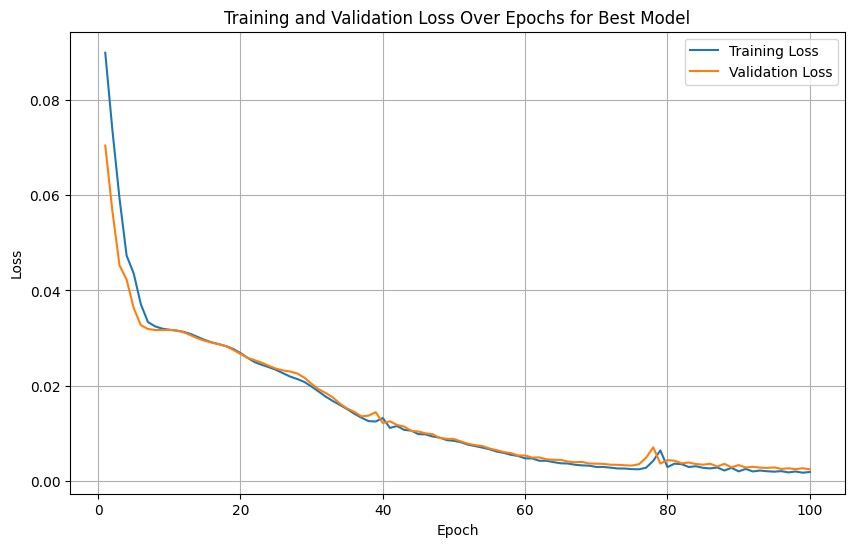

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), all_train_losses[0], label='Training Loss')
plt.plot(range(1, epochs + 1), all_val_losses[0], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for Best Model')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
training_history = torch.load("/content/drive/MyDrive/Machine_Learning/HW1/ROBOT_5_ARMS_models/1K_model_state_dict_r5_PREPROCESSING", weights_only=False)
best_hidden_sizes = training_history["hyperparameters"]["hidden_sizes"]
model = NeuralNetwork(hidden_sizes=best_hidden_sizes)
model.load_state_dict(training_history["model_state_dict"])

model.eval()
with torch.no_grad():
    y_test_pred_tensor = model(X_test_tensor)
    y_test_pred = y_test_pred_tensor.numpy()

# Calculate test metrics
test_mse = root_mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Test Root Mean Squared Error:", test_mse)
print("Test R^2 Score:", test_r2)

Test Root Mean Squared Error: 0.030854972171967466
Test R^2 Score: 0.9680541157722473


## Check of Iverse Kinematics

In [36]:
def inverse_kinematics_newton_raphson(model, initial_joints, target_position, max_iters=50000, tolerance=1e-4):
    joints = initial_joints.clone().detach().requires_grad_(True)

    for i in range(max_iters):
        current_position = FK(model, joints)
        error = target_position - current_position
        if torch.norm(error) < tolerance:
            return joints.detach()
        #else:
          #print("MAX ITERS REACHED NEWTON")

        jacobian = FK_Jacobian(model, joints)
        try:
            delta_joints = torch.linalg.solve(jacobian, error)
        except RuntimeError as e:
            print("Errore nell'inversione del Jacobiano:", e)
            return joints.detach()

        joints = joints + delta_joints

    return joints.detach()

def inverse_kinematics_levenberg_marquardt(model, initial_joints, target_position, max_iters=100000, tolerance=1e-4, lambda_=0.05):
    joints = initial_joints.clone().detach().requires_grad_(True)

    for i in range(max_iters):
        current_position = FK(model, joints)
        error = target_position - current_position
        if torch.norm(error) < tolerance:
            return joints.detach()
        #else:
          #print("MAX ITERS REACHED LM")

        jacobian = FK_Jacobian(model, joints)

        # Update of Levenberg-Marquardt: (J^T J + λI) * delta_joints = J^T * error
        A = jacobian.T @ jacobian + lambda_ * torch.eye(jacobian.size(1))
        b = jacobian.T @ error

        try:
            delta_joints = torch.linalg.solve(A, b)
        except RuntimeError as e:
            print("Errore nell'inversione della matrice in Levenberg-Marquardt:", e)
            return joints.detach()

        joints = joints + delta_joints

    return joints.detach()

In [37]:
training_history = torch.load("/content/drive/MyDrive/Machine_Learning/HW1/ROBOT_5_ARMS_models/1K_model_state_dict_r5_PREPROCESSING", weights_only=False)
best_hidden_sizes = training_history["hyperparameters"]["hidden_sizes"]
model = NeuralNetwork(hidden_sizes=best_hidden_sizes)
model.load_state_dict(training_history["model_state_dict"])
model.eval()

NeuralNetwork(
  (layers): ModuleList(
    (0): Linear(in_features=5, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=80, bias=True)
    (3): Linear(in_features=80, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [40]:
initial_joints = torch.tensor([0.0, 0.0, np.pi/4, 0.0, 0.0], requires_grad=True)
#target_position = torch.tensor([-0.1, -0.1])
target_position = torch.tensor(y_test.sample(n=1).to_numpy().flatten(), dtype=torch.float32)
print(target_position)

compare_methods(model, initial_joints, target_position)

tensor([0.1170, 0.0700, 0.3940])
Newton-Raphson Method:
Errore nell'inversione del Jacobiano: linalg.solve: A must be batches of square matrices, but they are 3 by 5 matrices
Target joints Newton-Raphson: tensor([0.0000, 0.0000, 0.7854, 0.0000, 0.0000])
Newton-Raphson Error: 0.17429561913013458

Levenberg-Marquardt Method:
Target joints Levenberg-Marquardt: tensor([ 0.1815, -0.8415,  1.1879,  0.6524, -0.2626])
Levenberg-Marquardt Error: 8.227701619034633e-05
 
--------------------------------------
Comparison target: tensor([0.1170, 0.0700, 0.3940]) Value computed by Newton-Raphson Method:  tensor([ 0.2720, -0.0006,  0.4307])
Comparison target: tensor([0.1170, 0.0700, 0.3940]) Value computed by Levenberg Marquardt:  tensor([0.1171, 0.0700, 0.3940])
